In [1]:
from numpy import hstack
from numpy import zeros
from numpy import ones
from numpy.random import rand
from numpy.random import randn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot as plt
from math import pi

import numpy as np
from numpy import random

import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions


In [133]:
latent_dim = 5
n_outputs = 1
model = Sequential()
model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim, name = "1stlayer"))
model.add(Dense(n_outputs, activation='linear', name ="2dlayer"))


In [119]:
def pm0(x, m , s ):
    dist = tfp.distributions.Normal(m, s)
    return (np.sqrt(2*pi)*s)*dist.prob(x)

m_data =  3
s_data =  0.2
cte_init = 1/(np.sqrt(2*pi)*s_data)

cte = cte_init

batch_size = 100
#def custom_loss(layer):

latent_dim =  5

x_input = randn(latent_dim * batch_size)
# reshape into a batch of inputs for the network
x_train = x_input.reshape(batch_size, latent_dim)
y_predit = model.predict (x_train)


def nce_loss(y_true,y_pred):
        
    # first fit kde on y- to get pn 
  
    f = lambda y: tfd.Independent(tfd.Normal(loc=y, scale=tf.math.reduce_std(y)/np.float32(3)))
    #n = y_pred.shape[0]
    n = batch_size
    pn = tfd.MixtureSameFamily(
    mixture_distribution=tfd.Categorical(
    probs=[1 / n] * n),
    components_distribution=f(y_pred))
    
    # Compute pm and pn (kde )
   
    p_n = pn.prob( y_pred) 
#     tf.print(" shape of y", tf.shape(y_pred))
#     tf.print(" shape of pm", tf.shape(pm0(y_pred, m_data, s_data)))
    
    p_m = tf.reshape(pm0(y_pred, m_data, s_data), [batch_size])# making sure pm and pn are same shape
    
    result = tf.math.reduce_mean( tf.math.log(tf.math.divide(p_n,(cte*p_m+p_n))))
    
    tf.print("pn/(pn+pm) ", tf.math.reduce_mean( (p_n/(cte*p_m+p_n))))
    tf.print("std dev y_pred", tf.math.reduce_std(y_pred))
    
    return  result 


    # Create a loss function that adds the MSE loss to the mean of all squared activations of a specific layer


In [130]:
model = Sequential()
model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim, name = "1stlayer"))
model.add(Dense(n_outputs, activation='linear', name ="2dlayer"))


model.compile(loss=nce_loss, optimizer='adam')


############ iteration  0 ################
 p_nx  [0.124885432 0.0710774586 0.112527847 ... 0.0972634256 0.106471986 0.111471809]


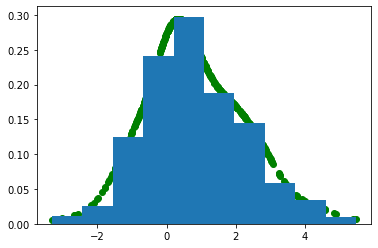

 mean loglikelihood of p_g  -1.77168
Gradient cte -0.012545486450195313
 Cte Update  3.9874545135498045

 pn/(pn+pm) 2 0.90452546

 std dev y_predit 1.4538229
mean y_predit 0.8349639
pn/(pn+pm)  0.904525459
std dev y_pred 1.45382297
 model train on batch  -0.2762373983860016
############ iteration  1 ################
 p_nx  [0.0756533 0.0779753327 0.0848454461 ... 0.089508459 0.0550020337 0.0737622753]


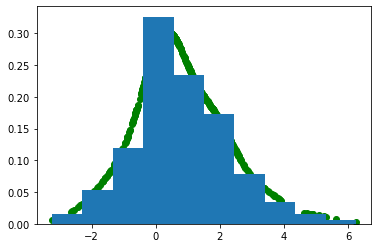

 mean loglikelihood of p_g  -1.77898109
Gradient cte -0.00875030517578125
 Cte Update  3.9787042083740234

 pn/(pn+pm) 2 0.9247153

 std dev y_predit 1.4772515
mean y_predit 0.78882885
pn/(pn+pm)  0.924688935
std dev y_pred 1.47725165
 model train on batch  -0.20981603860855103
############ iteration  2 ################
 p_nx  [0.0668151751 0.0601213835 0.0659769475 ... 0.0796449333 0.071191296 0.0676619485]


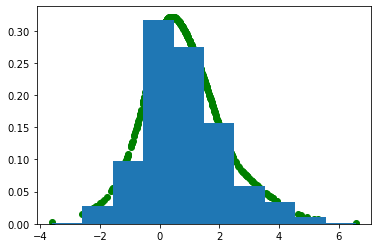

 mean loglikelihood of p_g  -1.70610416
Gradient cte -0.00752114725112915
 Cte Update  3.971183061122894

 pn/(pn+pm) 2 0.9287832

 std dev y_predit 1.3785627
mean y_predit 0.7956324
pn/(pn+pm)  0.928736746
std dev y_pred 1.37856269
 model train on batch  -0.22171299159526825
############ iteration  3 ################
 p_nx  [0.104589671 0.0920174569 0.0937713683 ... 0.107610397 0.103029452 0.075360924]


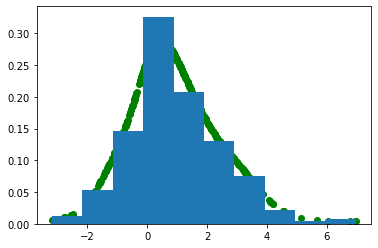

 mean loglikelihood of p_g  -1.80618632
Gradient cte -0.01282206153869629
 Cte Update  3.958360999584198

 pn/(pn+pm) 2 0.8980531

 std dev y_predit 1.5302862
mean y_predit 0.9328265
pn/(pn+pm)  0.897942543
std dev y_pred 1.53028619
 model train on batch  -0.29219478368759155
############ iteration  4 ################
 p_nx  [0.0761779696 0.0598363578 0.0724821314 ... 0.0838668644 0.0801843 0.0619510822]


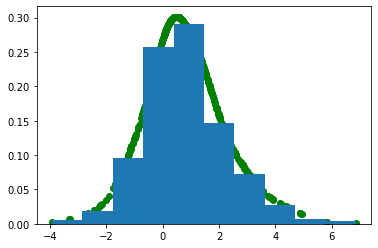

 mean loglikelihood of p_g  -1.77308178
Gradient cte -0.008255500793457032
 Cte Update  3.950105498790741

 pn/(pn+pm) 2 0.9224819

 std dev y_predit 1.4638398
mean y_predit 0.80484444
pn/(pn+pm)  0.922388434
std dev y_pred 1.46383977
 model train on batch  -0.24241434037685394
############ iteration  5 ################
 p_nx  [0.0755999461 0.0808628052 0.0861571431 ... 0.0564537719 0.0659647956 0.0736967251]


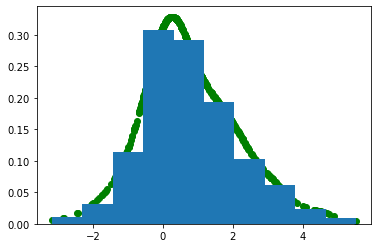

 mean loglikelihood of p_g  -1.70621216
Gradient cte -0.009873661041259765
 Cte Update  3.940231837749481

 pn/(pn+pm) 2 0.9199509

 std dev y_predit 1.3796135
mean y_predit 0.77280444
pn/(pn+pm)  0.919822156
std dev y_pred 1.37961352
 model train on batch  -0.2481529861688614
############ iteration  6 ################
 p_nx  [0.0857529342 0.0820176303 0.0997482091 ... 0.0990211517 0.0778423 0.0962612256]


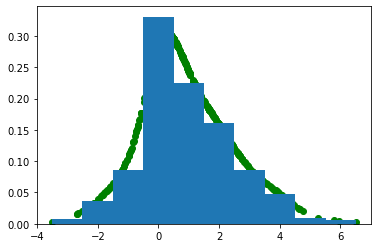

 mean loglikelihood of p_g  -1.79760838
Gradient cte -0.011075113296508789
 Cte Update  3.929156724452972

 pn/(pn+pm) 2 0.90924984

 std dev y_predit 1.5198975
mean y_predit 0.9077726
pn/(pn+pm)  0.909044564
std dev y_pred 1.51989746
 model train on batch  -0.2536451518535614
############ iteration  7 ################
 p_nx  [0.0792043954 0.0688332245 0.0679941699 ... 0.0776272193 0.0980387 0.0986884087]


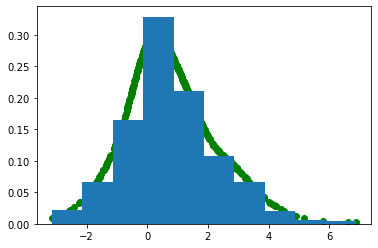

 mean loglikelihood of p_g  -1.79254627
Gradient cte -0.012943523406982422
 Cte Update  3.9162132010459896

 pn/(pn+pm) 2 0.90555406

 std dev y_predit 1.5084815
mean y_predit 0.7633768
pn/(pn+pm)  0.90533179
std dev y_pred 1.5084815
 model train on batch  -0.2832595109939575
############ iteration  8 ################
 p_nx  [0.0816769898 0.0678678602 0.0738541484 ... 0.0863084197 0.0787801221 0.0777232796]


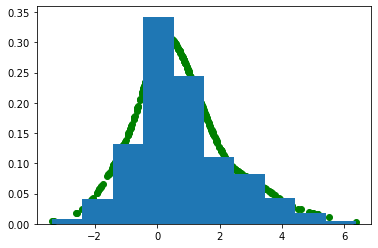

 mean loglikelihood of p_g  -1.78791249
Gradient cte -0.011851701736450195
 Cte Update  3.9043614993095392

 pn/(pn+pm) 2 0.91589427

 std dev y_predit 1.5190313
mean y_predit 0.74133617
pn/(pn+pm)  0.915662825
std dev y_pred 1.51903129
 model train on batch  -0.2515437602996826
############ iteration  9 ################
 p_nx  [0.0731615052 0.0782443583 0.0937277824 ... 0.110278614 0.0640132576 0.0726073384]


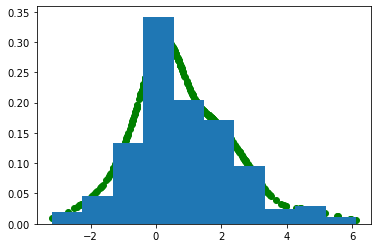

 mean loglikelihood of p_g  -1.80738795
Gradient cte -0.01098874568939209
 Cte Update  3.893372753620147

 pn/(pn+pm) 2 0.91393787

 std dev y_predit 1.5509024
mean y_predit 0.8024091
pn/(pn+pm)  0.913660407
std dev y_pred 1.55090237
 model train on batch  -0.2466091364622116
############ iteration  10 ################
 p_nx  [0.0956736133 0.0818092078 0.092395708 ... 0.0805371478 0.0766029879 0.10057725]


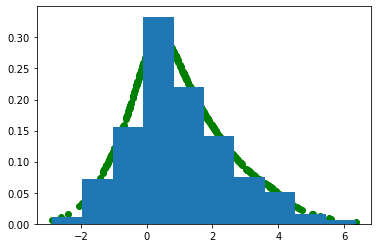

 mean loglikelihood of p_g  -1.77801907
Gradient cte -0.010712440490722657
 Cte Update  3.882660313129424

 pn/(pn+pm) 2 0.91168875

 std dev y_predit 1.4872669
mean y_predit 0.9536885
pn/(pn+pm)  0.911327183
std dev y_pred 1.48726702
 model train on batch  -0.2574262320995331
############ iteration  11 ################
 p_nx  [0.0626726449 0.0600394197 0.103901371 ... 0.0745579377 0.0856126323 0.0834983215]


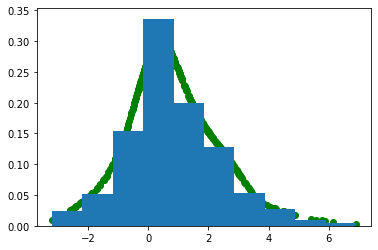

 mean loglikelihood of p_g  -1.81984282
Gradient cte -0.010797362327575683
 Cte Update  3.8718629508018485

 pn/(pn+pm) 2 0.9108346

 std dev y_predit 1.552743
mean y_predit 0.8220709
pn/(pn+pm)  0.910439253
std dev y_pred 1.55274308
 model train on batch  -0.25961899757385254
############ iteration  12 ################
 p_nx  [0.0656908751 0.0819077641 0.0675692856 ... 0.0676950589 0.0677559301 0.0712908283]


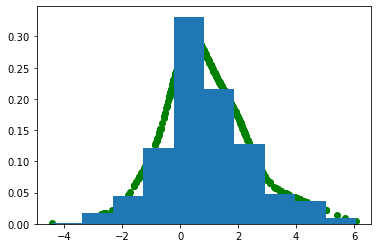

 mean loglikelihood of p_g  -1.81259954
Gradient cte -0.004482781887054444
 Cte Update  3.867380168914794

 pn/(pn+pm) 2 0.9354352

 std dev y_predit 1.5473285
mean y_predit 0.8894912
pn/(pn+pm)  0.935103774
std dev y_pred 1.54732859
 model train on batch  -0.18241620063781738
############ iteration  13 ################
 p_nx  [0.0674323738 0.0811391 0.0657916889 ... 0.0773925632 0.0720572 0.0717503205]


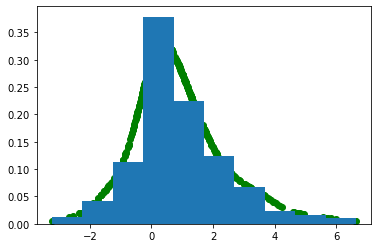

 mean loglikelihood of p_g  -1.74827445
Gradient cte -0.009899940490722656
 Cte Update  3.8574802284240715

 pn/(pn+pm) 2 0.9213655

 std dev y_predit 1.5008198
mean y_predit 0.8913164
pn/(pn+pm)  0.92094475
std dev y_pred 1.50081992
 model train on batch  -0.22580267488956451
############ iteration  14 ################
 p_nx  [0.0657969937 0.0743347928 0.0675798357 ... 0.0691250041 0.0893761218 0.0653746575]


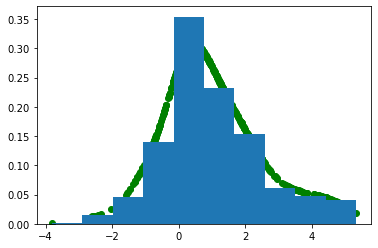

 mean loglikelihood of p_g  -1.77783275
Gradient cte -0.009112394332885743
 Cte Update  3.8483678340911855

 pn/(pn+pm) 2 0.9247584

 std dev y_predit 1.5177631
mean y_predit 0.999516
pn/(pn+pm)  0.92430228
std dev y_pred 1.51776326
 model train on batch  -0.20444270968437195
############ iteration  15 ################
 p_nx  [0.0823696777 0.0854013413 0.099599354 ... 0.0987400934 0.128989875 0.096330151]


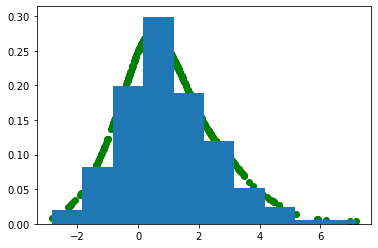

 mean loglikelihood of p_g  -1.83768284
Gradient cte -0.012035963058471679
 Cte Update  3.836331871032714

 pn/(pn+pm) 2 0.8985513

 std dev y_predit 1.5751423
mean y_predit 0.98150927
pn/(pn+pm)  0.898062766
std dev y_pred 1.57514238
 model train on batch  -0.30545949935913086
############ iteration  16 ################
 p_nx  [0.0643061474 0.0620608032 0.0626443475 ... 0.0628484637 0.0664245039 0.069830142]


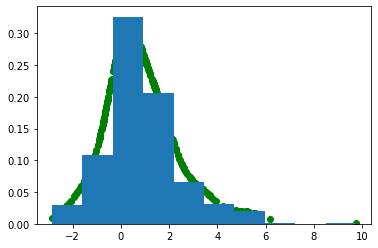

 mean loglikelihood of p_g  -1.77361941
Gradient cte -0.007859040260314941
 Cte Update  3.828472830772399

 pn/(pn+pm) 2 0.9301444

 std dev y_predit 1.5580751
mean y_predit 0.8572963
pn/(pn+pm)  0.929699242
std dev y_pred 1.55807495
 model train on batch  -0.2034038007259369
############ iteration  17 ################
 p_nx  [0.070301488 0.0676900372 0.100371525 ... 0.0924381 0.118269823 0.0628254041]


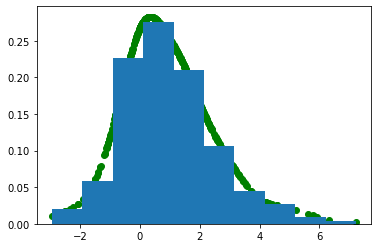

 mean loglikelihood of p_g  -1.81288743
Gradient cte -0.011440462112426757
 Cte Update  3.817032368659972

 pn/(pn+pm) 2 0.91245025

 std dev y_predit 1.5558039
mean y_predit 0.9503036
pn/(pn+pm)  0.911886513
std dev y_pred 1.55580389
 model train on batch  -0.2549924850463867
############ iteration  18 ################
 p_nx  [0.0824568421 0.0887820125 0.0672254 ... 0.0965529084 0.0875831321 0.0799619183]


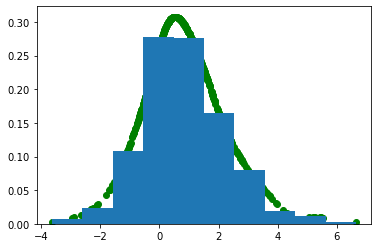

 mean loglikelihood of p_g  -1.73981512
Gradient cte -0.011281975746154785
 Cte Update  3.8057503929138172

 pn/(pn+pm) 2 0.9136802

 std dev y_predit 1.4173647
mean y_predit 0.8386344
pn/(pn+pm)  0.912980258
std dev y_pred 1.41736484
 model train on batch  -0.2368224859237671
############ iteration  19 ################
 p_nx  [0.0981122181 0.0936750174 0.0904348791 ... 0.0911432952 0.088607423 0.0817410424]


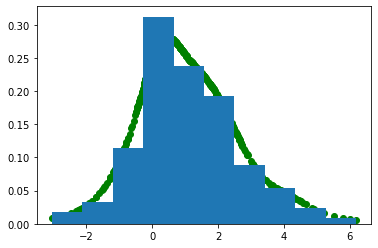

 mean loglikelihood of p_g  -1.80824471
Gradient cte -0.010577251434326172
 Cte Update  3.795173141479491

 pn/(pn+pm) 2 0.91100174

 std dev y_predit 1.519261
mean y_predit 1.0820725
pn/(pn+pm)  0.910254776
std dev y_pred 1.519261
 model train on batch  -0.24802599847316742
############ iteration  20 ################
 p_nx  [0.0751188621 0.0914867595 0.100841418 ... 0.0873418301 0.0734028146 0.101199657]


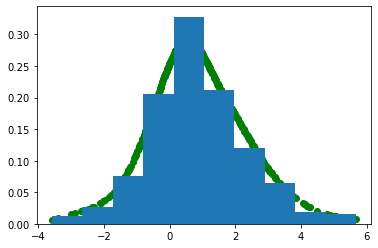

 mean loglikelihood of p_g  -1.79984605
Gradient cte -0.010000463485717773
 Cte Update  3.7851726779937733

 pn/(pn+pm) 2 0.91414297

 std dev y_predit 1.4894484
mean y_predit 0.8566114
pn/(pn+pm)  0.913379192
std dev y_pred 1.48944843
 model train on batch  -0.24909041821956635
############ iteration  21 ################
 p_nx  [0.0692248642 0.0955099761 0.0742418766 ... 0.114272758 0.117062293 0.0717527345]


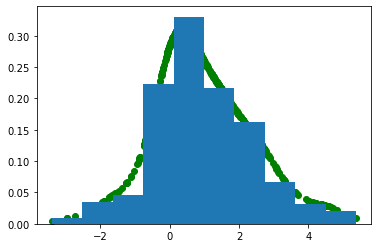

 mean loglikelihood of p_g  -1.74616683
Gradient cte -0.011460638046264649
 Cte Update  3.7737120399475086

 pn/(pn+pm) 2 0.8991987

 std dev y_predit 1.4420233
mean y_predit 0.96245617
pn/(pn+pm)  0.898237944
std dev y_pred 1.44202328
 model train on batch  -0.26901233196258545
############ iteration  22 ################
 p_nx  [0.112255864 0.11703293 0.0842287391 ... 0.0919623151 0.100198224 0.105920024]


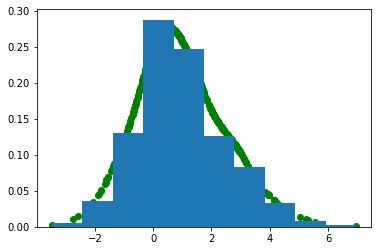

 mean loglikelihood of p_g  -1.809955
Gradient cte -0.015320497512817383
 Cte Update  3.7583915424346914

 pn/(pn+pm) 2 0.89157534

 std dev y_predit 1.5075893
mean y_predit 0.9359961
pn/(pn+pm)  0.890748918
std dev y_pred 1.50758922
 model train on batch  -0.32214051485061646
############ iteration  23 ################
 p_nx  [0.0756185129 0.0915210545 0.0784389079 ... 0.08063142 0.0733078942 0.105098009]


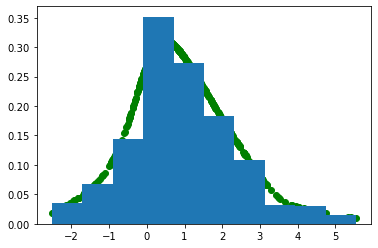

 mean loglikelihood of p_g  -1.72787821
Gradient cte -0.008638879776000977
 Cte Update  3.7497526626586906

 pn/(pn+pm) 2 0.9188509

 std dev y_predit 1.4068336
mean y_predit 0.90990615
pn/(pn+pm)  0.918082654
std dev y_pred 1.40683365
 model train on batch  -0.2386050969362259
############ iteration  24 ################
 p_nx  [0.0757856071 0.0855435655 0.0812706053 ... 0.0752164945 0.0925060958 0.0874046758]


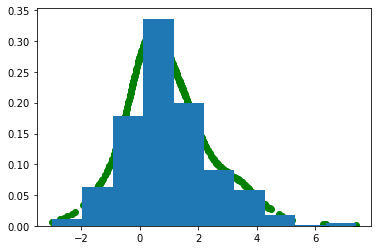

 mean loglikelihood of p_g  -1.75857282
Gradient cte -0.012095216751098634
 Cte Update  3.7376574459075917

 pn/(pn+pm) 2 0.9100131

 std dev y_predit 1.4743768
mean y_predit 0.9611808
pn/(pn+pm)  0.909217179
std dev y_pred 1.4743768
 model train on batch  -0.26639872789382935
############ iteration  25 ################
 p_nx  [0.113475919 0.105731554 0.102976412 ... 0.112092666 0.106498688 0.121014893]


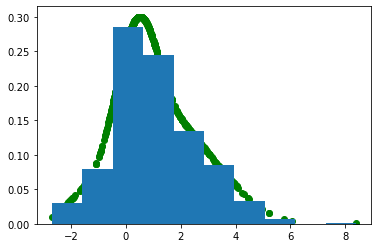

 mean loglikelihood of p_g  -1.80402255
Gradient cte -0.01201093864440918
 Cte Update  3.7256465072631824

 pn/(pn+pm) 2 0.89655244

 std dev y_predit 1.5499855
mean y_predit 1.0811656
pn/(pn+pm)  0.895326
std dev y_pred 1.54998565
 model train on batch  -0.2861204743385315
############ iteration  26 ################
 p_nx  [0.0838098601 0.0830892473 0.0854424834 ... 0.0848099515 0.120588802 0.0735717118]


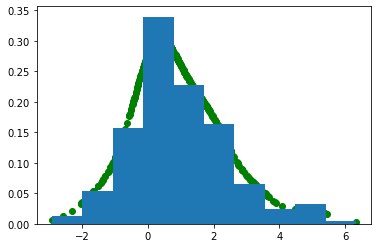

 mean loglikelihood of p_g  -1.76043797
Gradient cte -0.008199369430541992
 Cte Update  3.7174471378326404

 pn/(pn+pm) 2 0.924317

 std dev y_predit 1.4767684
mean y_predit 0.9376404
pn/(pn+pm)  0.923447609
std dev y_pred 1.47676826
 model train on batch  -0.22694312036037445
############ iteration  27 ################
 p_nx  [0.107708648 0.111257434 0.0963566154 ... 0.0832485408 0.0855892822 0.108156919]


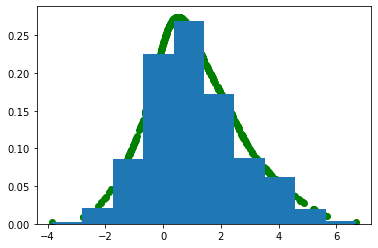

 mean loglikelihood of p_g  -1.85317695
Gradient cte -0.012015944480895996
 Cte Update  3.7054311933517443

 pn/(pn+pm) 2 0.90460914

 std dev y_predit 1.5837687
mean y_predit 1.0846388
pn/(pn+pm)  0.903276205
std dev y_pred 1.58376873
 model train on batch  -0.2539568543434143
############ iteration  28 ################
 p_nx  [0.0733187497 0.0650729164 0.073972553 ... 0.0680986717 0.0718641877 0.0784342]


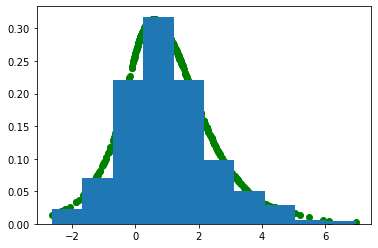

 mean loglikelihood of p_g  -1.73789334
Gradient cte -0.010218263626098633
 Cte Update  3.6952129297256455

 pn/(pn+pm) 2 0.91525096

 std dev y_predit 1.4352679
mean y_predit 0.9936808
pn/(pn+pm)  0.914312124
std dev y_pred 1.43526781
 model train on batch  -0.24600429832935333
############ iteration  29 ################
 p_nx  [0.0716345 0.0890111625 0.102338538 ... 0.0963471457 0.0792099684 0.129187033]


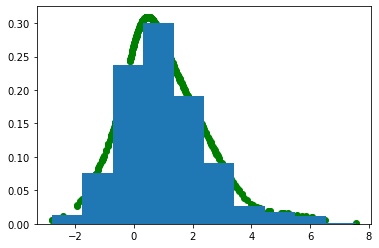

 mean loglikelihood of p_g  -1.75616944
Gradient cte -0.010836124420166016
 Cte Update  3.6843768053054795

 pn/(pn+pm) 2 0.910262

 std dev y_predit 1.486112
mean y_predit 1.0221548
pn/(pn+pm)  0.909292698
std dev y_pred 1.486112
 model train on batch  -0.26872557401657104
############ iteration  30 ################
 p_nx  [0.0751425773 0.0798962861 0.0844213217 ... 0.0837115869 0.106524594 0.0877139941]


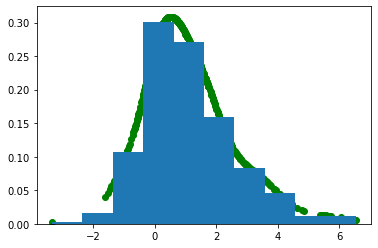

 mean loglikelihood of p_g  -1.74934888
Gradient cte -0.010473587989807128
 Cte Update  3.6739032173156723

 pn/(pn+pm) 2 0.9121157

 std dev y_predit 1.4757799
mean y_predit 1.0919756
pn/(pn+pm)  0.911073625
std dev y_pred 1.47578
 model train on batch  -0.26094868779182434
############ iteration  31 ################
 p_nx  [0.0920500606 0.0952986181 0.0972748324 ... 0.0888520554 0.0741731599 0.101237305]


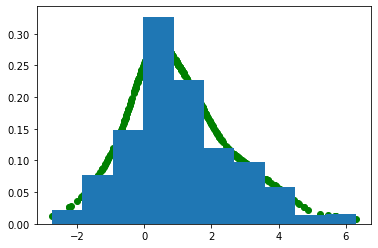

 mean loglikelihood of p_g  -1.84298229
Gradient cte -0.012828744888305665
 Cte Update  3.6610744724273667

 pn/(pn+pm) 2 0.8977875

 std dev y_predit 1.5895772
mean y_predit 1.0446587
pn/(pn+pm)  0.896822751
std dev y_pred 1.58957732
 model train on batch  -0.3093734085559845
############ iteration  32 ################
 p_nx  [0.107096292 0.0794849545 0.118181147 ... 0.124196976 0.0897200704 0.110889018]


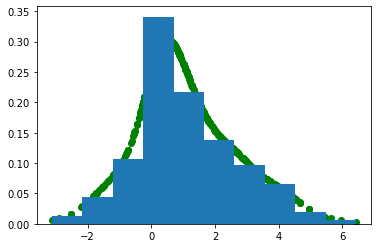

 mean loglikelihood of p_g  -1.82502103
Gradient cte -0.013092170715332032
 Cte Update  3.6479823017120347

 pn/(pn+pm) 2 0.8943962

 std dev y_predit 1.5701061
mean y_predit 1.0835297
pn/(pn+pm)  0.893056035
std dev y_pred 1.57010603
 model train on batch  -0.3001430332660675
############ iteration  33 ################
 p_nx  [0.113171853 0.108564295 0.123781107 ... 0.110401884 0.110283501 0.116538815]


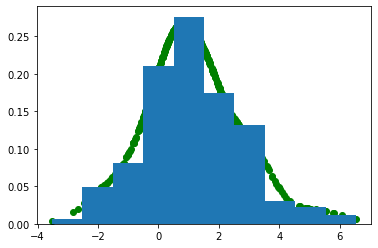

 mean loglikelihood of p_g  -1.88436425
Gradient cte -0.018550931930541994
 Cte Update  3.629431369781493

 pn/(pn+pm) 2 0.8763279

 std dev y_predit 1.6340449
mean y_predit 1.1326631
pn/(pn+pm)  0.874965847
std dev y_pred 1.63404489
 model train on batch  -0.36229512095451355
############ iteration  34 ################
 p_nx  [0.0846298635 0.102075115 0.0948500782 ... 0.0763507634 0.0968720764 0.106816553]


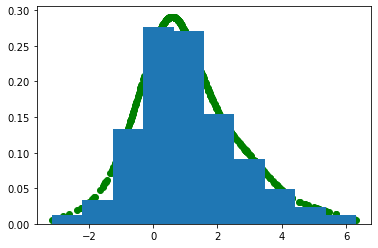

 mean loglikelihood of p_g  -1.82393241
Gradient cte -0.013273746490478515
 Cte Update  3.616157623291014

 pn/(pn+pm) 2 0.90063596

 std dev y_predit 1.5606297
mean y_predit 1.0625069
pn/(pn+pm)  0.899133563
std dev y_pred 1.56062973
 model train on batch  -0.29284510016441345
############ iteration  35 ################
 p_nx  [0.100994155 0.0994356871 0.0975538194 ... 0.122633144 0.105849743 0.0786371529]


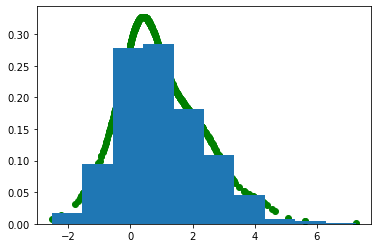

 mean loglikelihood of p_g  -1.70040083
Gradient cte -0.011820034980773926
 Cte Update  3.60433758831024

 pn/(pn+pm) 2 0.9088256

 std dev y_predit 1.3908617
mean y_predit 0.99990904
pn/(pn+pm)  0.907341242
std dev y_pred 1.39086175
 model train on batch  -0.2622103989124298
############ iteration  36 ################
 p_nx  [0.105185196 0.111465164 0.108396381 ... 0.0763805136 0.078088671 0.106407776]


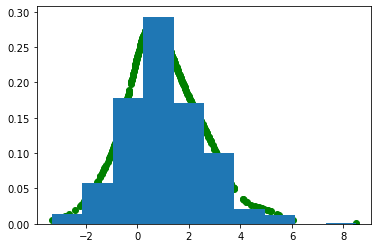

 mean loglikelihood of p_g  -1.82217073
Gradient cte -0.013845623970031739
 Cte Update  3.5904919643402087

 pn/(pn+pm) 2 0.89209986

 std dev y_predit 1.542753
mean y_predit 1.0405561
pn/(pn+pm)  0.890285313
std dev y_pred 1.5427531
 model train on batch  -0.3014987111091614
############ iteration  37 ################
 p_nx  [0.115173623 0.101265453 0.108826861 ... 0.14340727 0.0932065099 0.120497122]


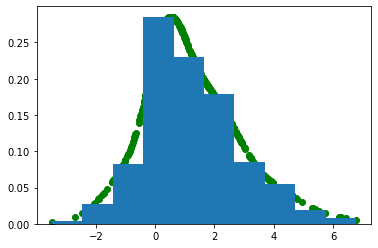

 mean loglikelihood of p_g  -1.85417378
Gradient cte -0.012982566833496094
 Cte Update  3.5775093975067125

 pn/(pn+pm) 2 0.8975091

 std dev y_predit 1.6181273
mean y_predit 1.220035
pn/(pn+pm)  0.895552874
std dev y_pred 1.61812723
 model train on batch  -0.28112053871154785
############ iteration  38 ################
 p_nx  [0.109113216 0.0993731171 0.114144184 ... 0.122779891 0.118632324 0.108548559]


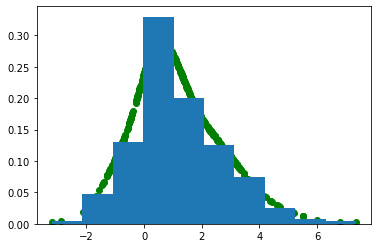

 mean loglikelihood of p_g  -1.81422234
Gradient cte -0.011808302879333496
 Cte Update  3.565701094627379

 pn/(pn+pm) 2 0.8941403

 std dev y_predit 1.5452559
mean y_predit 1.1370761
pn/(pn+pm)  0.892351031
std dev y_pred 1.54525602
 model train on batch  -0.307528555393219
############ iteration  39 ################
 p_nx  [0.0884809718 0.0800762102 0.0895375758 ... 0.0911496878 0.0920742899 0.0917911083]


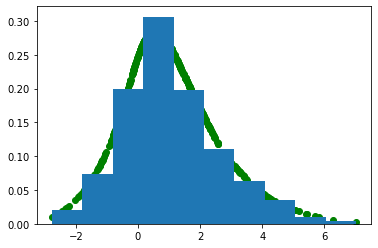

 mean loglikelihood of p_g  -1.8226639
Gradient cte -0.010023229598999024
 Cte Update  3.5556778650283802

 pn/(pn+pm) 2 0.9125404

 std dev y_predit 1.5507158
mean y_predit 1.0304041
pn/(pn+pm)  0.911147118
std dev y_pred 1.5507158
 model train on batch  -0.26664870977401733
############ iteration  40 ################
 p_nx  [0.108416855 0.109374255 0.12265712 ... 0.0957263634 0.117783234 0.10308066]


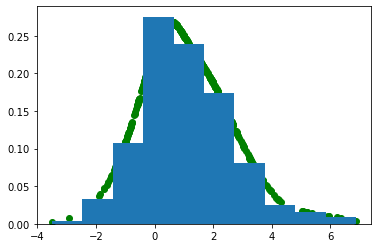

 mean loglikelihood of p_g  -1.84025943
Gradient cte -0.012988167762756348
 Cte Update  3.542689697265624

 pn/(pn+pm) 2 0.895632

 std dev y_predit 1.5670642
mean y_predit 1.075375
pn/(pn+pm)  0.893638372
std dev y_pred 1.56706405
 model train on batch  -0.29319578409194946
############ iteration  41 ################
 p_nx  [0.11628902 0.121825457 0.135707378 ... 0.107322298 0.110603116 0.126134321]


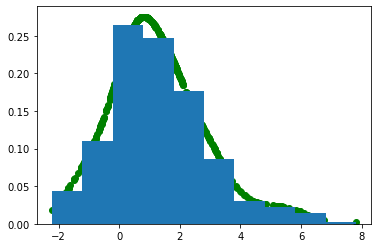

 mean loglikelihood of p_g  -1.83963037
Gradient cte -0.014841266632080078
 Cte Update  3.527848430633544

 pn/(pn+pm) 2 0.88558394

 std dev y_predit 1.5984251
mean y_predit 1.2673459
pn/(pn+pm)  0.883911669
std dev y_pred 1.59842503
 model train on batch  -0.3429098129272461
############ iteration  42 ################
 p_nx  [0.0993765742 0.102010593 0.0921091586 ... 0.0872069076 0.0929186046 0.0901139677]


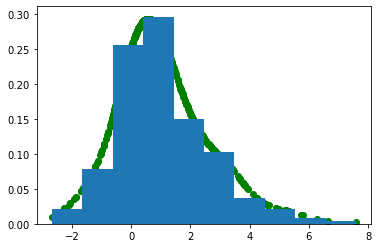

 mean loglikelihood of p_g  -1.81677854
Gradient cte -0.013368887901306152
 Cte Update  3.514479542732238

 pn/(pn+pm) 2 0.89831483

 std dev y_predit 1.5698212
mean y_predit 1.075468
pn/(pn+pm)  0.896438539
std dev y_pred 1.56982124
 model train on batch  -0.2936916649341583
############ iteration  43 ################
 p_nx  [0.120612264 0.11479646 0.0975822 ... 0.0947511718 0.0943341628 0.110545591]


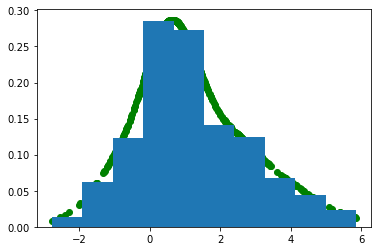

 mean loglikelihood of p_g  -1.84688497
Gradient cte -0.014514467239379884
 Cte Update  3.499965075492858

 pn/(pn+pm) 2 0.889236

 std dev y_predit 1.6022481
mean y_predit 1.1700493
pn/(pn+pm)  0.887186408
std dev y_pred 1.60224795
 model train on batch  -0.3164806663990021
############ iteration  44 ################
 p_nx  [0.0920684561 0.102756225 0.121638253 ... 0.0961479172 0.105646081 0.106337272]


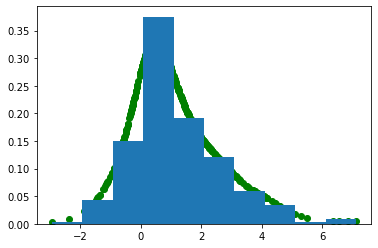

 mean loglikelihood of p_g  -1.73825502
Gradient cte -0.0103525390625
 Cte Update  3.489612536430358

 pn/(pn+pm) 2 0.90794164

 std dev y_predit 1.4944263
mean y_predit 1.1291625
pn/(pn+pm)  0.906198
std dev y_pred 1.49442625
 model train on batch  -0.277479887008667
############ iteration  45 ################
 p_nx  [0.128557593 0.0991421044 0.100799255 ... 0.114583068 0.098159954 0.0968325436]


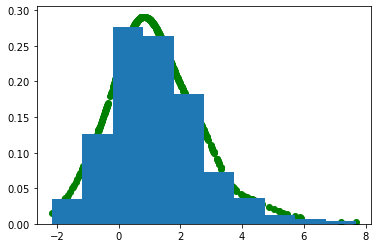

 mean loglikelihood of p_g  -1.77387464
Gradient cte -0.014642878532409668
 Cte Update  3.4749696578979483

 pn/(pn+pm) 2 0.890628

 std dev y_predit 1.487247
mean y_predit 1.2064856
pn/(pn+pm)  0.888499
std dev y_pred 1.48724699
 model train on batch  -0.3167511224746704
############ iteration  46 ################
 p_nx  [0.107518278 0.103487119 0.0878008232 ... 0.084210366 0.108625859 0.0759722739]


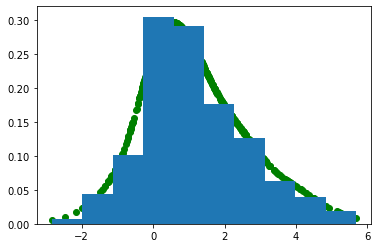

 mean loglikelihood of p_g  -1.76619744
Gradient cte -0.01109384536743164
 Cte Update  3.4638758125305165

 pn/(pn+pm) 2 0.9012716

 std dev y_predit 1.4688715
mean y_predit 1.145631
pn/(pn+pm)  0.898938119
std dev y_pred 1.46887147
 model train on batch  -0.28203752636909485
############ iteration  47 ################
 p_nx  [0.0861402601 0.105135545 0.0815934166 ... 0.080184 0.0907943249 0.0918035358]


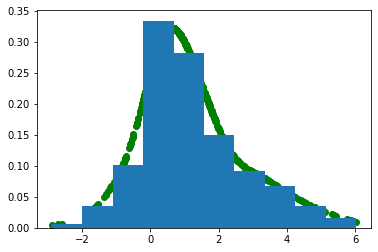

 mean loglikelihood of p_g  -1.75297821
Gradient cte -0.01210354995727539
 Cte Update  3.451772262573241

 pn/(pn+pm) 2 0.9050343

 std dev y_predit 1.5058491
mean y_predit 1.2047943
pn/(pn+pm)  0.903119385
std dev y_pred 1.50584912
 model train on batch  -0.27926599979400635
############ iteration  48 ################
 p_nx  [0.106185466 0.117130913 0.132811353 ... 0.0879403055 0.124365218 0.101577774]


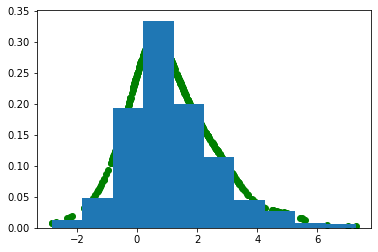

 mean loglikelihood of p_g  -1.78240466
Gradient cte -0.013503486633300782
 Cte Update  3.43826877593994

 pn/(pn+pm) 2 0.8966036

 std dev y_predit 1.513744
mean y_predit 1.1270677
pn/(pn+pm)  0.894289
std dev y_pred 1.51374412
 model train on batch  -0.29205483198165894
############ iteration  49 ################
 p_nx  [0.129981473 0.119120888 0.122397654 ... 0.0967685282 0.110153742 0.102191411]


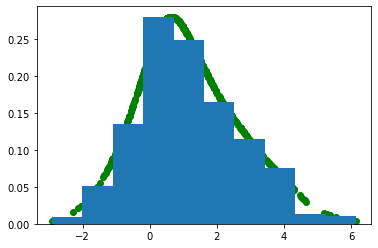

 mean loglikelihood of p_g  -1.80719209
Gradient cte -0.012220762252807616
 Cte Update  3.4260480136871325

 pn/(pn+pm) 2 0.88773006

 std dev y_predit 1.5069462
mean y_predit 1.1633267
pn/(pn+pm)  0.88481158
std dev y_pred 1.50694621
 model train on batch  -0.3128546178340912
############ iteration  50 ################
 p_nx  [0.106415644 0.142984807 0.107433259 ... 0.109485917 0.109612122 0.101224847]


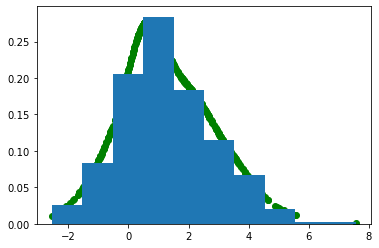

 mean loglikelihood of p_g  -1.82447016
Gradient cte -0.01161490535736084
 Cte Update  3.4144331083297716

 pn/(pn+pm) 2 0.8831891

 std dev y_predit 1.5380836
mean y_predit 1.2742956
pn/(pn+pm)  0.879910469
std dev y_pred 1.53808355
 model train on batch  -0.32290977239608765
############ iteration  51 ################
 p_nx  [0.0938933 0.0930900127 0.105118908 ... 0.0916578397 0.0935829133 0.09843532]


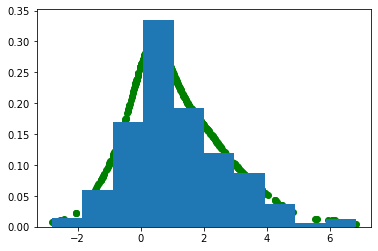

 mean loglikelihood of p_g  -1.81621683
Gradient cte -0.009378506660461425
 Cte Update  3.40505460166931

 pn/(pn+pm) 2 0.9052408

 std dev y_predit 1.5765542
mean y_predit 1.1196877
pn/(pn+pm)  0.902878761
std dev y_pred 1.57655418
 model train on batch  -0.2810862362384796
############ iteration  52 ################
 p_nx  [0.100784406 0.106331244 0.10945721 ... 0.0982144475 0.0850955397 0.0983903185]


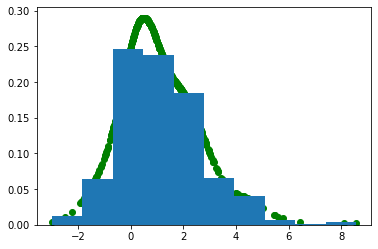

 mean loglikelihood of p_g  -1.80959809
Gradient cte -0.009409065246582032
 Cte Update  3.395645536422728

 pn/(pn+pm) 2 0.90459436

 std dev y_predit 1.5685145
mean y_predit 1.1449448
pn/(pn+pm)  0.901877642
std dev y_pred 1.56851447
 model train on batch  -0.26920878887176514
############ iteration  53 ################
 p_nx  [0.119444817 0.127557829 0.128039181 ... 0.116413347 0.130985945 0.126460254]


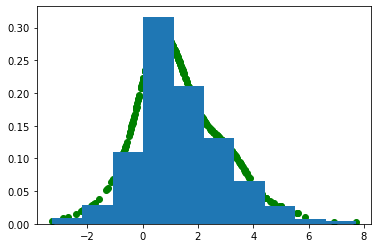

 mean loglikelihood of p_g  -1.83847177
Gradient cte -0.016393339157104492
 Cte Update  3.3792521972656235

 pn/(pn+pm) 2 0.87410694

 std dev y_predit 1.5868319
mean y_predit 1.3071281
pn/(pn+pm)  0.87072289
std dev y_pred 1.58683193
 model train on batch  -0.3481903672218323
############ iteration  54 ################
 p_nx  [0.103421062 0.11942739 0.101404756 ... 0.102840386 0.0900904685 0.119280443]


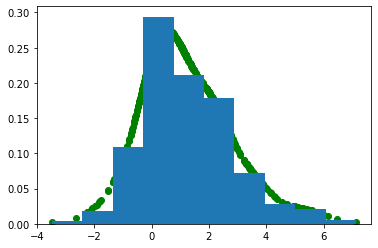

 mean loglikelihood of p_g  -1.83709157
Gradient cte -0.012881548881530761
 Cte Update  3.366370648384093

 pn/(pn+pm) 2 0.9024008

 std dev y_predit 1.5878862
mean y_predit 1.2186626
pn/(pn+pm)  0.899081588
std dev y_pred 1.58788621
 model train on batch  -0.25679489970207214
############ iteration  55 ################
 p_nx  [0.108131655 0.153669879 0.132367209 ... 0.101783544 0.128258064 0.143167987]


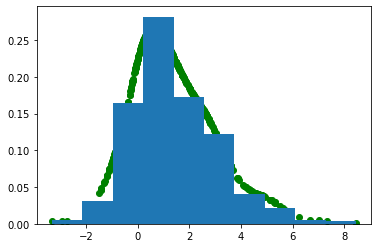

 mean loglikelihood of p_g  -1.86029434
Gradient cte -0.016683795928955077
 Cte Update  3.3496868524551378

 pn/(pn+pm) 2 0.8684831

 std dev y_predit 1.6479402
mean y_predit 1.3978416
pn/(pn+pm)  0.864417
std dev y_pred 1.64794016
 model train on batch  -0.3471159338951111
############ iteration  56 ################
 p_nx  [0.101643279 0.129849285 0.113453142 ... 0.110862635 0.0878998935 0.0832650512]


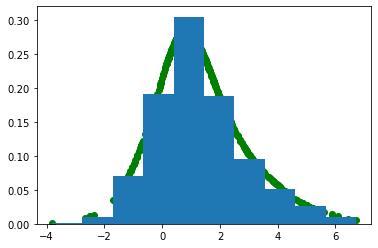

 mean loglikelihood of p_g  -1.8411392
Gradient cte -0.010594402313232422
 Cte Update  3.3390924501419055

 pn/(pn+pm) 2 0.9015489

 std dev y_predit 1.5841655
mean y_predit 1.2651963
pn/(pn+pm)  0.898950398
std dev y_pred 1.58416545
 model train on batch  -0.28865185379981995
############ iteration  57 ################
 p_nx  [0.0973331109 0.0834052041 0.0713119358 ... 0.0961183533 0.0919678882 0.0710575655]


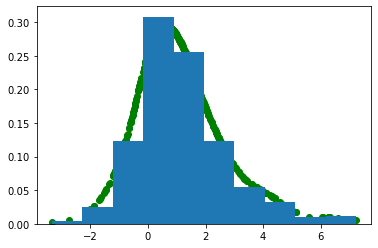

 mean loglikelihood of p_g  -1.79387474
Gradient cte -0.009329983711242676
 Cte Update  3.3297624664306626

 pn/(pn+pm) 2 0.91905874

 std dev y_predit 1.5652603
mean y_predit 1.1452036
pn/(pn+pm)  0.916309178
std dev y_pred 1.56526041
 model train on batch  -0.22926412522792816
############ iteration  58 ################
 p_nx  [0.105735585 0.121176511 0.131865755 ... 0.124477826 0.115086451 0.133421987]


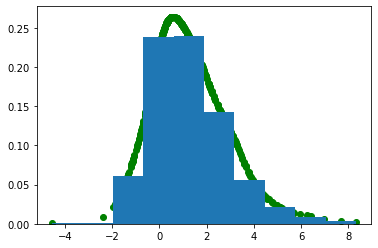

 mean loglikelihood of p_g  -1.85552
Gradient cte -0.016037906646728516
 Cte Update  3.313724559783934

 pn/(pn+pm) 2 0.8757235

 std dev y_predit 1.6394463
mean y_predit 1.3029591
pn/(pn+pm)  0.872382
std dev y_pred 1.63944626
 model train on batch  -0.3595934212207794
############ iteration  59 ################
 p_nx  [0.0965800732 0.128284603 0.110636607 ... 0.101857051 0.126908779 0.123476624]


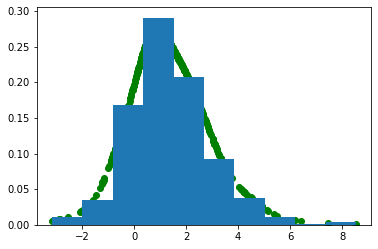

 mean loglikelihood of p_g  -1.83313835
Gradient cte -0.013675631523132325
 Cte Update  3.300048928260802

 pn/(pn+pm) 2 0.8846693

 std dev y_predit 1.5597295
mean y_predit 1.3393
pn/(pn+pm)  0.880486548
std dev y_pred 1.55972946
 model train on batch  -0.31071937084198
############ iteration  60 ################
 p_nx  [0.116627537 0.11477752 0.11869932 ... 0.103430577 0.117279403 0.109728269]


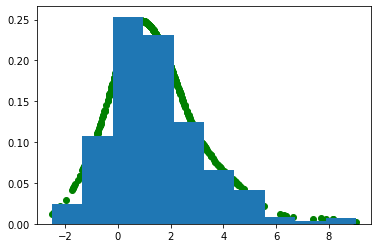

 mean loglikelihood of p_g  -1.94192493
Gradient cte -0.011294357299804688
 Cte Update  3.288754570960997

 pn/(pn+pm) 2 0.89591056

 std dev y_predit 1.7924913
mean y_predit 1.4498017
pn/(pn+pm)  0.892683327
std dev y_pred 1.79249132
 model train on batch  -0.29809749126434326
############ iteration  61 ################
 p_nx  [0.104108721 0.0806754 0.0979535654 ... 0.112763 0.109832175 0.10622897]


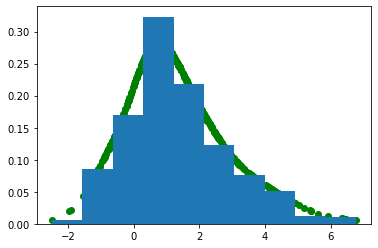

 mean loglikelihood of p_g  -1.82289219
Gradient cte -0.008720499992370605
 Cte Update  3.2800340709686266

 pn/(pn+pm) 2 0.9017692

 std dev y_predit 1.5701542
mean y_predit 1.3124663
pn/(pn+pm)  0.898361742
std dev y_pred 1.57015431
 model train on batch  -0.28049740195274353
############ iteration  62 ################
 p_nx  [0.108068354 0.105160266 0.118811332 ... 0.0882972106 0.113283128 0.132449478]


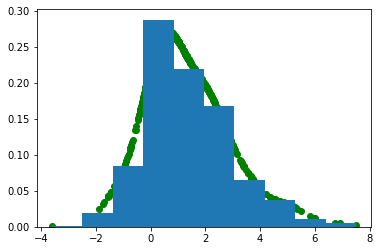

 mean loglikelihood of p_g  -1.83914042
Gradient cte -0.009330726623535157
 Cte Update  3.2707033443450917

 pn/(pn+pm) 2 0.90028864

 std dev y_predit 1.5980513
mean y_predit 1.3380103
pn/(pn+pm)  0.8963269
std dev y_pred 1.59805155
 model train on batch  -0.27500125765800476
############ iteration  63 ################
 p_nx  [0.101555444 0.106883451 0.111073971 ... 0.10536249 0.111765712 0.114537776]


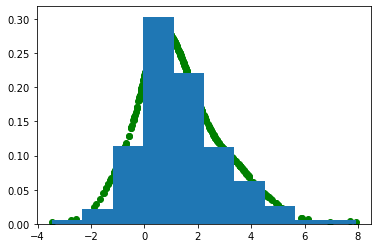

 mean loglikelihood of p_g  -1.83850527
Gradient cte -0.011261680603027343
 Cte Update  3.2594416637420642

 pn/(pn+pm) 2 0.89401793

 std dev y_predit 1.5999073
mean y_predit 1.3157322
pn/(pn+pm)  0.890203118
std dev y_pred 1.59990728
 model train on batch  -0.2917599678039551
############ iteration  64 ################
 p_nx  [0.106294587 0.0894898549 0.081407249 ... 0.135883763 0.0829623267 0.123976335]


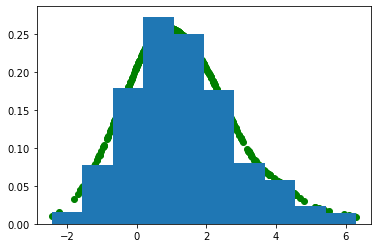

 mean loglikelihood of p_g  -1.83968759
Gradient cte -0.008747227668762207
 Cte Update  3.250694436073302

 pn/(pn+pm) 2 0.8947123

 std dev y_predit 1.5620998
mean y_predit 1.2962643
pn/(pn+pm)  0.890551627
std dev y_pred 1.56209958
 model train on batch  -0.2847370505332947
############ iteration  65 ################
 p_nx  [0.129260302 0.113812327 0.0934621096 ... 0.126996383 0.151724592 0.114074647]


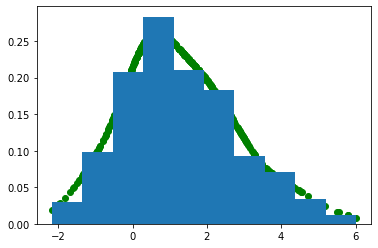

 mean loglikelihood of p_g  -1.83476782
Gradient cte -0.01054469108581543
 Cte Update  3.2401497449874865

 pn/(pn+pm) 2 0.89199805

 std dev y_predit 1.5516903
mean y_predit 1.2835581
pn/(pn+pm)  0.888590097
std dev y_pred 1.5516901
 model train on batch  -0.3175427317619324
############ iteration  66 ################
 p_nx  [0.107691035 0.113492638 0.0981827 ... 0.0986050069 0.0871182159 0.119890928]


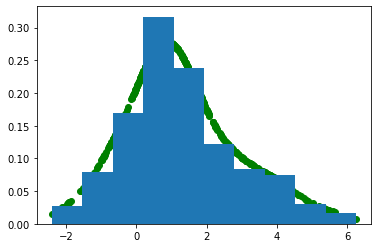

 mean loglikelihood of p_g  -1.84919727
Gradient cte -0.010223928451538087
 Cte Update  3.2299258165359483

 pn/(pn+pm) 2 0.9015866

 std dev y_predit 1.5985725
mean y_predit 1.2708849
pn/(pn+pm)  0.898648143
std dev y_pred 1.59857249
 model train on batch  -0.295053094625473
############ iteration  67 ################
 p_nx  [0.094219625 0.101523004 0.101117127 ... 0.113002636 0.112021871 0.0980413184]


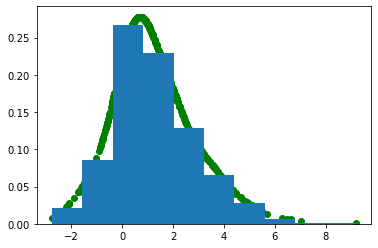

 mean loglikelihood of p_g  -1.86027098
Gradient cte -0.010812361717224122
 Cte Update  3.219113454818724

 pn/(pn+pm) 2 0.904813

 std dev y_predit 1.6339101
mean y_predit 1.2561566
pn/(pn+pm)  0.901209593
std dev y_pred 1.6339103
 model train on batch  -0.2777116000652313
############ iteration  68 ################
 p_nx  [0.126571253 0.127560616 0.135571092 ... 0.153539062 0.13581866 0.134948]


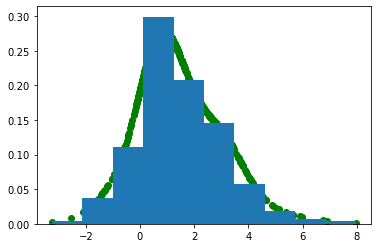

 mean loglikelihood of p_g  -1.83891058
Gradient cte -0.016513456344604494
 Cte Update  3.2025999984741196

 pn/(pn+pm) 2 0.8649355

 std dev y_predit 1.573661
mean y_predit 1.4398116
pn/(pn+pm)  0.860223293
std dev y_pred 1.57366097
 model train on batch  -0.3780669867992401
############ iteration  69 ################
 p_nx  [0.140149921 0.111563645 0.136544257 ... 0.12581259 0.11170838 0.126645029]


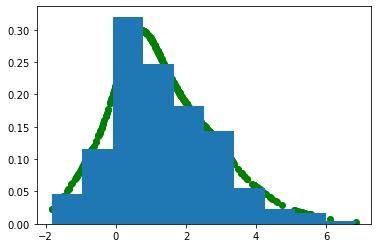

 mean loglikelihood of p_g  -1.77209449
Gradient cte -0.014316014289855957
 Cte Update  3.1882839841842636

 pn/(pn+pm) 2 0.8795286

 std dev y_predit 1.4837219
mean y_predit 1.3121179
pn/(pn+pm)  0.875397801
std dev y_pred 1.48372185
 model train on batch  -0.34776556491851807
############ iteration  70 ################
 p_nx  [0.100853249 0.116590843 0.111601576 ... 0.123859569 0.110446222 0.127191573]


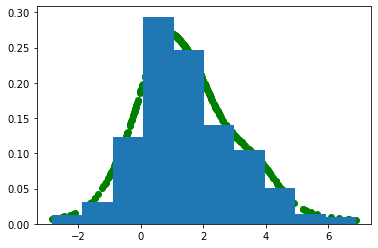

 mean loglikelihood of p_g  -1.84412992
Gradient cte -0.01063740634918213
 Cte Update  3.1776465778350813

 pn/(pn+pm) 2 0.885328

 std dev y_predit 1.5762637
mean y_predit 1.4732652
pn/(pn+pm)  0.880988
std dev y_pred 1.57626367
 model train on batch  -0.33141782879829407
############ iteration  71 ################
 p_nx  [0.146050498 0.113788508 0.142536953 ... 0.124398552 0.143110588 0.153838873]


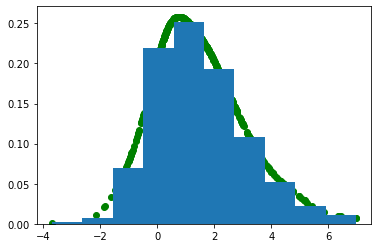

 mean loglikelihood of p_g  -1.85991
Gradient cte -0.012320194244384765
 Cte Update  3.1653263835906964

 pn/(pn+pm) 2 0.8826677

 std dev y_predit 1.618766
mean y_predit 1.4666669
pn/(pn+pm)  0.878171265
std dev y_pred 1.61876595
 model train on batch  -0.33248111605644226
############ iteration  72 ################
 p_nx  [0.118298419 0.0988805443 0.11293789 ... 0.130860716 0.150352538 0.124851972]


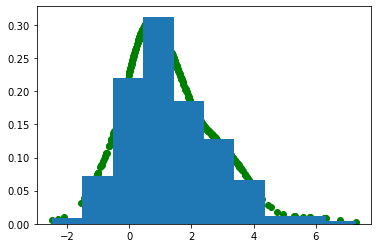

 mean loglikelihood of p_g  -1.75253737
Gradient cte -0.01590877151489258
 Cte Update  3.149417612075804

 pn/(pn+pm) 2 0.8786764

 std dev y_predit 1.4796983
mean y_predit 1.2930061
pn/(pn+pm)  0.873767376
std dev y_pred 1.4796983
 model train on batch  -0.3383083939552307
############ iteration  73 ################
 p_nx  [0.108486257 0.114342362 0.13624385 ... 0.108754806 0.117782451 0.105894573]


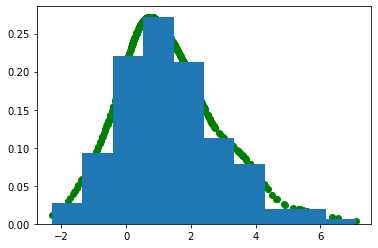

 mean loglikelihood of p_g  -1.8353349
Gradient cte -0.012621390342712402
 Cte Update  3.1367962217330914

 pn/(pn+pm) 2 0.8951689

 std dev y_predit 1.5767374
mean y_predit 1.3444626
pn/(pn+pm)  0.890576482
std dev y_pred 1.57673728
 model train on batch  -0.29234933853149414
############ iteration  74 ################
 p_nx  [0.11797896 0.105348729 0.112692535 ... 0.118723944 0.134317771 0.112071022]


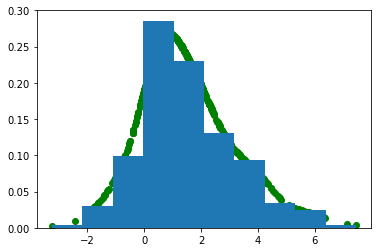

 mean loglikelihood of p_g  -1.88614583
Gradient cte -0.012097504615783692
 Cte Update  3.1246987171173077

 pn/(pn+pm) 2 0.89457047

 std dev y_predit 1.6687349
mean y_predit 1.5266751
pn/(pn+pm)  0.890382588
std dev y_pred 1.66873503
 model train on batch  -0.30169421434402466
############ iteration  75 ################
 p_nx  [0.142220452 0.131542191 0.117578022 ... 0.119009502 0.080936566 0.109440871]


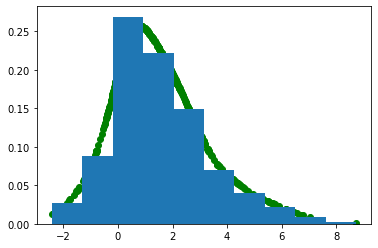

 mean loglikelihood of p_g  -1.91979623
Gradient cte -0.01312515926361084
 Cte Update  3.111573557853697

 pn/(pn+pm) 2 0.88910097

 std dev y_predit 1.7441771
mean y_predit 1.5196084
pn/(pn+pm)  0.884740233
std dev y_pred 1.74417722
 model train on batch  -0.31682947278022766
############ iteration  76 ################
 p_nx  [0.100290045 0.100647584 0.103703976 ... 0.0976547152 0.117620699 0.105456032]


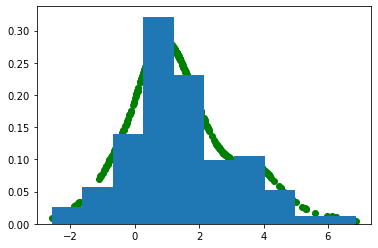

 mean loglikelihood of p_g  -1.84994817
Gradient cte -0.007580307483673096
 Cte Update  3.103993250370024

 pn/(pn+pm) 2 0.9099154

 std dev y_predit 1.6224762
mean y_predit 1.4196599
pn/(pn+pm)  0.905667961
std dev y_pred 1.62247634
 model train on batch  -0.24797870218753815
############ iteration  77 ################
 p_nx  [0.099372834 0.0962078571 0.12814118 ... 0.109240972 0.149637729 0.119196065]


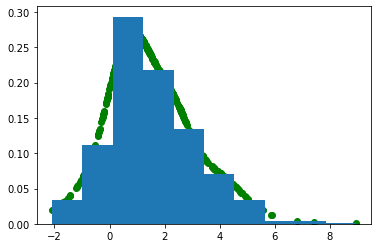

 mean loglikelihood of p_g  -1.84952843
Gradient cte -0.008181819915771485
 Cte Update  3.0958114304542526

 pn/(pn+pm) 2 0.89015746

 std dev y_predit 1.6071228
mean y_predit 1.5095108
pn/(pn+pm)  0.884765387
std dev y_pred 1.60712278
 model train on batch  -0.2956237196922302
############ iteration  78 ################
 p_nx  [0.15525955 0.131225944 0.128585681 ... 0.12122269 0.145652756 0.157828361]


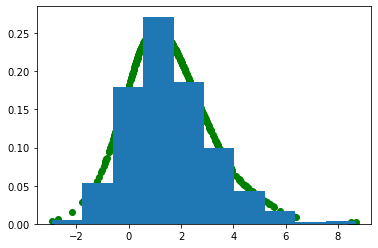

 mean loglikelihood of p_g  -1.88710213
Gradient cte -0.015313661575317383
 Cte Update  3.080497768878935

 pn/(pn+pm) 2 0.87638855

 std dev y_predit 1.6514047
mean y_predit 1.5366386
pn/(pn+pm)  0.870222032
std dev y_pred 1.65140474
 model train on batch  -0.33961963653564453
############ iteration  79 ################
 p_nx  [0.113109976 0.102411903 0.0963174254 ... 0.103713565 0.117847838 0.107537046]


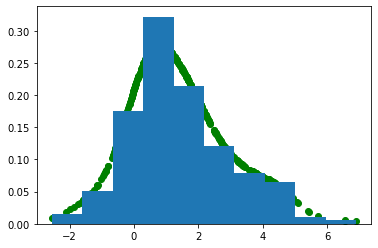

 mean loglikelihood of p_g  -1.8347944
Gradient cte -0.011020044326782226
 Cte Update  3.069477724552153

 pn/(pn+pm) 2 0.8978918

 std dev y_predit 1.5820187
mean y_predit 1.4093282
pn/(pn+pm)  0.893827379
std dev y_pred 1.58201873
 model train on batch  -0.29635006189346313
############ iteration  80 ################
 p_nx  [0.162548602 0.116342597 0.153128743 ... 0.136826277 0.12053287 0.127610385]


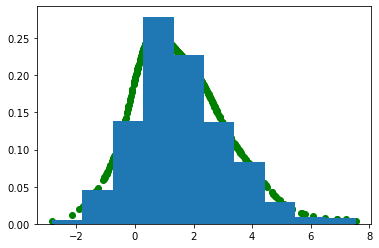

 mean loglikelihood of p_g  -1.8562361
Gradient cte -0.012137432098388672
 Cte Update  3.0573402924537643

 pn/(pn+pm) 2 0.8781792

 std dev y_predit 1.6054441
mean y_predit 1.5439503
pn/(pn+pm)  0.872145
std dev y_pred 1.60544407
 model train on batch  -0.33394014835357666
############ iteration  81 ################
 p_nx  [0.13632144 0.134442523 0.139732465 ... 0.148484856 0.123057887 0.133097336]


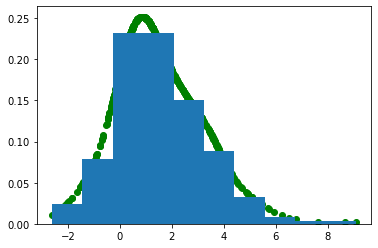

 mean loglikelihood of p_g  -1.9279716
Gradient cte -0.01449593448638916
 Cte Update  3.042844357967375

 pn/(pn+pm) 2 0.86949086

 std dev y_predit 1.7305229
mean y_predit 1.5263913
pn/(pn+pm)  0.862453222
std dev y_pred 1.73052287
 model train on batch  -0.350754052400589
############ iteration  82 ################
 p_nx  [0.136908576 0.142615408 0.12374723 ... 0.13681297 0.118646018 0.120703]


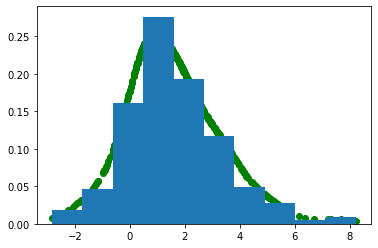

 mean loglikelihood of p_g  -1.92294073
Gradient cte -0.012686786651611328
 Cte Update  3.0301575713157636

 pn/(pn+pm) 2 0.8779842

 std dev y_predit 1.7222569
mean y_predit 1.5697676
pn/(pn+pm)  0.872257113
std dev y_pred 1.72225702
 model train on batch  -0.3443429470062256
############ iteration  83 ################
 p_nx  [0.169623628 0.153365791 0.128505617 ... 0.146794215 0.127426326 0.128652647]


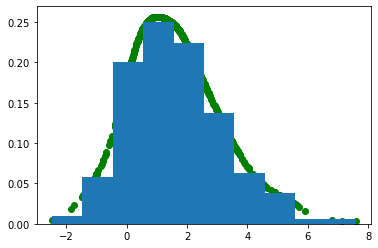

 mean loglikelihood of p_g  -1.84320855
Gradient cte -0.017263105392456055
 Cte Update  3.0128944659233077

 pn/(pn+pm) 2 0.8706665

 std dev y_predit 1.5769709
mean y_predit 1.61709
pn/(pn+pm)  0.8641271
std dev y_pred 1.57697093
 model train on batch  -0.3583393692970276
############ iteration  84 ################
 p_nx  [0.13337338 0.133158728 0.154348955 ... 0.140316084 0.106202632 0.117453791]


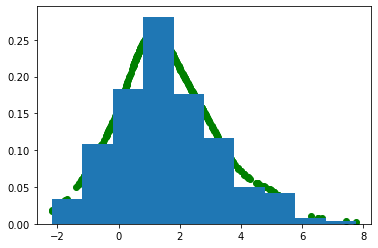

 mean loglikelihood of p_g  -1.90979946
Gradient cte -0.013565658569335937
 Cte Update  2.999328807353972

 pn/(pn+pm) 2 0.86766726

 std dev y_predit 1.680288
mean y_predit 1.613128
pn/(pn+pm)  0.86146152
std dev y_pred 1.68028808
 model train on batch  -0.37216633558273315
############ iteration  85 ################
 p_nx  [0.138126984 0.121392347 0.154744238 ... 0.126437575 0.13155587 0.124814287]


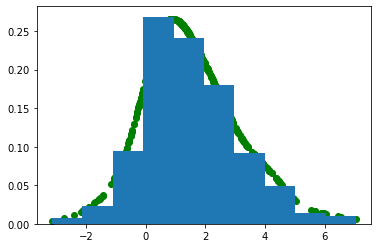

 mean loglikelihood of p_g  -1.86755931
Gradient cte -0.009423870086669922
 Cte Update  2.989904937267302

 pn/(pn+pm) 2 0.8860904

 std dev y_predit 1.6174129
mean y_predit 1.5199757
pn/(pn+pm)  0.880201042
std dev y_pred 1.61741292
 model train on batch  -0.31960833072662354
############ iteration  86 ################
 p_nx  [0.122187547 0.141758025 0.154338568 ... 0.124242701 0.103833117 0.130954847]


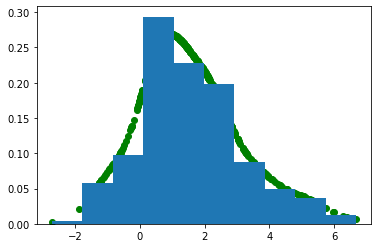

 mean loglikelihood of p_g  -1.84381
Gradient cte -0.008844928741455078
 Cte Update  2.981060008525847

 pn/(pn+pm) 2 0.8966413

 std dev y_predit 1.5906742
mean y_predit 1.538154
pn/(pn+pm)  0.890075445
std dev y_pred 1.59067416
 model train on batch  -0.2827412784099579
############ iteration  87 ################
 p_nx  [0.124820955 0.115697756 0.0905456394 ... 0.129664287 0.094424352 0.13056235]


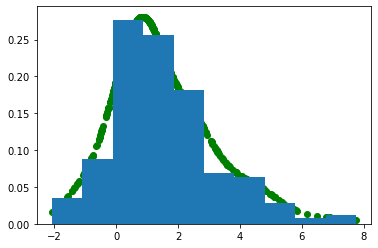

 mean loglikelihood of p_g  -1.87237501
Gradient cte -0.011483435630798339
 Cte Update  2.9695765728950487

 pn/(pn+pm) 2 0.8889491

 std dev y_predit 1.6859438
mean y_predit 1.5329417
pn/(pn+pm)  0.88327235
std dev y_pred 1.68594384
 model train on batch  -0.3057405948638916
############ iteration  88 ################
 p_nx  [0.122131802 0.115634441 0.109135807 ... 0.141732067 0.105873421 0.0928725377]


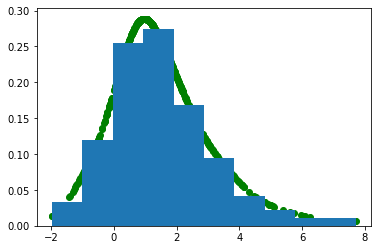

 mean loglikelihood of p_g  -1.82522595
Gradient cte -0.00996434497833252
 Cte Update  2.959612227916716

 pn/(pn+pm) 2 0.89530116

 std dev y_predit 1.6076306
mean y_predit 1.5061615
pn/(pn+pm)  0.889665067
std dev y_pred 1.60763061
 model train on batch  -0.29961612820625305
############ iteration  89 ################
 p_nx  [0.123834945 0.116422676 0.120059118 ... 0.128526151 0.125110671 0.129492566]


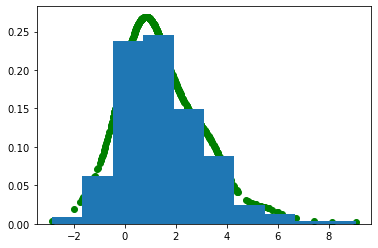

 mean loglikelihood of p_g  -1.87631595
Gradient cte -0.014133843421936035
 Cte Update  2.94547838449478

 pn/(pn+pm) 2 0.8777022

 std dev y_predit 1.6738201
mean y_predit 1.4531492
pn/(pn+pm)  0.87082386
std dev y_pred 1.67382014
 model train on batch  -0.3443639576435089
############ iteration  90 ################
 p_nx  [0.13354674 0.138522074 0.127853468 ... 0.122939944 0.123920068 0.120998159]


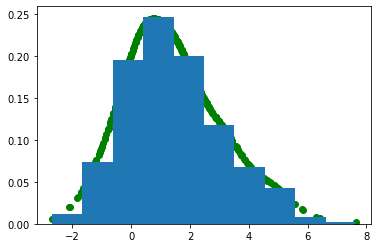

 mean loglikelihood of p_g  -1.90218306
Gradient cte -0.01338832187652588
 Cte Update  2.9320900626182542

 pn/(pn+pm) 2 0.88253444

 std dev y_predit 1.6743093
mean y_predit 1.4266709
pn/(pn+pm)  0.876682341
std dev y_pred 1.67430925
 model train on batch  -0.3428685665130615
############ iteration  91 ################
 p_nx  [0.137643009 0.121965885 0.125824958 ... 0.120053798 0.134747 0.120381169]


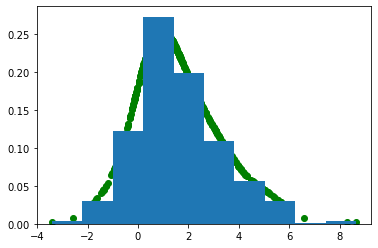

 mean loglikelihood of p_g  -1.91527247
Gradient cte -0.012161558151245117
 Cte Update  2.919928504467009

 pn/(pn+pm) 2 0.8834646

 std dev y_predit 1.715291
mean y_predit 1.5995302
pn/(pn+pm)  0.876624942
std dev y_pred 1.71529102
 model train on batch  -0.3251810371875763
############ iteration  92 ################
 p_nx  [0.143924475 0.137075603 0.147094041 ... 0.150418222 0.156013921 0.140103415]


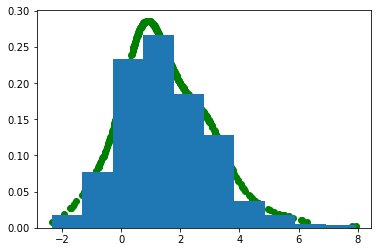

 mean loglikelihood of p_g  -1.81099761
Gradient cte -0.019177820205688475
 Cte Update  2.900750684261321

 pn/(pn+pm) 2 0.85712224

 std dev y_predit 1.5438414
mean y_predit 1.5078472
pn/(pn+pm)  0.849516273
std dev y_pred 1.54384136
 model train on batch  -0.4056769013404846
############ iteration  93 ################
 p_nx  [0.118876949 0.129189879 0.111663967 ... 0.141176209 0.132211342 0.130879059]


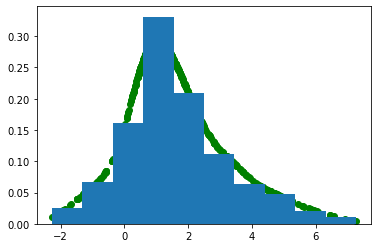

 mean loglikelihood of p_g  -1.85229075
Gradient cte -0.009918448448181152
 Cte Update  2.8908322358131398

 pn/(pn+pm) 2 0.89182615

 std dev y_predit 1.6427661
mean y_predit 1.64173
pn/(pn+pm)  0.885660589
std dev y_pred 1.64276612
 model train on batch  -0.3040212094783783
############ iteration  94 ################
 p_nx  [0.148298681 0.152504697 0.127373964 ... 0.139728397 0.140879646 0.146747246]


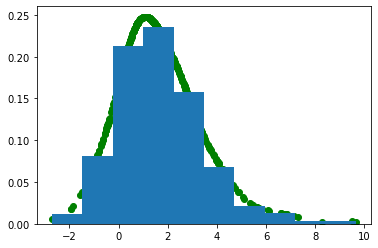

 mean loglikelihood of p_g  -1.92808938
Gradient cte -0.0157921142578125
 Cte Update  2.8750401215553274

 pn/(pn+pm) 2 0.8713266

 std dev y_predit 1.7599971
mean y_predit 1.6830835
pn/(pn+pm)  0.863459349
std dev y_pred 1.75999713
 model train on batch  -0.3477071225643158
############ iteration  95 ################
 p_nx  [0.126297668 0.102465928 0.128047302 ... 0.126024902 0.135395378 0.107484907]


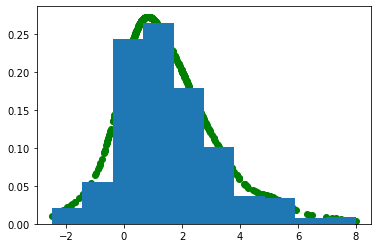

 mean loglikelihood of p_g  -1.87396681
Gradient cte -0.012106373786926269
 Cte Update  2.862933747768401

 pn/(pn+pm) 2 0.8868105

 std dev y_predit 1.6815394
mean y_predit 1.5289321
pn/(pn+pm)  0.880192876
std dev y_pred 1.6815393
 model train on batch  -0.3167039752006531
############ iteration  96 ################
 p_nx  [0.138824135 0.124911577 0.14158164 ... 0.137226939 0.126137391 0.12474218]


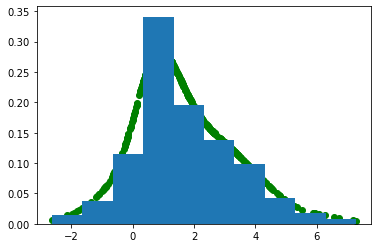

 mean loglikelihood of p_g  -1.85752273
Gradient cte -0.014832521438598633
 Cte Update  2.8481012263298022

 pn/(pn+pm) 2 0.8704079

 std dev y_predit 1.6315426
mean y_predit 1.6573652
pn/(pn+pm)  0.862179518
std dev y_pred 1.63154268
 model train on batch  -0.355617880821228
############ iteration  97 ################
 p_nx  [0.151322946 0.139116362 0.14926587 ... 0.138024017 0.138199121 0.146351665]


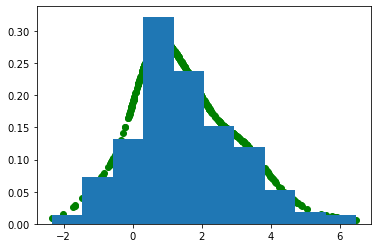

 mean loglikelihood of p_g  -1.80210769
Gradient cte -0.01522407627105713
 Cte Update  2.8328771500587453

 pn/(pn+pm) 2 0.8661792

 std dev y_predit 1.511203
mean y_predit 1.4773352
pn/(pn+pm)  0.858401477
std dev y_pred 1.51120329
 model train on batch  -0.37461113929748535
############ iteration  98 ################
 p_nx  [0.100461543 0.113052279 0.118656769 ... 0.128807217 0.116206758 0.10551025]


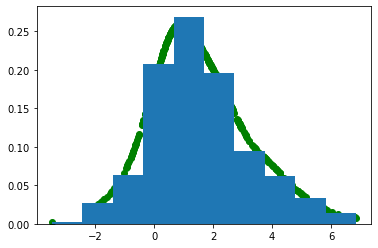

 mean loglikelihood of p_g  -1.9012754
Gradient cte -0.008358978271484374
 Cte Update  2.8245181717872607

 pn/(pn+pm) 2 0.8971055

 std dev y_predit 1.6739508
mean y_predit 1.5408936
pn/(pn+pm)  0.889574349
std dev y_pred 1.67395079
 model train on batch  -0.2864275872707367
############ iteration  99 ################
 p_nx  [0.14303644 0.140967801 0.142605826 ... 0.162282124 0.165426046 0.130913258]


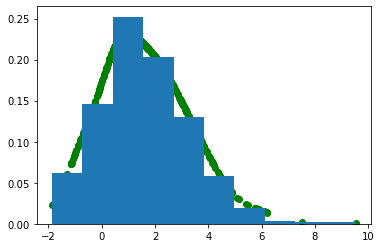

 mean loglikelihood of p_g  -1.9040004
Gradient cte -0.011412164688110352
 Cte Update  2.8131060070991505

 pn/(pn+pm) 2 0.86649936

 std dev y_predit 1.6773821
mean y_predit 1.6207025
pn/(pn+pm)  0.856541693
std dev y_pred 1.67738211
 model train on batch  -0.3627138137817383
############ iteration  100 ################
 p_nx  [0.138006642 0.131069735 0.129650369 ... 0.176338196 0.12650308 0.125712633]


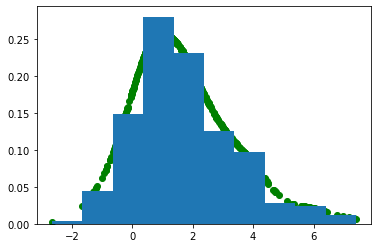

 mean loglikelihood of p_g  -1.88392866
Gradient cte -0.010057446479797363
 Cte Update  2.803048560619353

 pn/(pn+pm) 2 0.88376004

 std dev y_predit 1.6759809
mean y_predit 1.6830606
pn/(pn+pm)  0.875980556
std dev y_pred 1.67598081
 model train on batch  -0.32937091588974
############ iteration  101 ################
 p_nx  [0.112721123 0.146182463 0.126103595 ... 0.116872653 0.121921927 0.139398649]


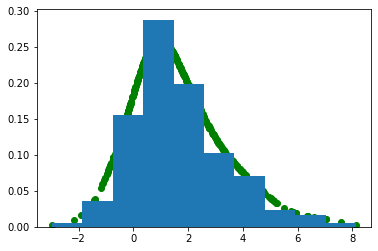

 mean loglikelihood of p_g  -1.90346897
Gradient cte -0.008980987548828125
 Cte Update  2.794067573070525

 pn/(pn+pm) 2 0.89374954

 std dev y_predit 1.7164447
mean y_predit 1.642455
pn/(pn+pm)  0.886371
std dev y_pred 1.71644461
 model train on batch  -0.30369240045547485
############ iteration  102 ################
 p_nx  [0.123657219 0.138382643 0.126588821 ... 0.139365479 0.114515774 0.126136675]


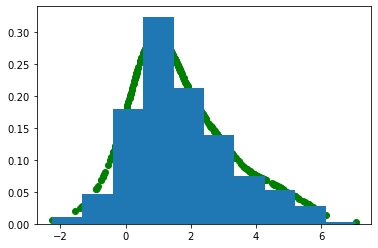

 mean loglikelihood of p_g  -1.80641723
Gradient cte -0.010486802101135255
 Cte Update  2.78358077096939

 pn/(pn+pm) 2 0.8806679

 std dev y_predit 1.5654899
mean y_predit 1.6820763
pn/(pn+pm)  0.874395728
std dev y_pred 1.56549
 model train on batch  -0.35438746213912964
############ iteration  103 ################
 p_nx  [0.121850729 0.104298629 0.133419573 ... 0.118585385 0.119755059 0.136688098]


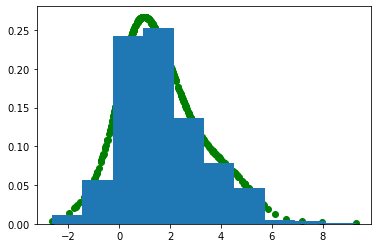

 mean loglikelihood of p_g  -1.87699163
Gradient cte -0.010130637168884278
 Cte Update  2.7734501338005058

 pn/(pn+pm) 2 0.8864596

 std dev y_predit 1.6674635
mean y_predit 1.6915935
pn/(pn+pm)  0.87857908
std dev y_pred 1.66746354
 model train on batch  -0.3199492394924164
############ iteration  104 ################
 p_nx  [0.148556098 0.103713572 0.101886146 ... 0.105312467 0.12594147 0.121539749]


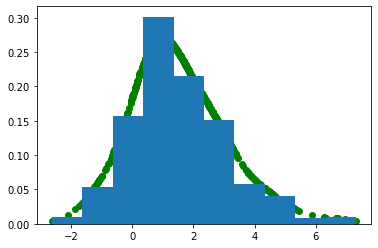

 mean loglikelihood of p_g  -1.84046435
Gradient cte -0.013301786422729492
 Cte Update  2.7601483473777764

 pn/(pn+pm) 2 0.87254006

 std dev y_predit 1.5757625
mean y_predit 1.5159752
pn/(pn+pm)  0.864873648
std dev y_pred 1.57576251
 model train on batch  -0.36605536937713623
############ iteration  105 ################
 p_nx  [0.115016229 0.110386357 0.187599808 ... 0.124197744 0.154650852 0.123331107]


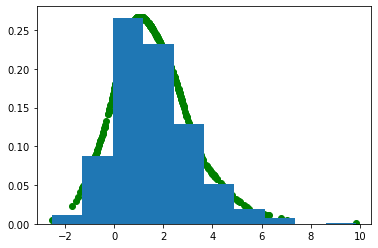

 mean loglikelihood of p_g  -1.83827245
Gradient cte -0.01161511993408203
 Cte Update  2.748533227443694

 pn/(pn+pm) 2 0.8800444

 std dev y_predit 1.5897053
mean y_predit 1.57004
pn/(pn+pm)  0.871902227
std dev y_pred 1.58970535
 model train on batch  -0.33391866087913513
############ iteration  106 ################
 p_nx  [0.109298602 0.117016025 0.138244137 ... 0.141078085 0.137003854 0.131487578]


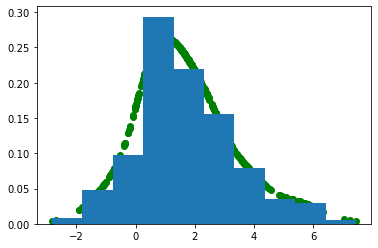

 mean loglikelihood of p_g  -1.89029777
Gradient cte -0.008127634048461913
 Cte Update  2.7404055933952325

 pn/(pn+pm) 2 0.88820636

 std dev y_predit 1.6752375
mean y_predit 1.6658819
pn/(pn+pm)  0.878868043
std dev y_pred 1.67523766
 model train on batch  -0.30268168449401855
############ iteration  107 ################
 p_nx  [0.124935761 0.114590764 0.12055672 ... 0.118864484 0.120810963 0.129919082]


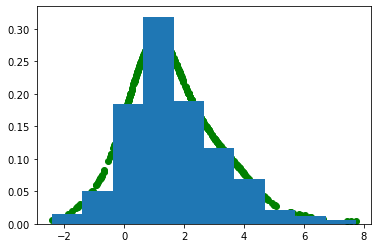

 mean loglikelihood of p_g  -1.82227445
Gradient cte -0.01125194549560547
 Cte Update  2.729153647899627

 pn/(pn+pm) 2 0.8815397

 std dev y_predit 1.5677489
mean y_predit 1.6270635
pn/(pn+pm)  0.872781
std dev y_pred 1.5677489
 model train on batch  -0.33301758766174316
############ iteration  108 ################
 p_nx  [0.132127136 0.125611961 0.131551534 ... 0.160407156 0.147897 0.134624451]


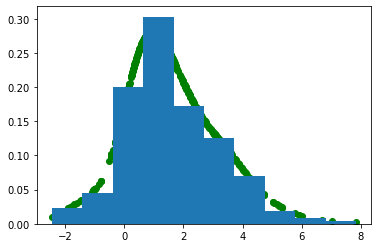

 mean loglikelihood of p_g  -1.83778465
Gradient cte -0.01360067367553711
 Cte Update  2.71555297422409

 pn/(pn+pm) 2 0.88139015

 std dev y_predit 1.5796618
mean y_predit 1.5940256
pn/(pn+pm)  0.872670889
std dev y_pred 1.57966185
 model train on batch  -0.3373306095600128
############ iteration  109 ################
 p_nx  [0.126075089 0.127846032 0.130993381 ... 0.137577325 0.140717641 0.136597008]


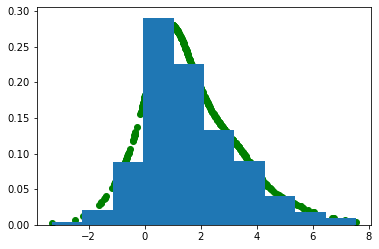

 mean loglikelihood of p_g  -1.87652099
Gradient cte -0.012713851928710938
 Cte Update  2.702839122295379

 pn/(pn+pm) 2 0.8799033

 std dev y_predit 1.6644409
mean y_predit 1.5893035
pn/(pn+pm)  0.870830297
std dev y_pred 1.66444087
 model train on batch  -0.33306267857551575
############ iteration  110 ################
 p_nx  [0.134523705 0.118114673 0.10603863 ... 0.12449421 0.147135705 0.160905406]


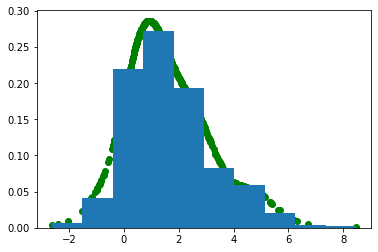

 mean loglikelihood of p_g  -1.81680667
Gradient cte -0.0099757022857666
 Cte Update  2.6928634200096124

 pn/(pn+pm) 2 0.8763948

 std dev y_predit 1.5783484
mean y_predit 1.6412036
pn/(pn+pm)  0.867618322
std dev y_pred 1.5783484
 model train on batch  -0.3554390072822571
############ iteration  111 ################
 p_nx  [0.132999137 0.148093045 0.133415043 ... 0.143328175 0.13280268 0.126813695]


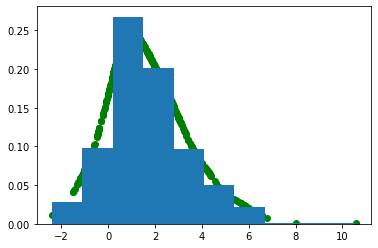

 mean loglikelihood of p_g  -1.93273687
Gradient cte -0.013275300025939941
 Cte Update  2.6795881199836726

 pn/(pn+pm) 2 0.8756056

 std dev y_predit 1.7422479
mean y_predit 1.6510371
pn/(pn+pm)  0.865965366
std dev y_pred 1.74224794
 model train on batch  -0.3520301580429077
############ iteration  112 ################
 p_nx  [0.13622722 0.123109534 0.131675556 ... 0.109713882 0.140700132 0.131336614]


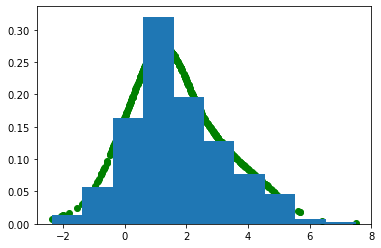

 mean loglikelihood of p_g  -1.83290851
Gradient cte -0.011625675201416016
 Cte Update  2.6679624447822565

 pn/(pn+pm) 2 0.87935215

 std dev y_predit 1.553775
mean y_predit 1.6674234
pn/(pn+pm)  0.871429563
std dev y_pred 1.55377495
 model train on batch  -0.3572441041469574
############ iteration  113 ################
 p_nx  [0.141632542 0.147812054 0.164474398 ... 0.159113556 0.13327612 0.16227144]


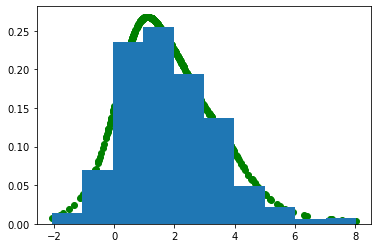

 mean loglikelihood of p_g  -1.83149409
Gradient cte -0.010375307083129883
 Cte Update  2.6575871376991267

 pn/(pn+pm) 2 0.87140334

 std dev y_predit 1.575278
mean y_predit 1.8388546
pn/(pn+pm)  0.859949291
std dev y_pred 1.57527804
 model train on batch  -0.34890803694725037
############ iteration  114 ################
 p_nx  [0.140260637 0.147968963 0.122209631 ... 0.172077641 0.174255371 0.168144777]


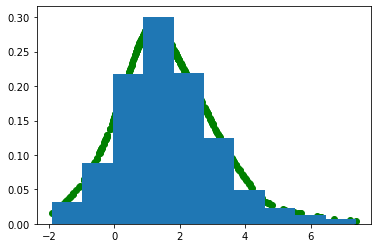

 mean loglikelihood of p_g  -1.79115176
Gradient cte -0.0105797700881958
 Cte Update  2.647007367610931

 pn/(pn+pm) 2 0.86928576

 std dev y_predit 1.499899
mean y_predit 1.6100786
pn/(pn+pm)  0.857608378
std dev y_pred 1.49989903
 model train on batch  -0.3556425869464874
############ iteration  115 ################
 p_nx  [0.141891584 0.134002641 0.140993208 ... 0.146404773 0.144739404 0.150125861]


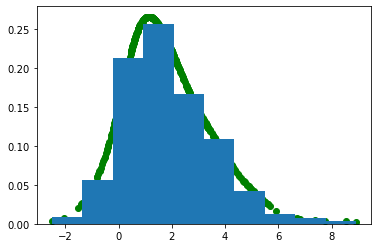

 mean loglikelihood of p_g  -1.8648659
Gradient cte -0.012537131309509278
 Cte Update  2.634470236301422

 pn/(pn+pm) 2 0.8702984

 std dev y_predit 1.6434789
mean y_predit 1.83486
pn/(pn+pm)  0.859701455
std dev y_pred 1.64347887
 model train on batch  -0.35354748368263245
############ iteration  116 ################
 p_nx  [0.135820597 0.14524883 0.129533827 ... 0.147216409 0.133883461 0.115869679]


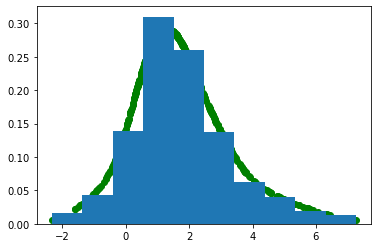

 mean loglikelihood of p_g  -1.80883348
Gradient cte -0.008133905410766602
 Cte Update  2.626336330890655

 pn/(pn+pm) 2 0.8767006

 std dev y_predit 1.5525804
mean y_predit 1.7420727
pn/(pn+pm)  0.868940294
std dev y_pred 1.55258024
 model train on batch  -0.3611508011817932
############ iteration  117 ################
 p_nx  [0.121047206 0.139092028 0.184520215 ... 0.1398305 0.165926114 0.133571]


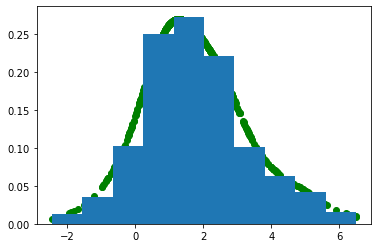

 mean loglikelihood of p_g  -1.8319875
Gradient cte -0.009665074348449708
 Cte Update  2.6166712565422054

 pn/(pn+pm) 2 0.8637217

 std dev y_predit 1.5476953
mean y_predit 1.7683848
pn/(pn+pm)  0.852464199
std dev y_pred 1.54769528
 model train on batch  -0.37371596693992615
############ iteration  118 ################
 p_nx  [0.140355304 0.140241906 0.121819645 ... 0.174328014 0.145888045 0.118189603]


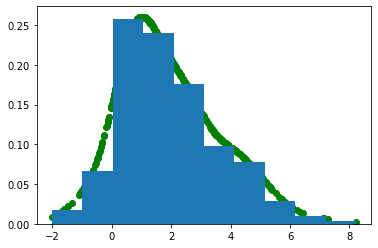

 mean loglikelihood of p_g  -1.88603389
Gradient cte -0.013381069183349609
 Cte Update  2.603290187358856

 pn/(pn+pm) 2 0.8710774

 std dev y_predit 1.6827384
mean y_predit 1.9375457
pn/(pn+pm)  0.858962953
std dev y_pred 1.68273842
 model train on batch  -0.3431277871131897
############ iteration  119 ################
 p_nx  [0.160404027 0.139927357 0.135625929 ... 0.147993729 0.142043695 0.151909694]


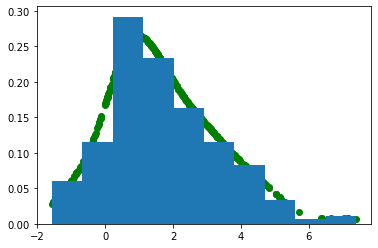

 mean loglikelihood of p_g  -1.86089194
Gradient cte -0.013080851554870605
 Cte Update  2.5902093358039853

 pn/(pn+pm) 2 0.8725847

 std dev y_predit 1.6275315
mean y_predit 1.7092577
pn/(pn+pm)  0.862848401
std dev y_pred 1.62753141
 model train on batch  -0.36638879776000977
############ iteration  120 ################
 p_nx  [0.148643255 0.124554239 0.135264695 ... 0.151945636 0.141530469 0.134029865]


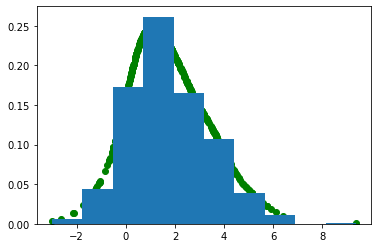

 mean loglikelihood of p_g  -1.89928055
Gradient cte -0.01111034870147705
 Cte Update  2.5790989871025083

 pn/(pn+pm) 2 0.8705188

 std dev y_predit 1.6586452
mean y_predit 1.72371
pn/(pn+pm)  0.85864985
std dev y_pred 1.65864527
 model train on batch  -0.36140990257263184
############ iteration  121 ################
 p_nx  [0.131618872 0.133322522 0.160238743 ... 0.126923606 0.11074397 0.123780459]


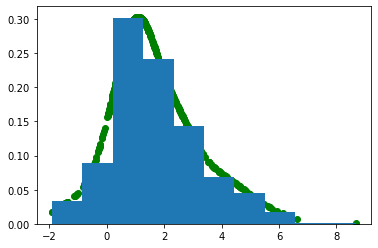

 mean loglikelihood of p_g  -1.80983651
Gradient cte -0.009272560119628907
 Cte Update  2.569826426982879

 pn/(pn+pm) 2 0.8869509

 std dev y_predit 1.5746889
mean y_predit 1.7036619
pn/(pn+pm)  0.877553523
std dev y_pred 1.57468891
 model train on batch  -0.32491859793663025
############ iteration  122 ################
 p_nx  [0.156708285 0.137732431 0.145608872 ... 0.165183112 0.122270368 0.131731689]


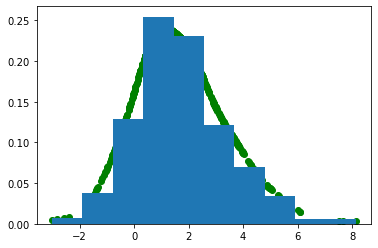

 mean loglikelihood of p_g  -1.91770649
Gradient cte -0.00958817481994629
 Cte Update  2.5602382521629328

 pn/(pn+pm) 2 0.882392

 std dev y_predit 1.686735
mean y_predit 1.7017521
pn/(pn+pm)  0.870552897
std dev y_pred 1.68673503
 model train on batch  -0.3251584470272064
############ iteration  123 ################
 p_nx  [0.174205944 0.187674344 0.13746886 ... 0.159844726 0.188714489 0.169513747]


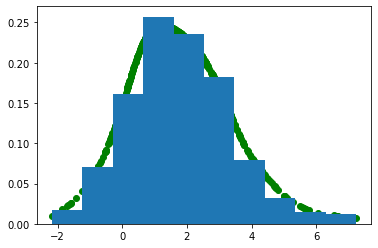

 mean loglikelihood of p_g  -1.8622365
Gradient cte -0.015119768142700196
 Cte Update  2.5451184840202328

 pn/(pn+pm) 2 0.8463185

 std dev y_predit 1.5908985
mean y_predit 1.781135
pn/(pn+pm)  0.833352566
std dev y_pred 1.59089839
 model train on batch  -0.42759597301483154
############ iteration  124 ################
 p_nx  [0.174897775 0.136658832 0.149061739 ... 0.15031296 0.173184142 0.143131405]


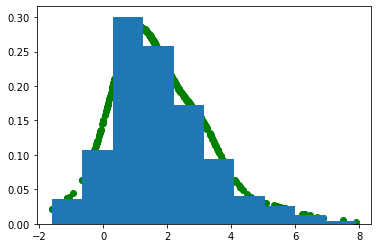

 mean loglikelihood of p_g  -1.80684543
Gradient cte -0.01750864028930664
 Cte Update  2.527609843730926

 pn/(pn+pm) 2 0.8523302

 std dev y_predit 1.5587882
mean y_predit 1.7646064
pn/(pn+pm)  0.841247499
std dev y_pred 1.55878818
 model train on batch  -0.4301328659057617
############ iteration  125 ################
 p_nx  [0.16197072 0.14705 0.150728673 ... 0.111378081 0.135900602 0.147098109]


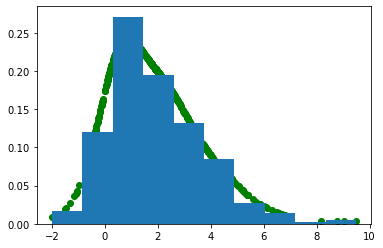

 mean loglikelihood of p_g  -1.91392219
Gradient cte -0.011522982597351074
 Cte Update  2.5160868611335747

 pn/(pn+pm) 2 0.8666046

 std dev y_predit 1.7677226
mean y_predit 1.901812
pn/(pn+pm)  0.854262292
std dev y_pred 1.76772273
 model train on batch  -0.37064075469970703
############ iteration  126 ################
 p_nx  [0.144204214 0.138660729 0.141291708 ... 0.137037754 0.144091696 0.16632092]


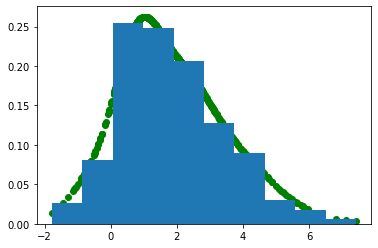

 mean loglikelihood of p_g  -1.85405
Gradient cte -0.012487574577331543
 Cte Update  2.503599286556243

 pn/(pn+pm) 2 0.8641673

 std dev y_predit 1.599337
mean y_predit 1.8329232
pn/(pn+pm)  0.852216959
std dev y_pred 1.59933698
 model train on batch  -0.38179782032966614
############ iteration  127 ################
 p_nx  [0.157567352 0.171595603 0.165362865 ... 0.118405424 0.139815837 0.171839446]


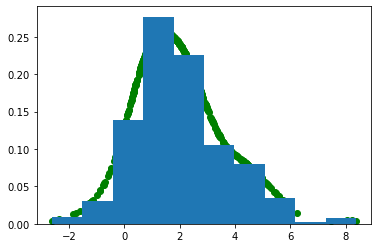

 mean loglikelihood of p_g  -1.88162839
Gradient cte -0.004806191444396973
 Cte Update  2.498793095111846

 pn/(pn+pm) 2 0.872115

 std dev y_predit 1.6588013
mean y_predit 1.98984
pn/(pn+pm)  0.859136283
std dev y_pred 1.65880132
 model train on batch  -0.35022854804992676
############ iteration  128 ################
 p_nx  [0.128406703 0.122315273 0.147425815 ... 0.122605838 0.164325774 0.148109779]


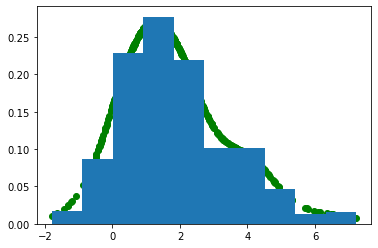

 mean loglikelihood of p_g  -1.83553731
Gradient cte -0.0021032149791717527
 Cte Update  2.4966898801326742

 pn/(pn+pm) 2 0.8986571

 std dev y_predit 1.6033071
mean y_predit 1.8415359
pn/(pn+pm)  0.889124751
std dev y_pred 1.60330725
 model train on batch  -0.2937578558921814
############ iteration  129 ################
 p_nx  [0.162030742 0.140434027 0.160952911 ... 0.160710409 0.17268607 0.174459562]


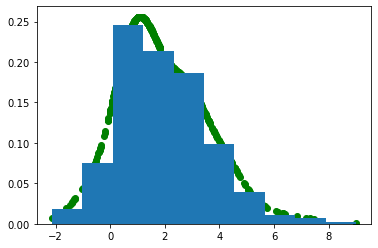

 mean loglikelihood of p_g  -1.87883937
Gradient cte -0.01758987045288086
 Cte Update  2.4791000096797933

 pn/(pn+pm) 2 0.84249926

 std dev y_predit 1.647719
mean y_predit 1.9291282
pn/(pn+pm)  0.827911794
std dev y_pred 1.64771903
 model train on batch  -0.443869024515152
############ iteration  130 ################
 p_nx  [0.170192629 0.148610502 0.141193703 ... 0.155299529 0.159101114 0.141385242]


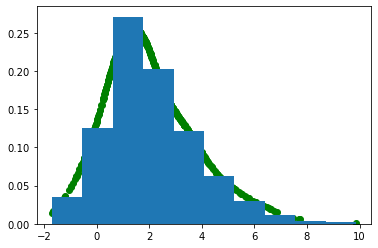

 mean loglikelihood of p_g  -1.9200834
Gradient cte -0.008108619689941407
 Cte Update  2.4709913899898517

 pn/(pn+pm) 2 0.8698093

 std dev y_predit 1.7505573
mean y_predit 2.0269456
pn/(pn+pm)  0.856553733
std dev y_pred 1.75055718
 model train on batch  -0.3619450330734253
############ iteration  131 ################
 p_nx  [0.12943238 0.122448385 0.19753924 ... 0.133862 0.139838636 0.115694553]


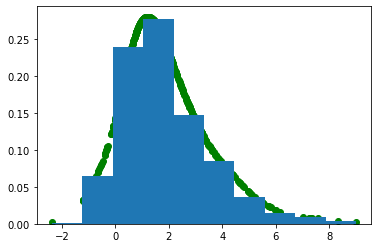

 mean loglikelihood of p_g  -1.84900367
Gradient cte -0.008608340263366699
 Cte Update  2.462383049726485

 pn/(pn+pm) 2 0.87450504

 std dev y_predit 1.6503812
mean y_predit 1.8714192
pn/(pn+pm)  0.863237
std dev y_pred 1.65038121
 model train on batch  -0.3591071665287018
############ iteration  132 ################
 p_nx  [0.1698526 0.146561384 0.13851507 ... 0.135953039 0.151797682 0.153399065]


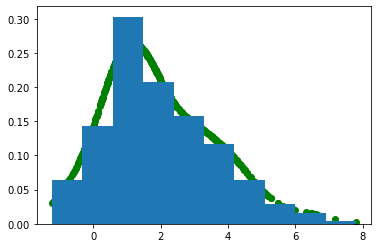

 mean loglikelihood of p_g  -1.85964346
Gradient cte -0.00441028356552124
 Cte Update  2.457972766160964

 pn/(pn+pm) 2 0.8677998

 std dev y_predit 1.6368588
mean y_predit 1.953249
pn/(pn+pm)  0.856691122
std dev y_pred 1.63685882
 model train on batch  -0.3880416750907898
############ iteration  133 ################
 p_nx  [0.144113675 0.144562483 0.173010647 ... 0.186940432 0.180964306 0.177799806]


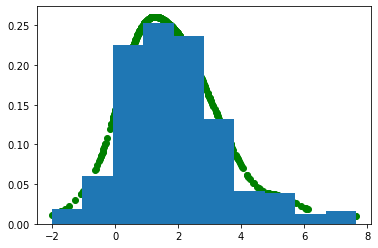

 mean loglikelihood of p_g  -1.8566488
Gradient cte -0.009214774131774902
 Cte Update  2.448757992029189

 pn/(pn+pm) 2 0.8658271

 std dev y_predit 1.6429421
mean y_predit 1.8786612
pn/(pn+pm)  0.850778103
std dev y_pred 1.64294207
 model train on batch  -0.3674272298812866
############ iteration  134 ################
 p_nx  [0.106681921 0.166303396 0.159453362 ... 0.131864801 0.126176015 0.162413031]


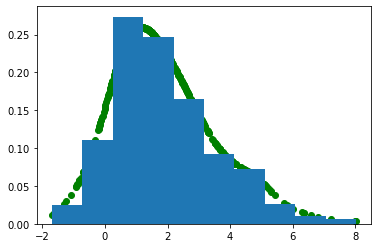

 mean loglikelihood of p_g  -1.86240089
Gradient cte -0.008408683776855469
 Cte Update  2.4403493082523338

 pn/(pn+pm) 2 0.87364024

 std dev y_predit 1.6444889
mean y_predit 1.9024152
pn/(pn+pm)  0.861005843
std dev y_pred 1.64448893
 model train on batch  -0.35942670702934265
############ iteration  135 ################
 p_nx  [0.165308163 0.192590311 0.194756463 ... 0.204161033 0.153040558 0.165909186]


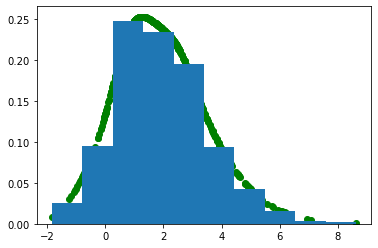

 mean loglikelihood of p_g  -1.83265603
Gradient cte -0.009544342041015626
 Cte Update  2.4308049662113183

 pn/(pn+pm) 2 0.8528366

 std dev y_predit 1.5524215
mean y_predit 1.9176214
pn/(pn+pm)  0.837016523
std dev y_pred 1.55242145
 model train on batch  -0.4084619879722595
############ iteration  136 ################
 p_nx  [0.137914807 0.126032606 0.1702241 ... 0.147094741 0.163051873 0.145427838]


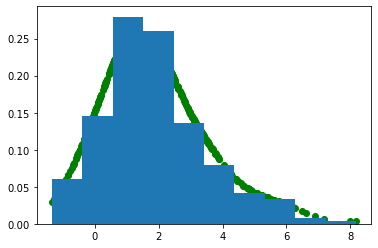

 mean loglikelihood of p_g  -1.87230241
Gradient cte -0.00469018030166626
 Cte Update  2.426114785909652

 pn/(pn+pm) 2 0.8810248

 std dev y_predit 1.6551253
mean y_predit 1.8855622
pn/(pn+pm)  0.866997063
std dev y_pred 1.65512502
 model train on batch  -0.32717010378837585
############ iteration  137 ################
 p_nx  [0.152575538 0.190041393 0.159681931 ... 0.157348186 0.157233357 0.150631532]


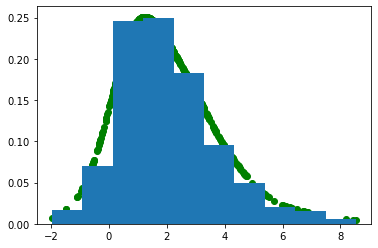

 mean loglikelihood of p_g  -1.9011904
Gradient cte -0.015134892463684081
 Cte Update  2.410979893445968

 pn/(pn+pm) 2 0.8561969

 std dev y_predit 1.7152773
mean y_predit 2.0330591
pn/(pn+pm)  0.842413723
std dev y_pred 1.71527731
 model train on batch  -0.40386176109313965
############ iteration  138 ################
 p_nx  [0.149717733 0.138509065 0.174857408 ... 0.144735202 0.154942483 0.138227195]


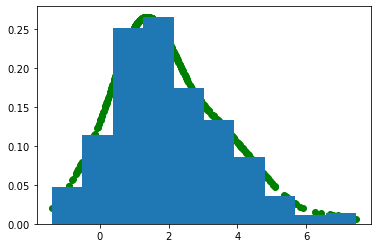

 mean loglikelihood of p_g  -1.85110474
Gradient cte -0.005079565525054931
 Cte Update  2.405900327920913

 pn/(pn+pm) 2 0.87342775

 std dev y_predit 1.6022911
mean y_predit 2.0008051
pn/(pn+pm)  0.860936582
std dev y_pred 1.60229111
 model train on batch  -0.3692166209220886
############ iteration  139 ################
 p_nx  [0.150209069 0.174563915 0.13995932 ... 0.1497695 0.12864688 0.148091704]


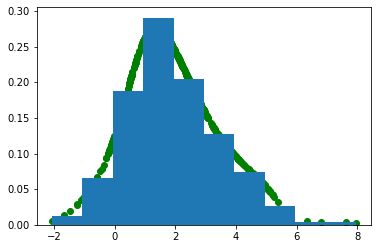

 mean loglikelihood of p_g  -1.81263196
Gradient cte -0.005458902359008789
 Cte Update  2.400441425561904

 pn/(pn+pm) 2 0.86959213

 std dev y_predit 1.5314472
mean y_predit 1.9101276
pn/(pn+pm)  0.855701327
std dev y_pred 1.53144717
 model train on batch  -0.3703180253505707
############ iteration  140 ################
 p_nx  [0.166816771 0.126738846 0.0927721113 ... 0.129264489 0.149127364 0.146759853]


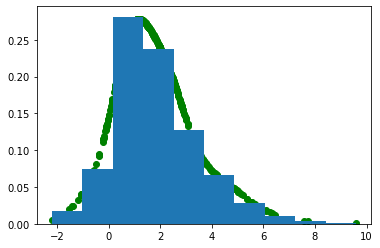

 mean loglikelihood of p_g  -1.83060586
Gradient cte -0.00783783721923828
 Cte Update  2.392603588342666

 pn/(pn+pm) 2 0.87773335

 std dev y_predit 1.6062652
mean y_predit 1.827433
pn/(pn+pm)  0.864377081
std dev y_pred 1.60626519
 model train on batch  -0.3387739360332489
############ iteration  141 ################
 p_nx  [0.156653225 0.1761996 0.164039075 ... 0.186748266 0.171908692 0.171461791]


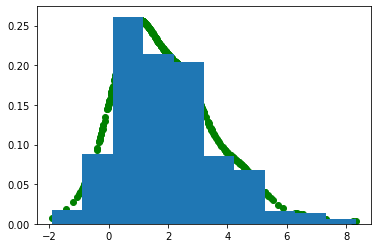

 mean loglikelihood of p_g  -1.86166978
Gradient cte -0.012801299095153809
 Cte Update  2.3798022892475124

 pn/(pn+pm) 2 0.857484

 std dev y_predit 1.6465075
mean y_predit 1.9366525
pn/(pn+pm)  0.841884196
std dev y_pred 1.6465075
 model train on batch  -0.39579227566719055
############ iteration  142 ################
 p_nx  [0.151802018 0.156994224 0.133688882 ... 0.151663467 0.161712661 0.142409921]


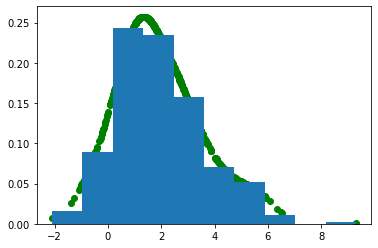

 mean loglikelihood of p_g  -1.88309276
Gradient cte -0.012203414916992188
 Cte Update  2.36759887433052

 pn/(pn+pm) 2 0.8598327

 std dev y_predit 1.6627358
mean y_predit 1.9346572
pn/(pn+pm)  0.84507376
std dev y_pred 1.6627357
 model train on batch  -0.3957173526287079
############ iteration  143 ################
 p_nx  [0.140641704 0.172029734 0.158728361 ... 0.161397353 0.129601732 0.179346889]


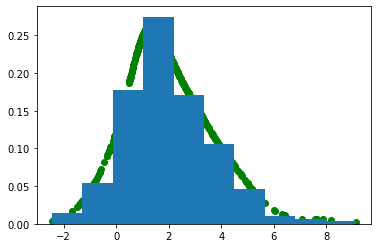

 mean loglikelihood of p_g  -1.90003574
Gradient cte -0.011948880195617675
 Cte Update  2.3556499941349025

 pn/(pn+pm) 2 0.8594916

 std dev y_predit 1.6885575
mean y_predit 2.0036256
pn/(pn+pm)  0.844460726
std dev y_pred 1.68855762
 model train on batch  -0.39718472957611084
############ iteration  144 ################
 p_nx  [0.169607535 0.157737315 0.172650263 ... 0.129160181 0.150745213 0.150083497]


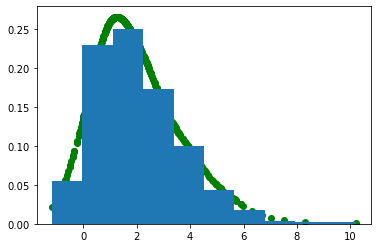

 mean loglikelihood of p_g  -1.8386811
Gradient cte -0.0019548013210296633
 Cte Update  2.353695192813873

 pn/(pn+pm) 2 0.8740198

 std dev y_predit 1.6294684
mean y_predit 2.0215256
pn/(pn+pm)  0.858815551
std dev y_pred 1.62946856
 model train on batch  -0.34950190782546997
############ iteration  145 ################
 p_nx  [0.180548608 0.164146513 0.169062987 ... 0.157281578 0.146367371 0.170870632]


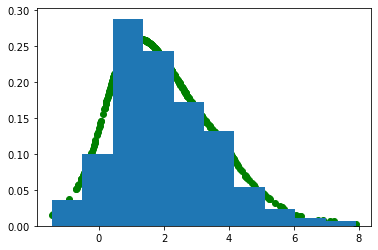

 mean loglikelihood of p_g  -1.82583213
Gradient cte -0.00833155345916748
 Cte Update  2.3453636393547055

 pn/(pn+pm) 2 0.8632048

 std dev y_predit 1.563797
mean y_predit 1.9853344
pn/(pn+pm)  0.846709669
std dev y_pred 1.563797
 model train on batch  -0.37701842188835144
############ iteration  146 ################
 p_nx  [0.139939964 0.176134914 0.148219153 ... 0.157002077 0.158945739 0.14949517]


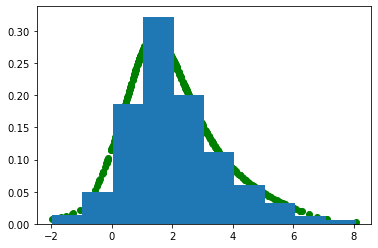

 mean loglikelihood of p_g  -1.80971789
Gradient cte -0.007939264297485352
 Cte Update  2.3374243750572203

 pn/(pn+pm) 2 0.87035084

 std dev y_predit 1.5645833
mean y_predit 2.0235767
pn/(pn+pm)  0.855362177
std dev y_pred 1.5645833
 model train on batch  -0.36189356446266174
############ iteration  147 ################
 p_nx  [0.175454259 0.162292257 0.157875776 ... 0.159587473 0.179332271 0.173310369]


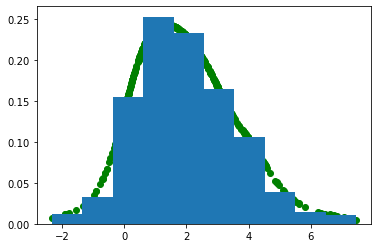

 mean loglikelihood of p_g  -1.86617875
Gradient cte -0.008127176284790039
 Cte Update  2.3292971987724305

 pn/(pn+pm) 2 0.8530209

 std dev y_predit 1.6053084
mean y_predit 1.9642674
pn/(pn+pm)  0.838531256
std dev y_pred 1.60530818
 model train on batch  -0.4241601228713989
############ iteration  148 ################
 p_nx  [0.149979681 0.170929551 0.165183976 ... 0.145500451 0.139371127 0.167788371]


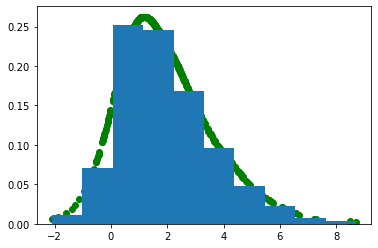

 mean loglikelihood of p_g  -1.86693537
Gradient cte -0.007091883659362793
 Cte Update  2.3222053151130675

 pn/(pn+pm) 2 0.8735594

 std dev y_predit 1.6530035
mean y_predit 1.9347854
pn/(pn+pm)  0.8579427
std dev y_pred 1.65300333
 model train on batch  -0.35294756293296814
############ iteration  149 ################
 p_nx  [0.166691139 0.137794569 0.148934498 ... 0.188483641 0.158333927 0.127203107]


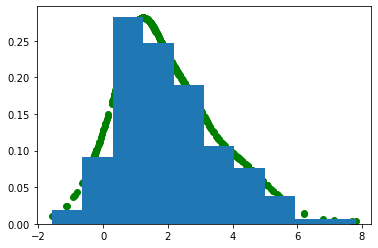

 mean loglikelihood of p_g  -1.81870127
Gradient cte -0.006268750667572021
 Cte Update  2.3159365644454954

 pn/(pn+pm) 2 0.8650451

 std dev y_predit 1.5698837
mean y_predit 2.005971
pn/(pn+pm)  0.851429641
std dev y_pred 1.5698837
 model train on batch  -0.39351126551628113
############ iteration  150 ################
 p_nx  [0.1644959 0.186142296 0.147300109 ... 0.170436829 0.166247502 0.141954586]


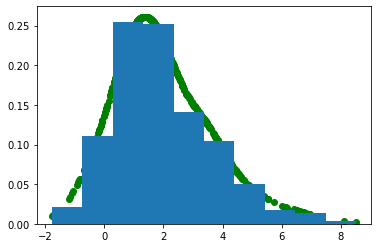

 mean loglikelihood of p_g  -1.88335109
Gradient cte -0.0024358346462249754
 Cte Update  2.3135007297992707

 pn/(pn+pm) 2 0.8723999

 std dev y_predit 1.6728598
mean y_predit 1.9688598
pn/(pn+pm)  0.857044101
std dev y_pred 1.67285979
 model train on batch  -0.3567344546318054
############ iteration  151 ################
 p_nx  [0.142616302 0.126493722 0.150277495 ... 0.14237304 0.152197108 0.158310145]


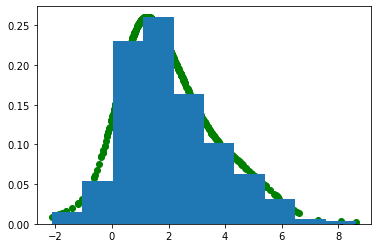

 mean loglikelihood of p_g  -1.89609849
Gradient cte -0.00253395414352417
 Cte Update  2.3109667756557464

 pn/(pn+pm) 2 0.8766763

 std dev y_predit 1.697574
mean y_predit 2.0307164
pn/(pn+pm)  0.86127156
std dev y_pred 1.69757426
 model train on batch  -0.35043615102767944
############ iteration  152 ################
 p_nx  [0.189605296 0.199014708 0.159233704 ... 0.162033752 0.160167769 0.16405496]


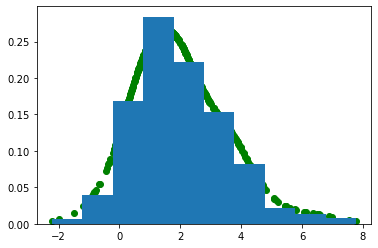

 mean loglikelihood of p_g  -1.83184361
Gradient cte -0.0054734225273132325
 Cte Update  2.305493353128433

 pn/(pn+pm) 2 0.8668212

 std dev y_predit 1.5642221
mean y_predit 1.9844053
pn/(pn+pm)  0.84923625
std dev y_pred 1.5642221
 model train on batch  -0.36210280656814575
############ iteration  153 ################
 p_nx  [0.171878457 0.169928178 0.151795864 ... 0.168577254 0.167579114 0.177418694]


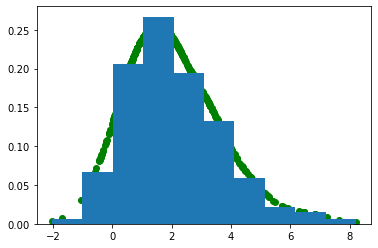

 mean loglikelihood of p_g  -1.85435939
Gradient cte -0.012059624671936036
 Cte Update  2.2934337284564967

 pn/(pn+pm) 2 0.8496457

 std dev y_predit 1.6063579
mean y_predit 2.0346954
pn/(pn+pm)  0.833099484
std dev y_pred 1.60635781
 model train on batch  -0.41962048411369324
############ iteration  154 ################
 p_nx  [0.143646181 0.15199317 0.156842858 ... 0.172228932 0.148588821 0.143982068]


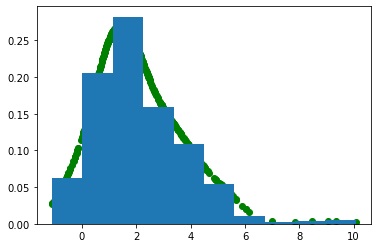

 mean loglikelihood of p_g  -1.84689105
Gradient cte -0.006244307518005371
 Cte Update  2.2871894209384913

 pn/(pn+pm) 2 0.8688317

 std dev y_predit 1.6588465
mean y_predit 2.1096108
pn/(pn+pm)  0.853471518
std dev y_pred 1.65884662
 model train on batch  -0.3733305335044861
############ iteration  155 ################
 p_nx  [0.147513792 0.198879331 0.18251586 ... 0.183064714 0.183061317 0.197110176]


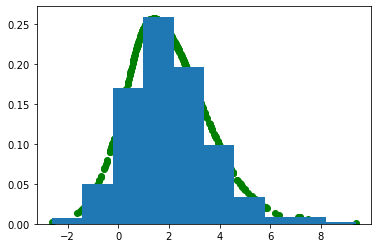

 mean loglikelihood of p_g  -1.85952771
Gradient cte -0.010498929023742675
 Cte Update  2.276690491914749

 pn/(pn+pm) 2 0.85593784

 std dev y_predit 1.6101454
mean y_predit 1.9918313
pn/(pn+pm)  0.838448167
std dev y_pred 1.61014545
 model train on batch  -0.4007240831851959
############ iteration  156 ################
 p_nx  [0.169824094 0.1350611 0.151657403 ... 0.14394328 0.135601416 0.18058838]


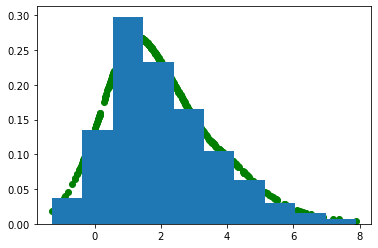

 mean loglikelihood of p_g  -1.83517504
Gradient cte -0.0032799091339111327
 Cte Update  2.2734105827808375

 pn/(pn+pm) 2 0.87328833

 std dev y_predit 1.6004874
mean y_predit 2.0145888
pn/(pn+pm)  0.857358456
std dev y_pred 1.60048735
 model train on batch  -0.3603169023990631
############ iteration  157 ################
 p_nx  [0.151598111 0.161546648 0.152365059 ... 0.154767036 0.148342893 0.157021925]


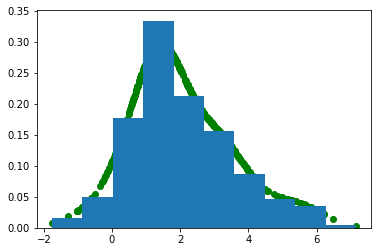

 mean loglikelihood of p_g  -1.79214692
Gradient cte -0.00853441333770752
 Cte Update  2.26487616944313

 pn/(pn+pm) 2 0.858975

 std dev y_predit 1.525836
mean y_predit 2.0514936
pn/(pn+pm)  0.843429
std dev y_pred 1.52583599
 model train on batch  -0.4091385304927826
############ iteration  158 ################
 p_nx  [0.159383655 0.175165772 0.163473278 ... 0.164195523 0.170934841 0.157877877]


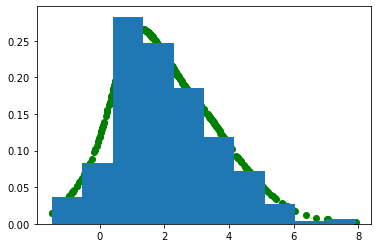

 mean loglikelihood of p_g  -1.83241045
Gradient cte -0.006180667877197265
 Cte Update  2.2586955015659327

 pn/(pn+pm) 2 0.86103517

 std dev y_predit 1.5635928
mean y_predit 2.0449593
pn/(pn+pm)  0.844350219
std dev y_pred 1.56359279
 model train on batch  -0.3985668122768402
############ iteration  159 ################
 p_nx  [0.186118066 0.198036447 0.21060887 ... 0.217293888 0.169669822 0.197071448]


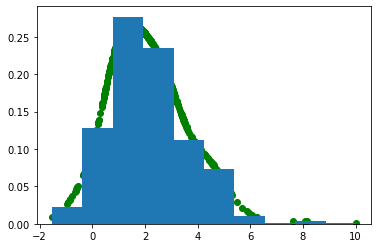

 mean loglikelihood of p_g  -1.79232335
Gradient cte -0.010527562141418458
 Cte Update  2.248167939424514

 pn/(pn+pm) 2 0.8414974

 std dev y_predit 1.5321143
mean y_predit 2.129711
pn/(pn+pm)  0.820863187
std dev y_pred 1.53211427
 model train on batch  -0.4327944815158844
############ iteration  160 ################
 p_nx  [0.162325844 0.166590631 0.162408918 ... 0.170444623 0.185297891 0.209099665]


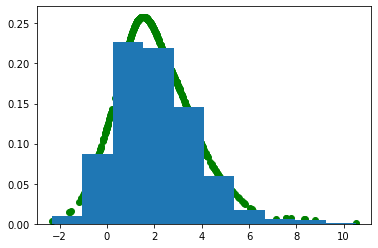

 mean loglikelihood of p_g  -1.89657986
Gradient cte -0.008986286163330078
 Cte Update  2.239181653261184

 pn/(pn+pm) 2 0.8483328

 std dev y_predit 1.7079426
mean y_predit 2.1013227
pn/(pn+pm)  0.831278145
std dev y_pred 1.70794272
 model train on batch  -0.4373960793018341
############ iteration  161 ################
 p_nx  [0.185452223 0.157582 0.17494607 ... 0.182616577 0.165401667 0.177836016]


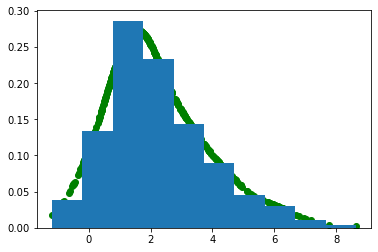

 mean loglikelihood of p_g  -1.85392284
Gradient cte -0.003332273483276367
 Cte Update  2.2358493797779078

 pn/(pn+pm) 2 0.86566633

 std dev y_predit 1.6404694
mean y_predit 2.2033076
pn/(pn+pm)  0.850530624
std dev y_pred 1.64046943
 model train on batch  -0.39045441150665283
############ iteration  162 ################
 p_nx  [0.176970214 0.184824467 0.184734225 ... 0.179827467 0.161613673 0.146351874]


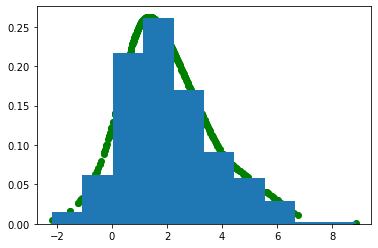

 mean loglikelihood of p_g  -1.86910784
Gradient cte -0.003561127424240112
 Cte Update  2.232288252353668

 pn/(pn+pm) 2 0.86311513

 std dev y_predit 1.6399477
mean y_predit 2.0361402
pn/(pn+pm)  0.846826375
std dev y_pred 1.63994777
 model train on batch  -0.39101654291152954
############ iteration  163 ################
 p_nx  [0.154689729 0.174164325 0.15769355 ... 0.156028733 0.151815921 0.17243354]


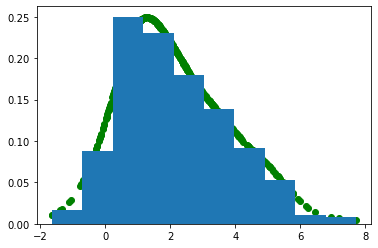

 mean loglikelihood of p_g  -1.8869983
Gradient cte -0.002938277244567871
 Cte Update  2.2293499751090997

 pn/(pn+pm) 2 0.8670568

 std dev y_predit 1.6629457
mean y_predit 2.1511824
pn/(pn+pm)  0.849062145
std dev y_pred 1.66294575
 model train on batch  -0.36887887120246887
############ iteration  164 ################
 p_nx  [0.138479605 0.143291205 0.13379705 ... 0.176432729 0.150544286 0.18657434]


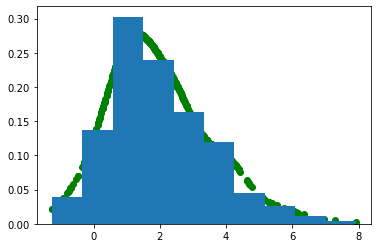

 mean loglikelihood of p_g  -1.80488527
Gradient cte -0.004524880409240722
 Cte Update  2.224825094699859

 pn/(pn+pm) 2 0.8758329

 std dev y_predit 1.5421845
mean y_predit 1.9754275
pn/(pn+pm)  0.858174622
std dev y_pred 1.54218459
 model train on batch  -0.34366199374198914
############ iteration  165 ################
 p_nx  [0.151434466 0.138458937 0.136416763 ... 0.13920635 0.170816213 0.135242447]


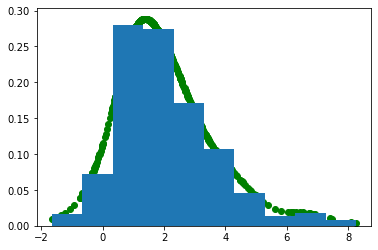

 mean loglikelihood of p_g  -1.81301188
Gradient cte -0.003034384489059448
 Cte Update  2.2217907102108

 pn/(pn+pm) 2 0.86875015

 std dev y_predit 1.6037769
mean y_predit 2.0555568
pn/(pn+pm)  0.851219654
std dev y_pred 1.60377681
 model train on batch  -0.3680454194545746
############ iteration  166 ################
 p_nx  [0.173126847 0.173753813 0.172540396 ... 0.20035097 0.137460545 0.160351858]


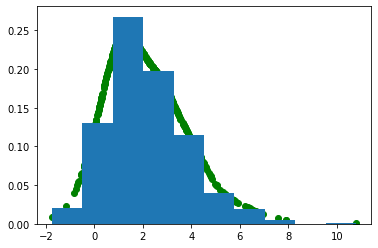

 mean loglikelihood of p_g  -1.89802432
Gradient cte -0.00802570629119873
 Cte Update  2.213765003919601

 pn/(pn+pm) 2 0.84839076

 std dev y_predit 1.7062986
mean y_predit 2.1528964
pn/(pn+pm)  0.828977168
std dev y_pred 1.70629859
 model train on batch  -0.4284045100212097
############ iteration  167 ################
 p_nx  [0.163844123 0.170089826 0.172953486 ... 0.159390271 0.185498118 0.179714754]


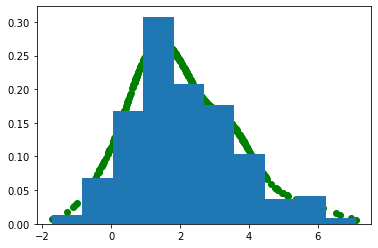

 mean loglikelihood of p_g  -1.82571495
Gradient cte -0.005116940498352051
 Cte Update  2.208648063421249

 pn/(pn+pm) 2 0.8573585

 std dev y_predit 1.559796
mean y_predit 2.0886557
pn/(pn+pm)  0.838058114
std dev y_pred 1.55979598
 model train on batch  -0.394636332988739
############ iteration  168 ################
 p_nx  [0.168219596 0.164122492 0.168989956 ... 0.177175805 0.193249524 0.196011126]


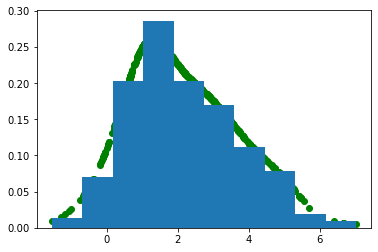

 mean loglikelihood of p_g  -1.81632197
Gradient cte -0.006444371223449707
 Cte Update  2.202203692197799

 pn/(pn+pm) 2 0.8518883

 std dev y_predit 1.5378655
mean y_predit 2.145904
pn/(pn+pm)  0.832422
std dev y_pred 1.53786564
 model train on batch  -0.4199630618095398
############ iteration  169 ################
 p_nx  [0.172201425 0.173176289 0.171906322 ... 0.182693139 0.162916496 0.173082516]


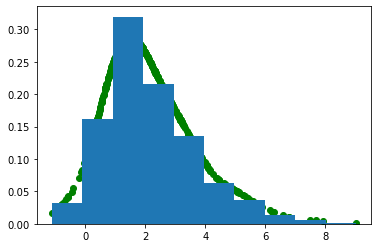

 mean loglikelihood of p_g  -1.79210794
Gradient cte -0.007535648822784424
 Cte Update  2.1946680433750148

 pn/(pn+pm) 2 0.8546798

 std dev y_predit 1.5542144
mean y_predit 2.1702168
pn/(pn+pm)  0.836685956
std dev y_pred 1.55421436
 model train on batch  -0.4161740839481354
############ iteration  170 ################
 p_nx  [0.169332936 0.181789815 0.166964 ... 0.166781455 0.183650777 0.18256408]


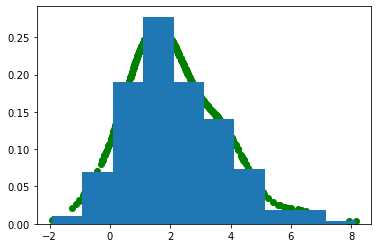

 mean loglikelihood of p_g  -1.85127747
Gradient cte 0.002126917362213135
 Cte Update  2.1967949607372277

 pn/(pn+pm) 2 0.8653773

 std dev y_predit 1.5954652
mean y_predit 2.135756
pn/(pn+pm)  0.84420687
std dev y_pred 1.59546518
 model train on batch  -0.36936429142951965
############ iteration  171 ################
 p_nx  [0.180563584 0.189617038 0.160018831 ... 0.181808203 0.179208323 0.17291604]


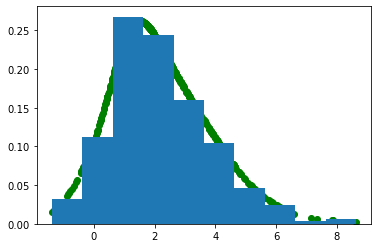

 mean loglikelihood of p_g  -1.86305726
Gradient cte -0.008177800178527832
 Cte Update  2.1886171605587

 pn/(pn+pm) 2 0.8543839

 std dev y_predit 1.6223273
mean y_predit 2.1902456
pn/(pn+pm)  0.83592546
std dev y_pred 1.62232745
 model train on batch  -0.4130851626396179
############ iteration  172 ################
 p_nx  [0.159099519 0.18514359 0.193062365 ... 0.169966027 0.166838974 0.146669745]


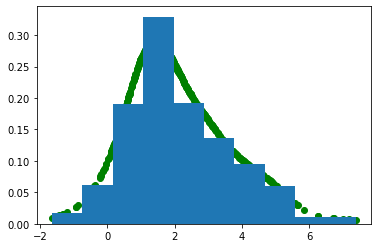

 mean loglikelihood of p_g  -1.80047154
Gradient cte -0.003783857107162476
 Cte Update  2.1848333034515375

 pn/(pn+pm) 2 0.86028695

 std dev y_predit 1.5346364
mean y_predit 2.1197085
pn/(pn+pm)  0.844374239
std dev y_pred 1.53463638
 model train on batch  -0.4126031994819641
############ iteration  173 ################
 p_nx  [0.174097404 0.171334624 0.179376841 ... 0.167913944 0.158923835 0.188442573]


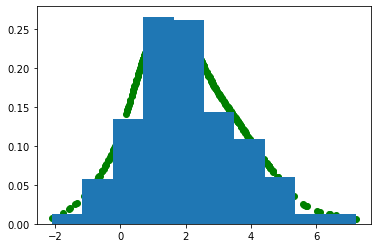

 mean loglikelihood of p_g  -1.85915649
Gradient cte -0.0037655200958251955
 Cte Update  2.1810677833557124

 pn/(pn+pm) 2 0.86724037

 std dev y_predit 1.5818383
mean y_predit 2.0017252
pn/(pn+pm)  0.848294497
std dev y_pred 1.58183825
 model train on batch  -0.37444379925727844
############ iteration  174 ################
 p_nx  [0.163848877 0.149420977 0.18574658 ... 0.159491464 0.158324704 0.149752438]


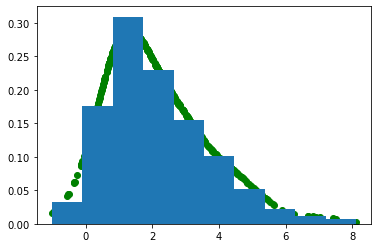

 mean loglikelihood of p_g  -1.77483177
Gradient cte -0.0019583992958068846
 Cte Update  2.1791093840599056

 pn/(pn+pm) 2 0.8614199

 std dev y_predit 1.540321
mean y_predit 2.1302025
pn/(pn+pm)  0.844979644
std dev y_pred 1.54032087
 model train on batch  -0.40250125527381897
############ iteration  175 ################
 p_nx  [0.175843135 0.193723291 0.178228468 ... 0.180180937 0.192035884 0.17672962]


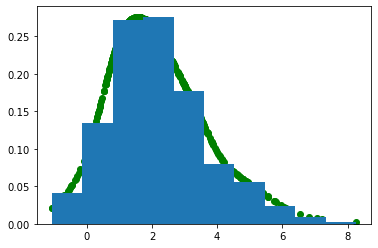

 mean loglikelihood of p_g  -1.79422653
Gradient cte -0.0024999313354492187
 Cte Update  2.1766094527244566

 pn/(pn+pm) 2 0.8460707

 std dev y_predit 1.52035
mean y_predit 2.174082
pn/(pn+pm)  0.82548362
std dev y_pred 1.52035
 model train on batch  -0.4342966377735138
############ iteration  176 ################
 p_nx  [0.214043215 0.189394116 0.183317423 ... 0.177710041 0.186861292 0.195642754]


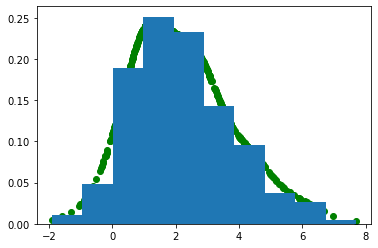

 mean loglikelihood of p_g  -1.85486794
Gradient cte -0.00958572769165039
 Cte Update  2.167023725032806

 pn/(pn+pm) 2 0.8390614

 std dev y_predit 1.6014436
mean y_predit 2.2028985
pn/(pn+pm)  0.817140222
std dev y_pred 1.60144365
 model train on batch  -0.45035168528556824
############ iteration  177 ################
 p_nx  [0.169019133 0.163206443 0.190813124 ... 0.163819596 0.149763867 0.170270145]


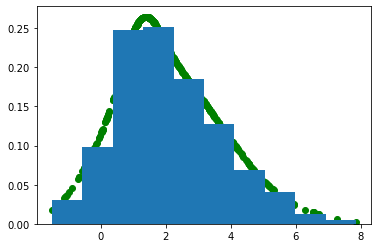

 mean loglikelihood of p_g  -1.87217677
Gradient cte -0.013380215644836426
 Cte Update  2.15364350938797

 pn/(pn+pm) 2 0.8519512

 std dev y_predit 1.6252618
mean y_predit 2.0891557
pn/(pn+pm)  0.834146798
std dev y_pred 1.62526178
 model train on batch  -0.42534056305885315
############ iteration  178 ################
 p_nx  [0.166768894 0.202182472 0.170653552 ... 0.169094354 0.184845611 0.193261772]


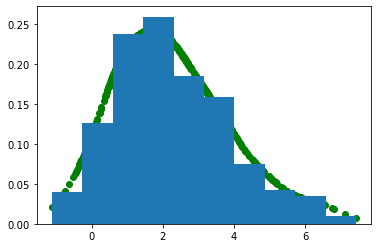

 mean loglikelihood of p_g  -1.87131512
Gradient cte -0.003537353038787842
 Cte Update  2.150106156349182

 pn/(pn+pm) 2 0.85406595

 std dev y_predit 1.63461
mean y_predit 2.2576816
pn/(pn+pm)  0.833724
std dev y_pred 1.63461
 model train on batch  -0.40929290652275085
############ iteration  179 ################
 p_nx  [0.198792964 0.175111815 0.1941645 ... 0.170221344 0.175321028 0.162128508]


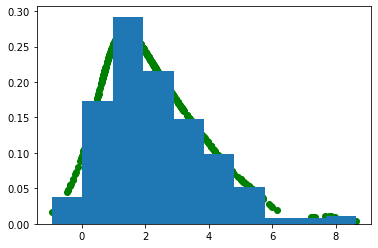

 mean loglikelihood of p_g  -1.81386721
Gradient cte -0.0011371462345123292
 Cte Update  2.1489690101146697

 pn/(pn+pm) 2 0.8598886

 std dev y_predit 1.6165018
mean y_predit 2.3083029
pn/(pn+pm)  0.841212392
std dev y_pred 1.61650181
 model train on batch  -0.4047042429447174
############ iteration  180 ################
 p_nx  [0.163014874 0.190291941 0.17381753 ... 0.179494992 0.144793317 0.163655862]


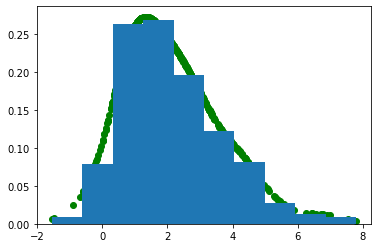

 mean loglikelihood of p_g  -1.79525292
Gradient cte -0.009977323532104492
 Cte Update  2.1389916865825653

 pn/(pn+pm) 2 0.8523061

 std dev y_predit 1.535184
mean y_predit 2.127453
pn/(pn+pm)  0.832443476
std dev y_pred 1.53518391
 model train on batch  -0.41627633571624756
############ iteration  181 ################
 p_nx  [0.15211077 0.180398 0.157334536 ... 0.160002738 0.173083588 0.192341328]


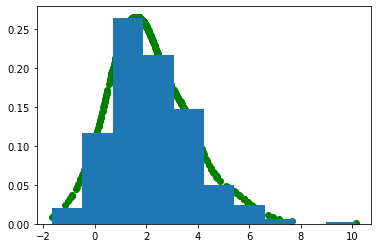

 mean loglikelihood of p_g  -1.84779358
Gradient cte -4.209756851196289e-05
 Cte Update  2.1389495890140533

 pn/(pn+pm) 2 0.86211425

 std dev y_predit 1.6025985
mean y_predit 2.1607263
pn/(pn+pm)  0.843864262
std dev y_pred 1.60259855
 model train on batch  -0.39810484647750854
############ iteration  182 ################
 p_nx  [0.190305546 0.205241859 0.176242784 ... 0.165704727 0.179218069 0.177404404]


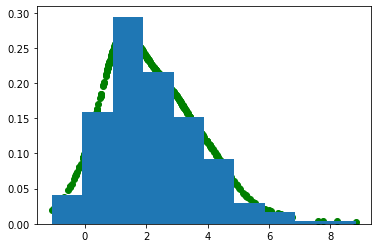

 mean loglikelihood of p_g  -1.81160772
Gradient cte -0.006922921657562256
 Cte Update  2.132026667356491

 pn/(pn+pm) 2 0.8470037

 std dev y_predit 1.5623993
mean y_predit 2.1856353
pn/(pn+pm)  0.825434148
std dev y_pred 1.56239939
 model train on batch  -0.4320569932460785
############ iteration  183 ################
 p_nx  [0.199574158 0.196967274 0.187544346 ... 0.188047349 0.153032243 0.174020141]


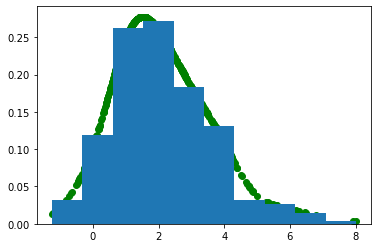

 mean loglikelihood of p_g  -1.78673947
Gradient cte -0.003601584196090698
 Cte Update  2.1284250831604004

 pn/(pn+pm) 2 0.85109365

 std dev y_predit 1.5114048
mean y_predit 2.1287632
pn/(pn+pm)  0.830912113
std dev y_pred 1.51140463
 model train on batch  -0.4222513437271118
############ iteration  184 ################
 p_nx  [0.151890144 0.143330634 0.176304489 ... 0.151728421 0.162694156 0.147960767]


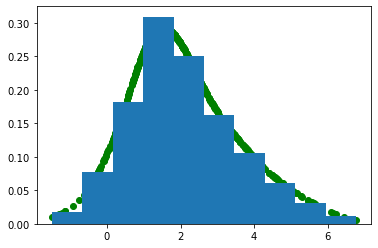

 mean loglikelihood of p_g  -1.76725161
Gradient cte 0.0021257548332214355
 Cte Update  2.130550837993622

 pn/(pn+pm) 2 0.86409336

 std dev y_predit 1.4645813
mean y_predit 2.0666225
pn/(pn+pm)  0.845663
std dev y_pred 1.46458125
 model train on batch  -0.38677945733070374
############ iteration  185 ################
 p_nx  [0.168258429 0.149177641 0.155120134 ... 0.144509703 0.151907891 0.154522896]


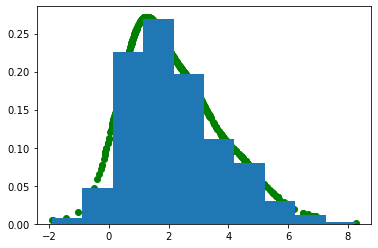

 mean loglikelihood of p_g  -1.81953394
Gradient cte -0.0043110928535461425
 Cte Update  2.126239745140076

 pn/(pn+pm) 2 0.8523069

 std dev y_predit 1.5803301
mean y_predit 2.1665468
pn/(pn+pm)  0.832549632
std dev y_pred 1.58033025
 model train on batch  -0.421260267496109
############ iteration  186 ################
 p_nx  [0.173237175 0.195945248 0.185621202 ... 0.185695305 0.169152245 0.19394353]


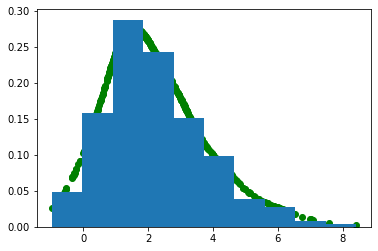

 mean loglikelihood of p_g  -1.82181227
Gradient cte -0.00848992919921875
 Cte Update  2.117749815940857

 pn/(pn+pm) 2 0.84537417

 std dev y_predit 1.5749074
mean y_predit 2.194162
pn/(pn+pm)  0.826759
std dev y_pred 1.57490742
 model train on batch  -0.451323002576828
############ iteration  187 ################
 p_nx  [0.188794315 0.207454637 0.201809615 ... 0.193572864 0.208190337 0.191383183]


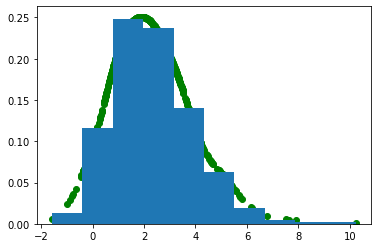

 mean loglikelihood of p_g  -1.84575295
Gradient cte -0.008406190872192383
 Cte Update  2.109343625068665

 pn/(pn+pm) 2 0.8336802

 std dev y_predit 1.5901717
mean y_predit 2.308684
pn/(pn+pm)  0.806823909
std dev y_pred 1.59017158
 model train on batch  -0.4526273012161255
############ iteration  188 ################
 p_nx  [0.184743404 0.171685964 0.139330536 ... 0.174661413 0.157806978 0.167690545]


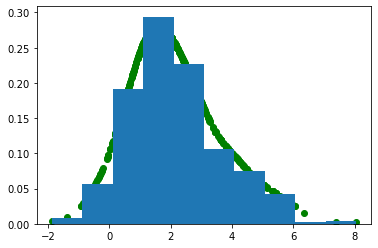

 mean loglikelihood of p_g  -1.8000046
Gradient cte -0.002111717700958252
 Cte Update  2.1072319073677064

 pn/(pn+pm) 2 0.86127424

 std dev y_predit 1.5242895
mean y_predit 2.1480448
pn/(pn+pm)  0.84228617
std dev y_pred 1.52428949
 model train on batch  -0.4018354117870331
############ iteration  189 ################
 p_nx  [0.154673725 0.161398351 0.204989716 ... 0.191688508 0.152135074 0.177155033]


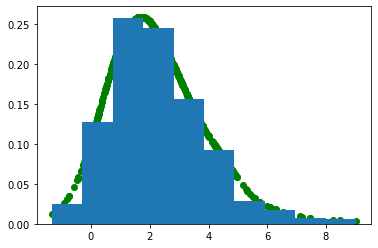

 mean loglikelihood of p_g  -1.85239935
Gradient cte -0.008497254371643066
 Cte Update  2.0987346529960633

 pn/(pn+pm) 2 0.84150195

 std dev y_predit 1.6223961
mean y_predit 2.2579093
pn/(pn+pm)  0.822374523
std dev y_pred 1.62239611
 model train on batch  -0.45437148213386536
############ iteration  190 ################
 p_nx  [0.200345427 0.172304511 0.147929519 ... 0.170465916 0.16875805 0.156632766]


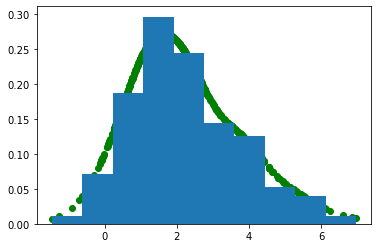

 mean loglikelihood of p_g  -1.80040586
Gradient cte 0.006854218006134033
 Cte Update  2.1055888710021975

 pn/(pn+pm) 2 0.86963797

 std dev y_predit 1.5174323
mean y_predit 2.2106135
pn/(pn+pm)  0.848731399
std dev y_pred 1.51743233
 model train on batch  -0.3634316027164459
############ iteration  191 ################
 p_nx  [0.193720236 0.213756815 0.175624505 ... 0.185534924 0.17179127 0.169449255]


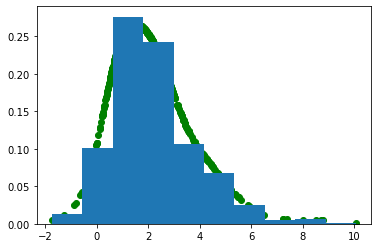

 mean loglikelihood of p_g  -1.8319664
Gradient cte -0.003665694236755371
 Cte Update  2.101923176765442

 pn/(pn+pm) 2 0.8606883

 std dev y_predit 1.6431702
mean y_predit 2.1908765
pn/(pn+pm)  0.838760555
std dev y_pred 1.64317036
 model train on batch  -0.38948625326156616
############ iteration  192 ################
 p_nx  [0.226526722 0.172316343 0.188239515 ... 0.210018277 0.192984223 0.165001258]


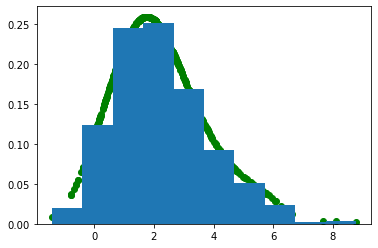

 mean loglikelihood of p_g  -1.84416568
Gradient cte -0.0025709521770477294
 Cte Update  2.099352224588394

 pn/(pn+pm) 2 0.8516769

 std dev y_predit 1.5974346
mean y_predit 2.235876
pn/(pn+pm)  0.830616057
std dev y_pred 1.59743464
 model train on batch  -0.42070648074150085
############ iteration  193 ################
 p_nx  [0.135017827 0.130798832 0.163935 ... 0.204557255 0.133381784 0.12896423]


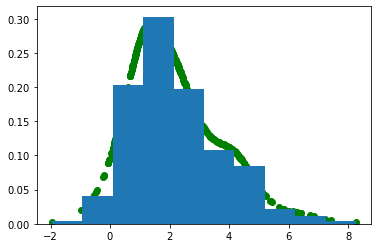

 mean loglikelihood of p_g  -1.77860522
Gradient cte 0.0035713930130004882
 Cte Update  2.1029236176013946

 pn/(pn+pm) 2 0.8855641

 std dev y_predit 1.5340731
mean y_predit 2.1597145
pn/(pn+pm)  0.867932141
std dev y_pred 1.53407311
 model train on batch  -0.32825085520744324
############ iteration  194 ################
 p_nx  [0.19420135 0.195570379 0.165660009 ... 0.181918859 0.166357011 0.183519989]


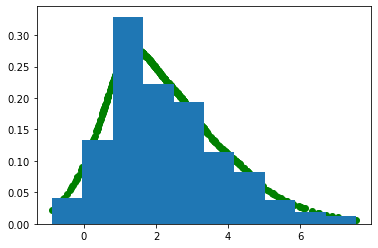

 mean loglikelihood of p_g  -1.80061388
Gradient cte -0.008146749496459962
 Cte Update  2.0947768681049346

 pn/(pn+pm) 2 0.84938794

 std dev y_predit 1.5493842
mean y_predit 2.258267
pn/(pn+pm)  0.828976154
std dev y_pred 1.54938424
 model train on batch  -0.4281960129737854
############ iteration  195 ################
 p_nx  [0.188621014 0.204082578 0.183794096 ... 0.160228506 0.186254874 0.190179452]


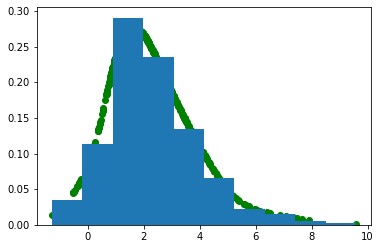

 mean loglikelihood of p_g  -1.82023609
Gradient cte -0.005806973457336426
 Cte Update  2.0889698946475983

 pn/(pn+pm) 2 0.84974575

 std dev y_predit 1.5865688
mean y_predit 2.2725875
pn/(pn+pm)  0.827142835
std dev y_pred 1.58656895
 model train on batch  -0.4227231442928314
############ iteration  196 ################
 p_nx  [0.22925204 0.149736017 0.19355385 ... 0.167864546 0.185501933 0.167229086]


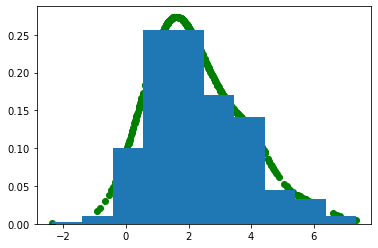

 mean loglikelihood of p_g  -1.79466283
Gradient cte 0.001278755307197571
 Cte Update  2.090248649954796

 pn/(pn+pm) 2 0.85907316

 std dev y_predit 1.5166285
mean y_predit 2.2697773
pn/(pn+pm)  0.839333594
std dev y_pred 1.5166285
 model train on batch  -0.4051060378551483
############ iteration  197 ################
 p_nx  [0.160378322 0.1511392 0.162472665 ... 0.159864783 0.167456657 0.172609925]


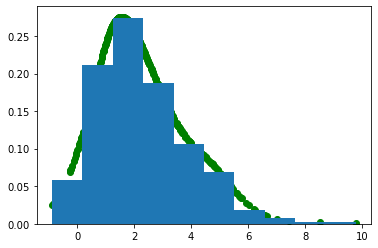

 mean loglikelihood of p_g  -1.82192516
Gradient cte -0.001856861114501953
 Cte Update  2.088391788840294

 pn/(pn+pm) 2 0.86150074

 std dev y_predit 1.588598
mean y_predit 2.270252
pn/(pn+pm)  0.841755569
std dev y_pred 1.58859801
 model train on batch  -0.40375640988349915
############ iteration  198 ################
 p_nx  [0.168771416 0.217186779 0.166558295 ... 0.188389197 0.155585781 0.170825094]


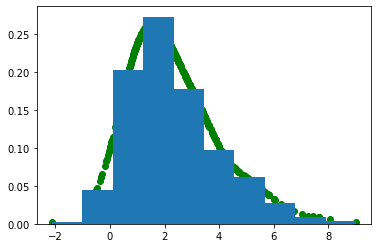

 mean loglikelihood of p_g  -1.85724378
Gradient cte -0.00477918291091919
 Cte Update  2.0836126059293747

 pn/(pn+pm) 2 0.85150415

 std dev y_predit 1.659882
mean y_predit 2.3162963
pn/(pn+pm)  0.831474662
std dev y_pred 1.65988195
 model train on batch  -0.4289666414260864
############ iteration  199 ################
 p_nx  [0.192429945 0.179801404 0.187190652 ... 0.1991328 0.177106723 0.177935675]


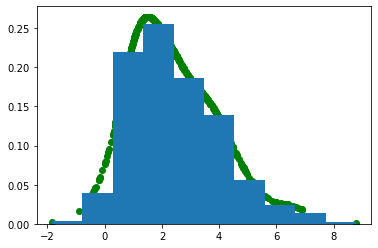

 mean loglikelihood of p_g  -1.82212842
Gradient cte 0.0041910743713378905
 Cte Update  2.0878036803007127

 pn/(pn+pm) 2 0.85719305

 std dev y_predit 1.5817031
mean y_predit 2.4219337
pn/(pn+pm)  0.833779156
std dev y_pred 1.58170307
 model train on batch  -0.40044963359832764
############ iteration  200 ################
 p_nx  [0.200924426 0.177791 0.179048851 ... 0.199267864 0.189071447 0.205076829]


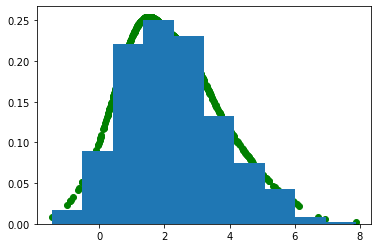

 mean loglikelihood of p_g  -1.82652152
Gradient cte -0.011448037147521973
 Cte Update  2.0763556431531907

 pn/(pn+pm) 2 0.83651143

 std dev y_predit 1.5409101
mean y_predit 2.2415133
pn/(pn+pm)  0.812093198
std dev y_pred 1.54091012
 model train on batch  -0.45816442370414734
############ iteration  201 ################
 p_nx  [0.226150483 0.237641364 0.199562728 ... 0.19933334 0.16911298 0.209909156]


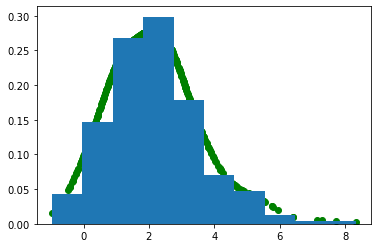

 mean loglikelihood of p_g  -1.73691607
Gradient cte -0.007896223068237306
 Cte Update  2.0684594200849533

 pn/(pn+pm) 2 0.8343914

 std dev y_predit 1.438373
mean y_predit 2.1939733
pn/(pn+pm)  0.806691527
std dev y_pred 1.43837309
 model train on batch  -0.4564824402332306
############ iteration  202 ################
 p_nx  [0.165225178 0.165109873 0.177266404 ... 0.192715794 0.178250223 0.160482749]


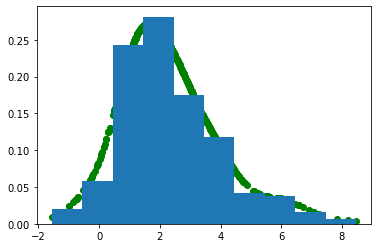

 mean loglikelihood of p_g  -1.85460937
Gradient cte 0.00014110708236694336
 Cte Update  2.0686005271673205

 pn/(pn+pm) 2 0.8550056

 std dev y_predit 1.6514332
mean y_predit 2.3168154
pn/(pn+pm)  0.832050085
std dev y_pred 1.65143311
 model train on batch  -0.4067118763923645
############ iteration  203 ################
 p_nx  [0.176449805 0.172082648 0.162764221 ... 0.17808491 0.185397401 0.176710665]


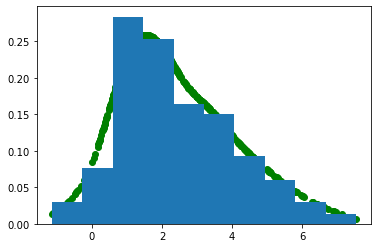

 mean loglikelihood of p_g  -1.85656548
Gradient cte 0.0007886948585510254
 Cte Update  2.0693892220258716

 pn/(pn+pm) 2 0.86051065

 std dev y_predit 1.6332419
mean y_predit 2.422367
pn/(pn+pm)  0.839777172
std dev y_pred 1.63324177
 model train on batch  -0.39976388216018677
############ iteration  204 ################
 p_nx  [0.197432727 0.175885648 0.175403059 ... 0.182365626 0.174605787 0.182648286]


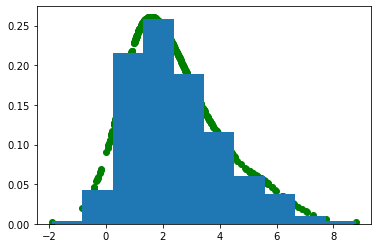

 mean loglikelihood of p_g  -1.86504865
Gradient cte -0.0006161133050918579
 Cte Update  2.0687731087207797

 pn/(pn+pm) 2 0.8527394

 std dev y_predit 1.6654708
mean y_predit 2.4251378
pn/(pn+pm)  0.830161154
std dev y_pred 1.66547084
 model train on batch  -0.4131084382534027
############ iteration  205 ################
 p_nx  [0.216712773 0.19400394 0.166276902 ... 0.198342636 0.195374638 0.214323968]


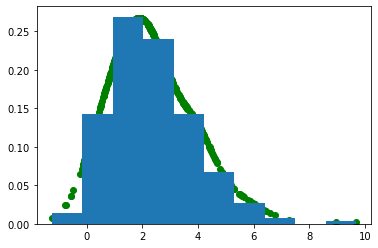

 mean loglikelihood of p_g  -1.8092984
Gradient cte 0.0030055809020996093
 Cte Update  2.0717786896228794

 pn/(pn+pm) 2 0.85628366

 std dev y_predit 1.5479889
mean y_predit 2.3611271
pn/(pn+pm)  0.831541955
std dev y_pred 1.54798877
 model train on batch  -0.4012855589389801
############ iteration  206 ################
 p_nx  [0.215484902 0.220599294 0.207555354 ... 0.219492435 0.228122 0.208299264]


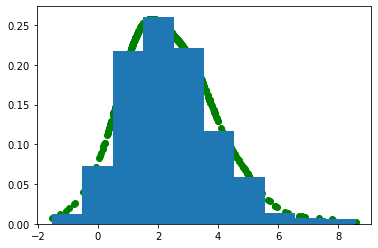

 mean loglikelihood of p_g  -1.82237113
Gradient cte -0.00667508602142334
 Cte Update  2.065103603601456

 pn/(pn+pm) 2 0.8230912

 std dev y_predit 1.5361642
mean y_predit 2.3862007
pn/(pn+pm)  0.796818376
std dev y_pred 1.53616416
 model train on batch  -0.49011194705963135
############ iteration  207 ################
 p_nx  [0.19531326 0.198499709 0.199266538 ... 0.223836467 0.201049209 0.195868835]


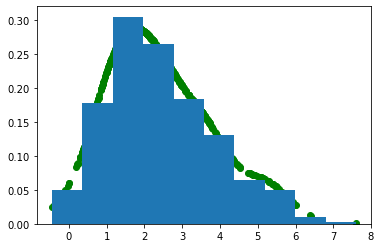

 mean loglikelihood of p_g  -1.7151587
Gradient cte 0.001286876916885376
 Cte Update  2.0663904805183413

 pn/(pn+pm) 2 0.84356207

 std dev y_predit 1.4123726
mean y_predit 2.4367063
pn/(pn+pm)  0.816876829
std dev y_pred 1.41237271
 model train on batch  -0.4304153323173523
############ iteration  208 ################
 p_nx  [0.214292914 0.206093505 0.201389432 ... 0.200955749 0.192585632 0.207666144]


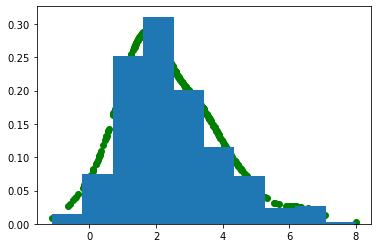

 mean loglikelihood of p_g  -1.77865243
Gradient cte -0.006834566116333008
 Cte Update  2.0595559144020084

 pn/(pn+pm) 2 0.8404945

 std dev y_predit 1.5107769
mean y_predit 2.4145744
pn/(pn+pm)  0.81662792
std dev y_pred 1.51077676
 model train on batch  -0.4492507874965668
############ iteration  209 ################
 p_nx  [0.193678305 0.180749655 0.18764919 ... 0.204259098 0.198776186 0.183027014]


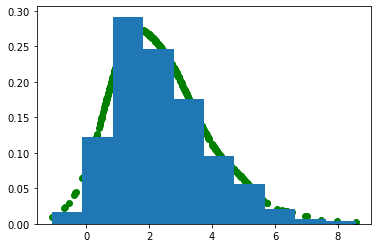

 mean loglikelihood of p_g  -1.78603613
Gradient cte -0.005740238189697266
 Cte Update  2.053815676212311

 pn/(pn+pm) 2 0.8343772

 std dev y_predit 1.5203481
mean y_predit 2.3677866
pn/(pn+pm)  0.80842787
std dev y_pred 1.52034807
 model train on batch  -0.46215903759002686
############ iteration  210 ################
 p_nx  [0.19362013 0.200396165 0.230015129 ... 0.193682 0.201050073 0.187199295]


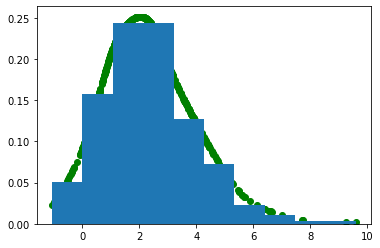

 mean loglikelihood of p_g  -1.86839187
Gradient cte 0.0033810532093048098
 Cte Update  2.057196729421616

 pn/(pn+pm) 2 0.851581

 std dev y_predit 1.6307423
mean y_predit 2.3498394
pn/(pn+pm)  0.827356637
std dev y_pred 1.63074243
 model train on batch  -0.4152635633945465
############ iteration  211 ################
 p_nx  [0.181632817 0.154352188 0.150010154 ... 0.156922743 0.180450737 0.222702324]


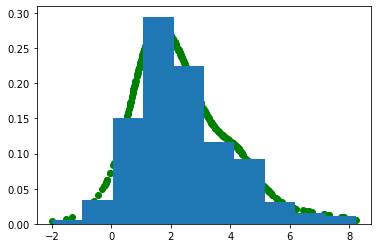

 mean loglikelihood of p_g  -1.83636272
Gradient cte 0.00220536470413208
 Cte Update  2.059402094125748

 pn/(pn+pm) 2 0.8658318

 std dev y_predit 1.6245677
mean y_predit 2.3691509
pn/(pn+pm)  0.843214929
std dev y_pred 1.62456775
 model train on batch  -0.37206727266311646
############ iteration  212 ################
 p_nx  [0.178189129 0.180224746 0.167832464 ... 0.19555974 0.201638117 0.228459984]


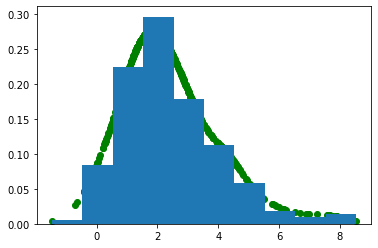

 mean loglikelihood of p_g  -1.82771373
Gradient cte -0.00494691276550293
 Cte Update  2.054455181360245

 pn/(pn+pm) 2 0.8462157

 std dev y_predit 1.6105478
mean y_predit 2.4027157
pn/(pn+pm)  0.824435472
std dev y_pred 1.61054778
 model train on batch  -0.4431188702583313
############ iteration  213 ################
 p_nx  [0.185587138 0.16751872 0.18477 ... 0.226098299 0.186084166 0.220704615]


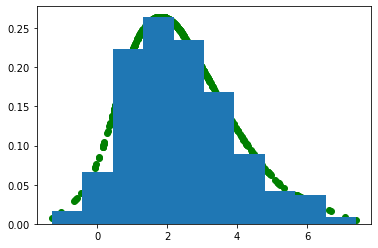

 mean loglikelihood of p_g  -1.80344486
Gradient cte -3.763866424560547e-05
 Cte Update  2.054417542695999

 pn/(pn+pm) 2 0.84580934

 std dev y_predit 1.5197974
mean y_predit 2.3741856
pn/(pn+pm)  0.82116276
std dev y_pred 1.51979744
 model train on batch  -0.4355405867099762
############ iteration  214 ################
 p_nx  [0.178780466 0.189014107 0.181160808 ... 0.186253443 0.187894076 0.176345348]


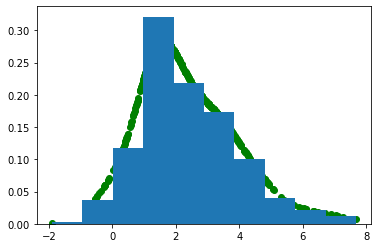

 mean loglikelihood of p_g  -1.80574882
Gradient cte -0.0041185922622680666
 Cte Update  2.050298950433731

 pn/(pn+pm) 2 0.84641165

 std dev y_predit 1.5479244
mean y_predit 2.3590784
pn/(pn+pm)  0.823778868
std dev y_pred 1.5479244
 model train on batch  -0.43683725595474243
############ iteration  215 ################
 p_nx  [0.179709092 0.167019024 0.187472194 ... 0.186974764 0.158593476 0.179742604]


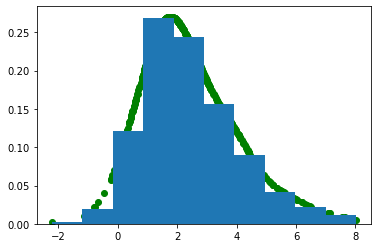

 mean loglikelihood of p_g  -1.84541917
Gradient cte -0.0013663496971130372
 Cte Update  2.048932600736618

 pn/(pn+pm) 2 0.85431933

 std dev y_predit 1.6072202
mean y_predit 2.4051404
pn/(pn+pm)  0.831503332
std dev y_pred 1.60722017
 model train on batch  -0.4142743945121765
############ iteration  216 ################
 p_nx  [0.181727499 0.203305274 0.173240811 ... 0.190223068 0.200051978 0.189377591]


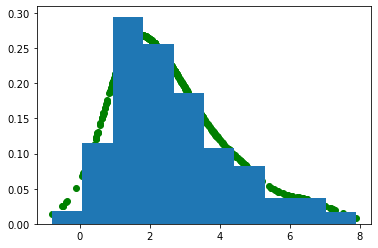

 mean loglikelihood of p_g  -1.83784294
Gradient cte -0.0035405733585357666
 Cte Update  2.045392027378082

 pn/(pn+pm) 2 0.84342885

 std dev y_predit 1.6442151
mean y_predit 2.6196704
pn/(pn+pm)  0.819141507
std dev y_pred 1.64421523
 model train on batch  -0.4465235769748688
############ iteration  217 ################
 p_nx  [0.195313722 0.21681717 0.196608633 ... 0.210267186 0.218234345 0.173351124]


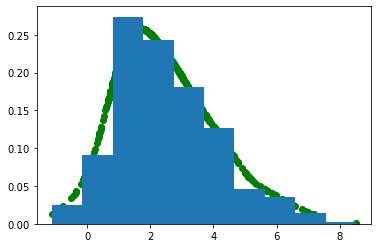

 mean loglikelihood of p_g  -1.84891832
Gradient cte -0.004367947578430176
 Cte Update  2.041024079799652

 pn/(pn+pm) 2 0.8388807

 std dev y_predit 1.6046478
mean y_predit 2.4957335
pn/(pn+pm)  0.81432265
std dev y_pred 1.60464776
 model train on batch  -0.4594293236732483
############ iteration  218 ################
 p_nx  [0.190028965 0.18276599 0.199836403 ... 0.211211368 0.209741265 0.20904693]


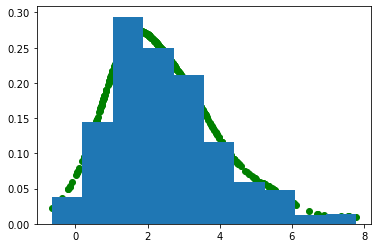

 mean loglikelihood of p_g  -1.79947352
Gradient cte -0.004530666351318359
 Cte Update  2.0364934134483335

 pn/(pn+pm) 2 0.8325325

 std dev y_predit 1.5491016
mean y_predit 2.4872298
pn/(pn+pm)  0.804634452
std dev y_pred 1.54910159
 model train on batch  -0.4613240957260132
############ iteration  219 ################
 p_nx  [0.231147379 0.229487956 0.225512028 ... 0.224344894 0.213147134 0.237312064]


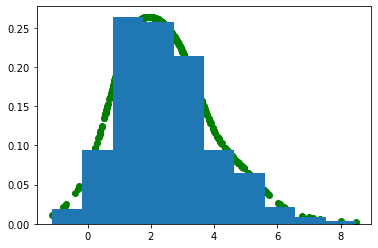

 mean loglikelihood of p_g  -1.8058486
Gradient cte -0.009119580268859864
 Cte Update  2.0273738331794737

 pn/(pn+pm) 2 0.82196754

 std dev y_predit 1.52235
mean y_predit 2.4541497
pn/(pn+pm)  0.793098569
std dev y_pred 1.52235
 model train on batch  -0.4980834424495697
############ iteration  220 ################
 p_nx  [0.220034629 0.231042698 0.248922169 ... 0.247150451 0.209532842 0.195043266]


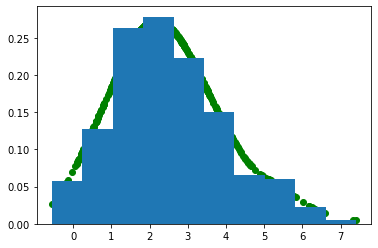

 mean loglikelihood of p_g  -1.76998508
Gradient cte -0.00024462771415710447
 Cte Update  2.0271292054653167

 pn/(pn+pm) 2 0.81750816

 std dev y_predit 1.4570113
mean y_predit 2.497842
pn/(pn+pm)  0.786816657
std dev y_pred 1.45701134
 model train on batch  -0.5043215751647949
############ iteration  221 ################
 p_nx  [0.208138019 0.200304642 0.226964176 ... 0.186623901 0.188008964 0.184218675]


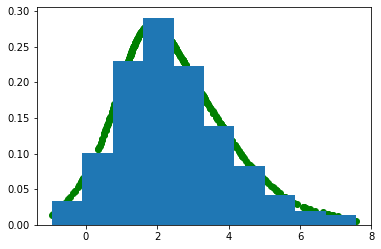

 mean loglikelihood of p_g  -1.79048133
Gradient cte -0.0026021904945373537
 Cte Update  2.0245270149707792

 pn/(pn+pm) 2 0.83832663

 std dev y_predit 1.5022717
mean y_predit 2.4396322
pn/(pn+pm)  0.812324584
std dev y_pred 1.50227153
 model train on batch  -0.4532261788845062
############ iteration  222 ################
 p_nx  [0.174585968 0.206521034 0.198416904 ... 0.234855175 0.198035508 0.217290983]


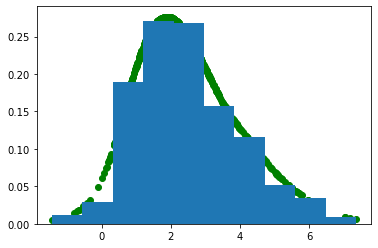

 mean loglikelihood of p_g  -1.7755965
Gradient cte -0.00015806341171264649
 Cte Update  2.0243689515590666

 pn/(pn+pm) 2 0.8339604

 std dev y_predit 1.479555
mean y_predit 2.476247
pn/(pn+pm)  0.807841241
std dev y_pred 1.47955513
 model train on batch  -0.46428021788597107
############ iteration  223 ################
 p_nx  [0.186163068 0.183663115 0.181461155 ... 0.202878 0.191975817 0.177036643]


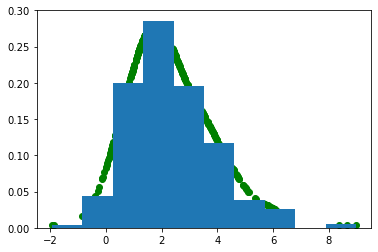

 mean loglikelihood of p_g  -1.78350413
Gradient cte 0.00039426612854003907
 Cte Update  2.0247632176876067

 pn/(pn+pm) 2 0.85142624

 std dev y_predit 1.5211558
mean y_predit 2.325752
pn/(pn+pm)  0.825701714
std dev y_pred 1.52115583
 model train on batch  -0.4155375361442566
############ iteration  224 ################
 p_nx  [0.208430111 0.207188115 0.180037588 ... 0.184107229 0.169635028 0.178610295]


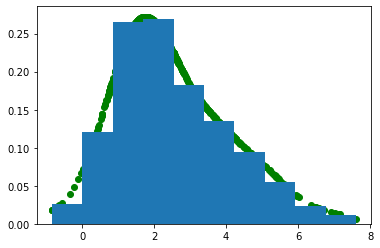

 mean loglikelihood of p_g  -1.82843411
Gradient cte 0.0034202690124511717
 Cte Update  2.028183486700058

 pn/(pn+pm) 2 0.8587566

 std dev y_predit 1.5825942
mean y_predit 2.508482
pn/(pn+pm)  0.833598197
std dev y_pred 1.58259416
 model train on batch  -0.38869938254356384
############ iteration  225 ################
 p_nx  [0.213593185 0.224440113 0.226430282 ... 0.235781893 0.191454098 0.219399408]


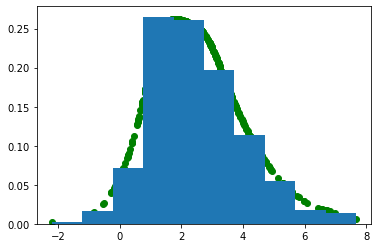

 mean loglikelihood of p_g  -1.80028033
Gradient cte -0.009832307815551758
 Cte Update  2.0183511788845063

 pn/(pn+pm) 2 0.8183242

 std dev y_predit 1.5166135
mean y_predit 2.5247052
pn/(pn+pm)  0.787171721
std dev y_pred 1.51661348
 model train on batch  -0.5037762522697449
############ iteration  226 ################
 p_nx  [0.200110838 0.195334494 0.219699964 ... 0.198252246 0.219463855 0.229272917]


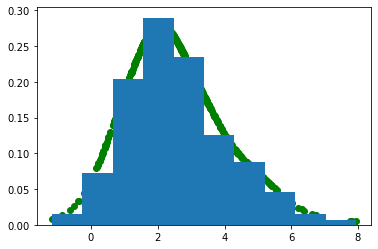

 mean loglikelihood of p_g  -1.80181313
Gradient cte -0.005275074005126953
 Cte Update  2.0130761048793793

 pn/(pn+pm) 2 0.832187

 std dev y_predit 1.5152104
mean y_predit 2.5413287
pn/(pn+pm)  0.800836623
std dev y_pred 1.51521039
 model train on batch  -0.44979268312454224
############ iteration  227 ################
 p_nx  [0.229200438 0.238477051 0.2476556 ... 0.242692783 0.224210992 0.237735659]


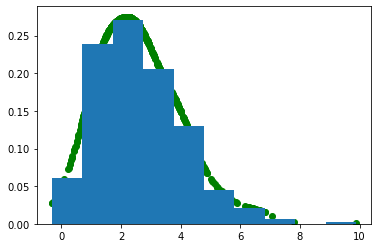

 mean loglikelihood of p_g  -1.74484777
Gradient cte -0.0012782436609268188
 Cte Update  2.0117978612184526

 pn/(pn+pm) 2 0.8238317

 std dev y_predit 1.4549448
mean y_predit 2.6073713
pn/(pn+pm)  0.793081105
std dev y_pred 1.45494497
 model train on batch  -0.4870712161064148
############ iteration  228 ################
 p_nx  [0.218868375 0.219265535 0.216074467 ... 0.23421827 0.233541548 0.233276546]


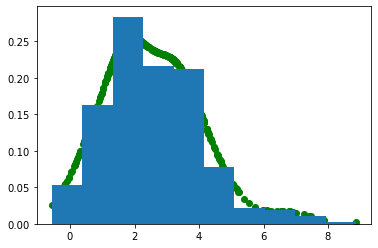

 mean loglikelihood of p_g  -1.78831756
Gradient cte -0.008133499145507813
 Cte Update  2.0036643620729446

 pn/(pn+pm) 2 0.81276584

 std dev y_predit 1.5109937
mean y_predit 2.5731783
pn/(pn+pm)  0.782551289
std dev y_pred 1.51099372
 model train on batch  -0.5150333642959595
############ iteration  229 ################
 p_nx  [0.211019605 0.19986701 0.193808466 ... 0.201840326 0.213221252 0.250462234]


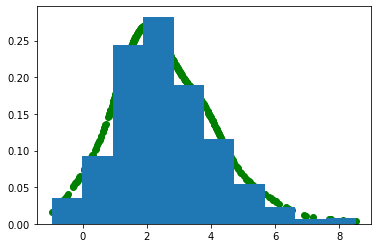

 mean loglikelihood of p_g  -1.83385396
Gradient cte 0.0052422103881835935
 Cte Update  2.0089065724611284

 pn/(pn+pm) 2 0.84869677

 std dev y_predit 1.5652884
mean y_predit 2.566054
pn/(pn+pm)  0.819381177
std dev y_pred 1.56528842
 model train on batch  -0.41301557421684265
############ iteration  230 ################
 p_nx  [0.252760023 0.225786179 0.224316433 ... 0.196643323 0.224214837 0.234995306]


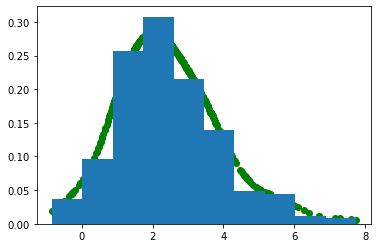

 mean loglikelihood of p_g  -1.76194787
Gradient cte -0.0005339555740356446
 Cte Update  2.0083726168870926

 pn/(pn+pm) 2 0.8260545

 std dev y_predit 1.4588742
mean y_predit 2.4527192
pn/(pn+pm)  0.794632912
std dev y_pred 1.45887411
 model train on batch  -0.4788644313812256
############ iteration  231 ################
 p_nx  [0.19506456 0.186184376 0.217063367 ... 0.20604378 0.202565387 0.207638815]


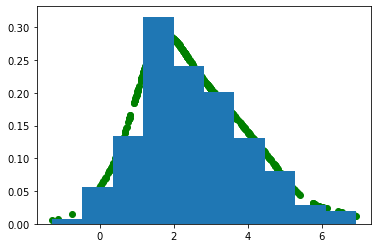

 mean loglikelihood of p_g  -1.75834394
Gradient cte -0.001388002872467041
 Cte Update  2.0069846140146255

 pn/(pn+pm) 2 0.83912706

 std dev y_predit 1.4531809
mean y_predit 2.5091467
pn/(pn+pm)  0.813762486
std dev y_pred 1.45318079
 model train on batch  -0.4560414254665375
############ iteration  232 ################
 p_nx  [0.191292405 0.161961377 0.193964809 ... 0.211160123 0.202422485 0.191248536]


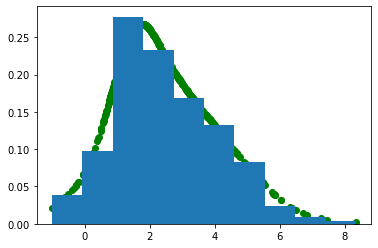

 mean loglikelihood of p_g  -1.84847176
Gradient cte -0.0009852890968322754
 Cte Update  2.005999324917793

 pn/(pn+pm) 2 0.8478077

 std dev y_predit 1.5881635
mean y_predit 2.4709785
pn/(pn+pm)  0.82758522
std dev y_pred 1.5881635
 model train on batch  -0.4448208510875702
############ iteration  233 ################
 p_nx  [0.193615139 0.20971787 0.201284692 ... 0.230927929 0.208405167 0.182543188]


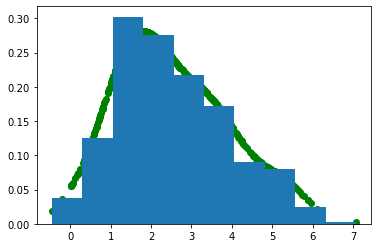

 mean loglikelihood of p_g  -1.71248877
Gradient cte 0.001713139533996582
 Cte Update  2.0077124644517896

 pn/(pn+pm) 2 0.8376185

 std dev y_predit 1.394389
mean y_predit 2.5368423
pn/(pn+pm)  0.811419606
std dev y_pred 1.39438903
 model train on batch  -0.4591255187988281
############ iteration  234 ################
 p_nx  [0.199565589 0.204643309 0.229908541 ... 0.221408 0.191083729 0.221100777]


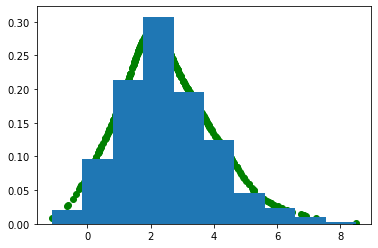

 mean loglikelihood of p_g  -1.79029274
Gradient cte 0.0009240529537200928
 Cte Update  2.0086365174055096

 pn/(pn+pm) 2 0.8382814

 std dev y_predit 1.4925995
mean y_predit 2.4979398
pn/(pn+pm)  0.80847472
std dev y_pred 1.49259949
 model train on batch  -0.440191388130188
############ iteration  235 ################
 p_nx  [0.183681428 0.179126054 0.209474802 ... 0.20107758 0.183781654 0.163718224]


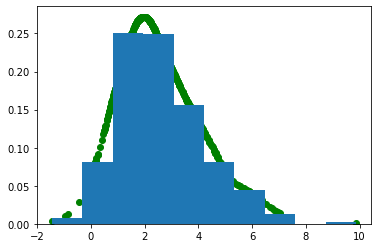

 mean loglikelihood of p_g  -1.81862938
Gradient cte 0.006425582885742188
 Cte Update  2.0150621002912517

 pn/(pn+pm) 2 0.8421182

 std dev y_predit 1.5656568
mean y_predit 2.5813298
pn/(pn+pm)  0.816333354
std dev y_pred 1.56565678
 model train on batch  -0.44603678584098816
############ iteration  236 ################
 p_nx  [0.193655491 0.255903304 0.242684692 ... 0.224073544 0.261879712 0.210811719]


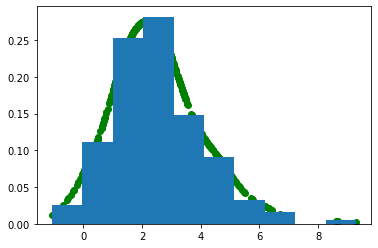

 mean loglikelihood of p_g  -1.80543244
Gradient cte -0.0013099956512451173
 Cte Update  2.0137521046400066

 pn/(pn+pm) 2 0.8180957

 std dev y_predit 1.5356468
mean y_predit 2.5106297
pn/(pn+pm)  0.785415
std dev y_pred 1.5356468
 model train on batch  -0.4932313859462738
############ iteration  237 ################
 p_nx  [0.198265195 0.211671233 0.216986269 ... 0.21409528 0.245574653 0.261613488]


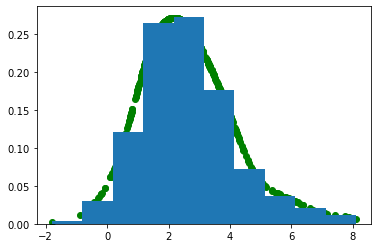

 mean loglikelihood of p_g  -1.80088782
Gradient cte 0.0005522370338439941
 Cte Update  2.0143043416738506

 pn/(pn+pm) 2 0.81415755

 std dev y_predit 1.5320262
mean y_predit 2.6240802
pn/(pn+pm)  0.78300947
std dev y_pred 1.53202617
 model train on batch  -0.5094537734985352
############ iteration  238 ################
 p_nx  [0.196846813 0.223234028 0.205618605 ... 0.250527114 0.211028963 0.219889045]


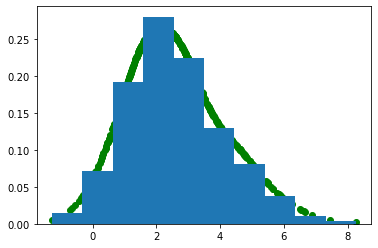

 mean loglikelihood of p_g  -1.81338871
Gradient cte -0.00030746400356292727
 Cte Update  2.0139968776702877

 pn/(pn+pm) 2 0.82296276

 std dev y_predit 1.5213722
mean y_predit 2.5954828
pn/(pn+pm)  0.793739319
std dev y_pred 1.5213722
 model train on batch  -0.49637070298194885
############ iteration  239 ################
 p_nx  [0.237159461 0.232369855 0.225005478 ... 0.238383144 0.229914576 0.236594021]


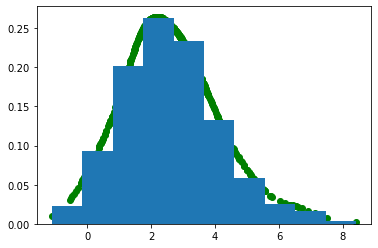

 mean loglikelihood of p_g  -1.82500982
Gradient cte -0.007108733177185058
 Cte Update  2.006888144493103

 pn/(pn+pm) 2 0.817234

 std dev y_predit 1.5363923
mean y_predit 2.6121821
pn/(pn+pm)  0.787365079
std dev y_pred 1.53639233
 model train on batch  -0.5092600584030151
############ iteration  240 ################
 p_nx  [0.191383541 0.228527099 0.215257227 ... 0.21007286 0.228800893 0.224742338]


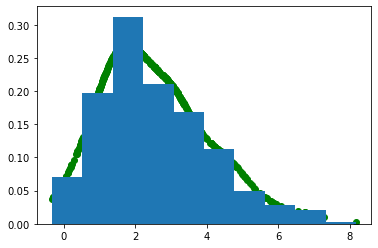

 mean loglikelihood of p_g  -1.79286218
Gradient cte -0.007890031814575196
 Cte Update  1.9989981126785277

 pn/(pn+pm) 2 0.8202522

 std dev y_predit 1.5252178
mean y_predit 2.5463073
pn/(pn+pm)  0.793577254
std dev y_pred 1.52521777
 model train on batch  -0.5103070735931396
############ iteration  241 ################
 p_nx  [0.226482108 0.25119409 0.227349669 ... 0.227292985 0.218140811 0.252588958]


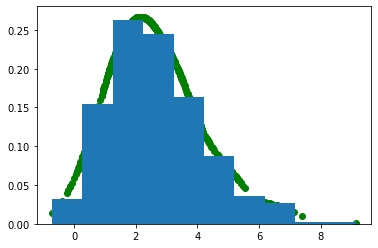

 mean loglikelihood of p_g  -1.80047369
Gradient cte -0.0038209652900695803
 Cte Update  1.995177147388458

 pn/(pn+pm) 2 0.8212179

 std dev y_predit 1.5299866
mean y_predit 2.6389031
pn/(pn+pm)  0.787753165
std dev y_pred 1.52998662
 model train on batch  -0.4861191213130951
############ iteration  242 ################
 p_nx  [0.225403666 0.233976036 0.209266648 ... 0.223998874 0.252251923 0.238624364]


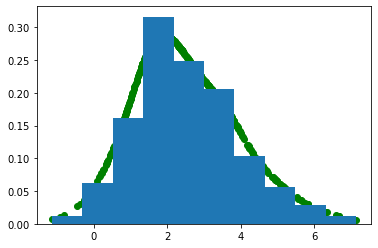

 mean loglikelihood of p_g  -1.74176621
Gradient cte 0.0009483033418655395
 Cte Update  1.9961254507303237

 pn/(pn+pm) 2 0.8328309

 std dev y_predit 1.4138247
mean y_predit 2.5006275
pn/(pn+pm)  0.80438143
std dev y_pred 1.41382468
 model train on batch  -0.46574005484580994
############ iteration  243 ################
 p_nx  [0.196803451 0.248236939 0.220665991 ... 0.211752698 0.185735598 0.197820693]


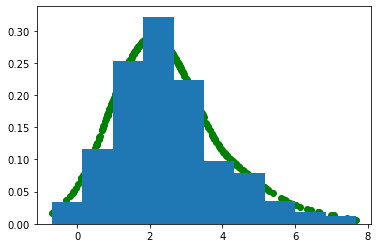

 mean loglikelihood of p_g  -1.75958622
Gradient cte -0.008207509994506836
 Cte Update  1.9879179407358167

 pn/(pn+pm) 2 0.82006586

 std dev y_predit 1.4749293
mean y_predit 2.5079937
pn/(pn+pm)  0.790797055
std dev y_pred 1.47492933
 model train on batch  -0.5011565089225769
############ iteration  244 ################
 p_nx  [0.227600664 0.243989 0.217020929 ... 0.183785856 0.222210988 0.234655127]


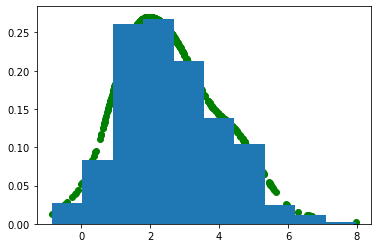

 mean loglikelihood of p_g  -1.76290822
Gradient cte -0.0006543269157409668
 Cte Update  1.9872636138200757

 pn/(pn+pm) 2 0.82202244

 std dev y_predit 1.4460621
mean y_predit 2.58794
pn/(pn+pm)  0.794170797
std dev y_pred 1.44606209
 model train on batch  -0.4989919066429138
############ iteration  245 ################
 p_nx  [0.248942584 0.259956628 0.267537951 ... 0.221700534 0.243992254 0.254550368]


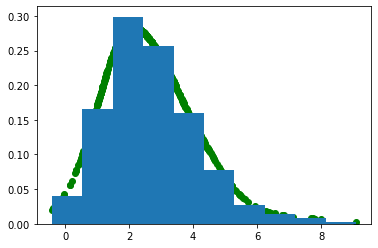

 mean loglikelihood of p_g  -1.7489332
Gradient cte -0.004034306526184082
 Cte Update  1.9832293072938916

 pn/(pn+pm) 2 0.8134421

 std dev y_predit 1.4597219
mean y_predit 2.66665
pn/(pn+pm)  0.778703392
std dev y_pred 1.45972204
 model train on batch  -0.5113285183906555
############ iteration  246 ################
 p_nx  [0.269280881 0.234681875 0.221510321 ... 0.206812039 0.240277216 0.23557961]


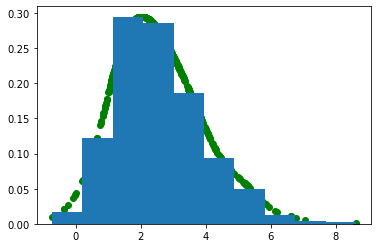

 mean loglikelihood of p_g  -1.69867408
Gradient cte 0.004405462265014649
 Cte Update  1.9876347695589063

 pn/(pn+pm) 2 0.820703

 std dev y_predit 1.3715402
mean y_predit 2.5583227
pn/(pn+pm)  0.786254764
std dev y_pred 1.37154019
 model train on batch  -0.493083655834198
############ iteration  247 ################
 p_nx  [0.235542655 0.230766341 0.238518447 ... 0.215109885 0.215070501 0.225035191]


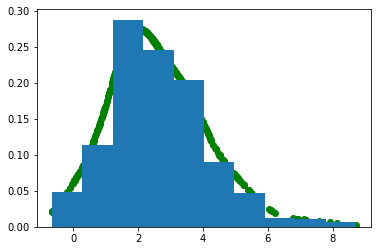

 mean loglikelihood of p_g  -1.80116558
Gradient cte -0.0021866147518157957
 Cte Update  1.9854481548070906

 pn/(pn+pm) 2 0.83134484

 std dev y_predit 1.5208982
mean y_predit 2.6062067
pn/(pn+pm)  0.798251092
std dev y_pred 1.52089822
 model train on batch  -0.4592263698577881
############ iteration  248 ################
 p_nx  [0.262195349 0.252681702 0.241523087 ... 0.2409098 0.231030583 0.238440216]


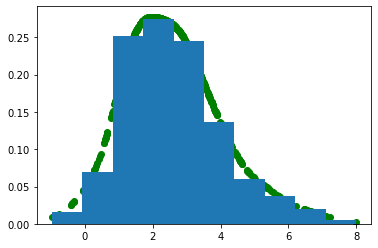

 mean loglikelihood of p_g  -1.7493422
Gradient cte -0.005757749080657959
 Cte Update  1.9796904057264326

 pn/(pn+pm) 2 0.8067846

 std dev y_predit 1.4415554
mean y_predit 2.5851915
pn/(pn+pm)  0.77453953
std dev y_pred 1.4415555
 model train on batch  -0.5361700057983398
############ iteration  249 ################
 p_nx  [0.195346966 0.222039714 0.220590457 ... 0.231224552 0.223075479 0.195971131]


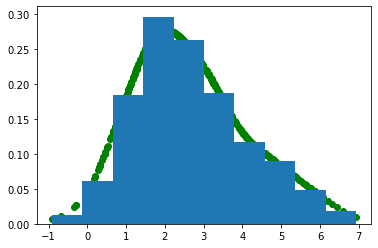

 mean loglikelihood of p_g  -1.761204
Gradient cte -0.0020174994468688963
 Cte Update  1.9776729062795637

 pn/(pn+pm) 2 0.81974596

 std dev y_predit 1.4622116
mean y_predit 2.6417682
pn/(pn+pm)  0.78784436
std dev y_pred 1.46221149
 model train on batch  -0.4939711093902588
############ iteration  250 ################
 p_nx  [0.211336493 0.229432255 0.20920907 ... 0.20214045 0.219695151 0.199276894]


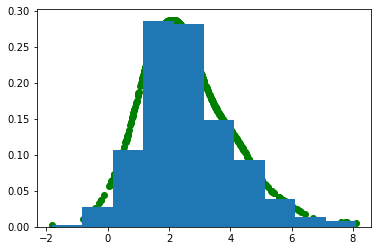

 mean loglikelihood of p_g  -1.77080572
Gradient cte 0.00735361385345459
 Cte Update  1.9850265201330184

 pn/(pn+pm) 2 0.83674115

 std dev y_predit 1.4827452
mean y_predit 2.5691788
pn/(pn+pm)  0.804462731
std dev y_pred 1.48274517
 model train on batch  -0.44404059648513794
############ iteration  251 ################
 p_nx  [0.231680244 0.251508355 0.252213091 ... 0.233290344 0.240012929 0.235839576]


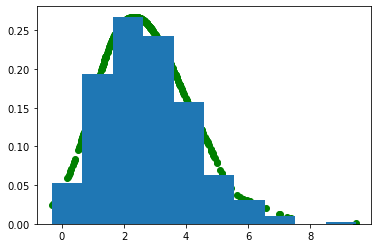

 mean loglikelihood of p_g  -1.76132882
Gradient cte -0.005267342090606689
 Cte Update  1.9797591780424117

 pn/(pn+pm) 2 0.8105199

 std dev y_predit 1.4564508
mean y_predit 2.7473373
pn/(pn+pm)  0.774259329
std dev y_pred 1.4564507
 model train on batch  -0.5112152099609375
############ iteration  252 ################
 p_nx  [0.208254769 0.189467907 0.186457917 ... 0.189991012 0.176522687 0.228416741]


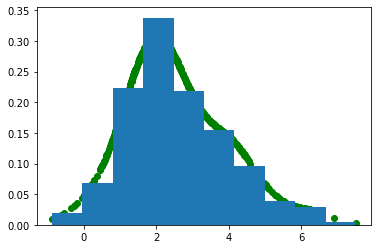

 mean loglikelihood of p_g  -1.72625232
Gradient cte 0.005614284515380859
 Cte Update  1.9853734625577926

 pn/(pn+pm) 2 0.8440505

 std dev y_predit 1.4147687
mean y_predit 2.5730186
pn/(pn+pm)  0.816808283
std dev y_pred 1.4147687
 model train on batch  -0.4377034604549408
############ iteration  253 ################
 p_nx  [0.252254099 0.247337192 0.226609796 ... 0.252554625 0.244131207 0.23336722]


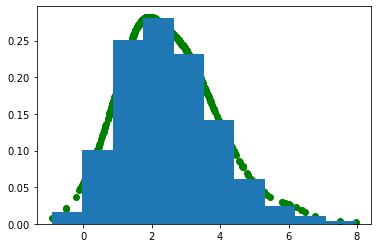

 mean loglikelihood of p_g  -1.72871923
Gradient cte -0.004120241165161133
 Cte Update  1.9812532213926315

 pn/(pn+pm) 2 0.81113553

 std dev y_predit 1.4049835
mean y_predit 2.514216
pn/(pn+pm)  0.77770859
std dev y_pred 1.40498352
 model train on batch  -0.5211639404296875
############ iteration  254 ################
 p_nx  [0.22458528 0.229853958 0.217478499 ... 0.233448133 0.213471 0.209943891]


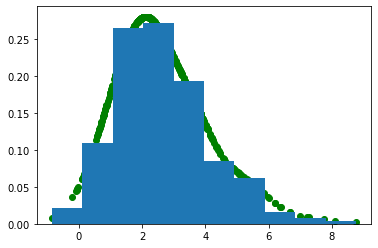

 mean loglikelihood of p_g  -1.78593326
Gradient cte 0.004109194278717041
 Cte Update  1.9853624156713485

 pn/(pn+pm) 2 0.8300462

 std dev y_predit 1.5124315
mean y_predit 2.6458457
pn/(pn+pm)  0.800006747
std dev y_pred 1.51243162
 model train on batch  -0.4722955524921417
############ iteration  255 ################
 p_nx  [0.248588145 0.235279307 0.252872527 ... 0.262162089 0.241649 0.263502091]


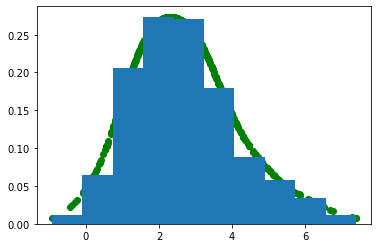

 mean loglikelihood of p_g  -1.7663
Gradient cte -0.005845010757446289
 Cte Update  1.9795174049139022

 pn/(pn+pm) 2 0.8037437

 std dev y_predit 1.4544777
mean y_predit 2.6826618
pn/(pn+pm)  0.770112157
std dev y_pred 1.45447767
 model train on batch  -0.5426895022392273
############ iteration  256 ################
 p_nx  [0.241451696 0.218102336 0.222986788 ... 0.238187596 0.252037197 0.252623409]


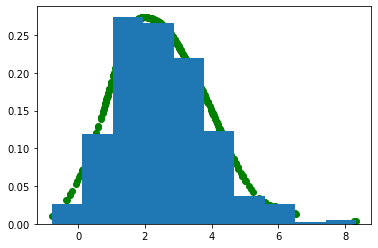

 mean loglikelihood of p_g  -1.72399962
Gradient cte 0.0026581573486328127
 Cte Update  1.982175562262535

 pn/(pn+pm) 2 0.8190908

 std dev y_predit 1.3988845
mean y_predit 2.5175517
pn/(pn+pm)  0.78602767
std dev y_pred 1.39888465
 model train on batch  -0.49905911087989807
############ iteration  257 ################
 p_nx  [0.26631707 0.269673437 0.258373082 ... 0.246332511 0.25578168 0.221285775]


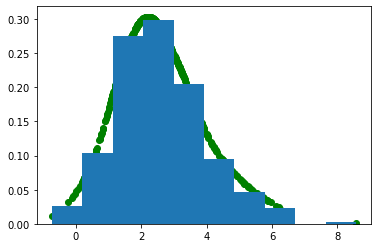

 mean loglikelihood of p_g  -1.7068553
Gradient cte -0.0015025382041931152
 Cte Update  1.980673024058342

 pn/(pn+pm) 2 0.8135476

 std dev y_predit 1.3763176
mean y_predit 2.5971456
pn/(pn+pm)  0.778521657
std dev y_pred 1.37631762
 model train on batch  -0.5063660740852356
############ iteration  258 ################
 p_nx  [0.209432349 0.243328944 0.238494456 ... 0.225115046 0.254660964 0.26028645]


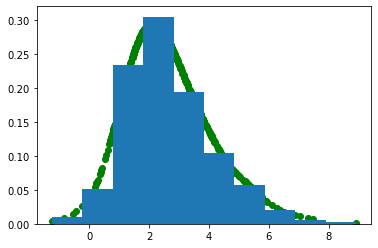

 mean loglikelihood of p_g  -1.74844742
Gradient cte 0.001057877540588379
 Cte Update  1.9817309015989302

 pn/(pn+pm) 2 0.8218507

 std dev y_predit 1.4513342
mean y_predit 2.6471875
pn/(pn+pm)  0.790241897
std dev y_pred 1.45133424
 model train on batch  -0.4937160909175873
############ iteration  259 ################
 p_nx  [0.211173311 0.216873735 0.219190374 ... 0.21960634 0.201916471 0.239082098]


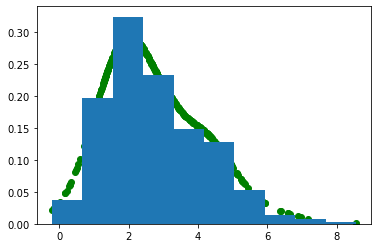

 mean loglikelihood of p_g  -1.72470224
Gradient cte 0.0035572078227996827
 Cte Update  1.9852881094217298

 pn/(pn+pm) 2 0.8338965

 std dev y_predit 1.4270636
mean y_predit 2.7307734
pn/(pn+pm)  0.806464493
std dev y_pred 1.42706358
 model train on batch  -0.46589958667755127
############ iteration  260 ################
 p_nx  [0.224284127 0.226684257 0.253595322 ... 0.226424888 0.241554424 0.250328869]


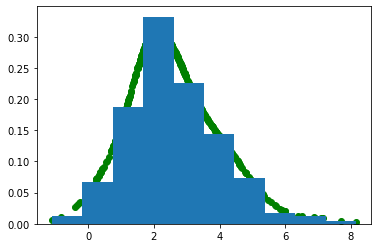

 mean loglikelihood of p_g  -1.73016655
Gradient cte 0.0038582754135131837
 Cte Update  1.989146384835243

 pn/(pn+pm) 2 0.822718

 std dev y_predit 1.411928
mean y_predit 2.5801406
pn/(pn+pm)  0.791379154
std dev y_pred 1.41192818
 model train on batch  -0.4868466854095459
############ iteration  261 ################
 p_nx  [0.259186268 0.196112379 0.253850967 ... 0.226068 0.23340717 0.215134799]


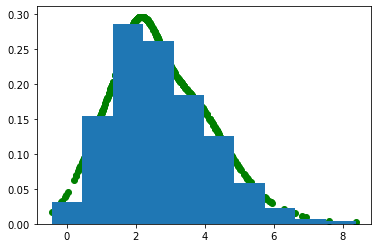

 mean loglikelihood of p_g  -1.73981798
Gradient cte 0.0034304370880126954
 Cte Update  1.9925768219232558

 pn/(pn+pm) 2 0.833399

 std dev y_predit 1.423451
mean y_predit 2.720906
pn/(pn+pm)  0.803710818
std dev y_pred 1.42345095
 model train on batch  -0.45594289898872375
############ iteration  262 ################
 p_nx  [0.21313332 0.257355 0.261652678 ... 0.279358059 0.244072318 0.263795376]


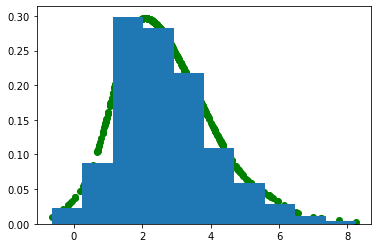

 mean loglikelihood of p_g  -1.71723533
Gradient cte 0.0008302793502807617
 Cte Update  1.9934071012735366

 pn/(pn+pm) 2 0.8157119

 std dev y_predit 1.4061135
mean y_predit 2.6944199
pn/(pn+pm)  0.782302201
std dev y_pred 1.40611351
 model train on batch  -0.5034539699554443
############ iteration  263 ################
 p_nx  [0.242965356 0.254425257 0.221128717 ... 0.229568943 0.241608441 0.219474226]


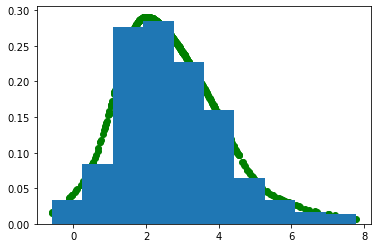

 mean loglikelihood of p_g  -1.73493791
Gradient cte -0.004518247604370117
 Cte Update  1.9888888536691665

 pn/(pn+pm) 2 0.8151796

 std dev y_predit 1.4310572
mean y_predit 2.6754103
pn/(pn+pm)  0.78334713
std dev y_pred 1.4310571
 model train on batch  -0.5150513052940369
############ iteration  264 ################
 p_nx  [0.228603944 0.256519556 0.281368196 ... 0.228185192 0.222955316 0.255195081]


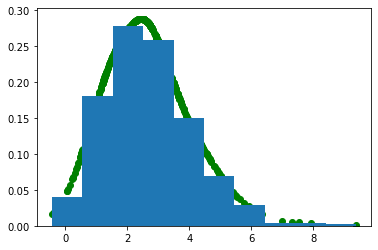

 mean loglikelihood of p_g  -1.72772753
Gradient cte 0.00015458488464355468
 Cte Update  1.98904343855381

 pn/(pn+pm) 2 0.8060751

 std dev y_predit 1.4153769
mean y_predit 2.6562777
pn/(pn+pm)  0.76791352
std dev y_pred 1.4153769
 model train on batch  -0.5225831866264343
############ iteration  265 ################
 p_nx  [0.242587611 0.238753542 0.26013729 ... 0.29010424 0.255314738 0.254659504]


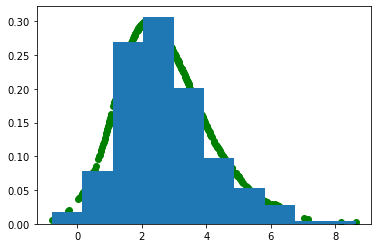

 mean loglikelihood of p_g  -1.71314406
Gradient cte 0.0017379887104034424
 Cte Update  1.9907814272642135

 pn/(pn+pm) 2 0.808064

 std dev y_predit 1.4012007
mean y_predit 2.7172558
pn/(pn+pm)  0.772842348
std dev y_pred 1.40120065
 model train on batch  -0.5193054676055908
############ iteration  266 ################
 p_nx  [0.22570017 0.234928191 0.20855847 ... 0.234058157 0.20155333 0.275096804]


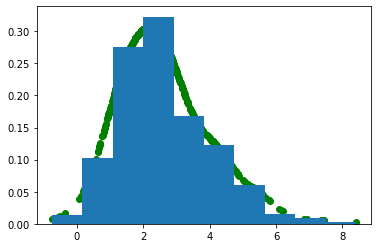

 mean loglikelihood of p_g  -1.6956054
Gradient cte -0.002395205020904541
 Cte Update  1.9883862222433089

 pn/(pn+pm) 2 0.81865746

 std dev y_predit 1.385626
mean y_predit 2.6141655
pn/(pn+pm)  0.785445392
std dev y_pred 1.38562596
 model train on batch  -0.4970276355743408
############ iteration  267 ################
 p_nx  [0.286142439 0.293273181 0.242293864 ... 0.26131165 0.2606951 0.24826239]


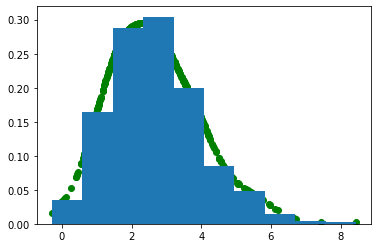

 mean loglikelihood of p_g  -1.66885674
Gradient cte -0.0005204365253448487
 Cte Update  1.987865785717964

 pn/(pn+pm) 2 0.80227035

 std dev y_predit 1.3273141
mean y_predit 2.6691368
pn/(pn+pm)  0.766228139
std dev y_pred 1.32731414
 model train on batch  -0.5352517366409302
############ iteration  268 ################
 p_nx  [0.240262091 0.235638484 0.246345669 ... 0.269841552 0.240546152 0.271890908]


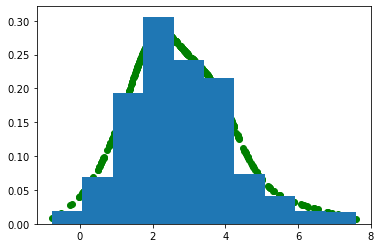

 mean loglikelihood of p_g  -1.74681294
Gradient cte -0.00010224127769470215
 Cte Update  1.9877635444402693

 pn/(pn+pm) 2 0.81813747

 std dev y_predit 1.4276791
mean y_predit 2.765046
pn/(pn+pm)  0.785396039
std dev y_pred 1.42767906
 model train on batch  -0.4992138147354126
############ iteration  269 ################
 p_nx  [0.25554359 0.256921679 0.281317353 ... 0.252324939 0.258433223 0.249584064]


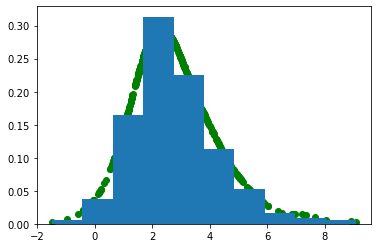

 mean loglikelihood of p_g  -1.7770741
Gradient cte 0.001248866081237793
 Cte Update  1.989012410521507

 pn/(pn+pm) 2 0.8084054

 std dev y_predit 1.509891
mean y_predit 2.7607
pn/(pn+pm)  0.775684237
std dev y_pred 1.50989103
 model train on batch  -0.5254290699958801
############ iteration  270 ################
 p_nx  [0.242233098 0.250543 0.24544096 ... 0.24113667 0.236413136 0.233716786]


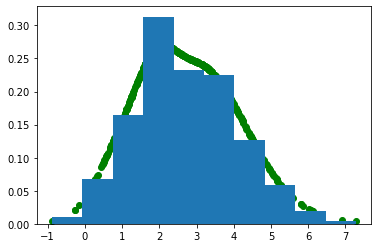

 mean loglikelihood of p_g  -1.70831609
Gradient cte 0.0008851566314697266
 Cte Update  1.9898975671529768

 pn/(pn+pm) 2 0.8139286

 std dev y_predit 1.3512495
mean y_predit 2.7154512
pn/(pn+pm)  0.782309294
std dev y_pred 1.35124958
 model train on batch  -0.5149936676025391
############ iteration  271 ################
 p_nx  [0.232932866 0.270132393 0.231224224 ... 0.256224334 0.240899339 0.259342909]


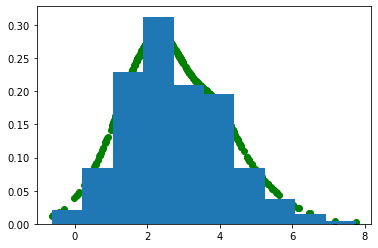

 mean loglikelihood of p_g  -1.73192334
Gradient cte 0.0016093027591705322
 Cte Update  1.9915068699121474

 pn/(pn+pm) 2 0.82304066

 std dev y_predit 1.3880966
mean y_predit 2.7632997
pn/(pn+pm)  0.787884653
std dev y_pred 1.38809657
 model train on batch  -0.47811359167099
############ iteration  272 ################
 p_nx  [0.2515513 0.242140248 0.255204946 ... 0.263084143 0.256296545 0.2531057]


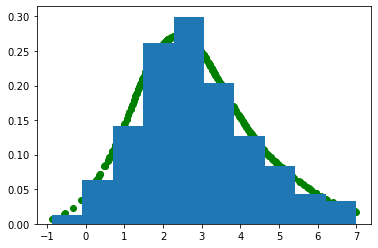

 mean loglikelihood of p_g  -1.78980827
Gradient cte -0.005361898422241211
 Cte Update  1.9861449714899062

 pn/(pn+pm) 2 0.8060656

 std dev y_predit 1.4868413
mean y_predit 2.823629
pn/(pn+pm)  0.772539794
std dev y_pred 1.48684132
 model train on batch  -0.5326938629150391
############ iteration  273 ################
 p_nx  [0.279332757 0.265889585 0.271487743 ... 0.25955385 0.255661696 0.228180081]


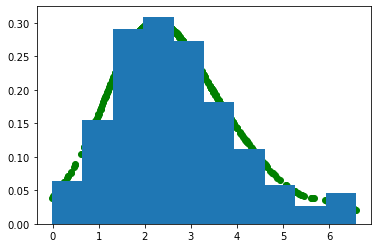

 mean loglikelihood of p_g  -1.67985988
Gradient cte -0.002331711292266846
 Cte Update  1.9838132601976393

 pn/(pn+pm) 2 0.8058395

 std dev y_predit 1.348788
mean y_predit 2.6504068
pn/(pn+pm)  0.770082414
std dev y_pred 1.3487879
 model train on batch  -0.5293623805046082
############ iteration  274 ################
 p_nx  [0.26913327 0.282328725 0.261185348 ... 0.27624318 0.273364335 0.264081448]


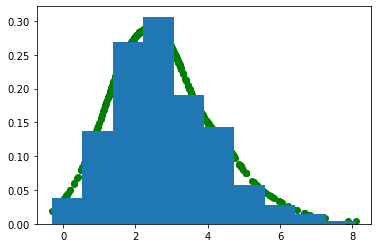

 mean loglikelihood of p_g  -1.73302209
Gradient cte -0.00979986572265625
 Cte Update  1.974013394474983

 pn/(pn+pm) 2 0.79604656

 std dev y_predit 1.4179122
mean y_predit 2.7819352
pn/(pn+pm)  0.763074875
std dev y_pred 1.41791224
 model train on batch  -0.5699675679206848
############ iteration  275 ################
 p_nx  [0.256185591 0.248226285 0.230971977 ... 0.251734525 0.231308907 0.23266688]


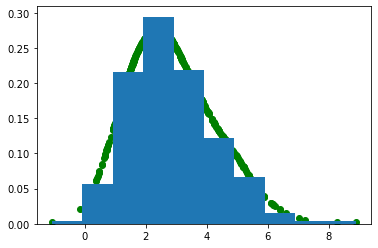

 mean loglikelihood of p_g  -1.74792051
Gradient cte 0.00771983814239502
 Cte Update  1.981733232617378

 pn/(pn+pm) 2 0.8121812

 std dev y_predit 1.4331225
mean y_predit 2.841095
pn/(pn+pm)  0.777499
std dev y_pred 1.43312252
 model train on batch  -0.5124164819717407
############ iteration  276 ################
 p_nx  [0.258364707 0.270737559 0.24417825 ... 0.227117255 0.222472221 0.207695752]


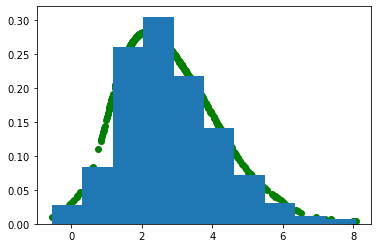

 mean loglikelihood of p_g  -1.72421956
Gradient cte -0.0008574953079223633
 Cte Update  1.9808757373094557

 pn/(pn+pm) 2 0.8160194

 std dev y_predit 1.4093195
mean y_predit 2.7792978
pn/(pn+pm)  0.782563448
std dev y_pred 1.4093194
 model train on batch  -0.5023840069770813
############ iteration  277 ################
 p_nx  [0.295773566 0.258045822 0.279628068 ... 0.25740543 0.283941925 0.288863838]


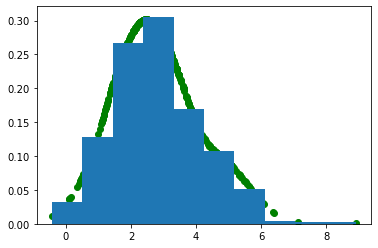

 mean loglikelihood of p_g  -1.69040203
Gradient cte -0.005236299514770508
 Cte Update  1.975639437794685

 pn/(pn+pm) 2 0.79160136

 std dev y_predit 1.3532839
mean y_predit 2.808451
pn/(pn+pm)  0.751683652
std dev y_pred 1.35328388
 model train on batch  -0.556012749671936
############ iteration  278 ################
 p_nx  [0.305738747 0.297840863 0.30139944 ... 0.288504153 0.297644228 0.302328706]


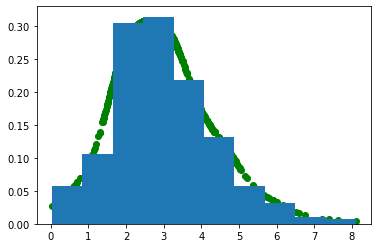

 mean loglikelihood of p_g  -1.66959476
Gradient cte -0.011876941680908203
 Cte Update  1.963762496113777

 pn/(pn+pm) 2 0.769829

 std dev y_predit 1.328871
mean y_predit 2.9672232
pn/(pn+pm)  0.725829482
std dev y_pred 1.32887101
 model train on batch  -0.611969530582428
############ iteration  279 ################
 p_nx  [0.243374318 0.277023792 0.263723433 ... 0.273228139 0.267186075 0.253944308]


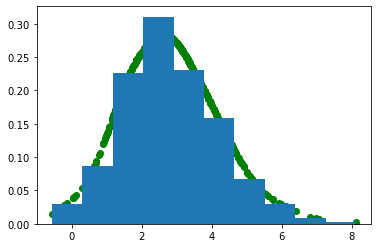

 mean loglikelihood of p_g  -1.72952735
Gradient cte -0.005279675483703613
 Cte Update  1.9584828206300733

 pn/(pn+pm) 2 0.7894966

 std dev y_predit 1.3794323
mean y_predit 2.8133662
pn/(pn+pm)  0.751802623
std dev y_pred 1.37943232
 model train on batch  -0.5698848962783813
############ iteration  280 ################
 p_nx  [0.273097485 0.308596641 0.222081 ... 0.286956131 0.264317811 0.26867947]


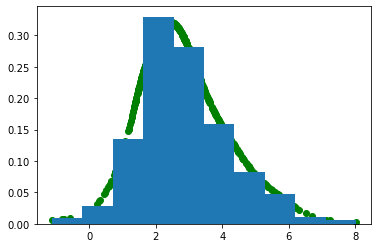

 mean loglikelihood of p_g  -1.67906785
Gradient cte -0.003105854511260986
 Cte Update  1.9553769661188123

 pn/(pn+pm) 2 0.79356825

 std dev y_predit 1.3451724
mean y_predit 2.8285108
pn/(pn+pm)  0.754025578
std dev y_pred 1.34517241
 model train on batch  -0.5588766932487488
############ iteration  281 ################
 p_nx  [0.248656556 0.215208068 0.27058515 ... 0.230553076 0.228907406 0.261403382]


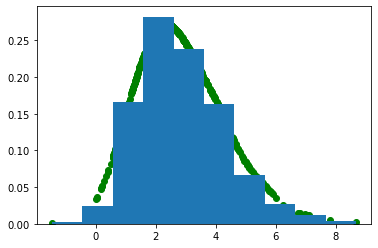

 mean loglikelihood of p_g  -1.76452613
Gradient cte 0.001073340892791748
 Cte Update  1.956450307011604

 pn/(pn+pm) 2 0.8090651

 std dev y_predit 1.4592922
mean y_predit 2.8464115
pn/(pn+pm)  0.773487568
std dev y_pred 1.45929229
 model train on batch  -0.520401120185852
############ iteration  282 ################
 p_nx  [0.270974308 0.272710234 0.269794345 ... 0.271946162 0.268165052 0.262447506]


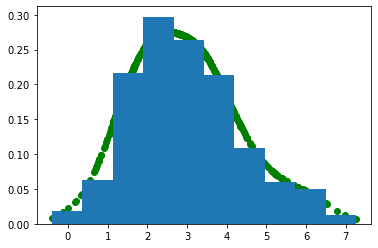

 mean loglikelihood of p_g  -1.71626246
Gradient cte -0.0005195509195327759
 Cte Update  1.9559307560920711

 pn/(pn+pm) 2 0.8006864

 std dev y_predit 1.3837523
mean y_predit 2.9669425
pn/(pn+pm)  0.76072526
std dev y_pred 1.38375235
 model train on batch  -0.5371584296226501
############ iteration  283 ################
 p_nx  [0.270758212 0.269723088 0.26865077 ... 0.268837601 0.266775131 0.269697219]


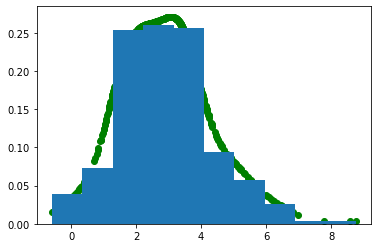

 mean loglikelihood of p_g  -1.75844765
Gradient cte 0.004130910396575928
 Cte Update  1.960061666488647

 pn/(pn+pm) 2 0.79502976

 std dev y_predit 1.4494432
mean y_predit 2.8969462
pn/(pn+pm)  0.754191935
std dev y_pred 1.44944322
 model train on batch  -0.5502241253852844
############ iteration  284 ################
 p_nx  [0.305031627 0.303399265 0.30741933 ... 0.255529 0.264688104 0.270620883]


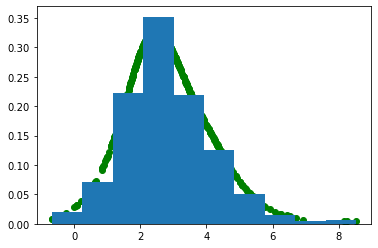

 mean loglikelihood of p_g  -1.66460395
Gradient cte -0.006046616554260254
 Cte Update  1.9540150499343867

 pn/(pn+pm) 2 0.7883583

 std dev y_predit 1.3270957
mean y_predit 2.8198917
pn/(pn+pm)  0.745804667
std dev y_pred 1.32709575
 model train on batch  -0.5668272972106934
############ iteration  285 ################
 p_nx  [0.281394064 0.304129869 0.310029089 ... 0.275262 0.261525065 0.279162318]


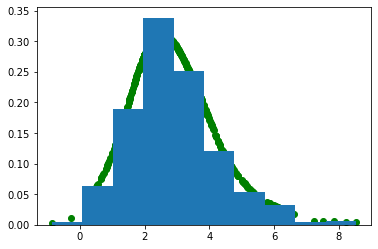

 mean loglikelihood of p_g  -1.68647337
Gradient cte -0.004175766944885254
 Cte Update  1.9498392829895015

 pn/(pn+pm) 2 0.7862683

 std dev y_predit 1.3629937
mean y_predit 2.8947067
pn/(pn+pm)  0.744130373
std dev y_pred 1.36299384
 model train on batch  -0.5742338299751282
############ iteration  286 ################
 p_nx  [0.236694679 0.236446172 0.225023597 ... 0.216402784 0.24494873 0.287556618]


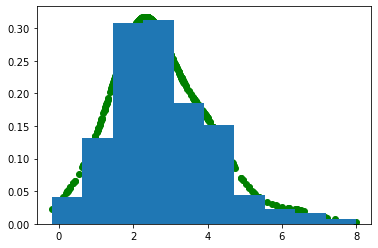

 mean loglikelihood of p_g  -1.6828717
Gradient cte -0.0012068828344345092
 Cte Update  1.948632400155067

 pn/(pn+pm) 2 0.8096857

 std dev y_predit 1.3584216
mean y_predit 2.7567856
pn/(pn+pm)  0.77320534
std dev y_pred 1.35842144
 model train on batch  -0.5180276036262512
############ iteration  287 ################
 p_nx  [0.306371123 0.284648359 0.29383 ... 0.302107781 0.291468918 0.290271819]


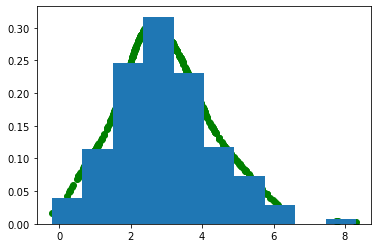

 mean loglikelihood of p_g  -1.69848633
Gradient cte -0.00430583381652832
 Cte Update  1.9443265663385387

 pn/(pn+pm) 2 0.785822

 std dev y_predit 1.3560561
mean y_predit 2.9579349
pn/(pn+pm)  0.742401659
std dev y_pred 1.35605609
 model train on batch  -0.5703110694885254
############ iteration  288 ################
 p_nx  [0.308193266 0.297079474 0.301865429 ... 0.303277344 0.308216065 0.290064961]


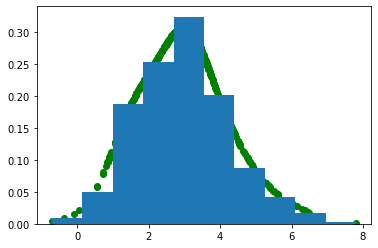

 mean loglikelihood of p_g  -1.66811097
Gradient cte -0.005786076545715332
 Cte Update  1.9385404897928233

 pn/(pn+pm) 2 0.7667232

 std dev y_predit 1.2989831
mean y_predit 2.9441175
pn/(pn+pm)  0.72341907
std dev y_pred 1.2989831
 model train on batch  -0.6320778727531433
############ iteration  289 ################
 p_nx  [0.271996975 0.279932261 0.280736685 ... 0.285661072 0.273936898 0.282315254]


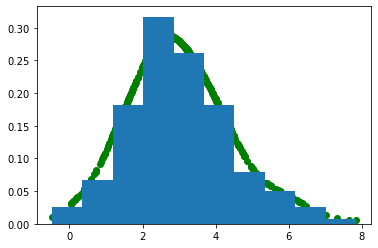

 mean loglikelihood of p_g  -1.74474978
Gradient cte -0.0034669072628021242
 Cte Update  1.9350735825300212

 pn/(pn+pm) 2 0.7902798

 std dev y_predit 1.4126036
mean y_predit 3.0114517
pn/(pn+pm)  0.747593462
std dev y_pred 1.41260362
 model train on batch  -0.5625872611999512
############ iteration  290 ################
 p_nx  [0.279994071 0.289532244 0.280398756 ... 0.226958 0.271582276 0.272388428]


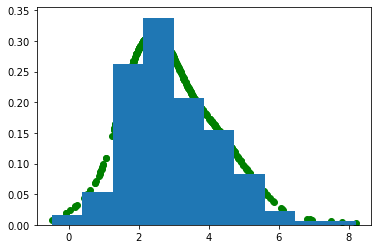

 mean loglikelihood of p_g  -1.68028152
Gradient cte 0.0003979475498199463
 Cte Update  1.935471530079841

 pn/(pn+pm) 2 0.79557204

 std dev y_predit 1.3437061
mean y_predit 2.9515293
pn/(pn+pm)  0.754195213
std dev y_pred 1.34370613
 model train on batch  -0.5484654307365417
############ iteration  291 ################
 p_nx  [0.276907444 0.267656356 0.283053249 ... 0.274551392 0.284598529 0.268003881]


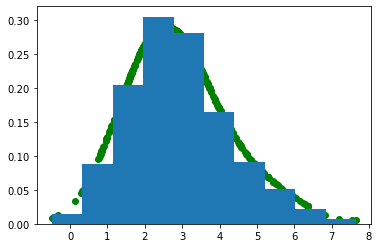

 mean loglikelihood of p_g  -1.72047317
Gradient cte -0.006967545032501221
 Cte Update  1.9285039850473398

 pn/(pn+pm) 2 0.79325885

 std dev y_predit 1.3831998
mean y_predit 2.900513
pn/(pn+pm)  0.753630221
std dev y_pred 1.38319981
 model train on batch  -0.5679429173469543
############ iteration  292 ################
 p_nx  [0.294754237 0.277909458 0.284300148 ... 0.286311537 0.274181783 0.283610404]


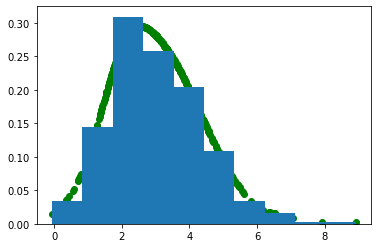

 mean loglikelihood of p_g  -1.66654992
Gradient cte 0.00184909725189209
 Cte Update  1.9303530822992319

 pn/(pn+pm) 2 0.79636174

 std dev y_predit 1.3148918
mean y_predit 3.0044713
pn/(pn+pm)  0.755893648
std dev y_pred 1.3148917
 model train on batch  -0.553168535232544
############ iteration  293 ################
 p_nx  [0.286098778 0.301904738 0.277136236 ... 0.291913033 0.300186 0.296394914]


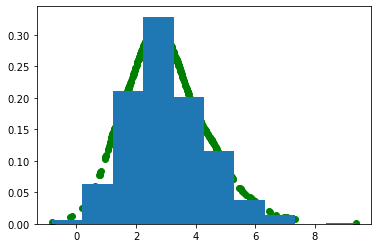

 mean loglikelihood of p_g  -1.6884166
Gradient cte 0.0019141669273376465
 Cte Update  1.9322672492265696

 pn/(pn+pm) 2 0.777708

 std dev y_predit 1.3510059
mean y_predit 3.0011103
pn/(pn+pm)  0.730770051
std dev y_pred 1.35100579
 model train on batch  -0.5934585928916931
############ iteration  294 ################
 p_nx  [0.272792429 0.25746879 0.244584233 ... 0.25747332 0.267348588 0.282055408]


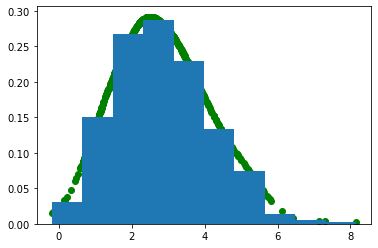

 mean loglikelihood of p_g  -1.66822088
Gradient cte 0.003592907428741455
 Cte Update  1.935860156655311

 pn/(pn+pm) 2 0.7985595

 std dev y_predit 1.3090127
mean y_predit 2.8430088
pn/(pn+pm)  0.758223355
std dev y_pred 1.30901277
 model train on batch  -0.5480648279190063
############ iteration  295 ################
 p_nx  [0.331595659 0.304651678 0.328848898 ... 0.330993325 0.340638846 0.311937243]


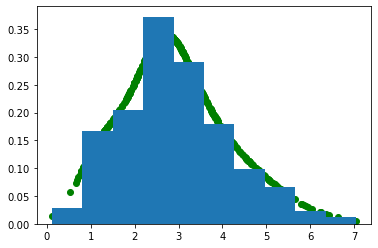

 mean loglikelihood of p_g  -1.59871519
Gradient cte -0.009631296157836915
 Cte Update  1.9262288604974742

 pn/(pn+pm) 2 0.76250815

 std dev y_predit 1.2333944
mean y_predit 2.9112358
pn/(pn+pm)  0.71295923
std dev y_pred 1.2333945
 model train on batch  -0.6280842423439026
############ iteration  296 ################
 p_nx  [0.294339627 0.299676716 0.268702537 ... 0.297239453 0.289255559 0.267827451]


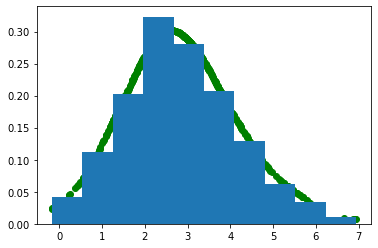

 mean loglikelihood of p_g  -1.67426288
Gradient cte -0.0015952019691467284
 Cte Update  1.9246336585283275

 pn/(pn+pm) 2 0.78969234

 std dev y_predit 1.3030713
mean y_predit 2.8294566
pn/(pn+pm)  0.745561481
std dev y_pred 1.30307126
 model train on batch  -0.5663424134254456
############ iteration  297 ################
 p_nx  [0.276697069 0.273362637 0.277450532 ... 0.277228773 0.271446079 0.277545422]


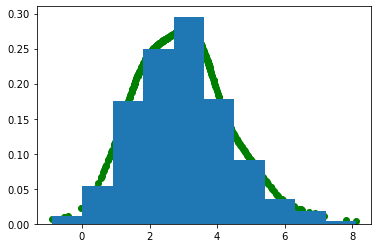

 mean loglikelihood of p_g  -1.739766
Gradient cte -0.0005437567234039307
 Cte Update  1.9240899018049236

 pn/(pn+pm) 2 0.7939142

 std dev y_predit 1.4050546
mean y_predit 2.9608667
pn/(pn+pm)  0.753418148
std dev y_pred 1.40505457
 model train on batch  -0.561765730381012
############ iteration  298 ################
 p_nx  [0.254677117 0.265395969 0.300012022 ... 0.290649772 0.298672289 0.265934855]


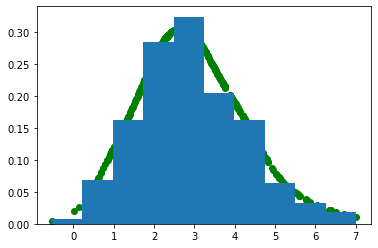

 mean loglikelihood of p_g  -1.66285479
Gradient cte -0.0016906473636627197
 Cte Update  1.922399254441261

 pn/(pn+pm) 2 0.78200877

 std dev y_predit 1.2971927
mean y_predit 2.9228976
pn/(pn+pm)  0.740914524
std dev y_pred 1.29719269
 model train on batch  -0.5952411890029907
############ iteration  299 ################
 p_nx  [0.27854228 0.30728963 0.295125932 ... 0.312442929 0.305589795 0.317336708]


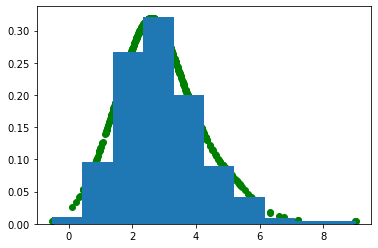

 mean loglikelihood of p_g  -1.66478574
Gradient cte -0.003916644096374512
 Cte Update  1.9184826103448864

 pn/(pn+pm) 2 0.7769567

 std dev y_predit 1.3352019
mean y_predit 2.902297
pn/(pn+pm)  0.731426537
std dev y_pred 1.33520186
 model train on batch  -0.5972993969917297
############ iteration  300 ################
 p_nx  [0.29331 0.282275259 0.278324962 ... 0.284111083 0.27789104 0.282865435]


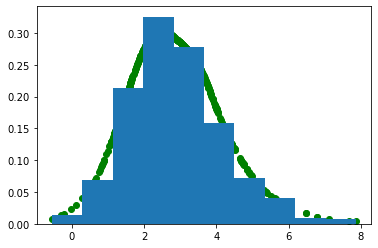

 mean loglikelihood of p_g  -1.67394757
Gradient cte 0.001084944725036621
 Cte Update  1.9195675550699232

 pn/(pn+pm) 2 0.79631823

 std dev y_predit 1.3201041
mean y_predit 2.8775284
pn/(pn+pm)  0.751036227
std dev y_pred 1.32010412
 model train on batch  -0.5415143370628357
############ iteration  301 ################
 p_nx  [0.308624893 0.310762614 0.31197235 ... 0.294972867 0.284737676 0.301521182]


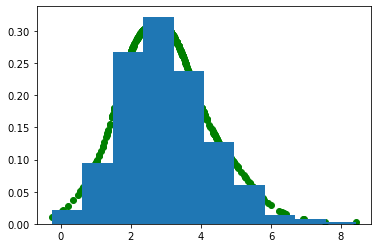

 mean loglikelihood of p_g  -1.64926326
Gradient cte -0.002020336151123047
 Cte Update  1.9175472189188

 pn/(pn+pm) 2 0.7753157

 std dev y_predit 1.2858903
mean y_predit 2.9850566
pn/(pn+pm)  0.727545083
std dev y_pred 1.28589034
 model train on batch  -0.5997762680053711
############ iteration  302 ################
 p_nx  [0.287077785 0.292212158 0.294046134 ... 0.287074924 0.299004167 0.294668913]


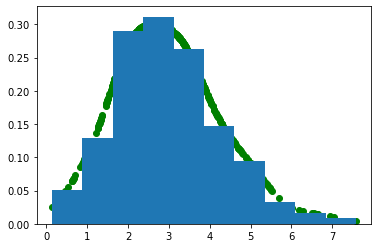

 mean loglikelihood of p_g  -1.64615452
Gradient cte 0.002018162727355957
 Cte Update  1.919565381646156

 pn/(pn+pm) 2 0.78675926

 std dev y_predit 1.2821147
mean y_predit 2.9589834
pn/(pn+pm)  0.739059508
std dev y_pred 1.28211474
 model train on batch  -0.5669254660606384
############ iteration  303 ################
 p_nx  [0.28701058 0.307335079 0.307329059 ... 0.303174973 0.293925017 0.292531967]


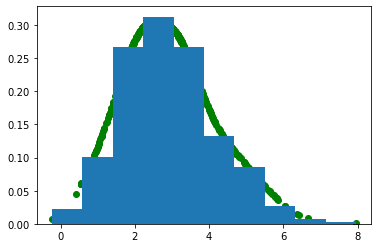

 mean loglikelihood of p_g  -1.63201427
Gradient cte 2.0772695541381835e-05
 Cte Update  1.9195861543416974

 pn/(pn+pm) 2 0.78164476

 std dev y_predit 1.2645795
mean y_predit 2.8993466
pn/(pn+pm)  0.73686415
std dev y_pred 1.26457953
 model train on batch  -0.5848730206489563
############ iteration  304 ################
 p_nx  [0.306034714 0.270939797 0.282325208 ... 0.277161628 0.293180913 0.268397242]


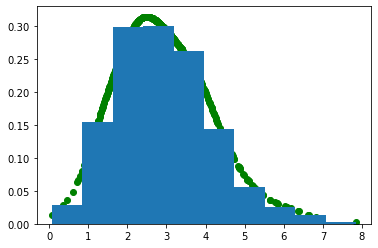

 mean loglikelihood of p_g  -1.60262656
Gradient cte 0.004658890724182129
 Cte Update  1.9242450450658795

 pn/(pn+pm) 2 0.7892391

 std dev y_predit 1.2334908
mean y_predit 2.9294965
pn/(pn+pm)  0.746880352
std dev y_pred 1.23349094
 model train on batch  -0.56488037109375
############ iteration  305 ################
 p_nx  [0.336759567 0.337325603 0.3408764 ... 0.337724894 0.341259241 0.328540772]


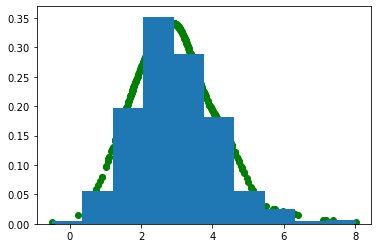

 mean loglikelihood of p_g  -1.56373727
Gradient cte -0.01292246150970459
 Cte Update  1.911322583556175

 pn/(pn+pm) 2 0.75188917

 std dev y_predit 1.1947982
mean y_predit 2.965926
pn/(pn+pm)  0.70215255
std dev y_pred 1.19479823
 model train on batch  -0.6611931324005127
############ iteration  306 ################
 p_nx  [0.290876597 0.281218886 0.287332803 ... 0.296010464 0.298826694 0.304571331]


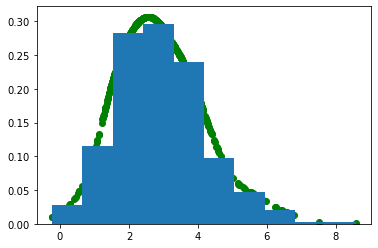

 mean loglikelihood of p_g  -1.64498055
Gradient cte -0.0021897225379943846
 Cte Update  1.9091328610181806

 pn/(pn+pm) 2 0.79223657

 std dev y_predit 1.296778
mean y_predit 2.92232
pn/(pn+pm)  0.748599231
std dev y_pred 1.29677796
 model train on batch  -0.5632737278938293
############ iteration  307 ################
 p_nx  [0.300742507 0.310452163 0.31044063 ... 0.310358047 0.293122619 0.309555352]


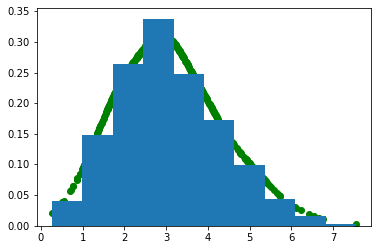

 mean loglikelihood of p_g  -1.62915123
Gradient cte -0.004540211200714112
 Cte Update  1.9045926498174666

 pn/(pn+pm) 2 0.76948506

 std dev y_predit 1.2552447
mean y_predit 3.077152
pn/(pn+pm)  0.724340081
std dev y_pred 1.25524473
 model train on batch  -0.6258019804954529
############ iteration  308 ################
 p_nx  [0.303337932 0.302016199 0.295618057 ... 0.315251172 0.30620271 0.297791034]


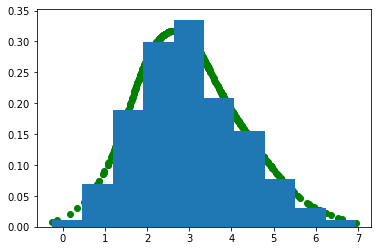

 mean loglikelihood of p_g  -1.61937463
Gradient cte 0.0022178239822387693
 Cte Update  1.9068104737997054

 pn/(pn+pm) 2 0.77298164

 std dev y_predit 1.2397804
mean y_predit 2.984256
pn/(pn+pm)  0.72529155
std dev y_pred 1.23978043
 model train on batch  -0.6020276546478271
############ iteration  309 ################
 p_nx  [0.321410537 0.333503604 0.327840328 ... 0.3348611 0.296318173 0.319291532]


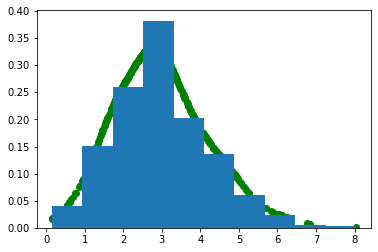

 mean loglikelihood of p_g  -1.59425366
Gradient cte -0.0065341596603393556
 Cte Update  1.900276314139366

 pn/(pn+pm) 2 0.7582734

 std dev y_predit 1.2193022
mean y_predit 2.9678154
pn/(pn+pm)  0.708711565
std dev y_pred 1.21930218
 model train on batch  -0.6447538733482361
############ iteration  310 ################
 p_nx  [0.274037629 0.288488328 0.305673 ... 0.291445553 0.295924783 0.325704515]


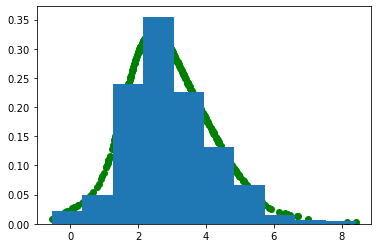

 mean loglikelihood of p_g  -1.64036787
Gradient cte -0.0005572605133056641
 Cte Update  1.8997190536260602

 pn/(pn+pm) 2 0.7876699

 std dev y_predit 1.2929287
mean y_predit 2.9147205
pn/(pn+pm)  0.741015613
std dev y_pred 1.29292881
 model train on batch  -0.5683866739273071
############ iteration  311 ################
 p_nx  [0.305698514 0.294357151 0.309124172 ... 0.303367287 0.303839833 0.292183727]


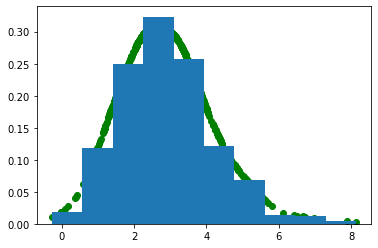

 mean loglikelihood of p_g  -1.64073026
Gradient cte 0.0014905655384063721
 Cte Update  1.9012096191644665

 pn/(pn+pm) 2 0.78121305

 std dev y_predit 1.2823969
mean y_predit 2.88168
pn/(pn+pm)  0.735212624
std dev y_pred 1.28239691
 model train on batch  -0.5884582996368408
############ iteration  312 ################
 p_nx  [0.320797801 0.319525182 0.287191421 ... 0.282470495 0.299649149 0.319075406]


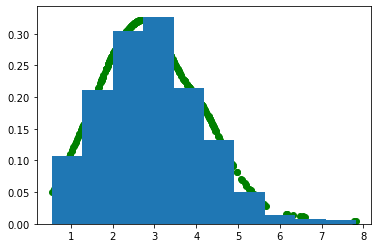

 mean loglikelihood of p_g  -1.58332217
Gradient cte -0.0037762057781219483
 Cte Update  1.8974334133863446

 pn/(pn+pm) 2 0.7702116

 std dev y_predit 1.2145613
mean y_predit 2.9396749
pn/(pn+pm)  0.723822474
std dev y_pred 1.21456134
 model train on batch  -0.6194085478782654
############ iteration  313 ################
 p_nx  [0.297945559 0.297298849 0.31954971 ... 0.296346 0.301207185 0.304719806]


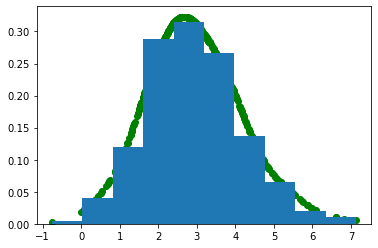

 mean loglikelihood of p_g  -1.61293197
Gradient cte -0.0037711780071258546
 Cte Update  1.8936622353792187

 pn/(pn+pm) 2 0.77886605

 std dev y_predit 1.2250881
mean y_predit 2.927992
pn/(pn+pm)  0.73184067
std dev y_pred 1.22508812
 model train on batch  -0.5921915769577026
############ iteration  314 ################
 p_nx  [0.336892247 0.308687598 0.286157042 ... 0.313223541 0.290097058 0.3467381]


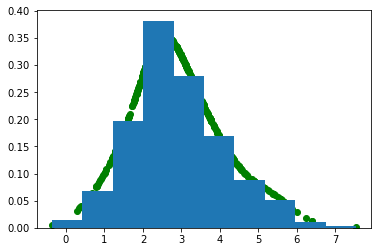

 mean loglikelihood of p_g  -1.59076381
Gradient cte 0.003612003803253174
 Cte Update  1.897274239182472

 pn/(pn+pm) 2 0.7785294

 std dev y_predit 1.2194318
mean y_predit 2.8944926
pn/(pn+pm)  0.72866261
std dev y_pred 1.21943188
 model train on batch  -0.590573787689209
############ iteration  315 ################
 p_nx  [0.340948433 0.358029574 0.3371934 ... 0.354167312 0.356815428 0.358616143]


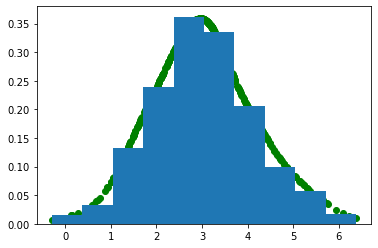

 mean loglikelihood of p_g  -1.54076767
Gradient cte -0.004470816135406494
 Cte Update  1.8928034230470654

 pn/(pn+pm) 2 0.74320865

 std dev y_predit 1.1375605
mean y_predit 3.026568
pn/(pn+pm)  0.687214673
std dev y_pred 1.13756049
 model train on batch  -0.6773032546043396
############ iteration  316 ################
 p_nx  [0.2413771 0.291950464 0.298864901 ... 0.286206454 0.276374251 0.288751602]


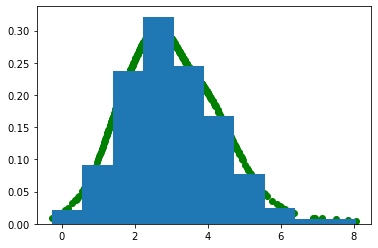

 mean loglikelihood of p_g  -1.66858947
Gradient cte 0.00402846097946167
 Cte Update  1.896831884026527

 pn/(pn+pm) 2 0.7848215

 std dev y_predit 1.3144363
mean y_predit 3.0171573
pn/(pn+pm)  0.740664482
std dev y_pred 1.31443644
 model train on batch  -0.5781949758529663
############ iteration  317 ################
 p_nx  [0.279604733 0.349419951 0.293694854 ... 0.3184627 0.349652976 0.289678752]


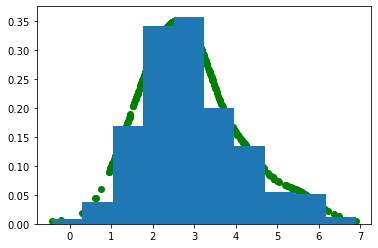

 mean loglikelihood of p_g  -1.56507635
Gradient cte -0.0017181851863861085
 Cte Update  1.895113698840141

 pn/(pn+pm) 2 0.76345253

 std dev y_predit 1.2033564
mean y_predit 2.9109147
pn/(pn+pm)  0.714062452
std dev y_pred 1.20335639
 model train on batch  -0.6333925724029541
############ iteration  318 ################
 p_nx  [0.317240506 0.314422339 0.293166369 ... 0.320018 0.32311672 0.319199145]


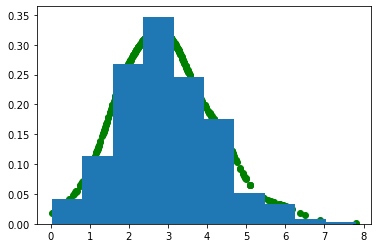

 mean loglikelihood of p_g  -1.60582316
Gradient cte 0.0005313220024108886
 Cte Update  1.8956450208425517

 pn/(pn+pm) 2 0.76896906

 std dev y_predit 1.2282176
mean y_predit 2.9494662
pn/(pn+pm)  0.720952153
std dev y_pred 1.2282176
 model train on batch  -0.6206210255622864
############ iteration  319 ################
 p_nx  [0.318041444 0.332983345 0.334217757 ... 0.33193168 0.321743906 0.332261682]


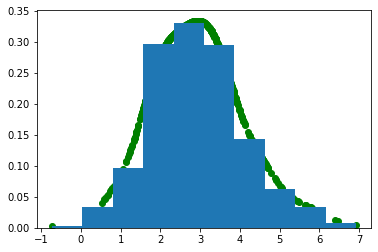

 mean loglikelihood of p_g  -1.55605304
Gradient cte -0.0050431227684020995
 Cte Update  1.8906018980741497

 pn/(pn+pm) 2 0.7625696

 std dev y_predit 1.1629772
mean y_predit 2.9288967
pn/(pn+pm)  0.710656762
std dev y_pred 1.16297722
 model train on batch  -0.6309909224510193
############ iteration  320 ################
 p_nx  [0.308065891 0.352570802 0.357489645 ... 0.351780027 0.30779776 0.352053702]


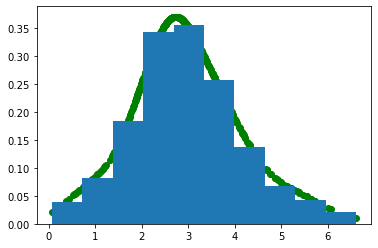

 mean loglikelihood of p_g  -1.56247222
Gradient cte -0.003797105312347412
 Cte Update  1.8868047927618024

 pn/(pn+pm) 2 0.75472283

 std dev y_predit 1.1809686
mean y_predit 2.9625933
pn/(pn+pm)  0.697752833
std dev y_pred 1.18096864
 model train on batch  -0.6456290483474731
############ iteration  321 ################
 p_nx  [0.304972887 0.309673756 0.311502039 ... 0.295357108 0.307731599 0.291935295]


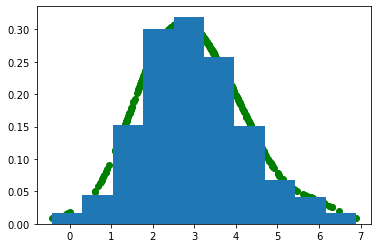

 mean loglikelihood of p_g  -1.63965487
Gradient cte 0.0027270636558532715
 Cte Update  1.8895318564176555

 pn/(pn+pm) 2 0.7799324

 std dev y_predit 1.2652892
mean y_predit 2.9702246
pn/(pn+pm)  0.734253526
std dev y_pred 1.26528931
 model train on batch  -0.5931122303009033
############ iteration  322 ################
 p_nx  [0.27399528 0.307150185 0.304979712 ... 0.295854539 0.296459943 0.304739118]


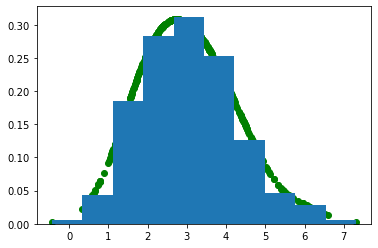

 mean loglikelihood of p_g  -1.6042434
Gradient cte 0.0003136303424835205
 Cte Update  1.889845486760139

 pn/(pn+pm) 2 0.78183615

 std dev y_predit 1.2208415
mean y_predit 3.026773
pn/(pn+pm)  0.735834241
std dev y_pred 1.22084153
 model train on batch  -0.5845964550971985
############ iteration  323 ################
 p_nx  [0.293239623 0.295615375 0.301371276 ... 0.284989774 0.303338379 0.304311484]


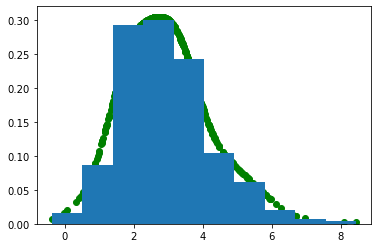

 mean loglikelihood of p_g  -1.65194297
Gradient cte -0.004564889907836914
 Cte Update  1.885280596852302

 pn/(pn+pm) 2 0.7775287

 std dev y_predit 1.3098311
mean y_predit 2.9468458
pn/(pn+pm)  0.729609251
std dev y_pred 1.30983114
 model train on batch  -0.599058985710144
############ iteration  324 ################
 p_nx  [0.30189839 0.334923387 0.301070929 ... 0.323078036 0.338745356 0.32600534]


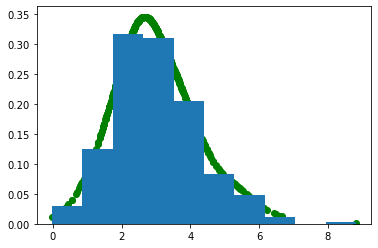

 mean loglikelihood of p_g  -1.59243345
Gradient cte -0.0009508123397827149
 Cte Update  1.8843297845125193

 pn/(pn+pm) 2 0.7717128

 std dev y_predit 1.2296807
mean y_predit 3.0022678
pn/(pn+pm)  0.719935954
std dev y_pred 1.22968066
 model train on batch  -0.6079856753349304
############ iteration  325 ################
 p_nx  [0.383334965 0.376493573 0.369419515 ... 0.363209 0.354921162 0.390176743]


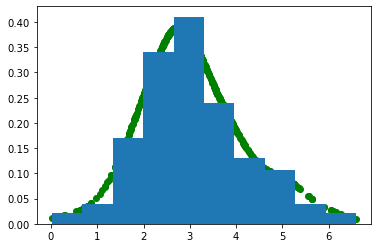

 mean loglikelihood of p_g  -1.50707316
Gradient cte -0.0011979441642761231
 Cte Update  1.883131840348243

 pn/(pn+pm) 2 0.74027264

 std dev y_predit 1.1294032
mean y_predit 3.0631826
pn/(pn+pm)  0.680621684
std dev y_pred 1.12940323
 model train on batch  -0.6801502704620361
############ iteration  326 ################
 p_nx  [0.307695478 0.315961808 0.321840435 ... 0.31938383 0.293950677 0.313410163]


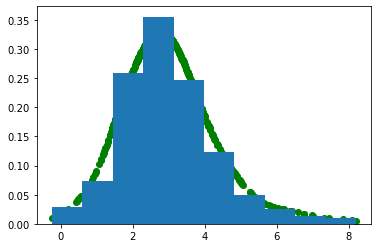

 mean loglikelihood of p_g  -1.64939082
Gradient cte -0.0015567240715026855
 Cte Update  1.8815751162767405

 pn/(pn+pm) 2 0.7655736

 std dev y_predit 1.3219807
mean y_predit 2.9978144
pn/(pn+pm)  0.714778841
std dev y_pred 1.32198071
 model train on batch  -0.6285496354103088
############ iteration  327 ################
 p_nx  [0.327344984 0.348095536 0.325318336 ... 0.311091453 0.352308452 0.359473199]


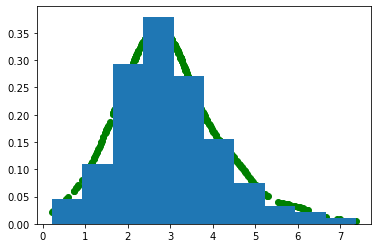

 mean loglikelihood of p_g  -1.57658184
Gradient cte -0.003954381942749024
 Cte Update  1.8776207343339915

 pn/(pn+pm) 2 0.752432

 std dev y_predit 1.2115259
mean y_predit 2.954716
pn/(pn+pm)  0.69747293
std dev y_pred 1.21152592
 model train on batch  -0.6551729440689087
############ iteration  328 ################
 p_nx  [0.34607476 0.346580088 0.343994498 ... 0.343825579 0.346055776 0.343656272]


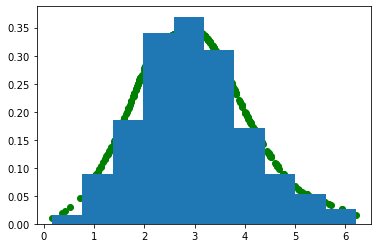

 mean loglikelihood of p_g  -1.50209248
Gradient cte -0.00152620267868042
 Cte Update  1.876094531655311

 pn/(pn+pm) 2 0.760975

 std dev y_predit 1.1015255
mean y_predit 2.9585571
pn/(pn+pm)  0.709304512
std dev y_pred 1.10152566
 model train on batch  -0.6402120590209961
############ iteration  329 ################
 p_nx  [0.333337784 0.319934845 0.30510509 ... 0.307533115 0.355192065 0.303331]


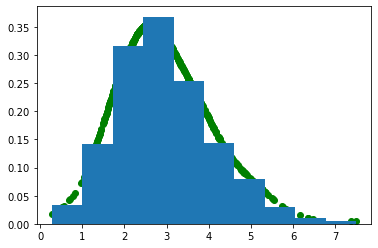

 mean loglikelihood of p_g  -1.53312945
Gradient cte 0.001968536853790283
 Cte Update  1.8780630685091013

 pn/(pn+pm) 2 0.77185655

 std dev y_predit 1.1544337
mean y_predit 2.9595528
pn/(pn+pm)  0.720737
std dev y_pred 1.15443385
 model train on batch  -0.6087510585784912
############ iteration  330 ################
 p_nx  [0.328599513 0.331543326 0.295241922 ... 0.285555243 0.322712839 0.334105909]


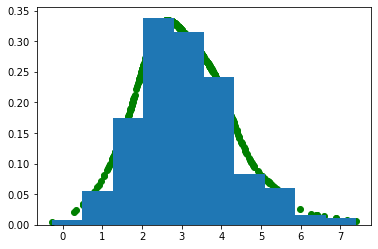

 mean loglikelihood of p_g  -1.58959246
Gradient cte 0.002913557767868042
 Cte Update  1.8809766262769694

 pn/(pn+pm) 2 0.7818465

 std dev y_predit 1.2125573
mean y_predit 3.068334
pn/(pn+pm)  0.732638836
std dev y_pred 1.21255732
 model train on batch  -0.5853521227836609
############ iteration  331 ################
 p_nx  [0.352541715 0.349819392 0.327703863 ... 0.350547433 0.315744936 0.352309972]


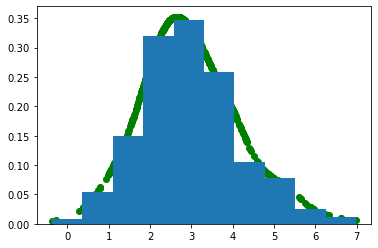

 mean loglikelihood of p_g  -1.56453276
Gradient cte -0.0036414623260498046
 Cte Update  1.8773351639509195

 pn/(pn+pm) 2 0.76390225

 std dev y_predit 1.1785233
mean y_predit 2.962738
pn/(pn+pm)  0.710404396
std dev y_pred 1.1785233
 model train on batch  -0.6233267188072205
############ iteration  332 ################
 p_nx  [0.324299097 0.307662904 0.321468353 ... 0.324259818 0.324347496 0.322663128]


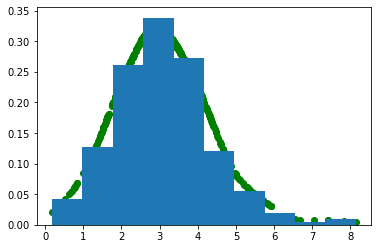

 mean loglikelihood of p_g  -1.61798024
Gradient cte -0.001338498592376709
 Cte Update  1.8759966653585427

 pn/(pn+pm) 2 0.76524633

 std dev y_predit 1.2507768
mean y_predit 3.0817206
pn/(pn+pm)  0.715056479
std dev y_pred 1.25077665
 model train on batch  -0.6323026418685913
############ iteration  333 ################
 p_nx  [0.36059615 0.350923061 0.359408081 ... 0.347426772 0.348162264 0.340474516]


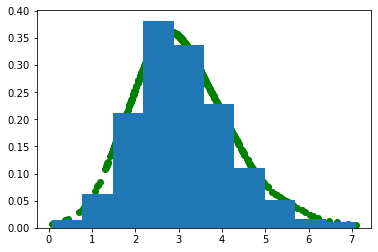

 mean loglikelihood of p_g  -1.51538992
Gradient cte 0.0044985017776489255
 Cte Update  1.8804951671361916

 pn/(pn+pm) 2 0.7530604

 std dev y_predit 1.1250318
mean y_predit 3.0818648
pn/(pn+pm)  0.697898507
std dev y_pred 1.12503183
 model train on batch  -0.6504716873168945
############ iteration  334 ################
 p_nx  [0.312101811 0.333547026 0.331422269 ... 0.314108551 0.299043655 0.308007419]


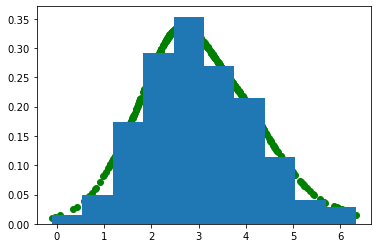

 mean loglikelihood of p_g  -1.56743217
Gradient cte 0.0006168451309204101
 Cte Update  1.8811120122671119

 pn/(pn+pm) 2 0.77558047

 std dev y_predit 1.1697222
mean y_predit 2.9967144
pn/(pn+pm)  0.725397408
std dev y_pred 1.1697222
 model train on batch  -0.6017943024635315
############ iteration  335 ################
 p_nx  [0.336601913 0.292224854 0.333048135 ... 0.320915431 0.33571741 0.312510431]


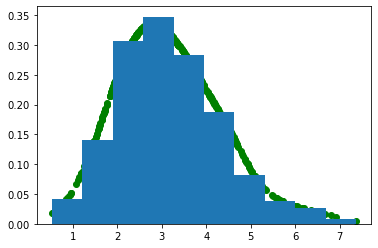

 mean loglikelihood of p_g  -1.54692245
Gradient cte 0.0025271499156951905
 Cte Update  1.883639162182807

 pn/(pn+pm) 2 0.7698231

 std dev y_predit 1.1703135
mean y_predit 3.1692903
pn/(pn+pm)  0.721213162
std dev y_pred 1.17031348
 model train on batch  -0.6191913485527039
############ iteration  336 ################
 p_nx  [0.331300437 0.332735121 0.322369099 ... 0.324878097 0.33427912 0.332422554]


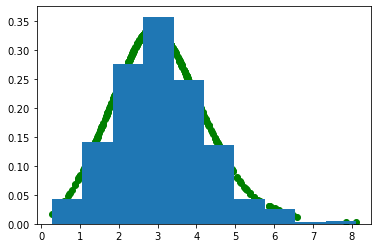

 mean loglikelihood of p_g  -1.57586884
Gradient cte -0.008112878799438476
 Cte Update  1.8755262833833686

 pn/(pn+pm) 2 0.7609287

 std dev y_predit 1.1967909
mean y_predit 3.0711432
pn/(pn+pm)  0.708851278
std dev y_pred 1.19679093
 model train on batch  -0.6360417008399963
############ iteration  337 ################
 p_nx  [0.312188447 0.319048494 0.318119854 ... 0.319033891 0.318217546 0.309336662]


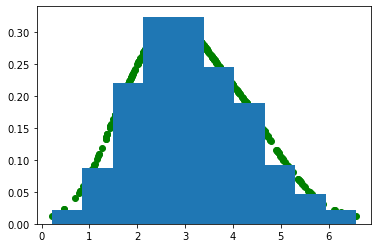

 mean loglikelihood of p_g  -1.5745399
Gradient cte 0.005027647018432617
 Cte Update  1.8805539304018013

 pn/(pn+pm) 2 0.77783084

 std dev y_predit 1.1845832
mean y_predit 3.1056917
pn/(pn+pm)  0.728143096
std dev y_pred 1.18458319
 model train on batch  -0.5941920280456543
############ iteration  338 ################
 p_nx  [0.3422755 0.339526087 0.363111675 ... 0.36250791 0.349436462 0.361385554]


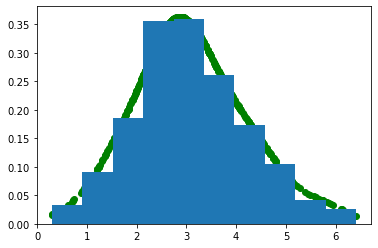

 mean loglikelihood of p_g  -1.52563751
Gradient cte -0.005500149726867676
 Cte Update  1.8750537806749337

 pn/(pn+pm) 2 0.74611247

 std dev y_predit 1.1270671
mean y_predit 3.0853562
pn/(pn+pm)  0.688316047
std dev y_pred 1.12706697
 model train on batch  -0.6691636443138123
############ iteration  339 ################
 p_nx  [0.370866239 0.39627561 0.382097125 ... 0.393690974 0.396573693 0.396510363]


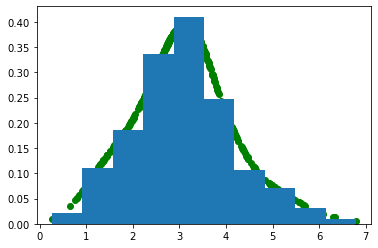

 mean loglikelihood of p_g  -1.48162
Gradient cte -0.011494879722595214
 Cte Update  1.8635589009523386

 pn/(pn+pm) 2 0.72938895

 std dev y_predit 1.0848346
mean y_predit 3.0859149
pn/(pn+pm)  0.665134549
std dev y_pred 1.08483458
 model train on batch  -0.7039337754249573
############ iteration  340 ################
 p_nx  [0.319071174 0.308466882 0.312477052 ... 0.31616345 0.297149867 0.293102503]


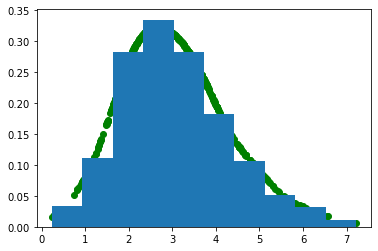

 mean loglikelihood of p_g  -1.59692478
Gradient cte 0.0018517704010009765
 Cte Update  1.8654106713533396

 pn/(pn+pm) 2 0.7783392

 std dev y_predit 1.225834
mean y_predit 3.0528994
pn/(pn+pm)  0.728677392
std dev y_pred 1.22583401
 model train on batch  -0.5968078374862671
############ iteration  341 ################
 p_nx  [0.323572159 0.32475853 0.333460331 ... 0.335461706 0.338137418 0.327841401]


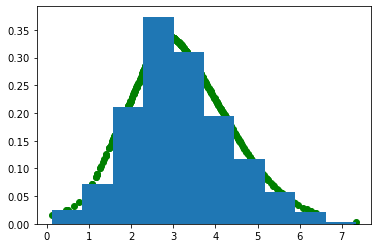

 mean loglikelihood of p_g  -1.58524966
Gradient cte -0.0042638759613037105
 Cte Update  1.861146795392036

 pn/(pn+pm) 2 0.76105666

 std dev y_predit 1.1927286
mean y_predit 3.156981
pn/(pn+pm)  0.70622921
std dev y_pred 1.19272876
 model train on batch  -0.6353980898857117
############ iteration  342 ################
 p_nx  [0.289344817 0.325182796 0.296112537 ... 0.3078233 0.311687469 0.292944878]


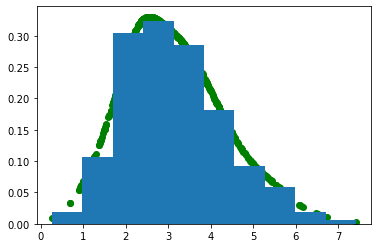

 mean loglikelihood of p_g  -1.56751692
Gradient cte 0.014085192680358887
 Cte Update  1.8752319880723949

 pn/(pn+pm) 2 0.78864574

 std dev y_predit 1.1933751
mean y_predit 3.1313727
pn/(pn+pm)  0.740969718
std dev y_pred 1.19337523
 model train on batch  -0.5702115893363953
############ iteration  343 ################
 p_nx  [0.3477211 0.348287314 0.345353216 ... 0.348372668 0.331114233 0.34363398]


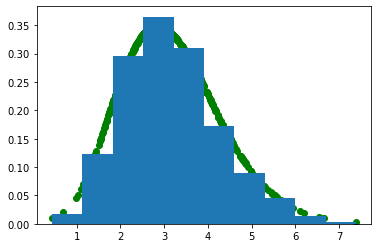

 mean loglikelihood of p_g  -1.5028578
Gradient cte 0.006077292442321777
 Cte Update  1.8813092805147167

 pn/(pn+pm) 2 0.7613863

 std dev y_predit 1.111564
mean y_predit 3.156932
pn/(pn+pm)  0.705849171
std dev y_pred 1.11156404
 model train on batch  -0.6300144791603088
############ iteration  344 ################
 p_nx  [0.341063559 0.337787569 0.338134199 ... 0.33111012 0.341209292 0.341458172]


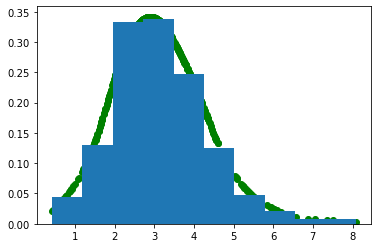

 mean loglikelihood of p_g  -1.55690694
Gradient cte -0.0001914663314819336
 Cte Update  1.8811178141832348

 pn/(pn+pm) 2 0.7579895

 std dev y_predit 1.1804355
mean y_predit 3.134344
pn/(pn+pm)  0.706055701
std dev y_pred 1.18043554
 model train on batch  -0.6415935158729553
############ iteration  345 ################
 p_nx  [0.352059573 0.296570659 0.353458583 ... 0.33442086 0.336664677 0.3268736]


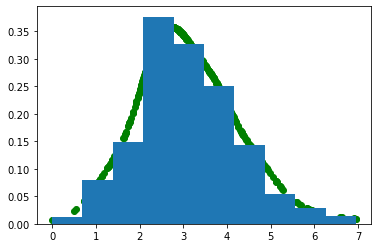

 mean loglikelihood of p_g  -1.53811991
Gradient cte 0.002244534969329834
 Cte Update  1.8833623491525646

 pn/(pn+pm) 2 0.764142

 std dev y_predit 1.1483936
mean y_predit 3.09138
pn/(pn+pm)  0.710911
std dev y_pred 1.14839351
 model train on batch  -0.624082088470459
############ iteration  346 ################
 p_nx  [0.350176036 0.355010688 0.370786667 ... 0.367064834 0.371602654 0.369970918]


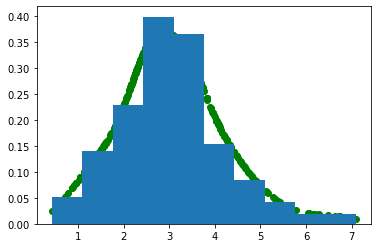

 mean loglikelihood of p_g  -1.52314961
Gradient cte -0.004149598121643066
 Cte Update  1.8792127510309216

 pn/(pn+pm) 2 0.7462163

 std dev y_predit 1.1447042
mean y_predit 3.051512
pn/(pn+pm)  0.684513032
std dev y_pred 1.14470422
 model train on batch  -0.6594901084899902
############ iteration  347 ################
 p_nx  [0.344435036 0.353852 0.355488896 ... 0.350485921 0.355946213 0.354134232]


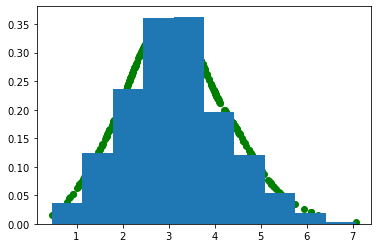

 mean loglikelihood of p_g  -1.50472224
Gradient cte -8.691835403442383e-05
 Cte Update  1.8791258326768872

 pn/(pn+pm) 2 0.75543135

 std dev y_predit 1.0987834
mean y_predit 3.159836
pn/(pn+pm)  0.697084308
std dev y_pred 1.09878337
 model train on batch  -0.6422224044799805
############ iteration  348 ################
 p_nx  [0.315358669 0.320379078 0.314875305 ... 0.309526563 0.306649983 0.315794319]


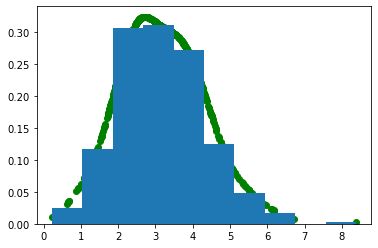

 mean loglikelihood of p_g  -1.54874945
Gradient cte 0.006169048309326172
 Cte Update  1.8852948809862133

 pn/(pn+pm) 2 0.7795657

 std dev y_predit 1.1570016
mean y_predit 3.1796181
pn/(pn+pm)  0.724891067
std dev y_pred 1.15700161
 model train on batch  -0.5763952732086182
############ iteration  349 ################
 p_nx  [0.339078575 0.324772149 0.306370825 ... 0.346540928 0.334403 0.335937291]


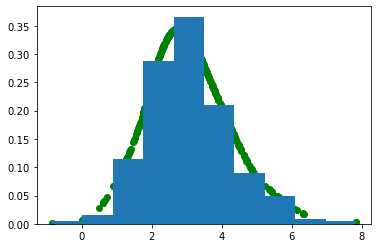

 mean loglikelihood of p_g  -1.57458687
Gradient cte -0.0009071884155273437
 Cte Update  1.884387692570686

 pn/(pn+pm) 2 0.7578619

 std dev y_predit 1.1983396
mean y_predit 3.0589375
pn/(pn+pm)  0.706599593
std dev y_pred 1.19833958
 model train on batch  -0.6444677114486694
############ iteration  350 ################
 p_nx  [0.337856025 0.344625294 0.341527849 ... 0.345031738 0.323415756 0.344653219]


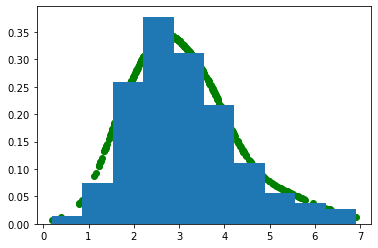

 mean loglikelihood of p_g  -1.54522645
Gradient cte 0.0002639802694320679
 Cte Update  1.884651672840118

 pn/(pn+pm) 2 0.76600087

 std dev y_predit 1.187274
mean y_predit 3.0930743
pn/(pn+pm)  0.711720824
std dev y_pred 1.18727398
 model train on batch  -0.6155161261558533
############ iteration  351 ################
 p_nx  [0.340591758 0.377938628 0.381698132 ... 0.381739259 0.37837249 0.380727977]


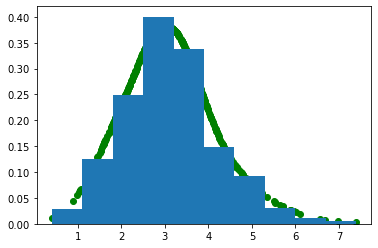

 mean loglikelihood of p_g  -1.48052549
Gradient cte -0.00022748708724975585
 Cte Update  1.884424185752868

 pn/(pn+pm) 2 0.73790264

 std dev y_predit 1.0881907
mean y_predit 3.1082482
pn/(pn+pm)  0.675637841
std dev y_pred 1.08819067
 model train on batch  -0.6822299361228943
############ iteration  352 ################
 p_nx  [0.333771527 0.348118275 0.357429147 ... 0.349825889 0.347640872 0.328219771]


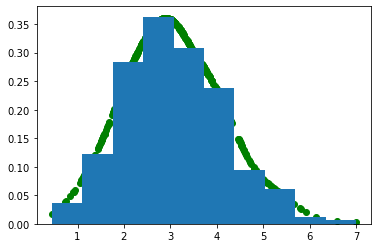

 mean loglikelihood of p_g  -1.48843181
Gradient cte -0.00037438440322875975
 Cte Update  1.8840498013496394

 pn/(pn+pm) 2 0.7504899

 std dev y_predit 1.0821328
mean y_predit 3.0723615
pn/(pn+pm)  0.698385417
std dev y_pred 1.08213282
 model train on batch  -0.6644061207771301
############ iteration  353 ################
 p_nx  [0.338436484 0.340215981 0.33866781 ... 0.340448856 0.338556558 0.308977842]


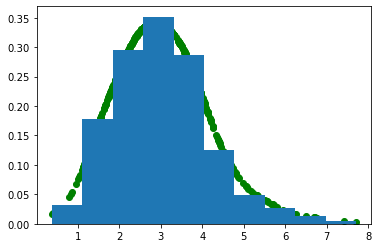

 mean loglikelihood of p_g  -1.53173888
Gradient cte 0.005656178951263428
 Cte Update  1.8897059803009029

 pn/(pn+pm) 2 0.76698476

 std dev y_predit 1.1546348
mean y_predit 3.032467
pn/(pn+pm)  0.714699
std dev y_pred 1.15463495
 model train on batch  -0.6202027797698975
############ iteration  354 ################
 p_nx  [0.346478 0.33127296 0.340247452 ... 0.345974267 0.345967501 0.309882909]


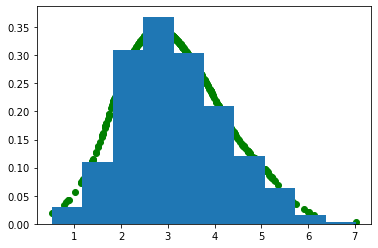

 mean loglikelihood of p_g  -1.49919856
Gradient cte 0.002574883460998535
 Cte Update  1.8922808637619013

 pn/(pn+pm) 2 0.76237315

 std dev y_predit 1.0993973
mean y_predit 3.1224394
pn/(pn+pm)  0.708779693
std dev y_pred 1.09939742
 model train on batch  -0.6279173493385315
############ iteration  355 ################
 p_nx  [0.32285428 0.33762154 0.337063849 ... 0.334583402 0.316645205 0.33770591]


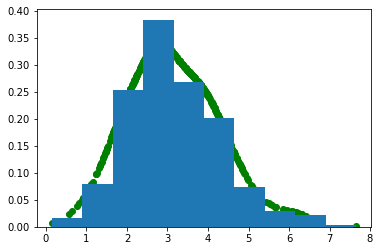

 mean loglikelihood of p_g  -1.54510331
Gradient cte -0.0009942972660064698
 Cte Update  1.8912865664958949

 pn/(pn+pm) 2 0.76714444

 std dev y_predit 1.1569796
mean y_predit 3.147397
pn/(pn+pm)  0.716719091
std dev y_pred 1.15697956
 model train on batch  -0.6249737739562988
############ iteration  356 ################
 p_nx  [0.336402297 0.340752572 0.343305618 ... 0.334639072 0.320263445 0.323261738]


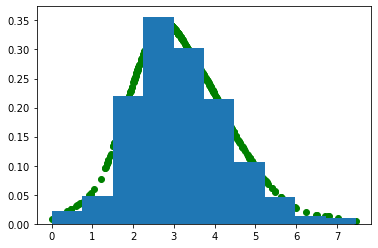

 mean loglikelihood of p_g  -1.5682869
Gradient cte -0.002097816467285156
 Cte Update  1.8891887500286098

 pn/(pn+pm) 2 0.7618848

 std dev y_predit 1.1867309
mean y_predit 3.1610634
pn/(pn+pm)  0.707934499
std dev y_pred 1.18673074
 model train on batch  -0.6313965916633606
############ iteration  357 ################
 p_nx  [0.315297782 0.323707819 0.322684228 ... 0.329630733 0.324242175 0.330209345]


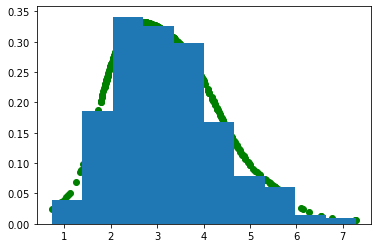

 mean loglikelihood of p_g  -1.51907682
Gradient cte 0.007495513439178467
 Cte Update  1.8966842634677883

 pn/(pn+pm) 2 0.7756337

 std dev y_predit 1.1425248
mean y_predit 3.217573
pn/(pn+pm)  0.726067424
std dev y_pred 1.14252484
 model train on batch  -0.5968057513237
############ iteration  358 ################
 p_nx  [0.348628759 0.356035471 0.327507824 ... 0.355723768 0.35601598 0.356087118]


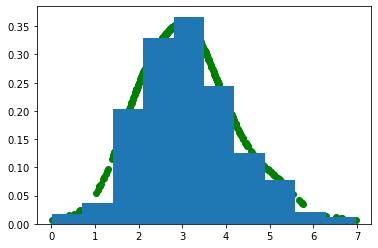

 mean loglikelihood of p_g  -1.51885927
Gradient cte 0.0001590137481689453
 Cte Update  1.8968432772159571

 pn/(pn+pm) 2 0.74909973

 std dev y_predit 1.1254921
mean y_predit 3.1192527
pn/(pn+pm)  0.694225371
std dev y_pred 1.1254921
 model train on batch  -0.660163164138794
############ iteration  359 ################
 p_nx  [0.361731917 0.377621055 0.378665626 ... 0.377111286 0.378602773 0.370697588]


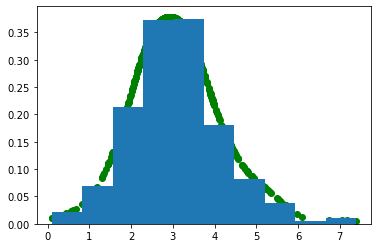

 mean loglikelihood of p_g  -1.48150766
Gradient cte -0.006268692493438721
 Cte Update  1.8905745847225184

 pn/(pn+pm) 2 0.74508435

 std dev y_predit 1.0940588
mean y_predit 3.0986133
pn/(pn+pm)  0.683519483
std dev y_pred 1.09405875
 model train on batch  -0.6628731489181519
############ iteration  360 ################
 p_nx  [0.390690029 0.390875816 0.353440046 ... 0.376776963 0.388608724 0.389731973]


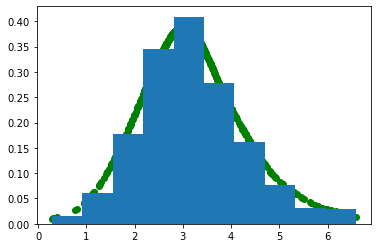

 mean loglikelihood of p_g  -1.48215699
Gradient cte -0.0035581722259521486
 Cte Update  1.8870164124965663

 pn/(pn+pm) 2 0.7302646

 std dev y_predit 1.0854417
mean y_predit 3.1804488
pn/(pn+pm)  0.671137571
std dev y_pred 1.08544171
 model train on batch  -0.7070392370223999
############ iteration  361 ################
 p_nx  [0.336536437 0.35181725 0.357232332 ... 0.34786588 0.358056903 0.357639194]


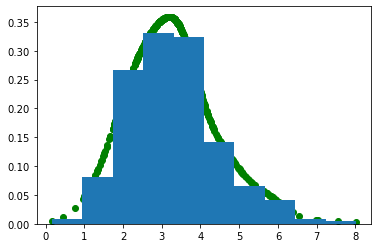

 mean loglikelihood of p_g  -1.53993797
Gradient cte -0.003148033142089844
 Cte Update  1.8838683793544764

 pn/(pn+pm) 2 0.759041

 std dev y_predit 1.1661991
mean y_predit 3.2557476
pn/(pn+pm)  0.700336099
std dev y_pred 1.16619897
 model train on batch  -0.6328374743461609
############ iteration  362 ################
 p_nx  [0.355636597 0.350118458 0.363624722 ... 0.363105953 0.352619231 0.344344378]


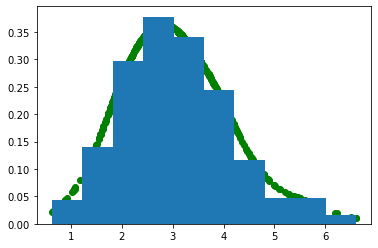

 mean loglikelihood of p_g  -1.47346616
Gradient cte 0.0025112762451171876
 Cte Update  1.8863796555995935

 pn/(pn+pm) 2 0.7537828

 std dev y_predit 1.0835596
mean y_predit 3.0767164
pn/(pn+pm)  0.698653877
std dev y_pred 1.08355963
 model train on batch  -0.6500565409660339
############ iteration  363 ################
 p_nx  [0.366778076 0.365765095 0.366490126 ... 0.3584705 0.36719805 0.34349227]


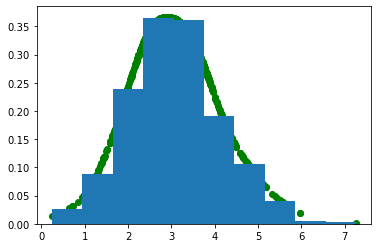

 mean loglikelihood of p_g  -1.46807647
Gradient cte 0.003386935472488403
 Cte Update  1.889766591072082

 pn/(pn+pm) 2 0.75236905

 std dev y_predit 1.060662
mean y_predit 3.0782852
pn/(pn+pm)  0.694154918
std dev y_pred 1.06066215
 model train on batch  -0.646994411945343
############ iteration  364 ################
 p_nx  [0.377210021 0.378565431 0.378756434 ... 0.378703356 0.378323585 0.358850151]


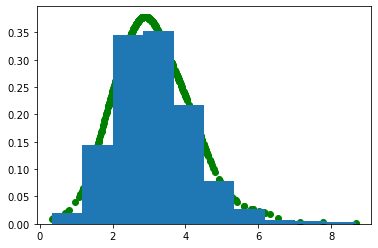

 mean loglikelihood of p_g  -1.47470605
Gradient cte -0.006389904975891114
 Cte Update  1.883376686096191

 pn/(pn+pm) 2 0.74031276

 std dev y_predit 1.1023929
mean y_predit 3.1503935
pn/(pn+pm)  0.680270135
std dev y_pred 1.10239291
 model train on batch  -0.6798179149627686
############ iteration  365 ################
 p_nx  [0.3814767 0.374379158 0.383036762 ... 0.384476721 0.376824766 0.385655522]


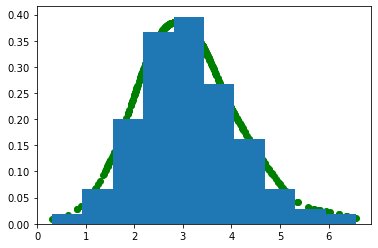

 mean loglikelihood of p_g  -1.43901896
Gradient cte 0.00038213777542114256
 Cte Update  1.883758823871612

 pn/(pn+pm) 2 0.74188197

 std dev y_predit 1.0404016
mean y_predit 3.107978
pn/(pn+pm)  0.679163575
std dev y_pred 1.04040158
 model train on batch  -0.6687133312225342
############ iteration  366 ################
 p_nx  [0.371897608 0.369845331 0.355073869 ... 0.36984092 0.371248603 0.358431]


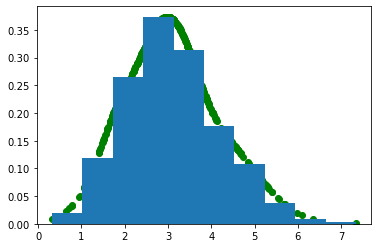

 mean loglikelihood of p_g  -1.48150301
Gradient cte -0.0004465868473052979
 Cte Update  1.8833122370243067

 pn/(pn+pm) 2 0.7392182

 std dev y_predit 1.0836592
mean y_predit 3.095983
pn/(pn+pm)  0.681435943
std dev y_pred 1.08365917
 model train on batch  -0.6857016086578369
############ iteration  367 ################
 p_nx  [0.387126327 0.38771233 0.387352347 ... 0.382467896 0.383194983 0.360978603]


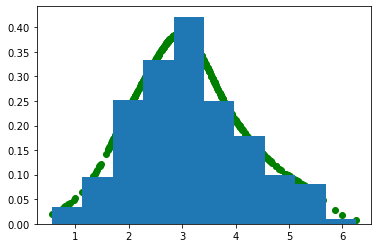

 mean loglikelihood of p_g  -1.45853508
Gradient cte -7.190322875976563e-05
 Cte Update  1.883240333795547

 pn/(pn+pm) 2 0.7321787

 std dev y_predit 1.0593638
mean y_predit 3.1292956
pn/(pn+pm)  0.674228251
std dev y_pred 1.05936384
 model train on batch  -0.7056771516799927
############ iteration  368 ################
 p_nx  [0.388397902 0.324644744 0.377905667 ... 0.360824049 0.383248866 0.260845929]


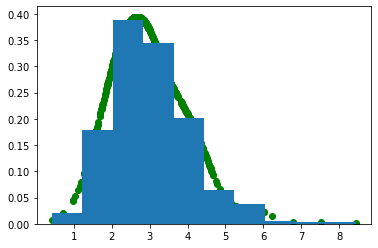

 mean loglikelihood of p_g  -1.41799176
Gradient cte 0.004089303016662597
 Cte Update  1.8873296368122097

 pn/(pn+pm) 2 0.7501159

 std dev y_predit 1.0610788
mean y_predit 3.0103662
pn/(pn+pm)  0.693006098
std dev y_pred 1.06107879
 model train on batch  -0.6582104563713074
############ iteration  369 ################
 p_nx  [0.356943071 0.353988886 0.35643366 ... 0.357094735 0.347820431 0.355712891]


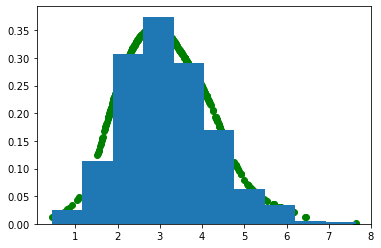

 mean loglikelihood of p_g  -1.4705404
Gradient cte 0.00013929510116577148
 Cte Update  1.8874689319133755

 pn/(pn+pm) 2 0.7547584

 std dev y_predit 1.0761719
mean y_predit 3.1656005
pn/(pn+pm)  0.701241
std dev y_pred 1.07617199
 model train on batch  -0.6495262384414673
############ iteration  370 ################
 p_nx  [0.37150681 0.372196019 0.368189186 ... 0.371678859 0.360721 0.372174]


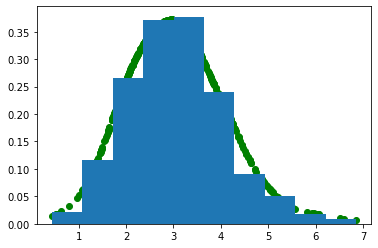

 mean loglikelihood of p_g  -1.44776821
Gradient cte 0.0012625434398651123
 Cte Update  1.8887314753532407

 pn/(pn+pm) 2 0.7464194

 std dev y_predit 1.0462983
mean y_predit 3.0542386
pn/(pn+pm)  0.687822
std dev y_pred 1.04629815
 model train on batch  -0.6633572578430176
############ iteration  371 ################
 p_nx  [0.362310559 0.364290118 0.359553933 ... 0.357512325 0.338763595 0.347310334]


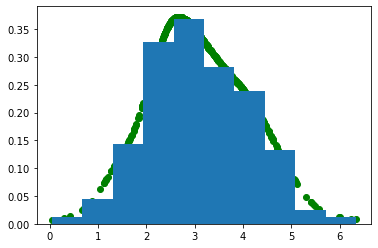

 mean loglikelihood of p_g  -1.45498323
Gradient cte -0.00043218994140625
 Cte Update  1.8882992854118346

 pn/(pn+pm) 2 0.7633047

 std dev y_predit 1.0467725
mean y_predit 3.089464
pn/(pn+pm)  0.707466066
std dev y_pred 1.0467726
 model train on batch  -0.6217203736305237
############ iteration  372 ################
 p_nx  [0.344249159 0.362019241 0.354507804 ... 0.356774092 0.365504444 0.352702469]


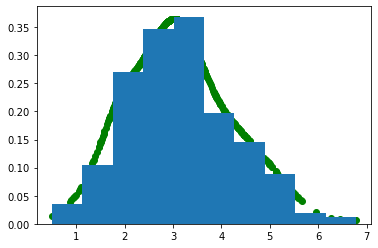

 mean loglikelihood of p_g  -1.4953984
Gradient cte -0.004121238231658935
 Cte Update  1.8841780471801757

 pn/(pn+pm) 2 0.7404401

 std dev y_predit 1.1018343
mean y_predit 3.1393101
pn/(pn+pm)  0.684853554
std dev y_pred 1.1018343
 model train on batch  -0.6877639889717102
############ iteration  373 ################
 p_nx  [0.344878256 0.358978152 0.359745502 ... 0.341919094 0.347320765 0.361216038]


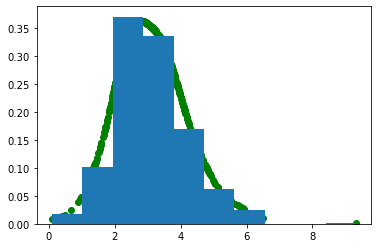

 mean loglikelihood of p_g  -1.48286378
Gradient cte 0.0027103314399719238
 Cte Update  1.8868883786201476

 pn/(pn+pm) 2 0.7585934

 std dev y_predit 1.1038667
mean y_predit 3.104561
pn/(pn+pm)  0.699023366
std dev y_pred 1.1038667
 model train on batch  -0.6272415518760681
############ iteration  374 ################
 p_nx  [0.38351652 0.380801529 0.387811244 ... 0.342822701 0.393510252 0.400286943]


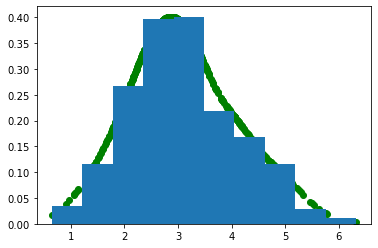

 mean loglikelihood of p_g  -1.40758669
Gradient cte -0.004233023166656494
 Cte Update  1.882655355453491

 pn/(pn+pm) 2 0.731303

 std dev y_predit 1.0033494
mean y_predit 3.0872257
pn/(pn+pm)  0.666856766
std dev y_pred 1.00334942
 model train on batch  -0.6960606575012207
############ iteration  375 ################
 p_nx  [0.370501071 0.340690523 0.36930871 ... 0.380526155 0.332637727 0.385718763]


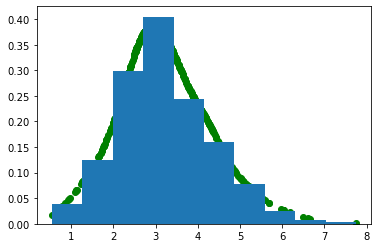

 mean loglikelihood of p_g  -1.49377251
Gradient cte -0.006500415802001953
 Cte Update  1.8761549396514892

 pn/(pn+pm) 2 0.7322162

 std dev y_predit 1.102906
mean y_predit 3.2139316
pn/(pn+pm)  0.668499291
std dev y_pred 1.10290599
 model train on batch  -0.6971946954727173
############ iteration  376 ################
 p_nx  [0.40207693 0.400528103 0.406042457 ... 0.411252499 0.365594029 0.401855558]


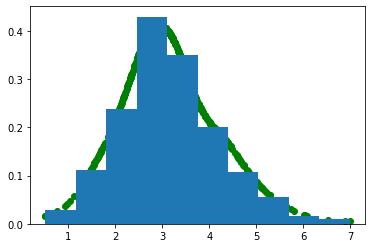

 mean loglikelihood of p_g  -1.44813132
Gradient cte -0.0035401535034179686
 Cte Update  1.872614786148071

 pn/(pn+pm) 2 0.71915174

 std dev y_predit 1.0534333
mean y_predit 3.1492393
pn/(pn+pm)  0.65358144
std dev y_pred 1.05343318
 model train on batch  -0.7290482521057129
############ iteration  377 ################
 p_nx  [0.267518818 0.372694343 0.385673523 ... 0.387710661 0.384202361 0.379696041]


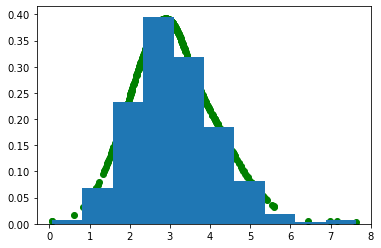

 mean loglikelihood of p_g  -1.45900941
Gradient cte -0.002492246150970459
 Cte Update  1.8701225399971007

 pn/(pn+pm) 2 0.7328391

 std dev y_predit 1.066881
mean y_predit 3.0959272
pn/(pn+pm)  0.674120307
std dev y_pred 1.06688106
 model train on batch  -0.7029407024383545
############ iteration  378 ################
 p_nx  [0.356011033 0.352377 0.371936619 ... 0.369894 0.371208966 0.37378943]


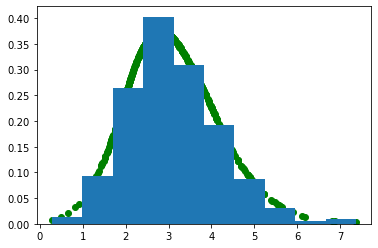

 mean loglikelihood of p_g  -1.46259928
Gradient cte 0.0010920801162719726
 Cte Update  1.8712146201133726

 pn/(pn+pm) 2 0.75136036

 std dev y_predit 1.0660994
mean y_predit 3.0991745
pn/(pn+pm)  0.694736063
std dev y_pred 1.06609929
 model train on batch  -0.658281147480011
############ iteration  379 ################
 p_nx  [0.375931889 0.356403589 0.365371823 ... 0.388075233 0.350998878 0.36179316]


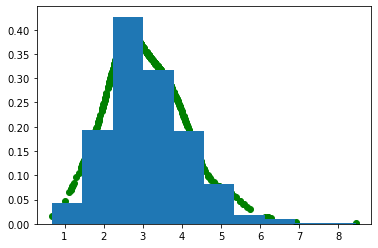

 mean loglikelihood of p_g  -1.43350625
Gradient cte 0.007253838539123535
 Cte Update  1.878468458652496

 pn/(pn+pm) 2 0.75659144

 std dev y_predit 1.0571485
mean y_predit 3.1039486
pn/(pn+pm)  0.695906699
std dev y_pred 1.05714846
 model train on batch  -0.6300086379051208
############ iteration  380 ################
 p_nx  [0.382422835 0.395732343 0.339398682 ... 0.343958259 0.406535506 0.389119387]


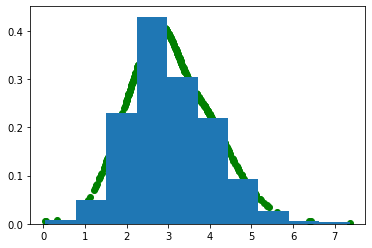

 mean loglikelihood of p_g  -1.40012705
Gradient cte 0.001257500410079956
 Cte Update  1.879725959062576

 pn/(pn+pm) 2 0.7327993

 std dev y_predit 1.0039845
mean y_predit 3.057143
pn/(pn+pm)  0.670220613
std dev y_pred 1.00398445
 model train on batch  -0.6936960220336914
############ iteration  381 ################
 p_nx  [0.328906 0.347076714 0.348285645 ... 0.360321 0.351644337 0.344432086]


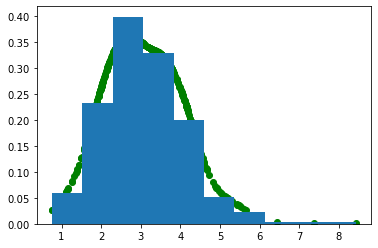

 mean loglikelihood of p_g  -1.41440773
Gradient cte 0.007371284961700439
 Cte Update  1.8870972440242764

 pn/(pn+pm) 2 0.7663957

 std dev y_predit 1.0294557
mean y_predit 3.0858867
pn/(pn+pm)  0.70834738
std dev y_pred 1.02945566
 model train on batch  -0.6085337996482849
############ iteration  382 ################
 p_nx  [0.367451847 0.38427785 0.357699573 ... 0.378007323 0.299026251 0.370706946]


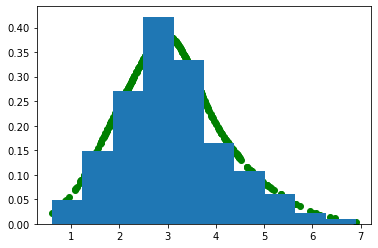

 mean loglikelihood of p_g  -1.48106205
Gradient cte -0.0003761658668518066
 Cte Update  1.8867210781574246

 pn/(pn+pm) 2 0.73474497

 std dev y_predit 1.0866523
mean y_predit 3.0942457
pn/(pn+pm)  0.674592853
std dev y_pred 1.08665228
 model train on batch  -0.6961978673934937
############ iteration  383 ################
 p_nx  [0.35197413 0.351380348 0.34838447 ... 0.351963222 0.350031316 0.350346059]


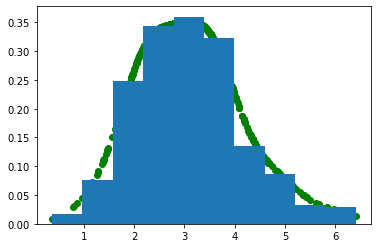

 mean loglikelihood of p_g  -1.45289052
Gradient cte 0.006681886672973633
 Cte Update  1.8934029648303983

 pn/(pn+pm) 2 0.76413256

 std dev y_predit 1.0586424
mean y_predit 3.090191
pn/(pn+pm)  0.709675908
std dev y_pred 1.05864227
 model train on batch  -0.6198245286941528
############ iteration  384 ################
 p_nx  [0.388862103 0.388521612 0.389160186 ... 0.362443596 0.383117497 0.38905555]


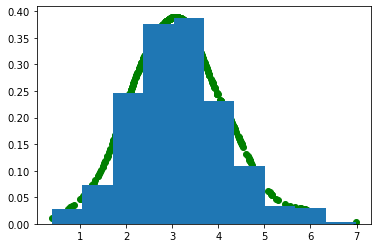

 mean loglikelihood of p_g  -1.43126655
Gradient cte -0.0018407796621322632
 Cte Update  1.891562185168266

 pn/(pn+pm) 2 0.73672146

 std dev y_predit 1.02484
mean y_predit 3.144313
pn/(pn+pm)  0.674555838
std dev y_pred 1.02483988
 model train on batch  -0.6811838150024414
############ iteration  385 ################
 p_nx  [0.378333867 0.376977324 0.377571 ... 0.368568242 0.377596378 0.376730084]


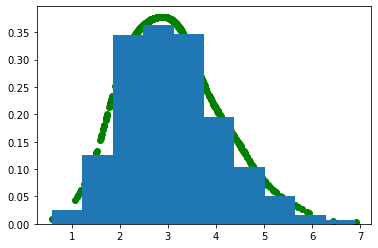

 mean loglikelihood of p_g  -1.40445518
Gradient cte -0.002915761947631836
 Cte Update  1.8886464232206341

 pn/(pn+pm) 2 0.74337363

 std dev y_predit 1.0134864
mean y_predit 3.0908313
pn/(pn+pm)  0.684046328
std dev y_pred 1.01348639
 model train on batch  -0.6661425828933716
############ iteration  386 ################
 p_nx  [0.404879719 0.39493382 0.388831317 ... 0.408358097 0.393761754 0.409458965]


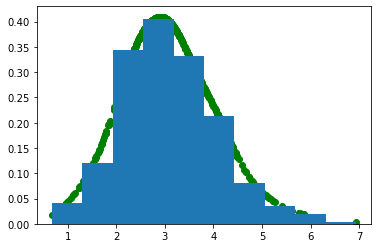

 mean loglikelihood of p_g  -1.37656426
Gradient cte -0.0012848732471466065
 Cte Update  1.8873615499734875

 pn/(pn+pm) 2 0.73176306

 std dev y_predit 0.97227705
mean y_predit 3.0774019
pn/(pn+pm)  0.668769
std dev y_pred 0.972277105
 model train on batch  -0.6974488496780396
############ iteration  387 ################
 p_nx  [0.369989961 0.362714171 0.360702097 ... 0.370103598 0.334746 0.346593648]


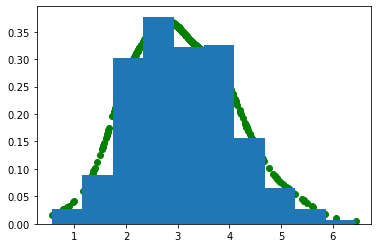

 mean loglikelihood of p_g  -1.41284406
Gradient cte -0.0048282666206359865
 Cte Update  1.8825332833528514

 pn/(pn+pm) 2 0.75649047

 std dev y_predit 1.0058247
mean y_predit 3.0810611
pn/(pn+pm)  0.701164663
std dev y_pred 1.00582469
 model train on batch  -0.6404469013214111
############ iteration  388 ################
 p_nx  [0.358003289 0.361766249 0.36163342 ... 0.34767884 0.361683458 0.355902582]


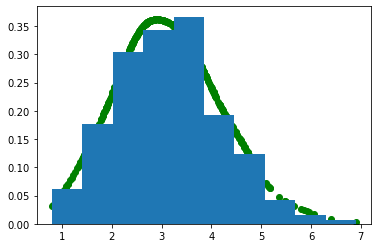

 mean loglikelihood of p_g  -1.45406425
Gradient cte 0.0022984824180603027
 Cte Update  1.8848317657709117

 pn/(pn+pm) 2 0.7520626

 std dev y_predit 1.0474722
mean y_predit 3.1392
pn/(pn+pm)  0.692163169
std dev y_pred 1.04747224
 model train on batch  -0.6428207159042358
############ iteration  389 ################
 p_nx  [0.35960263 0.401200563 0.399121851 ... 0.384599924 0.401197672 0.37855044]


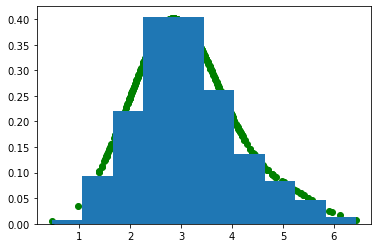

 mean loglikelihood of p_g  -1.40710413
Gradient cte -0.00031883811950683596
 Cte Update  1.884512927651405

 pn/(pn+pm) 2 0.73349977

 std dev y_predit 1.0146749
mean y_predit 3.109292
pn/(pn+pm)  0.66834408
std dev y_pred 1.0146749
 model train on batch  -0.6867545247077942
############ iteration  390 ################
 p_nx  [0.357209682 0.414792359 0.375243276 ... 0.406622738 0.419750035 0.352752417]


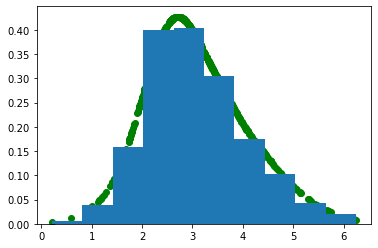

 mean loglikelihood of p_g  -1.37374854
Gradient cte 0.003766446590423584
 Cte Update  1.8882793742418287

 pn/(pn+pm) 2 0.7378867

 std dev y_predit 0.9795489
mean y_predit 3.068667
pn/(pn+pm)  0.674621463
std dev y_pred 0.979548812
 model train on batch  -0.6782661080360413
############ iteration  391 ################
 p_nx  [0.409916282 0.390751898 0.407757223 ... 0.374498576 0.414423645 0.387836039]


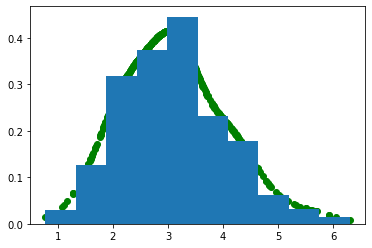

 mean loglikelihood of p_g  -1.35457921
Gradient cte -0.004417845726013184
 Cte Update  1.8838615285158156

 pn/(pn+pm) 2 0.72495073

 std dev y_predit 0.9573296
mean y_predit 3.1011548
pn/(pn+pm)  0.660798192
std dev y_pred 0.957329571
 model train on batch  -0.713585615158081
############ iteration  392 ################
 p_nx  [0.380365252 0.376522124 0.38678962 ... 0.385281086 0.387051046 0.383207589]


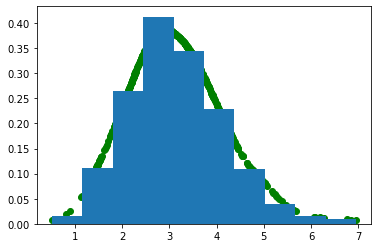

 mean loglikelihood of p_g  -1.42122
Gradient cte 0.0025068171024322508
 Cte Update  1.8863683456182478

 pn/(pn+pm) 2 0.74159926

 std dev y_predit 1.0256727
mean y_predit 3.1509595
pn/(pn+pm)  0.67944783
std dev y_pred 1.02567267
 model train on batch  -0.6725788712501526
############ iteration  393 ################
 p_nx  [0.403335452 0.398262382 0.401692897 ... 0.401780635 0.4017272 0.382649928]


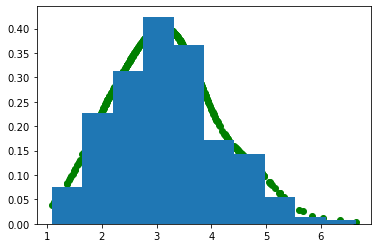

 mean loglikelihood of p_g  -1.37322223
Gradient cte -0.003962266206741333
 Cte Update  1.8824060794115065

 pn/(pn+pm) 2 0.73302066

 std dev y_predit 0.9720343
mean y_predit 3.1784918
pn/(pn+pm)  0.669115186
std dev y_pred 0.972034276
 model train on batch  -0.6908817291259766
############ iteration  394 ################
 p_nx  [0.411071539 0.364324868 0.404946715 ... 0.410213709 0.395460516 0.403498024]


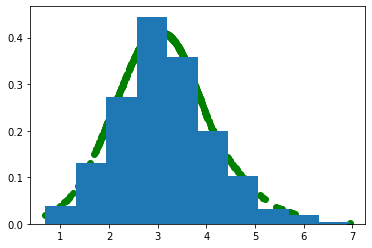

 mean loglikelihood of p_g  -1.37343907
Gradient cte -0.00028887176513671875
 Cte Update  1.8821172076463697

 pn/(pn+pm) 2 0.72769237

 std dev y_predit 0.9676974
mean y_predit 3.1265552
pn/(pn+pm)  0.659723
std dev y_pred 0.967697442
 model train on batch  -0.6968831419944763
############ iteration  395 ################
 p_nx  [0.382091463 0.381430686 0.368467212 ... 0.381756932 0.381869435 0.379186153]


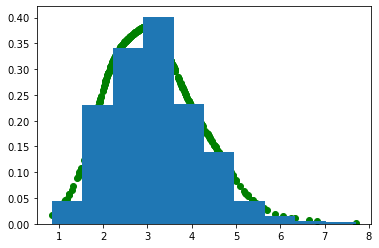

 mean loglikelihood of p_g  -1.40732825
Gradient cte -0.0003434306383132935
 Cte Update  1.8817737770080565

 pn/(pn+pm) 2 0.7424709

 std dev y_predit 1.0248624
mean y_predit 3.1650264
pn/(pn+pm)  0.684279323
std dev y_pred 1.02486253
 model train on batch  -0.676206648349762
############ iteration  396 ################
 p_nx  [0.338680893 0.3975721 0.384222507 ... 0.40103665 0.398263872 0.404533118]


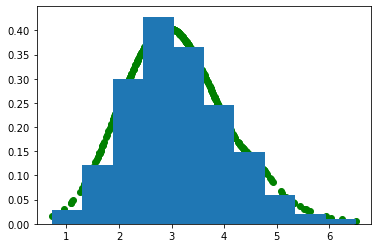

 mean loglikelihood of p_g  -1.37553811
Gradient cte 0.005010890007019043
 Cte Update  1.8867846670150756

 pn/(pn+pm) 2 0.7332627

 std dev y_predit 0.97300345
mean y_predit 3.10517
pn/(pn+pm)  0.669475257
std dev y_pred 0.973003447
 model train on batch  -0.6911947131156921
############ iteration  397 ################
 p_nx  [0.423964053 0.424312711 0.41160661 ... 0.420370162 0.423548609 0.412869781]


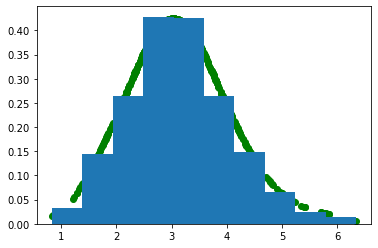

 mean loglikelihood of p_g  -1.33439267
Gradient cte -0.004573098182678223
 Cte Update  1.8822115688323975

 pn/(pn+pm) 2 0.72553676

 std dev y_predit 0.9293642
mean y_predit 3.1307418
pn/(pn+pm)  0.658727944
std dev y_pred 0.929364264
 model train on batch  -0.7090325951576233
############ iteration  398 ################
 p_nx  [0.331307858 0.389775276 0.405664861 ... 0.407431304 0.382284284 0.372530878]


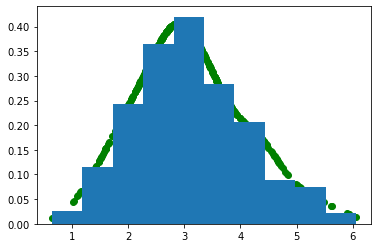

 mean loglikelihood of p_g  -1.40409648
Gradient cte -0.007423638343811035
 Cte Update  1.8747879304885864

 pn/(pn+pm) 2 0.7288816

 std dev y_predit 1.0051614
mean y_predit 3.1027021
pn/(pn+pm)  0.666630208
std dev y_pred 1.0051614
 model train on batch  -0.7104998826980591
############ iteration  399 ################
 p_nx  [0.39180249 0.399967939 0.400098234 ... 0.395918071 0.370124429 0.390201688]


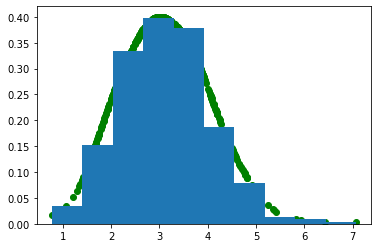

 mean loglikelihood of p_g  -1.33646035
Gradient cte 0.0009555122852325439
 Cte Update  1.8757434427738189

 pn/(pn+pm) 2 0.7390547

 std dev y_predit 0.93060845
mean y_predit 3.1165857
pn/(pn+pm)  0.676050961
std dev y_pred 0.930608451
 model train on batch  -0.679192066192627
############ iteration  400 ################
 p_nx  [0.396538526 0.412629068 0.377689123 ... 0.380751759 0.406527549 0.413452536]


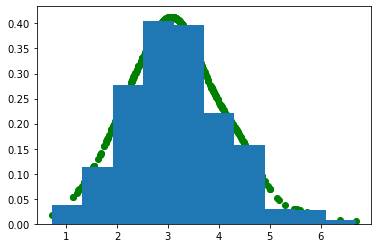

 mean loglikelihood of p_g  -1.38669169
Gradient cte -0.005846582412719727
 Cte Update  1.8698968603610993

 pn/(pn+pm) 2 0.7243735

 std dev y_predit 0.9798462
mean y_predit 3.161254
pn/(pn+pm)  0.659775853
std dev y_pred 0.979846179
 model train on batch  -0.7150372266769409
############ iteration  401 ################
 p_nx  [0.379950315 0.397173047 0.380366325 ... 0.404648483 0.369506866 0.372276962]


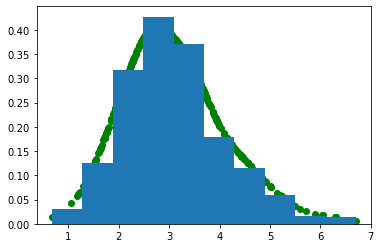

 mean loglikelihood of p_g  -1.40118778
Gradient cte 0.0009551343917846679
 Cte Update  1.8708519947528839

 pn/(pn+pm) 2 0.7405943

 std dev y_predit 1.012221
mean y_predit 3.0898316
pn/(pn+pm)  0.675648272
std dev y_pred 1.01222086
 model train on batch  -0.6737639307975769
############ iteration  402 ################
 p_nx  [0.395171344 0.376188129 0.388791651 ... 0.39000228 0.393371612 0.378733695]


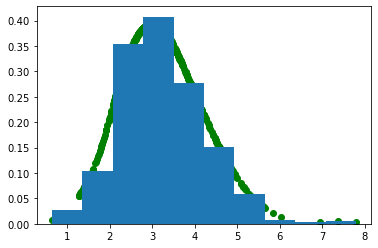

 mean loglikelihood of p_g  -1.39289653
Gradient cte 0.0008427221775054931
 Cte Update  1.8716947169303895

 pn/(pn+pm) 2 0.73641074

 std dev y_predit 1.0023117
mean y_predit 3.234498
pn/(pn+pm)  0.672886193
std dev y_pred 1.00231183
 model train on batch  -0.6856037378311157
############ iteration  403 ################
 p_nx  [0.394716352 0.408316433 0.378867358 ... 0.368083507 0.40842703 0.392624825]


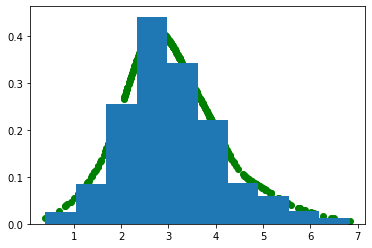

 mean loglikelihood of p_g  -1.44618642
Gradient cte 0.0063969969749450685
 Cte Update  1.8780917139053346

 pn/(pn+pm) 2 0.7353987

 std dev y_predit 1.0631433
mean y_predit 3.0705707
pn/(pn+pm)  0.672068
std dev y_pred 1.06314325
 model train on batch  -0.6864279508590698
############ iteration  404 ################
 p_nx  [0.320227265 0.404987276 0.422101796 ... 0.363098532 0.391673028 0.427094489]


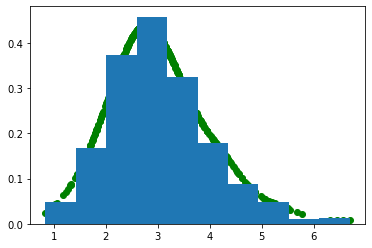

 mean loglikelihood of p_g  -1.35608327
Gradient cte 0.00028322219848632814
 Cte Update  1.878374936103821

 pn/(pn+pm) 2 0.72456163

 std dev y_predit 0.9740825
mean y_predit 3.0327291
pn/(pn+pm)  0.658042371
std dev y_pred 0.974082589
 model train on batch  -0.7102240324020386
############ iteration  405 ################
 p_nx  [0.38742125 0.410762131 0.415027201 ... 0.416704029 0.417077959 0.376621574]


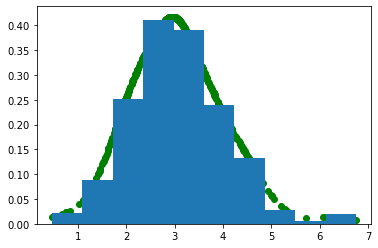

 mean loglikelihood of p_g  -1.37504888
Gradient cte 0.0010565853118896485
 Cte Update  1.8794315214157105

 pn/(pn+pm) 2 0.7267254

 std dev y_predit 0.98204184
mean y_predit 3.0601172
pn/(pn+pm)  0.664762199
std dev y_pred 0.982041836
 model train on batch  -0.716414749622345
############ iteration  406 ################
 p_nx  [0.402210593 0.400913894 0.373440772 ... 0.374354333 0.385220289 0.383330405]


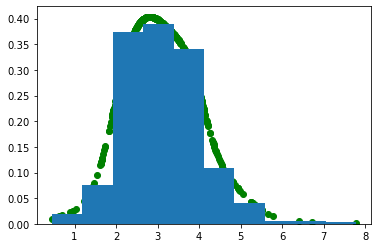

 mean loglikelihood of p_g  -1.3367399
Gradient cte 0.0013602113723754884
 Cte Update  1.8807917327880859

 pn/(pn+pm) 2 0.74022853

 std dev y_predit 0.9484968
mean y_predit 3.1141212
pn/(pn+pm)  0.67673558
std dev y_pred 0.948496819
 model train on batch  -0.6713769435882568
############ iteration  407 ################
 p_nx  [0.404206872 0.397786736 0.426445335 ... 0.426602751 0.388721198 0.410165578]


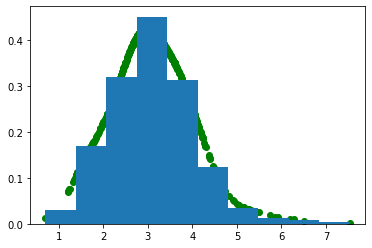

 mean loglikelihood of p_g  -1.339818
Gradient cte 0.0011714723110198976
 Cte Update  1.8819632050991058

 pn/(pn+pm) 2 0.7226381

 std dev y_predit 0.9504965
mean y_predit 3.0882447
pn/(pn+pm)  0.657877624
std dev y_pred 0.950496435
 model train on batch  -0.7184154987335205
############ iteration  408 ################
 p_nx  [0.431415975 0.425691396 0.422663331 ... 0.438571841 0.435460657 0.405932873]


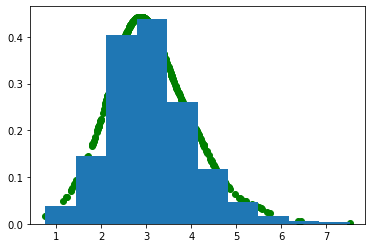

 mean loglikelihood of p_g  -1.34397364
Gradient cte -0.007401923179626465
 Cte Update  1.8745612819194792

 pn/(pn+pm) 2 0.7161018

 std dev y_predit 0.9561931
mean y_predit 3.101321
pn/(pn+pm)  0.645209134
std dev y_pred 0.956193089
 model train on batch  -0.7289564609527588
############ iteration  409 ################
 p_nx  [0.420213252 0.423027277 0.412489593 ... 0.423517495 0.419285536 0.393698305]


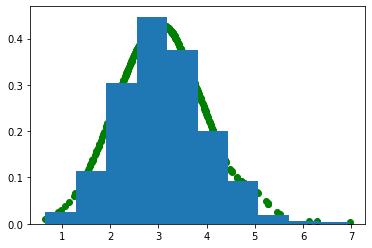

 mean loglikelihood of p_g  -1.32192421
Gradient cte -0.0017623980045318604
 Cte Update  1.8727988839149474

 pn/(pn+pm) 2 0.72259146

 std dev y_predit 0.9221577
mean y_predit 3.0969398
pn/(pn+pm)  0.652897656
std dev y_pred 0.922157705
 model train on batch  -0.7119465470314026
############ iteration  410 ################
 p_nx  [0.406857818 0.406955421 0.400503099 ... 0.397979319 0.406471729 0.401985288]


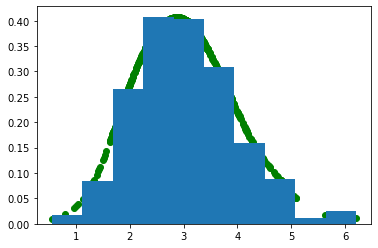

 mean loglikelihood of p_g  -1.33962739
Gradient cte 0.004594730377197266
 Cte Update  1.8773936142921448

 pn/(pn+pm) 2 0.73453766

 std dev y_predit 0.9412943
mean y_predit 3.0336084
pn/(pn+pm)  0.671729565
std dev y_pred 0.941294372
 model train on batch  -0.6887850761413574
############ iteration  411 ################
 p_nx  [0.379101 0.375672579 0.285622537 ... 0.423446625 0.426191628 0.410368443]


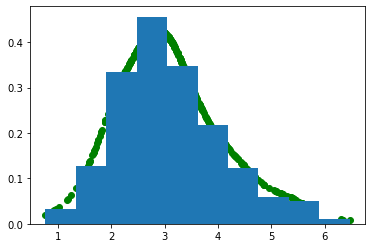

 mean loglikelihood of p_g  -1.38415956
Gradient cte 0.0005018477439880371
 Cte Update  1.8778954620361328

 pn/(pn+pm) 2 0.7182854

 std dev y_predit 1.002382
mean y_predit 3.0911689
pn/(pn+pm)  0.654316
std dev y_pred 1.00238204
 model train on batch  -0.7317108511924744
############ iteration  412 ################
 p_nx  [0.409240723 0.402871668 0.409870148 ... 0.40874967 0.400684178 0.396633834]


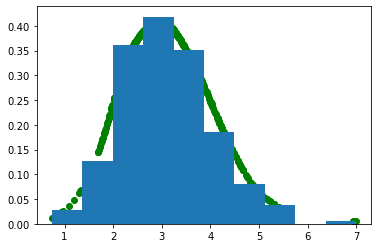

 mean loglikelihood of p_g  -1.31862903
Gradient cte 0.0007050647735595703
 Cte Update  1.8786005268096924

 pn/(pn+pm) 2 0.73516375

 std dev y_predit 0.9242881
mean y_predit 3.1072774
pn/(pn+pm)  0.672307193
std dev y_pred 0.924288094
 model train on batch  -0.6895486116409302
############ iteration  413 ################
 p_nx  [0.423856735 0.406072468 0.422941744 ... 0.401429027 0.405456811 0.399217397]


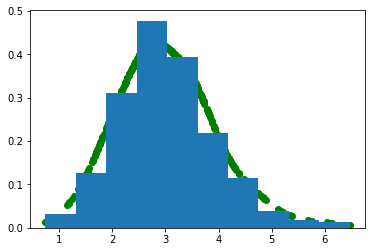

 mean loglikelihood of p_g  -1.31968307
Gradient cte 0.006234464645385743
 Cte Update  1.8848349914550782

 pn/(pn+pm) 2 0.7300288

 std dev y_predit 0.9248465
mean y_predit 3.0208507
pn/(pn+pm)  0.661652088
std dev y_pred 0.924846411
 model train on batch  -0.6923342347145081
############ iteration  414 ################
 p_nx  [0.417051703 0.424407214 0.426632255 ... 0.420286387 0.424537152 0.42306295]


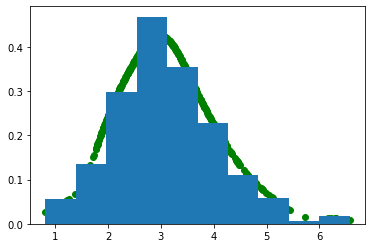

 mean loglikelihood of p_g  -1.3516705
Gradient cte -0.004132878303527832
 Cte Update  1.8807021131515502

 pn/(pn+pm) 2 0.7211766

 std dev y_predit 0.9581404
mean y_predit 3.1048765
pn/(pn+pm)  0.654705822
std dev y_pred 0.958140433
 model train on batch  -0.7212311625480652
############ iteration  415 ################
 p_nx  [0.371847093 0.410425395 0.383084059 ... 0.353481501 0.400842 0.410654843]


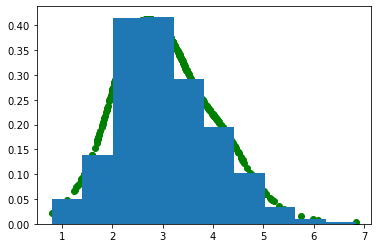

 mean loglikelihood of p_g  -1.35106039
Gradient cte 0.008844844818115235
 Cte Update  1.8895469579696655

 pn/(pn+pm) 2 0.7389962

 std dev y_predit 0.95387626
mean y_predit 3.0522146
pn/(pn+pm)  0.677034199
std dev y_pred 0.953876257
 model train on batch  -0.6777033805847168
############ iteration  416 ################
 p_nx  [0.450642467 0.421260893 0.446802199 ... 0.450475097 0.439525872 0.448302269]


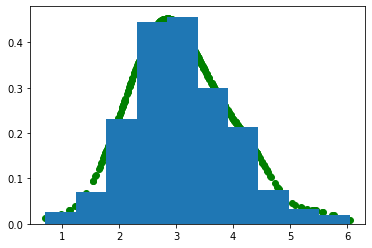

 mean loglikelihood of p_g  -1.28526115
Gradient cte -0.003948778629302979
 Cte Update  1.8855981793403627

 pn/(pn+pm) 2 0.71777666

 std dev y_predit 0.8906885
mean y_predit 3.087474
pn/(pn+pm)  0.648191392
std dev y_pred 0.890688419
 model train on batch  -0.7236198782920837
############ iteration  417 ################
 p_nx  [0.435129195 0.440887958 0.403806746 ... 0.441111922 0.39044252 0.409764439]


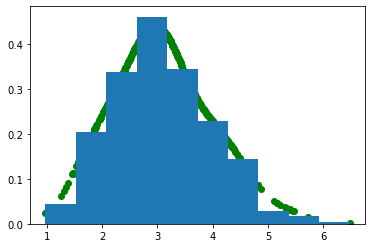

 mean loglikelihood of p_g  -1.30792367
Gradient cte -0.003281928300857544
 Cte Update  1.882316251039505

 pn/(pn+pm) 2 0.7131765

 std dev y_predit 0.90993226
mean y_predit 3.0805776
pn/(pn+pm)  0.645567298
std dev y_pred 0.909932256
 model train on batch  -0.7386040687561035
############ iteration  418 ################
 p_nx  [0.431934893 0.41228056 0.450676203 ... 0.445163667 0.450003 0.444532812]


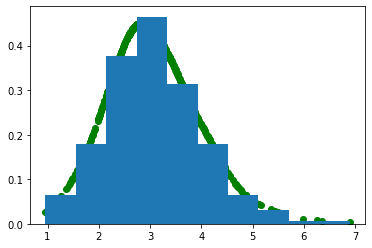

 mean loglikelihood of p_g  -1.304865
Gradient cte 0.0026179189682006836
 Cte Update  1.8849341700077058

 pn/(pn+pm) 2 0.7164049

 std dev y_predit 0.9151548
mean y_predit 3.0716698
pn/(pn+pm)  0.644090414
std dev y_pred 0.915154815
 model train on batch  -0.7219668030738831
############ iteration  419 ################
 p_nx  [0.41655302 0.408040434 0.395701021 ... 0.412588745 0.413147837 0.400809139]


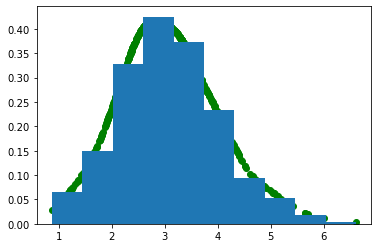

 mean loglikelihood of p_g  -1.34938288
Gradient cte 0.005295313835144043
 Cte Update  1.89022948384285

 pn/(pn+pm) 2 0.7277168

 std dev y_predit 0.94742846
mean y_predit 3.0766923
pn/(pn+pm)  0.658763766
std dev y_pred 0.947428465
 model train on batch  -0.6929525136947632
############ iteration  420 ################
 p_nx  [0.446587712 0.389250219 0.440384537 ... 0.408572346 0.4389112 0.444109291]


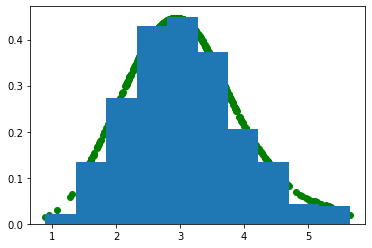

 mean loglikelihood of p_g  -1.26599097
Gradient cte 0.004977921485900879
 Cte Update  1.8952074053287509

 pn/(pn+pm) 2 0.7156793

 std dev y_predit 0.8717712
mean y_predit 3.0437949
pn/(pn+pm)  0.646003067
std dev y_pred 0.871771276
 model train on batch  -0.7252718210220337
############ iteration  421 ################
 p_nx  [0.44913739 0.449211895 0.415620536 ... 0.428861797 0.44931066 0.408114761]


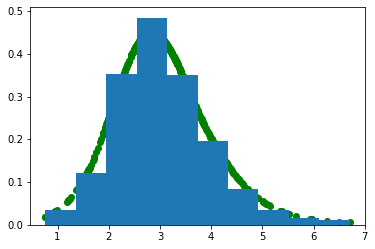

 mean loglikelihood of p_g  -1.32345688
Gradient cte -0.005497423171997071
 Cte Update  1.8897099821567538

 pn/(pn+pm) 2 0.715382

 std dev y_predit 0.9348118
mean y_predit 3.0401583
pn/(pn+pm)  0.644461095
std dev y_pred 0.934811771
 model train on batch  -0.7265435457229614
############ iteration  422 ################
 p_nx  [0.391637564 0.430642366 0.445992082 ... 0.400808573 0.400853664 0.439136654]


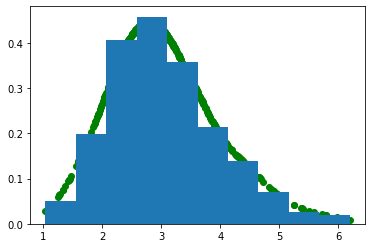

 mean loglikelihood of p_g  -1.29966199
Gradient cte -0.00099505615234375
 Cte Update  1.88871492600441

 pn/(pn+pm) 2 0.72274405

 std dev y_predit 0.91590935
mean y_predit 3.0439072
pn/(pn+pm)  0.656883955
std dev y_pred 0.91590935
 model train on batch  -0.7140260338783264
############ iteration  423 ################
 p_nx  [0.455692828 0.4351767 0.45817405 ... 0.450781941 0.414072633 0.458694309]


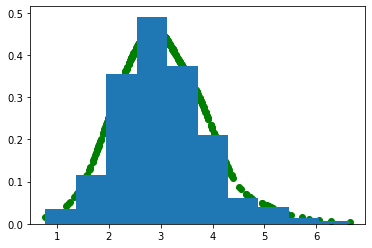

 mean loglikelihood of p_g  -1.2704643
Gradient cte 0.0011168196201324463
 Cte Update  1.8898317456245426

 pn/(pn+pm) 2 0.7158217

 std dev y_predit 0.8843597
mean y_predit 3.0336504
pn/(pn+pm)  0.647191405
std dev y_pred 0.884359717
 model train on batch  -0.7301929593086243
############ iteration  424 ################
 p_nx  [0.399260432 0.396251023 0.396046638 ... 0.397836626 0.398501903 0.385963649]


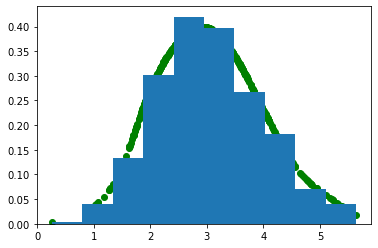

 mean loglikelihood of p_g  -1.33794022
Gradient cte 0.0023404760360717773
 Cte Update  1.8921722216606143

 pn/(pn+pm) 2 0.7399016

 std dev y_predit 0.92969143
mean y_predit 3.0340161
pn/(pn+pm)  0.678258717
std dev y_pred 0.929691434
 model train on batch  -0.6769776344299316
############ iteration  425 ################
 p_nx  [0.403372198 0.428780198 0.421126753 ... 0.429528981 0.428061724 0.423966289]


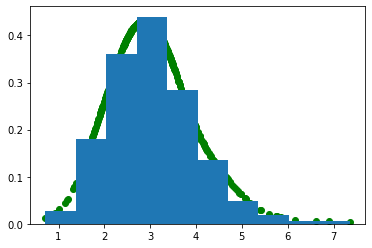

 mean loglikelihood of p_g  -1.33561778
Gradient cte 0.0038289315700531005
 Cte Update  1.8960011532306673

 pn/(pn+pm) 2 0.72274977

 std dev y_predit 0.9545439
mean y_predit 3.0559225
pn/(pn+pm)  0.654376268
std dev y_pred 0.954543948
 model train on batch  -0.7118111252784729
############ iteration  426 ################
 p_nx  [0.376428217 0.398012519 0.400373816 ... 0.374302745 0.372978091 0.379883468]


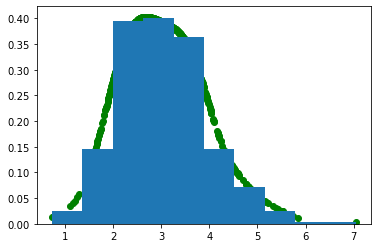

 mean loglikelihood of p_g  -1.30312574
Gradient cte 0.003975544929504395
 Cte Update  1.8999766981601718

 pn/(pn+pm) 2 0.7447173

 std dev y_predit 0.91146576
mean y_predit 3.037739
pn/(pn+pm)  0.681964755
std dev y_pred 0.911465704
 model train on batch  -0.6572445034980774
############ iteration  427 ################
 p_nx  [0.430070639 0.432870358 0.402246058 ... 0.417841733 0.383412838 0.430359483]


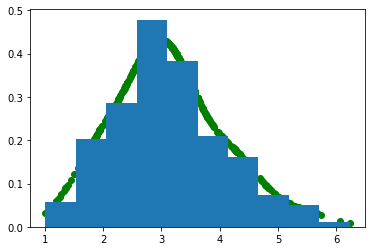

 mean loglikelihood of p_g  -1.35522866
Gradient cte -0.012334369659423828
 Cte Update  1.887642328500748

 pn/(pn+pm) 2 0.713383

 std dev y_predit 0.9611004
mean y_predit 3.1132338
pn/(pn+pm)  0.646697879
std dev y_pred 0.961100399
 model train on batch  -0.7395132184028625
############ iteration  428 ################
 p_nx  [0.414921343 0.435607493 0.364881188 ... 0.426692665 0.436318874 0.431965172]


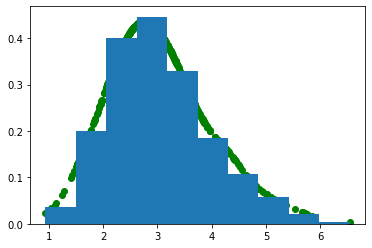

 mean loglikelihood of p_g  -1.32312214
Gradient cte -0.0033459649085998537
 Cte Update  1.8842963635921481

 pn/(pn+pm) 2 0.72628725

 std dev y_predit 0.93774945
mean y_predit 3.0359924
pn/(pn+pm)  0.659718394
std dev y_pred 0.937749445
 model train on batch  -0.7045395374298096
############ iteration  429 ################
 p_nx  [0.395252377 0.400736153 0.390322626 ... 0.402842849 0.397186279 0.403063983]


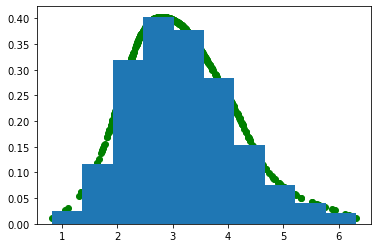

 mean loglikelihood of p_g  -1.35381138
Gradient cte 0.0006065710783004761
 Cte Update  1.8849029346704487

 pn/(pn+pm) 2 0.7385651

 std dev y_predit 0.9648656
mean y_predit 3.1841903
pn/(pn+pm)  0.674553156
std dev y_pred 0.964865625
 model train on batch  -0.6741786599159241
############ iteration  430 ################
 p_nx  [0.400473654 0.4114663 0.410600781 ... 0.411236823 0.402612 0.411649197]


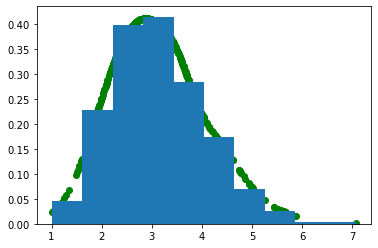

 mean loglikelihood of p_g  -1.32681334
Gradient cte 0.0021895477771759035
 Cte Update  1.8870924824476245

 pn/(pn+pm) 2 0.7339173

 std dev y_predit 0.9349699
mean y_predit 3.1202357
pn/(pn+pm)  0.667755783
std dev y_pred 0.934969902
 model train on batch  -0.6849691867828369
############ iteration  431 ################
 p_nx  [0.419474542 0.448227227 0.449812919 ... 0.414965659 0.447754502 0.41206044]


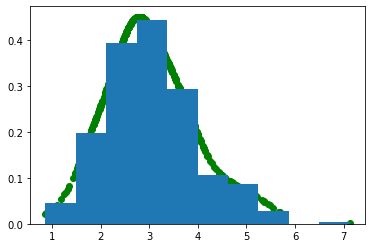

 mean loglikelihood of p_g  -1.32365406
Gradient cte 0.0003765006065368652
 Cte Update  1.8874689830541613

 pn/(pn+pm) 2 0.7202908

 std dev y_predit 0.9422777
mean y_predit 3.0388734
pn/(pn+pm)  0.651046216
std dev y_pred 0.94227773
 model train on batch  -0.7153615951538086
############ iteration  432 ################
 p_nx  [0.432951897 0.43520534 0.43847838 ... 0.434899151 0.381602049 0.435666084]


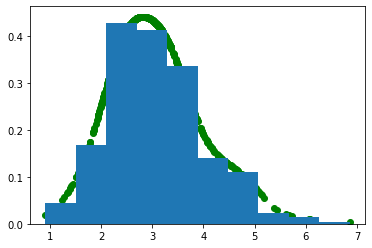

 mean loglikelihood of p_g  -1.30567801
Gradient cte -0.0011259768009185792
 Cte Update  1.8863430062532427

 pn/(pn+pm) 2 0.72090423

 std dev y_predit 0.92377955
mean y_predit 3.0820038
pn/(pn+pm)  0.649581134
std dev y_pred 0.923779547
 model train on batch  -0.7122008800506592
############ iteration  433 ################
 p_nx  [0.399834275 0.360496432 0.395886719 ... 0.374228865 0.388221264 0.38726148]


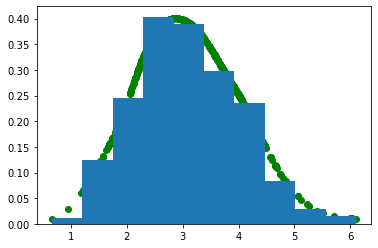

 mean loglikelihood of p_g  -1.33939743
Gradient cte -0.003992236852645874
 Cte Update  1.8823507694005968

 pn/(pn+pm) 2 0.73768383

 std dev y_predit 0.93184495
mean y_predit 3.0892427
pn/(pn+pm)  0.673636854
std dev y_pred 0.93184495
 model train on batch  -0.6771900653839111
############ iteration  434 ################
 p_nx  [0.407837152 0.413257211 0.407504171 ... 0.412919968 0.392484426 0.355558425]


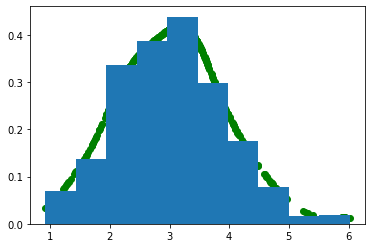

 mean loglikelihood of p_g  -1.31545341
Gradient cte 0.003613665819168091
 Cte Update  1.8859644352197649

 pn/(pn+pm) 2 0.731491

 std dev y_predit 0.91338843
mean y_predit 3.0362465
pn/(pn+pm)  0.664092
std dev y_pred 0.913388431
 model train on batch  -0.6882569193840027
############ iteration  435 ################
 p_nx  [0.371911794 0.369725257 0.37495476 ... 0.383463472 0.375185311 0.359338343]


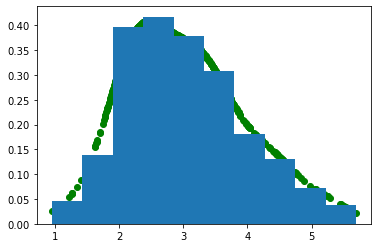

 mean loglikelihood of p_g  -1.32277811
Gradient cte 0.005184611320495605
 Cte Update  1.8911490465402605

 pn/(pn+pm) 2 0.7527485

 std dev y_predit 0.94206274
mean y_predit 3.02844
pn/(pn+pm)  0.693107784
std dev y_pred 0.942062736
 model train on batch  -0.6405794620513916
############ iteration  436 ################
 p_nx  [0.458011329 0.457807809 0.41499871 ... 0.442091286 0.374076128 0.453575462]


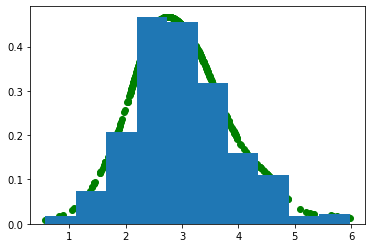

 mean loglikelihood of p_g  -1.26502454
Gradient cte -0.001982832193374634
 Cte Update  1.889166214346886

 pn/(pn+pm) 2 0.71589714

 std dev y_predit 0.8796232
mean y_predit 2.9938223
pn/(pn+pm)  0.644056916
std dev y_pred 0.879623115
 model train on batch  -0.7223784327507019
############ iteration  437 ################
 p_nx  [0.36525023 0.390854 0.364281595 ... 0.39570272 0.369019151 0.386775225]


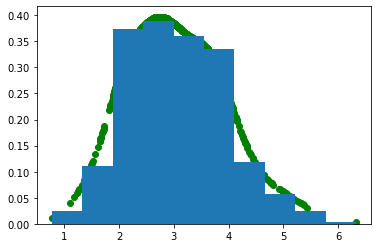

 mean loglikelihood of p_g  -1.30227888
Gradient cte 0.004173599720001221
 Cte Update  1.8933398140668871

 pn/(pn+pm) 2 0.7493611

 std dev y_predit 0.90682757
mean y_predit 3.040142
pn/(pn+pm)  0.69030416
std dev y_pred 0.906827509
 model train on batch  -0.6518002152442932
############ iteration  438 ################
 p_nx  [0.433498293 0.432379812 0.383348852 ... 0.403886467 0.433610559 0.428341061]


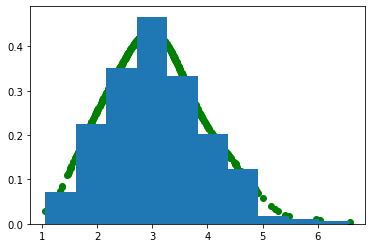

 mean loglikelihood of p_g  -1.29805672
Gradient cte -0.003756372928619385
 Cte Update  1.8895834411382677

 pn/(pn+pm) 2 0.7203087

 std dev y_predit 0.90577394
mean y_predit 3.066729
pn/(pn+pm)  0.652809501
std dev y_pred 0.905773938
 model train on batch  -0.7203071713447571
############ iteration  439 ################
 p_nx  [0.433756351 0.431761086 0.435901105 ... 0.436620861 0.436928064 0.438868493]


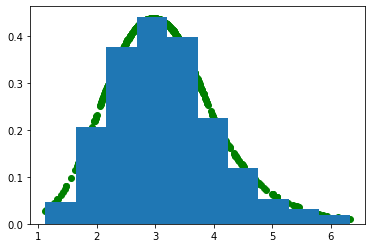

 mean loglikelihood of p_g  -1.29407072
Gradient cte -0.003023942947387695
 Cte Update  1.88655949819088

 pn/(pn+pm) 2 0.71904874

 std dev y_predit 0.9084122
mean y_predit 3.1416445
pn/(pn+pm)  0.647926092
std dev y_pred 0.908412218
 model train on batch  -0.716873049736023
############ iteration  440 ################
 p_nx  [0.442642897 0.429945588 0.431701809 ... 0.432058275 0.415219814 0.443853557]


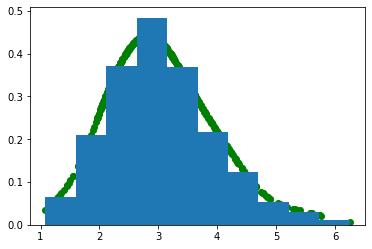

 mean loglikelihood of p_g  -1.29027307
Gradient cte 0.0009522337913513184
 Cte Update  1.8875117319822312

 pn/(pn+pm) 2 0.72067124

 std dev y_predit 0.9012139
mean y_predit 3.0520391
pn/(pn+pm)  0.653296471
std dev y_pred 0.901213884
 model train on batch  -0.7163367867469788
############ iteration  441 ################
 p_nx  [0.461792648 0.447429866 0.467450291 ... 0.44443509 0.46447143 0.445757359]


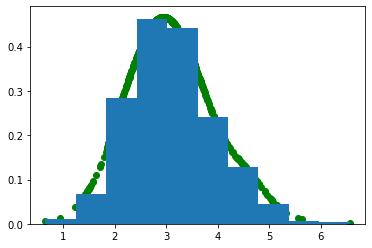

 mean loglikelihood of p_g  -1.241238
Gradient cte -0.003919266700744629
 Cte Update  1.8835924652814866

 pn/(pn+pm) 2 0.7091629

 std dev y_predit 0.8491478
mean y_predit 3.099497
pn/(pn+pm)  0.63612
std dev y_pred 0.849147797
 model train on batch  -0.7414335608482361
############ iteration  442 ################
 p_nx  [0.438634187 0.358872592 0.437756181 ... 0.440214902 0.401696742 0.442558885]


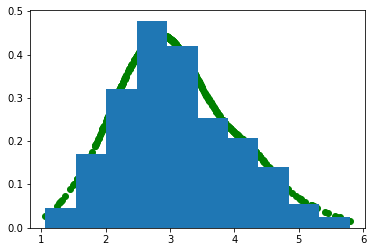

 mean loglikelihood of p_g  -1.29273653
Gradient cte 0.0026785778999328614
 Cte Update  1.8862710431814194

 pn/(pn+pm) 2 0.7188326

 std dev y_predit 0.9024321
mean y_predit 3.0996265
pn/(pn+pm)  0.651157081
std dev y_pred 0.902432084
 model train on batch  -0.7232941389083862
############ iteration  443 ################
 p_nx  [0.408572555 0.418584 0.407749861 ... 0.410183966 0.419728041 0.419030905]


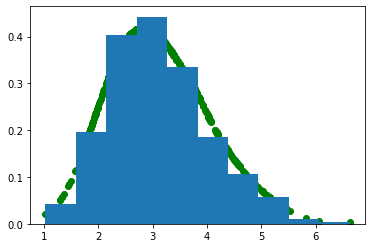

 mean loglikelihood of p_g  -1.30598235
Gradient cte -0.001110587239265442
 Cte Update  1.885160455942154

 pn/(pn+pm) 2 0.73380893

 std dev y_predit 0.9139628
mean y_predit 3.1222258
pn/(pn+pm)  0.670717418
std dev y_pred 0.913962841
 model train on batch  -0.6911700367927551
############ iteration  444 ################
 p_nx  [0.402407229 0.403623462 0.421841443 ... 0.410666376 0.419073075 0.425682247]


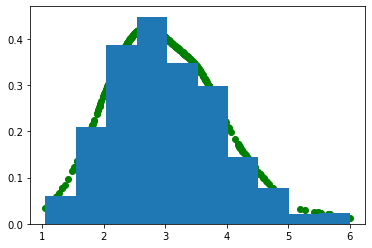

 mean loglikelihood of p_g  -1.29015064
Gradient cte 0.004806432723999023
 Cte Update  1.889966888666153

 pn/(pn+pm) 2 0.74056506

 std dev y_predit 0.9006706
mean y_predit 3.0193968
pn/(pn+pm)  0.675156116
std dev y_pred 0.900670588
 model train on batch  -0.6675155758857727
############ iteration  445 ################
 p_nx  [0.43875131 0.436095059 0.371997297 ... 0.438498259 0.414583534 0.401388854]


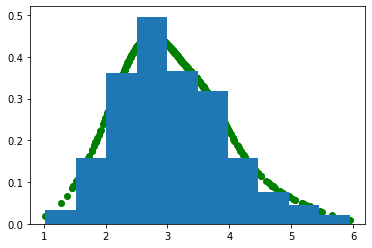

 mean loglikelihood of p_g  -1.26611924
Gradient cte 0.010153295516967774
 Cte Update  1.9001201841831208

 pn/(pn+pm) 2 0.7281332

 std dev y_predit 0.88000536
mean y_predit 3.0729012
pn/(pn+pm)  0.660838723
std dev y_pred 0.88000536
 model train on batch  -0.6963934898376465
############ iteration  446 ################
 p_nx  [0.44810009 0.44349876 0.446882337 ... 0.387167335 0.446676731 0.412712693]


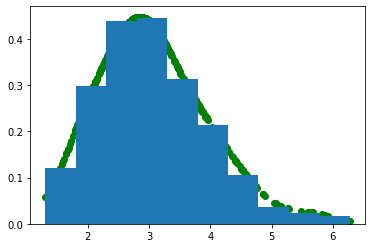

 mean loglikelihood of p_g  -1.27417791
Gradient cte -0.0023870229721069335
 Cte Update  1.8977331612110138

 pn/(pn+pm) 2 0.7169111

 std dev y_predit 0.89686847
mean y_predit 3.0621402
pn/(pn+pm)  0.649760842
std dev y_pred 0.896868467
 model train on batch  -0.7253477573394775
############ iteration  447 ################
 p_nx  [0.416735232 0.433353 0.434401929 ... 0.407435 0.414066702 0.434144944]


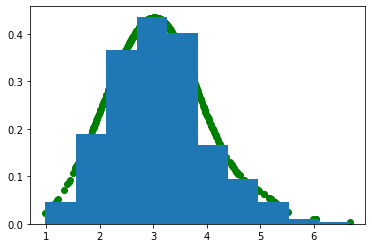

 mean loglikelihood of p_g  -1.30836976
Gradient cte -0.00477822208404541
 Cte Update  1.8929549391269684

 pn/(pn+pm) 2 0.7199502

 std dev y_predit 0.91240025
mean y_predit 3.1104472
pn/(pn+pm)  0.651837349
std dev y_pred 0.912400305
 model train on batch  -0.717933714389801
############ iteration  448 ################
 p_nx  [0.407011092 0.407866329 0.402707428 ... 0.406335115 0.398474932 0.405625045]


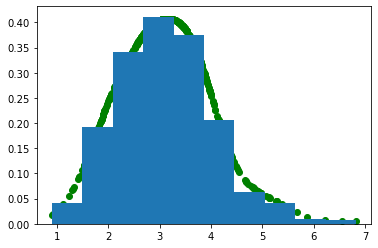

 mean loglikelihood of p_g  -1.32893467
Gradient cte 0.007258651733398437
 Cte Update  1.9002135908603668

 pn/(pn+pm) 2 0.7357782

 std dev y_predit 0.9352795
mean y_predit 3.121466
pn/(pn+pm)  0.671877444
std dev y_pred 0.935279489
 model train on batch  -0.6800853610038757
############ iteration  449 ################
 p_nx  [0.387086093 0.459084898 0.447349459 ... 0.447081834 0.414061189 0.469763875]


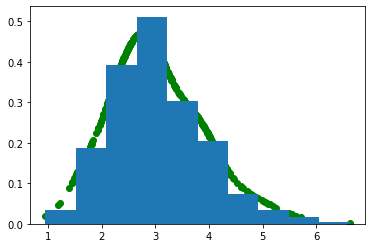

 mean loglikelihood of p_g  -1.27532053
Gradient cte -0.0025177154541015626
 Cte Update  1.8976958754062652

 pn/(pn+pm) 2 0.7196917

 std dev y_predit 0.8936102
mean y_predit 3.0261216
pn/(pn+pm)  0.653788686
std dev y_pred 0.893610179
 model train on batch  -0.7177256345748901
############ iteration  450 ################
 p_nx  [0.438699 0.436457455 0.432976484 ... 0.411610335 0.422613949 0.435131878]


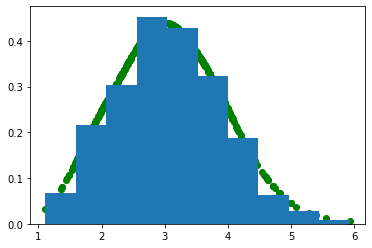

 mean loglikelihood of p_g  -1.24742424
Gradient cte -0.00499495792388916
 Cte Update  1.892700917482376

 pn/(pn+pm) 2 0.71994156

 std dev y_predit 0.84809357
mean y_predit 3.0603206
pn/(pn+pm)  0.652215183
std dev y_pred 0.848093569
 model train on batch  -0.7169046998023987
############ iteration  451 ################
 p_nx  [0.474013686 0.502011061 0.447424978 ... 0.406445175 0.510999203 0.510758042]


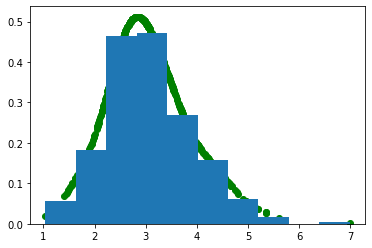

 mean loglikelihood of p_g  -1.2050457
Gradient cte -0.0017659311294555664
 Cte Update  1.8909349863529203

 pn/(pn+pm) 2 0.6948816

 std dev y_predit 0.83428466
mean y_predit 3.0638316
pn/(pn+pm)  0.615284741
std dev y_pred 0.834284604
 model train on batch  -0.7689005732536316
############ iteration  452 ################
 p_nx  [0.419941634 0.399807 0.403455883 ... 0.408817321 0.398182243 0.417822599]


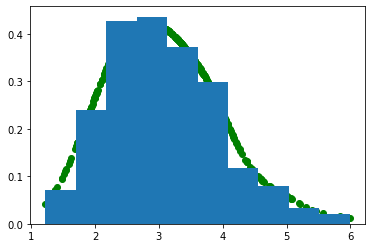

 mean loglikelihood of p_g  -1.27022576
Gradient cte 0.001601675510406494
 Cte Update  1.8925366618633268

 pn/(pn+pm) 2 0.7312207

 std dev y_predit 0.88454944
mean y_predit 3.068521
pn/(pn+pm)  0.665299237
std dev y_pred 0.884549439
 model train on batch  -0.6900490522384644
############ iteration  453 ################
 p_nx  [0.436570466 0.434656382 0.467022508 ... 0.469866484 0.480358303 0.451321363]


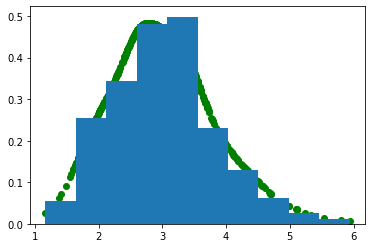

 mean loglikelihood of p_g  -1.18835342
Gradient cte 0.0009492876529693604
 Cte Update  1.8934859495162961

 pn/(pn+pm) 2 0.70290047

 std dev y_predit 0.8133431
mean y_predit 3.0058012
pn/(pn+pm)  0.622700036
std dev y_pred 0.813343108
 model train on batch  -0.7414373755455017
############ iteration  454 ################
 p_nx  [0.418280512 0.431857467 0.440005451 ... 0.417534232 0.430484265 0.441991806]


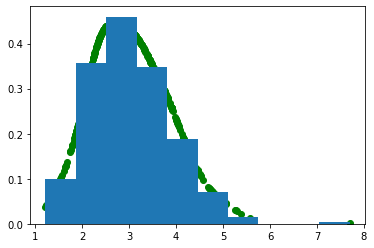

 mean loglikelihood of p_g  -1.22000444
Gradient cte 0.008509613990783692
 Cte Update  1.9019955635070798

 pn/(pn+pm) 2 0.7306177

 std dev y_predit 0.8499854
mean y_predit 3.0424185
pn/(pn+pm)  0.664026082
std dev y_pred 0.849985421
 model train on batch  -0.6916637420654297
############ iteration  455 ################
 p_nx  [0.402291536 0.426330864 0.423440158 ... 0.402218074 0.431227386 0.416872144]


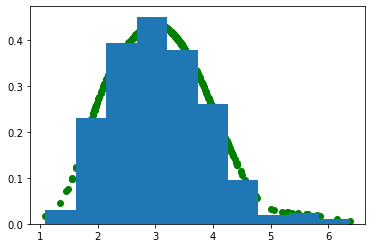

 mean loglikelihood of p_g  -1.22874069
Gradient cte 0.007596282005310059
 Cte Update  1.90959184551239

 pn/(pn+pm) 2 0.7235291

 std dev y_predit 0.85500705
mean y_predit 3.0895753
pn/(pn+pm)  0.657033443
std dev y_pred 0.855007052
 model train on batch  -0.7066486477851868
############ iteration  456 ################
 p_nx  [0.431674242 0.430051386 0.436842859 ... 0.436875552 0.424109638 0.434119493]


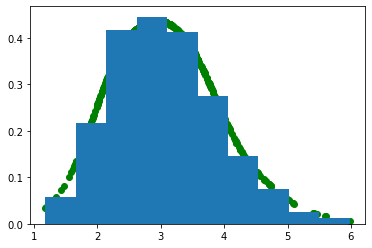

 mean loglikelihood of p_g  -1.23993576
Gradient cte -0.002889941692352295
 Cte Update  1.9067019038200377

 pn/(pn+pm) 2 0.72465026

 std dev y_predit 0.84817034
mean y_predit 3.0656364
pn/(pn+pm)  0.656226814
std dev y_pred 0.84817034
 model train on batch  -0.7030040621757507
############ iteration  457 ################
 p_nx  [0.373803496 0.448144525 0.438355654 ... 0.435031682 0.433930546 0.448620021]


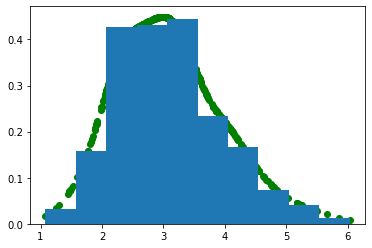

 mean loglikelihood of p_g  -1.24089694
Gradient cte -0.0027049362659454347
 Cte Update  1.9039969675540922

 pn/(pn+pm) 2 0.7155788

 std dev y_predit 0.86351883
mean y_predit 3.0933893
pn/(pn+pm)  0.645951211
std dev y_pred 0.863518775
 model train on batch  -0.7253551483154297
############ iteration  458 ################
 p_nx  [0.455996692 0.44606927 0.435010523 ... 0.42990312 0.4569152 0.457011074]


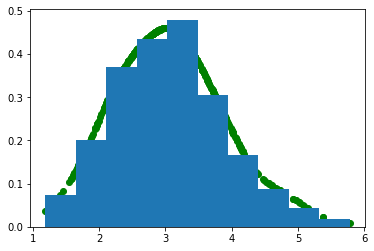

 mean loglikelihood of p_g  -1.22528338
Gradient cte -0.0021724052429199217
 Cte Update  1.9018245623111723

 pn/(pn+pm) 2 0.71266603

 std dev y_predit 0.83504975
mean y_predit 3.0633852
pn/(pn+pm)  0.642406046
std dev y_pred 0.835049748
 model train on batch  -0.732001781463623
############ iteration  459 ################
 p_nx  [0.471260548 0.473305404 0.426414639 ... 0.470944941 0.405423552 0.473313302]


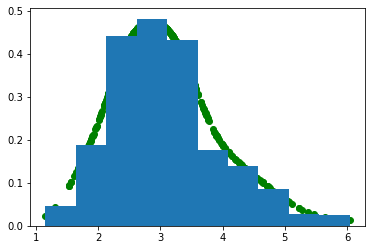

 mean loglikelihood of p_g  -1.23947334
Gradient cte -0.0011750979423522949
 Cte Update  1.9006494643688199

 pn/(pn+pm) 2 0.7064165

 std dev y_predit 0.8729384
mean y_predit 3.084583
pn/(pn+pm)  0.629876316
std dev y_pred 0.872938454
 model train on batch  -0.7420957684516907
############ iteration  460 ################
 p_nx  [0.448088974 0.419650376 0.441761911 ... 0.436948687 0.449443519 0.444430232]


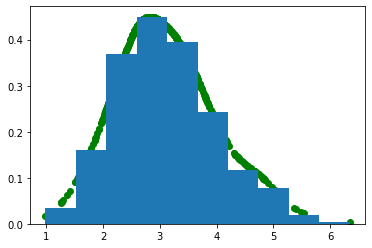

 mean loglikelihood of p_g  -1.27129459
Gradient cte 0.0001336369514465332
 Cte Update  1.9007831013202665

 pn/(pn+pm) 2 0.7172926

 std dev y_predit 0.8810455
mean y_predit 3.1164708
pn/(pn+pm)  0.644458711
std dev y_pred 0.88104552
 model train on batch  -0.7158006429672241
############ iteration  461 ################
 p_nx  [0.447016805 0.445310354 0.44975847 ... 0.44891426 0.438973337 0.446362048]


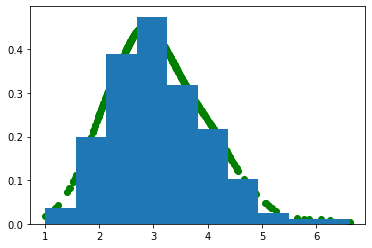

 mean loglikelihood of p_g  -1.27270794
Gradient cte -0.002645732879638672
 Cte Update  1.8981373684406277

 pn/(pn+pm) 2 0.7155135

 std dev y_predit 0.88668674
mean y_predit 3.0935543
pn/(pn+pm)  0.646404505
std dev y_pred 0.886686742
 model train on batch  -0.7259933948516846
############ iteration  462 ################
 p_nx  [0.439381093 0.439963698 0.443279296 ... 0.41108036 0.442471117 0.427546233]


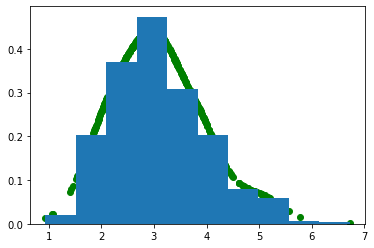

 mean loglikelihood of p_g  -1.28321064
Gradient cte -0.0034377613067626952
 Cte Update  1.894699607133865

 pn/(pn+pm) 2 0.7173701

 std dev y_predit 0.89994967
mean y_predit 3.0964773
pn/(pn+pm)  0.649851918
std dev y_pred 0.89994967
 model train on batch  -0.7275406718254089
############ iteration  463 ################
 p_nx  [0.448434383 0.366734862 0.449892282 ... 0.450110108 0.449204415 0.398984104]


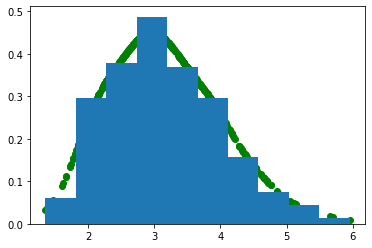

 mean loglikelihood of p_g  -1.21880126
Gradient cte -0.003521564245223999
 Cte Update  1.891178042888641

 pn/(pn+pm) 2 0.7167104

 std dev y_predit 0.8393158
mean y_predit 3.1508672
pn/(pn+pm)  0.648265898
std dev y_pred 0.839315832
 model train on batch  -0.7265509366989136
############ iteration  464 ################
 p_nx  [0.420681775 0.419981897 0.420442134 ... 0.426819861 0.425997 0.411789566]


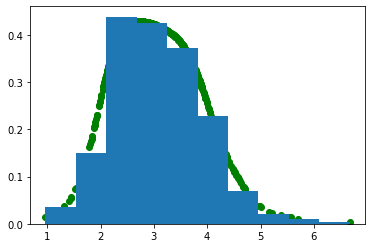

 mean loglikelihood of p_g  -1.20163143
Gradient cte 0.0065145912170410155
 Cte Update  1.8976926341056821

 pn/(pn+pm) 2 0.73461264

 std dev y_predit 0.82400393
mean y_predit 3.0696921
pn/(pn+pm)  0.667732298
std dev y_pred 0.824003935
 model train on batch  -0.6801037788391113
############ iteration  465 ################
 p_nx  [0.45934242 0.4522973 0.470581502 ... 0.42136538 0.464581728 0.460816234]


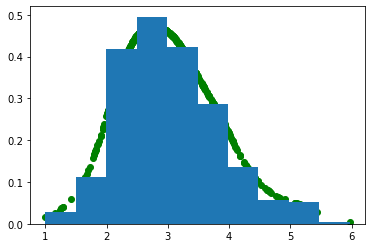

 mean loglikelihood of p_g  -1.20122755
Gradient cte -0.0004766192436218262
 Cte Update  1.8972160148620603

 pn/(pn+pm) 2 0.7137017

 std dev y_predit 0.82658
mean y_predit 3.0424974
pn/(pn+pm)  0.642702878
std dev y_pred 0.82658
 model train on batch  -0.7267661690711975
############ iteration  466 ################
 p_nx  [0.451972425 0.470390826 0.448266149 ... 0.477245092 0.427927852 0.418892264]


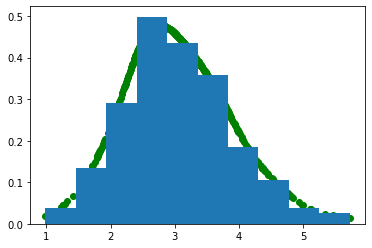

 mean loglikelihood of p_g  -1.21739614
Gradient cte 0.003960515737533569
 Cte Update  1.9011765305995938

 pn/(pn+pm) 2 0.7144547

 std dev y_predit 0.83023155
mean y_predit 3.0454097
pn/(pn+pm)  0.640928388
std dev y_pred 0.830231488
 model train on batch  -0.7225146293640137
############ iteration  467 ################
 p_nx  [0.476672173 0.471892416 0.45071274 ... 0.477134496 0.471635073 0.475637078]


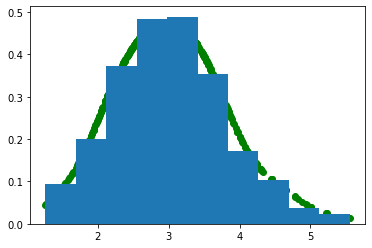

 mean loglikelihood of p_g  -1.17703545
Gradient cte 0.0004408407211303711
 Cte Update  1.901617371320724

 pn/(pn+pm) 2 0.70672154

 std dev y_predit 0.7941309
mean y_predit 3.031366
pn/(pn+pm)  0.631256044
std dev y_pred 0.794130921
 model train on batch  -0.7398826479911804
############ iteration  468 ################
 p_nx  [0.403717041 0.402146518 0.399203509 ... 0.393497497 0.376960248 0.397447556]


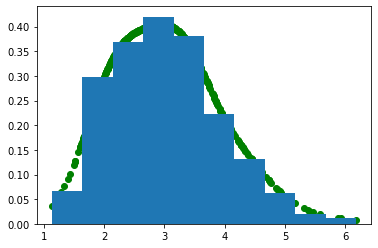

 mean loglikelihood of p_g  -1.28872061
Gradient cte 0.004174740314483643
 Cte Update  1.9057921116352077

 pn/(pn+pm) 2 0.7355631

 std dev y_predit 0.9013285
mean y_predit 3.0307639
pn/(pn+pm)  0.672290444
std dev y_pred 0.901328564
 model train on batch  -0.6802321076393127
############ iteration  469 ################
 p_nx  [0.457838386 0.459754825 0.460093856 ... 0.460100025 0.459863126 0.44992277]


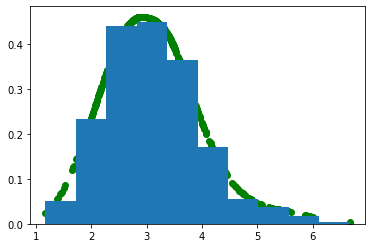

 mean loglikelihood of p_g  -1.23237967
Gradient cte -0.004717771530151367
 Cte Update  1.9010743401050563

 pn/(pn+pm) 2 0.71078295

 std dev y_predit 0.8620675
mean y_predit 3.1113408
pn/(pn+pm)  0.6354267
std dev y_pred 0.862067521
 model train on batch  -0.7287914156913757
############ iteration  470 ################
 p_nx  [0.46521464 0.460361391 0.452542812 ... 0.443857133 0.464038432 0.458529]


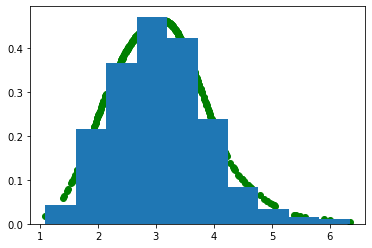

 mean loglikelihood of p_g  -1.21019685
Gradient cte -0.0033564090728759764
 Cte Update  1.8977179310321803

 pn/(pn+pm) 2 0.70974827

 std dev y_predit 0.82885355
mean y_predit 3.075646
pn/(pn+pm)  0.635703623
std dev y_pred 0.828853548
 model train on batch  -0.7326117753982544
############ iteration  471 ################
 p_nx  [0.407371074 0.427831352 0.448266566 ... 0.451249063 0.455052674 0.455040753]


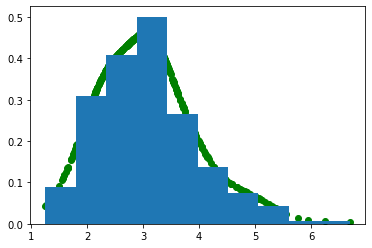

 mean loglikelihood of p_g  -1.25651395
Gradient cte -0.0004523495435714722
 Cte Update  1.8972655814886088

 pn/(pn+pm) 2 0.70898163

 std dev y_predit 0.8847758
mean y_predit 3.0754507
pn/(pn+pm)  0.639052689
std dev y_pred 0.884775877
 model train on batch  -0.7427640557289124
############ iteration  472 ################
 p_nx  [0.436047852 0.429323375 0.46887967 ... 0.469250083 0.456059963 0.425049216]


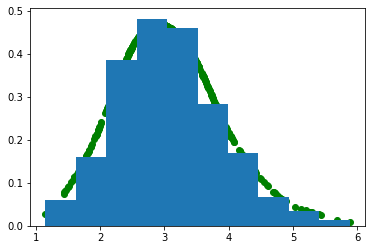

 mean loglikelihood of p_g  -1.21194232
Gradient cte 0.0064314804077148435
 Cte Update  1.9036970618963236

 pn/(pn+pm) 2 0.70939183

 std dev y_predit 0.8261266
mean y_predit 3.0674317
pn/(pn+pm)  0.635351896
std dev y_pred 0.826126516
 model train on batch  -0.7346802353858948
############ iteration  473 ################
 p_nx  [0.466279536 0.430064082 0.461663872 ... 0.458824694 0.464582622 0.462913722]


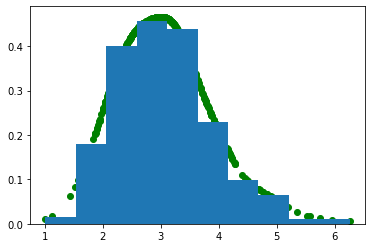

 mean loglikelihood of p_g  -1.20817411
Gradient cte 0.004929941177368164
 Cte Update  1.9086270030736918

 pn/(pn+pm) 2 0.70751643

 std dev y_predit 0.8336812
mean y_predit 3.0606127
pn/(pn+pm)  0.632760227
std dev y_pred 0.833681285
 model train on batch  -0.7364073395729065
############ iteration  474 ################
 p_nx  [0.495035201 0.488683552 0.476058215 ... 0.45702523 0.498817891 0.48273325]


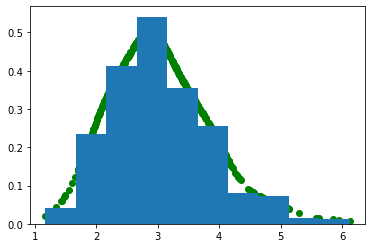

 mean loglikelihood of p_g  -1.18541336
Gradient cte -0.00017566442489624023
 Cte Update  1.9084513386487956

 pn/(pn+pm) 2 0.6998854

 std dev y_predit 0.8212689
mean y_predit 3.0438795
pn/(pn+pm)  0.627187848
std dev y_pred 0.821268916
 model train on batch  -0.7603572607040405
############ iteration  475 ################
 p_nx  [0.47084862 0.483528286 0.452196181 ... 0.478378356 0.48343122 0.457976371]


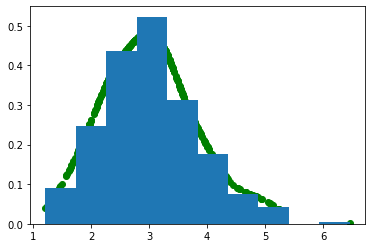

 mean loglikelihood of p_g  -1.2032491
Gradient cte -0.006029327869415283
 Cte Update  1.9024220107793803

 pn/(pn+pm) 2 0.70097

 std dev y_predit 0.82813084
mean y_predit 3.01456
pn/(pn+pm)  0.627957106
std dev y_pred 0.828130841
 model train on batch  -0.7581232786178589
############ iteration  476 ################
 p_nx  [0.476977319 0.39296478 0.484092116 ... 0.478778392 0.482914 0.48717612]


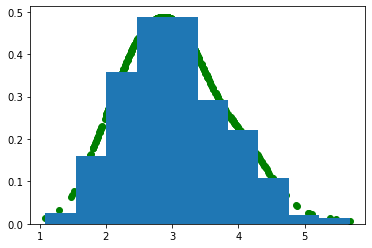

 mean loglikelihood of p_g  -1.15391886
Gradient cte -0.0009964208602905274
 Cte Update  1.9014255899190897

 pn/(pn+pm) 2 0.70386404

 std dev y_predit 0.7783638
mean y_predit 3.0297549
pn/(pn+pm)  0.629152596
std dev y_pred 0.778363824
 model train on batch  -0.7474154829978943
############ iteration  477 ################
 p_nx  [0.458691031 0.505790591 0.500817239 ... 0.502565742 0.48799336 0.506139934]


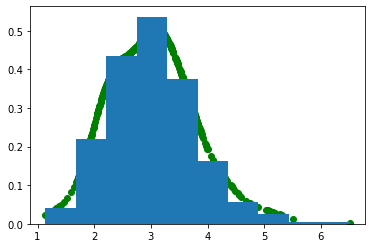

 mean loglikelihood of p_g  -1.1354512
Gradient cte 0.0006645569801330566
 Cte Update  1.9020901468992228

 pn/(pn+pm) 2 0.70074695

 std dev y_predit 0.7739934
mean y_predit 3.02741
pn/(pn+pm)  0.626036
std dev y_pred 0.773993492
 model train on batch  -0.7569075226783752
############ iteration  478 ################
 p_nx  [0.463725656 0.425850362 0.46694234 ... 0.445415467 0.46696505 0.437361628]


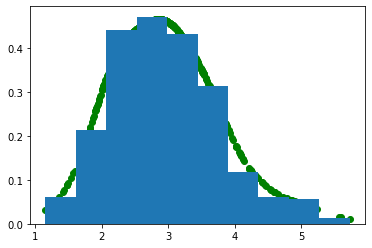

 mean loglikelihood of p_g  -1.18968606
Gradient cte 0.0005243144035339356
 Cte Update  1.9026144613027567

 pn/(pn+pm) 2 0.713926

 std dev y_predit 0.81846184
mean y_predit 2.9718707
pn/(pn+pm)  0.643984199
std dev y_pred 0.818461835
 model train on batch  -0.728085458278656
############ iteration  479 ################
 p_nx  [0.448302478 0.468925059 0.469157219 ... 0.463444471 0.444721282 0.429943532]


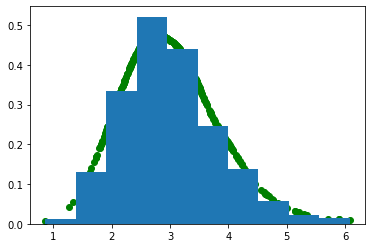

 mean loglikelihood of p_g  -1.20251989
Gradient cte -0.0010391373634338378
 Cte Update  1.901575323939323

 pn/(pn+pm) 2 0.7077626

 std dev y_predit 0.82929814
mean y_predit 3.0048711
pn/(pn+pm)  0.632713914
std dev y_pred 0.829298139
 model train on batch  -0.7343352437019348
############ iteration  480 ################
 p_nx  [0.440337718 0.443265557 0.444531739 ... 0.429215729 0.444576681 0.386438787]


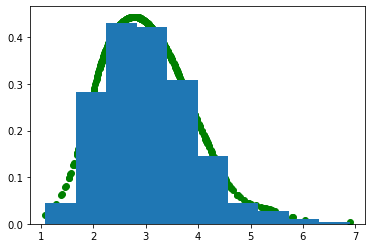

 mean loglikelihood of p_g  -1.23350537
Gradient cte 0.002859161376953125
 Cte Update  1.904434485316276

 pn/(pn+pm) 2 0.7252716

 std dev y_predit 0.8644227
mean y_predit 3.039989
pn/(pn+pm)  0.657934785
std dev y_pred 0.864422679
 model train on batch  -0.7014222741127014
############ iteration  481 ################
 p_nx  [0.422415495 0.406917751 0.429500699 ... 0.461477876 0.436119199 0.468727]


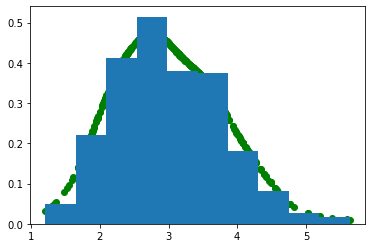

 mean loglikelihood of p_g  -1.16625667
Gradient cte -0.00234511661529541
 Cte Update  1.9020893687009806

 pn/(pn+pm) 2 0.720141

 std dev y_predit 0.7892917
mean y_predit 2.9981456
pn/(pn+pm)  0.649913251
std dev y_pred 0.789291739
 model train on batch  -0.7092989683151245
############ iteration  482 ################
 p_nx  [0.427939892 0.423951119 0.411039 ... 0.425437331 0.424387574 0.428082347]


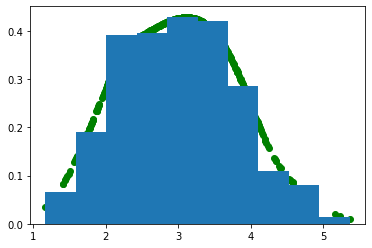

 mean loglikelihood of p_g  -1.18497252
Gradient cte 0.00110815167427063
 Cte Update  1.9031975203752511

 pn/(pn+pm) 2 0.729635

 std dev y_predit 0.80034727
mean y_predit 3.0063176
pn/(pn+pm)  0.663935602
std dev y_pred 0.800347269
 model train on batch  -0.6907326579093933
############ iteration  483 ################
 p_nx  [0.448582381 0.477226198 0.462811112 ... 0.476531953 0.444702625 0.470874876]


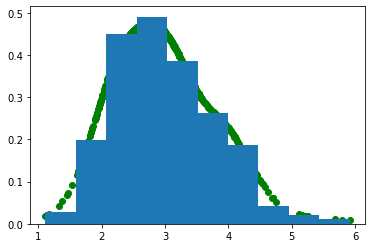

 mean loglikelihood of p_g  -1.17116177
Gradient cte -0.0024034597873687745
 Cte Update  1.9007940605878824

 pn/(pn+pm) 2 0.71500427

 std dev y_predit 0.80555177
mean y_predit 2.9844081
pn/(pn+pm)  0.646799862
std dev y_pred 0.805551767
 model train on batch  -0.7257488965988159
############ iteration  484 ################
 p_nx  [0.505642533 0.502322078 0.522713065 ... 0.48316136 0.487613738 0.402487427]


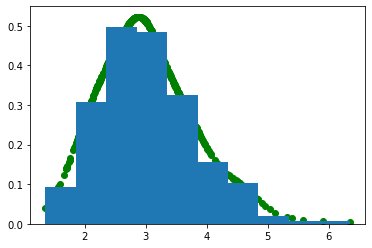

 mean loglikelihood of p_g  -1.14982796
Gradient cte 0.00018973040580749513
 Cte Update  1.9009837909936897

 pn/(pn+pm) 2 0.69414127

 std dev y_predit 0.7922666
mean y_predit 3.025
pn/(pn+pm)  0.619264
std dev y_pred 0.792266548
 model train on batch  -0.774730920791626
############ iteration  485 ################
 p_nx  [0.459384471 0.424943864 0.434322178 ... 0.385327399 0.416721314 0.458832353]


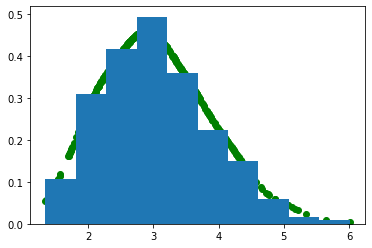

 mean loglikelihood of p_g  -1.20936239
Gradient cte 0.004197826385498047
 Cte Update  1.9051816173791878

 pn/(pn+pm) 2 0.716448

 std dev y_predit 0.82805365
mean y_predit 3.0417192
pn/(pn+pm)  0.648233771
std dev y_pred 0.828053653
 model train on batch  -0.7255557775497437
############ iteration  486 ################
 p_nx  [0.483547658 0.477359802 0.479899734 ... 0.483454496 0.469320774 0.47465536]


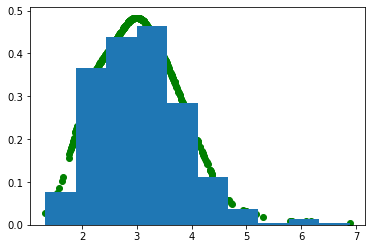

 mean loglikelihood of p_g  -1.14951766
Gradient cte 0.004459519386291504
 Cte Update  1.9096411367654793

 pn/(pn+pm) 2 0.7040824

 std dev y_predit 0.80180705
mean y_predit 3.0627434
pn/(pn+pm)  0.632553577
std dev y_pred 0.801807046
 model train on batch  -0.750080406665802
############ iteration  487 ################
 p_nx  [0.404437244 0.355629295 0.418194145 ... 0.412616074 0.423817515 0.454586178]


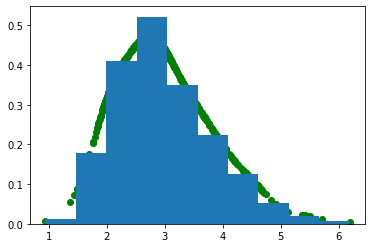

 mean loglikelihood of p_g  -1.20277083
Gradient cte -0.005380222797393799
 Cte Update  1.9042609139680855

 pn/(pn+pm) 2 0.7216381

 std dev y_predit 0.8398138
mean y_predit 2.9858122
pn/(pn+pm)  0.653279364
std dev y_pred 0.839813828
 model train on batch  -0.7097799181938171
############ iteration  488 ################
 p_nx  [0.326037824 0.472201258 0.432585835 ... 0.471627444 0.336937696 0.470869035]


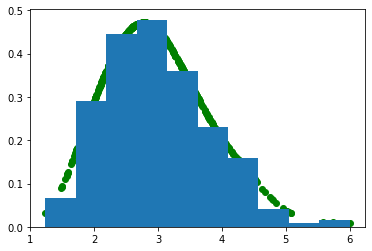

 mean loglikelihood of p_g  -1.18842435
Gradient cte -0.0008818733692169189
 Cte Update  1.9033790405988686

 pn/(pn+pm) 2 0.7159757

 std dev y_predit 0.8203806
mean y_predit 2.9990227
pn/(pn+pm)  0.645887375
std dev y_pred 0.820380628
 model train on batch  -0.7227808237075806
############ iteration  489 ################
 p_nx  [0.479898602 0.437338889 0.446952641 ... 0.461467534 0.480241984 0.449556261]


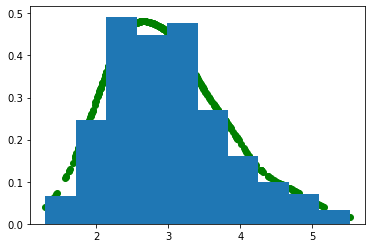

 mean loglikelihood of p_g  -1.17742538
Gradient cte 0.0014652900695800782
 Cte Update  1.9048443306684488

 pn/(pn+pm) 2 0.7177744

 std dev y_predit 0.8168756
mean y_predit 2.9922798
pn/(pn+pm)  0.648342192
std dev y_pred 0.816875577
 model train on batch  -0.7191363573074341
############ iteration  490 ################
 p_nx  [0.449761033 0.42571941 0.462305367 ... 0.45230335 0.454448551 0.441946059]


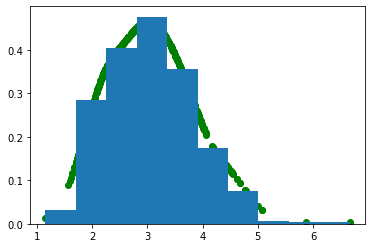

 mean loglikelihood of p_g  -1.16454959
Gradient cte -0.0003056175708770752
 Cte Update  1.9045387130975717

 pn/(pn+pm) 2 0.7125892

 std dev y_predit 0.7968296
mean y_predit 3.065323
pn/(pn+pm)  0.641802549
std dev y_pred 0.796829581
 model train on batch  -0.7294870615005493
############ iteration  491 ################
 p_nx  [0.487891 0.489975274 0.490568131 ... 0.493170589 0.492432266 0.485810935]


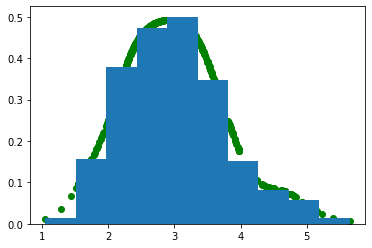

 mean loglikelihood of p_g  -1.13005507
Gradient cte -0.00011304974555969239
 Cte Update  1.904425663352012

 pn/(pn+pm) 2 0.70035356

 std dev y_predit 0.76861644
mean y_predit 2.992748
pn/(pn+pm)  0.621999264
std dev y_pred 0.768616438
 model train on batch  -0.7500632405281067
############ iteration  492 ################
 p_nx  [0.404195487 0.465810418 0.476089984 ... 0.402591288 0.472878367 0.464899957]


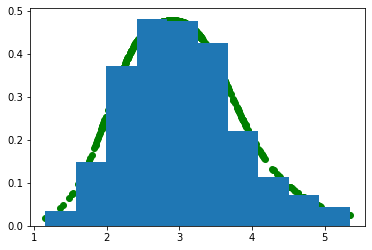

 mean loglikelihood of p_g  -1.14621437
Gradient cte 0.007122202873229981
 Cte Update  1.911547866225242

 pn/(pn+pm) 2 0.7070273

 std dev y_predit 0.7778954
mean y_predit 3.0290742
pn/(pn+pm)  0.632686198
std dev y_pred 0.777895391
 model train on batch  -0.7369940280914307
############ iteration  493 ################
 p_nx  [0.45768559 0.461757213 0.47351104 ... 0.473578095 0.434622377 0.473489136]


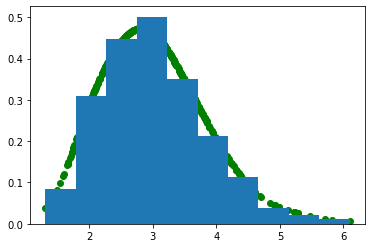

 mean loglikelihood of p_g  -1.17925024
Gradient cte -4.591667652130127e-05
 Cte Update  1.9115019495487209

 pn/(pn+pm) 2 0.7112748

 std dev y_predit 0.81485325
mean y_predit 3.0112026
pn/(pn+pm)  0.640296698
std dev y_pred 0.814853251
 model train on batch  -0.7314571738243103
############ iteration  494 ################
 p_nx  [0.466170818 0.483954787 0.41361028 ... 0.439038038 0.409492165 0.439479768]


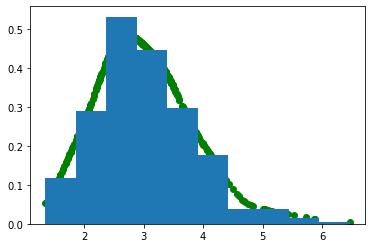

 mean loglikelihood of p_g  -1.19228089
Gradient cte 0.0013606557846069336
 Cte Update  1.9128626053333277

 pn/(pn+pm) 2 0.71263635

 std dev y_predit 0.8319169
mean y_predit 3.01706
pn/(pn+pm)  0.637142658
std dev y_pred 0.831916928
 model train on batch  -0.7218387722969055
############ iteration  495 ################
 p_nx  [0.420447171 0.444927454 0.472924143 ... 0.456546485 0.486310393 0.482620716]


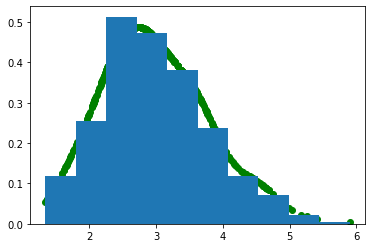

 mean loglikelihood of p_g  -1.16561079
Gradient cte 0.001643101453781128
 Cte Update  1.914505706787109

 pn/(pn+pm) 2 0.71503454

 std dev y_predit 0.79403675
mean y_predit 2.9864445
pn/(pn+pm)  0.642980874
std dev y_pred 0.794036746
 model train on batch  -0.718389630317688
############ iteration  496 ################
 p_nx  [0.433994055 0.423806608 0.443612963 ... 0.445367485 0.445323735 0.432938069]


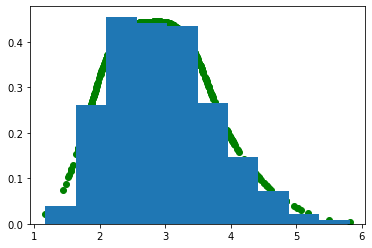

 mean loglikelihood of p_g  -1.15650856
Gradient cte 0.004146080017089843
 Cte Update  1.9186517868041988

 pn/(pn+pm) 2 0.7218099

 std dev y_predit 0.7910746
mean y_predit 2.9532304
pn/(pn+pm)  0.652701437
std dev y_pred 0.791074634
 model train on batch  -0.70583176612854
############ iteration  497 ################
 p_nx  [0.466239303 0.461783201 0.443439335 ... 0.450302452 0.459290951 0.458921641]


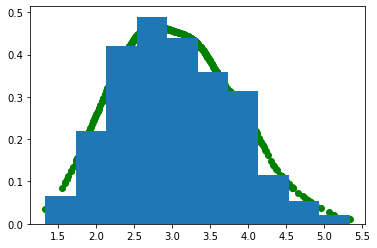

 mean loglikelihood of p_g  -1.12761104
Gradient cte 0.0042938594818115235
 Cte Update  1.9229456462860104

 pn/(pn+pm) 2 0.7113731

 std dev y_predit 0.7579919
mean y_predit 3.0381074
pn/(pn+pm)  0.636797071
std dev y_pred 0.75799191
 model train on batch  -0.7207222580909729
############ iteration  498 ################
 p_nx  [0.432536125 0.536859751 0.381918967 ... 0.440966189 0.461890876 0.473615378]


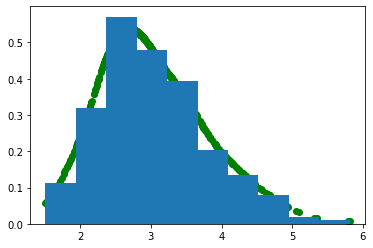

 mean loglikelihood of p_g  -1.11038947
Gradient cte -0.0003372254371643066
 Cte Update  1.922608420848846

 pn/(pn+pm) 2 0.70526284

 std dev y_predit 0.76549464
mean y_predit 3.0299459
pn/(pn+pm)  0.628341436
std dev y_pred 0.765494704
 model train on batch  -0.7356561422348022
############ iteration  499 ################
 p_nx  [0.426980466 0.465999484 0.455334634 ... 0.431225747 0.359561503 0.434916764]


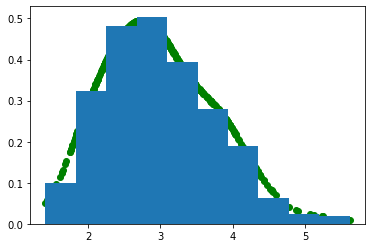

 mean loglikelihood of p_g  -1.12257874
Gradient cte -0.0008815388679504395
 Cte Update  1.9217268819808957

 pn/(pn+pm) 2 0.713218

 std dev y_predit 0.7650694
mean y_predit 2.9830487
pn/(pn+pm)  0.643391728
std dev y_pred 0.765069425
 model train on batch  -0.7250428795814514
############ iteration  500 ################
 p_nx  [0.455370247 0.431457132 0.470542699 ... 0.493755788 0.456833065 0.460498393]


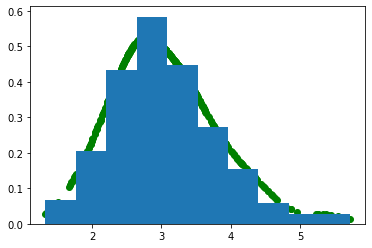

 mean loglikelihood of p_g  -1.12586021
Gradient cte 0.003587155342102051
 Cte Update  1.9253140373229978

 pn/(pn+pm) 2 0.69239295

 std dev y_predit 0.7709191
mean y_predit 3.0488982
pn/(pn+pm)  0.612576187
std dev y_pred 0.770919085
 model train on batch  -0.7626953125
############ iteration  501 ################
 p_nx  [0.493875653 0.489574522 0.496355772 ... 0.493824542 0.481849939 0.477177262]


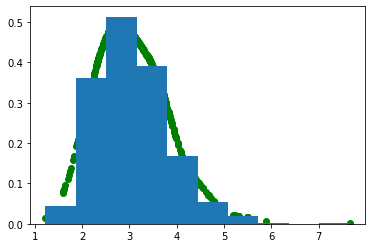

 mean loglikelihood of p_g  -1.1282649
Gradient cte 0.0005774416923522949
 Cte Update  1.92589147901535

 pn/(pn+pm) 2 0.7056049

 std dev y_predit 0.786305
mean y_predit 3.0548391
pn/(pn+pm)  0.629318237
std dev y_pred 0.786305
 model train on batch  -0.7360819578170776
############ iteration  502 ################
 p_nx  [0.478112906 0.500881732 0.414313197 ... 0.450937808 0.51437068 0.468596488]


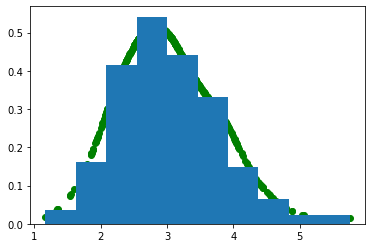

 mean loglikelihood of p_g  -1.12552559
Gradient cte 0.001460887312889099
 Cte Update  1.9273523663282393

 pn/(pn+pm) 2 0.6983898

 std dev y_predit 0.7672958
mean y_predit 3.0235825
pn/(pn+pm)  0.622958481
std dev y_pred 0.767295837
 model train on batch  -0.7566760778427124
############ iteration  503 ################
 p_nx  [0.464147508 0.463997483 0.461129457 ... 0.463051945 0.461859614 0.439994335]


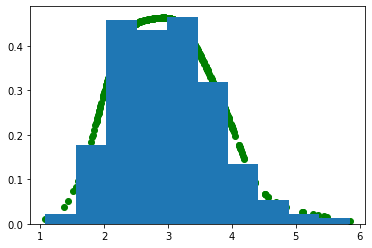

 mean loglikelihood of p_g  -1.1248523
Gradient cte -0.0007718710899353027
 Cte Update  1.9265804952383039

 pn/(pn+pm) 2 0.7140701

 std dev y_predit 0.76759213
mean y_predit 2.9916978
pn/(pn+pm)  0.642795444
std dev y_pred 0.767592192
 model train on batch  -0.7207670211791992
############ iteration  504 ################
 p_nx  [0.407656133 0.512682557 0.49777931 ... 0.508501 0.427302897 0.499357879]


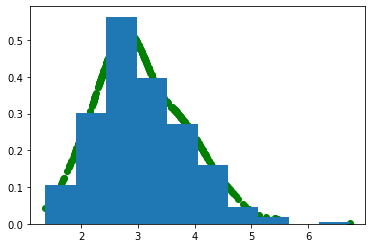

 mean loglikelihood of p_g  -1.15023184
Gradient cte -0.003897035598754883
 Cte Update  1.922683459639549

 pn/(pn+pm) 2 0.7020687

 std dev y_predit 0.7905933
mean y_predit 3.0567641
pn/(pn+pm)  0.628911793
std dev y_pred 0.790593326
 model train on batch  -0.750175416469574
############ iteration  505 ################
 p_nx  [0.538662434 0.476156056 0.5444538 ... 0.478943259 0.544619501 0.508895874]


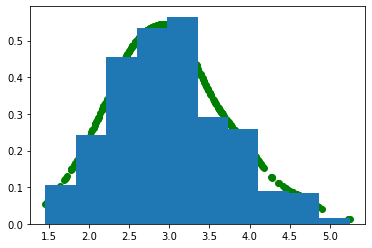

 mean loglikelihood of p_g  -1.07235754
Gradient cte -0.0039376382827758785
 Cte Update  1.9187458213567732

 pn/(pn+pm) 2 0.6826562

 std dev y_predit 0.7197722
mean y_predit 3.010323
pn/(pn+pm)  0.602356672
std dev y_pred 0.71977222
 model train on batch  -0.7900881171226501
############ iteration  506 ################
 p_nx  [0.438536286 0.429210603 0.420824826 ... 0.435868263 0.437153757 0.442224115]


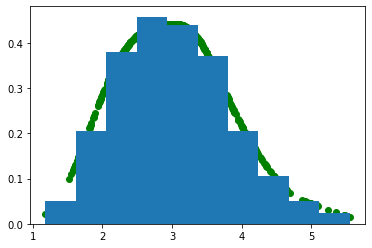

 mean loglikelihood of p_g  -1.1865375
Gradient cte 0.002589276313781738
 Cte Update  1.921335097670555

 pn/(pn+pm) 2 0.71864855

 std dev y_predit 0.8120812
mean y_predit 3.0246916
pn/(pn+pm)  0.648753226
std dev y_pred 0.812081277
 model train on batch  -0.7098117470741272
############ iteration  507 ################
 p_nx  [0.444324702 0.44247511 0.405798972 ... 0.443323702 0.433116466 0.442623883]


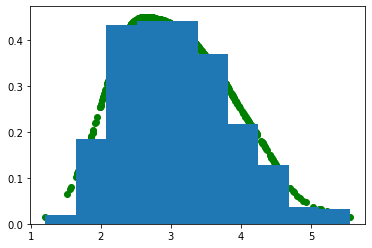

 mean loglikelihood of p_g  -1.16274118
Gradient cte 0.0067984132766723635
 Cte Update  1.9281335109472273

 pn/(pn+pm) 2 0.72557384

 std dev y_predit 0.795197
mean y_predit 3.083266
pn/(pn+pm)  0.658993244
std dev y_pred 0.795197
 model train on batch  -0.6965359449386597
############ iteration  508 ################
 p_nx  [0.400362372 0.446784526 0.421638727 ... 0.465609223 0.455647618 0.419740051]


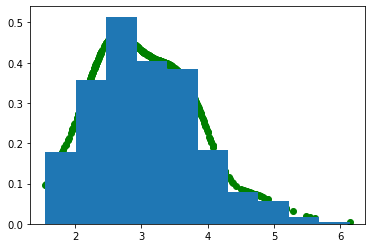

 mean loglikelihood of p_g  -1.17247975
Gradient cte 0.002102487564086914
 Cte Update  1.9302359985113142

 pn/(pn+pm) 2 0.72892284

 std dev y_predit 0.8120802
mean y_predit 3.0581312
pn/(pn+pm)  0.658486426
std dev y_pred 0.812080204
 model train on batch  -0.6817571520805359
############ iteration  509 ################
 p_nx  [0.457271338 0.452823848 0.440858334 ... 0.434670061 0.446559191 0.47744903]


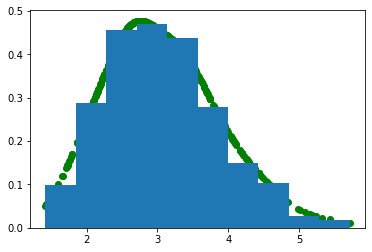

 mean loglikelihood of p_g  -1.16930914
Gradient cte -0.001443349838256836
 Cte Update  1.9287926486730573

 pn/(pn+pm) 2 0.7106553

 std dev y_predit 0.79763997
mean y_predit 3.0634384
pn/(pn+pm)  0.635969222
std dev y_pred 0.79764
 model train on batch  -0.7227336168289185
############ iteration  510 ################
 p_nx  [0.533980668 0.522724271 0.484401524 ... 0.48308143 0.525384545 0.42107594]


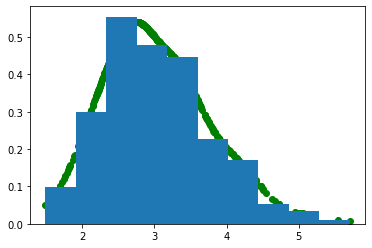

 mean loglikelihood of p_g  -1.08411562
Gradient cte -0.004618439674377441
 Cte Update  1.92417420899868

 pn/(pn+pm) 2 0.6915298

 std dev y_predit 0.73664564
mean y_predit 3.029907
pn/(pn+pm)  0.608907461
std dev y_pred 0.736645639
 model train on batch  -0.7590140104293823
############ iteration  511 ################
 p_nx  [0.474018872 0.450549662 0.420517921 ... 0.476259828 0.475681067 0.452738583]


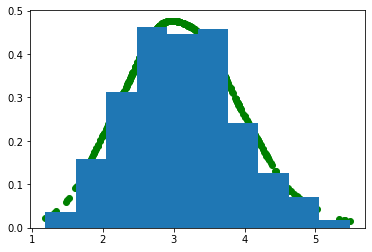

 mean loglikelihood of p_g  -1.16754758
Gradient cte -0.002566479682922363
 Cte Update  1.9216077293157576

 pn/(pn+pm) 2 0.70421875

 std dev y_predit 0.78208065
mean y_predit 3.121742
pn/(pn+pm)  0.629790187
std dev y_pred 0.78208065
 model train on batch  -0.7416233420372009
############ iteration  512 ################
 p_nx  [0.490595043 0.485277504 0.487913072 ... 0.464403 0.49916932 0.499074608]


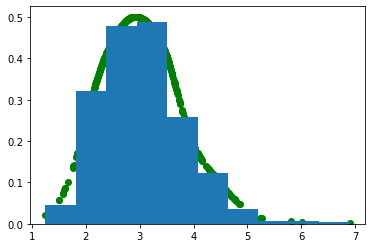

 mean loglikelihood of p_g  -1.11747468
Gradient cte 0.006195513248443604
 Cte Update  1.9278032425642013

 pn/(pn+pm) 2 0.696939

 std dev y_predit 0.7671961
mean y_predit 3.0415454
pn/(pn+pm)  0.618684232
std dev y_pred 0.767196119
 model train on batch  -0.7551118731498718
############ iteration  513 ################
 p_nx  [0.465811968 0.481578887 0.491554409 ... 0.472213179 0.489068419 0.455773]


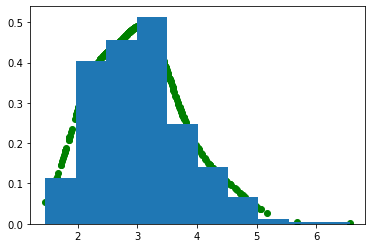

 mean loglikelihood of p_g  -1.13310361
Gradient cte -0.0054075450897216795
 Cte Update  1.9223956974744796

 pn/(pn+pm) 2 0.69922036

 std dev y_predit 0.780729
mean y_predit 3.0339627
pn/(pn+pm)  0.625288725
std dev y_pred 0.780729
 model train on batch  -0.7551805973052979
############ iteration  514 ################
 p_nx  [0.520532906 0.516884923 0.52107209 ... 0.517842114 0.520815969 0.465019673]


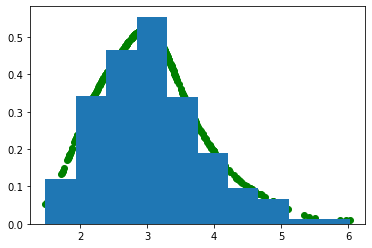

 mean loglikelihood of p_g  -1.14228487
Gradient cte -0.005698622226715088
 Cte Update  1.9166970752477646

 pn/(pn+pm) 2 0.68580943

 std dev y_predit 0.79313385
mean y_predit 3.0611978
pn/(pn+pm)  0.609894514
std dev y_pred 0.793133855
 model train on batch  -0.7886265516281128
############ iteration  515 ################
 p_nx  [0.457427472 0.410642087 0.468500406 ... 0.477962226 0.4129062 0.477126777]


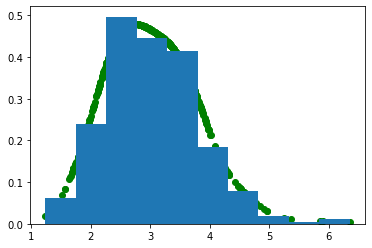

 mean loglikelihood of p_g  -1.12501872
Gradient cte 0.0003762897253036499
 Cte Update  1.9170733649730682

 pn/(pn+pm) 2 0.7115393

 std dev y_predit 0.76822037
mean y_predit 3.031536
pn/(pn+pm)  0.637358189
std dev y_pred 0.768220365
 model train on batch  -0.7231419682502747
############ iteration  516 ################
 p_nx  [0.527557552 0.494029701 0.384734213 ... 0.494145364 0.512057602 0.536323249]


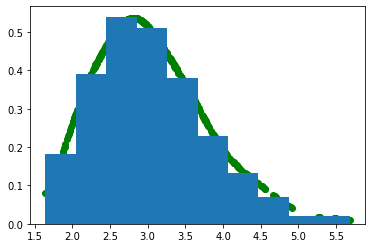

 mean loglikelihood of p_g  -1.07386231
Gradient cte 0.00036637067794799806
 Cte Update  1.9174397356510162

 pn/(pn+pm) 2 0.6910701

 std dev y_predit 0.73826796
mean y_predit 3.0365076
pn/(pn+pm)  0.611763656
std dev y_pred 0.738267899
 model train on batch  -0.7689880132675171
############ iteration  517 ################
 p_nx  [0.445574582 0.50024277 0.431557745 ... 0.385285497 0.483215034 0.483467191]


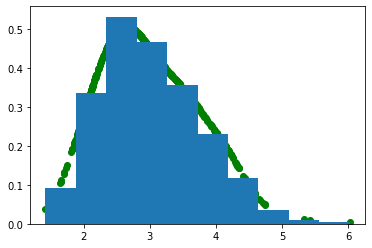

 mean loglikelihood of p_g  -1.0999763
Gradient cte 0.005395925045013428
 Cte Update  1.9228356606960297

 pn/(pn+pm) 2 0.7206019

 std dev y_predit 0.7538572
mean y_predit 3.0113866
pn/(pn+pm)  0.648644209
std dev y_pred 0.753857195
 model train on batch  -0.7033786177635193
############ iteration  518 ################
 p_nx  [0.419337749 0.455482095 0.463889092 ... 0.508637 0.507726371 0.401994109]


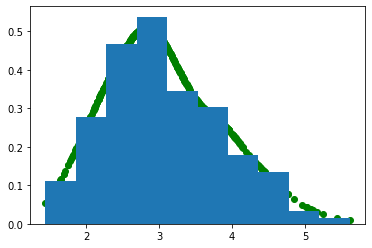

 mean loglikelihood of p_g  -1.15375173
Gradient cte 0.0017623791694641113
 Cte Update  1.9245980398654938

 pn/(pn+pm) 2 0.69945174

 std dev y_predit 0.7904801
mean y_predit 3.0639122
pn/(pn+pm)  0.627945304
std dev y_pred 0.790480196
 model train on batch  -0.7578413486480713
############ iteration  519 ################
 p_nx  [0.497643083 0.417527258 0.405303895 ... 0.499296695 0.497529894 0.486403167]


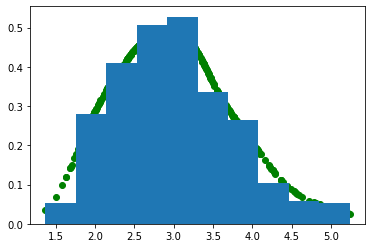

 mean loglikelihood of p_g  -1.11022091
Gradient cte 0.001633551001548767
 Cte Update  1.9262315908670427

 pn/(pn+pm) 2 0.6948608

 std dev y_predit 0.7551506
mean y_predit 3.0018702
pn/(pn+pm)  0.619911611
std dev y_pred 0.755150616
 model train on batch  -0.7629327178001404
############ iteration  520 ################
 p_nx  [0.463222 0.482688844 0.490645558 ... 0.489153087 0.485382795 0.490378916]


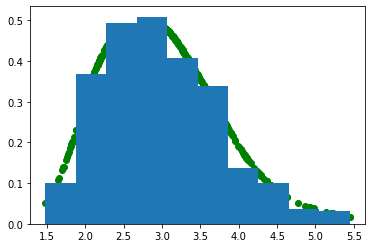

 mean loglikelihood of p_g  -1.09687746
Gradient cte 0.003163010597229004
 Cte Update  1.9293946014642716

 pn/(pn+pm) 2 0.7065814

 std dev y_predit 0.7555521
mean y_predit 2.9849968
pn/(pn+pm)  0.635060668
std dev y_pred 0.755552113
 model train on batch  -0.740105390548706
############ iteration  521 ################
 p_nx  [0.542758822 0.520608366 0.447933674 ... 0.506344676 0.476088405 0.531726182]


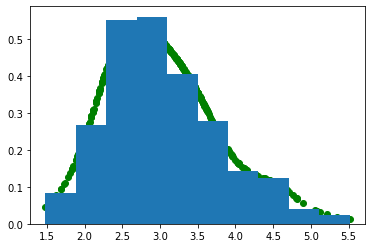

 mean loglikelihood of p_g  -1.08734477
Gradient cte 0.0030352556705474853
 Cte Update  1.932429857134819

 pn/(pn+pm) 2 0.697542

 std dev y_predit 0.7523932
mean y_predit 3.0366201
pn/(pn+pm)  0.617742896
std dev y_pred 0.752393186
 model train on batch  -0.7502480745315552
############ iteration  522 ################
 p_nx  [0.48781842 0.478439033 0.464345217 ... 0.484860688 0.487101346 0.48672545]


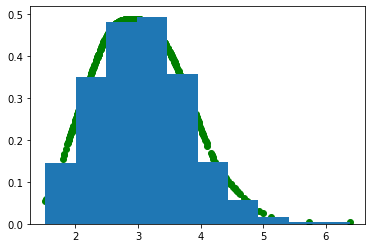

 mean loglikelihood of p_g  -1.09178936
Gradient cte 0.0031728048324584962
 Cte Update  1.9356026619672775

 pn/(pn+pm) 2 0.7027703

 std dev y_predit 0.73939306
mean y_predit 3.0542593
pn/(pn+pm)  0.626070082
std dev y_pred 0.739393055
 model train on batch  -0.7404831051826477
############ iteration  523 ################
 p_nx  [0.433775365 0.482085258 0.503918171 ... 0.44786638 0.411826879 0.505121291]


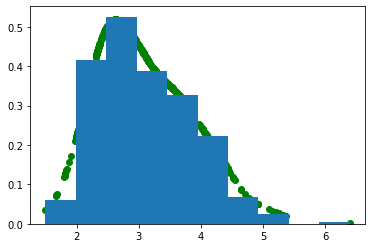

 mean loglikelihood of p_g  -1.11023879
Gradient cte 0.0048083972930908206
 Cte Update  1.9404110592603683

 pn/(pn+pm) 2 0.7212154

 std dev y_predit 0.77372664
mean y_predit 3.099601
pn/(pn+pm)  0.650495172
std dev y_pred 0.773726642
 model train on batch  -0.7002320885658264
############ iteration  524 ################
 p_nx  [0.495225728 0.500948131 0.482434571 ... 0.510153711 0.484483302 0.503223538]


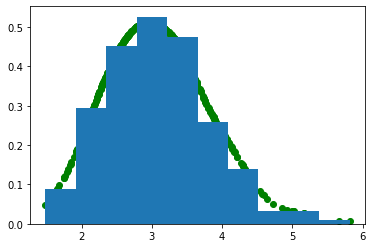

 mean loglikelihood of p_g  -1.09677529
Gradient cte -0.0012817931175231933
 Cte Update  1.939129266142845

 pn/(pn+pm) 2 0.6911365

 std dev y_predit 0.73854804
mean y_predit 3.0851343
pn/(pn+pm)  0.61118722
std dev y_pred 0.73854804
 model train on batch  -0.7649115324020386
############ iteration  525 ################
 p_nx  [0.492772639 0.503070474 0.497121543 ... 0.472613245 0.514499426 0.493311942]


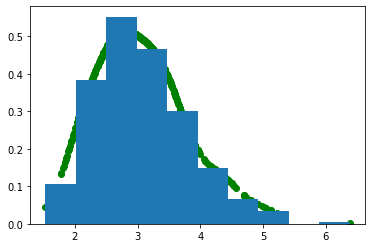

 mean loglikelihood of p_g  -1.08748078
Gradient cte -0.011623421669006347
 Cte Update  1.9275058444738387

 pn/(pn+pm) 2 0.69300896

 std dev y_predit 0.75287354
mean y_predit 3.0626094
pn/(pn+pm)  0.612303078
std dev y_pred 0.75287354
 model train on batch  -0.7595499753952026
############ iteration  526 ################
 p_nx  [0.476519018 0.466465 0.47321716 ... 0.480738223 0.478236705 0.471362144]


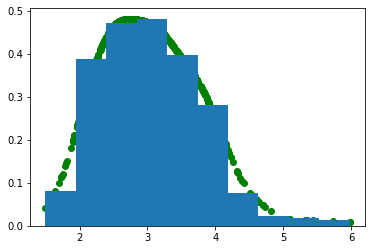

 mean loglikelihood of p_g  -1.08352351
Gradient cte -0.0005679186582565307
 Cte Update  1.926937925815582

 pn/(pn+pm) 2 0.7098083

 std dev y_predit 0.7452092
mean y_predit 3.058147
pn/(pn+pm)  0.63588351
std dev y_pred 0.745209157
 model train on batch  -0.7276087403297424
############ iteration  527 ################
 p_nx  [0.527058959 0.487729102 0.448544949 ... 0.475988746 0.533886194 0.534332156]


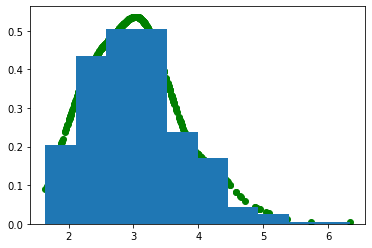

 mean loglikelihood of p_g  -1.07320225
Gradient cte -0.0041947212219238285
 Cte Update  1.9227432045936583

 pn/(pn+pm) 2 0.6834633

 std dev y_predit 0.7394656
mean y_predit 3.0311625
pn/(pn+pm)  0.603417516
std dev y_pred 0.739465594
 model train on batch  -0.7881138920783997
############ iteration  528 ################
 p_nx  [0.489632875 0.468960404 0.491741717 ... 0.483373135 0.467877537 0.474158823]


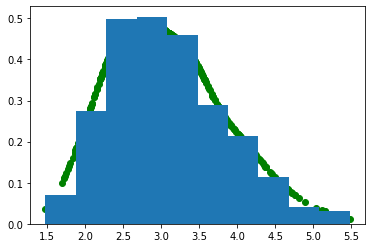

 mean loglikelihood of p_g  -1.10521412
Gradient cte -0.0017908031940460205
 Cte Update  1.9209524013996122

 pn/(pn+pm) 2 0.7077549

 std dev y_predit 0.7555853
mean y_predit 3.073287
pn/(pn+pm)  0.631357
std dev y_pred 0.755585313
 model train on batch  -0.7309964895248413
############ iteration  529 ################
 p_nx  [0.479017258 0.47806254 0.464641333 ... 0.476458132 0.426894754 0.454067558]


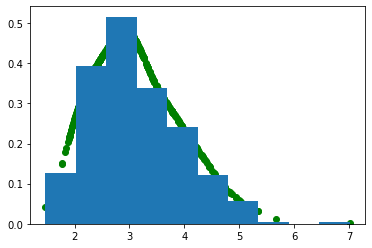

 mean loglikelihood of p_g  -1.17895377
Gradient cte -0.005779719352722168
 Cte Update  1.91517268204689

 pn/(pn+pm) 2 0.70740795

 std dev y_predit 0.8276128
mean y_predit 3.1238363
pn/(pn+pm)  0.639864564
std dev y_pred 0.827612817
 model train on batch  -0.749290406703949
############ iteration  530 ################
 p_nx  [0.495276719 0.525475264 0.517622173 ... 0.553907096 0.553562224 0.540666044]


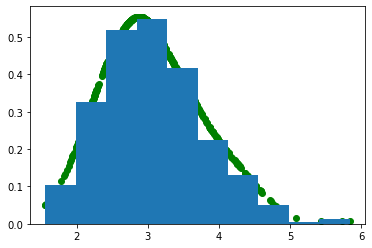

 mean loglikelihood of p_g  -1.0588088
Gradient cte -0.00143805730342865
 Cte Update  1.9137346247434612

 pn/(pn+pm) 2 0.6831107

 std dev y_predit 0.7164594
mean y_predit 3.076961
pn/(pn+pm)  0.600895107
std dev y_pred 0.716459394
 model train on batch  -0.7884074449539185
############ iteration  531 ################
 p_nx  [0.504887223 0.470721781 0.431480587 ... 0.46126008 0.437361628 0.460070819]


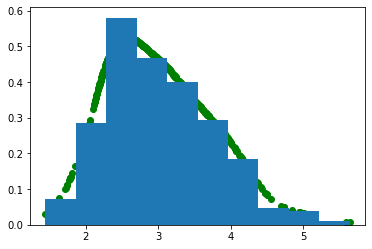

 mean loglikelihood of p_g  -1.06858587
Gradient cte 0.005920845031738281
 Cte Update  1.9196554697751995

 pn/(pn+pm) 2 0.716358

 std dev y_predit 0.7371475
mean y_predit 3.022676
pn/(pn+pm)  0.643371
std dev y_pred 0.73714751
 model train on batch  -0.7134250998497009
############ iteration  532 ################
 p_nx  [0.501418471 0.488672614 0.489600182 ... 0.479128271 0.480142355 0.501461]


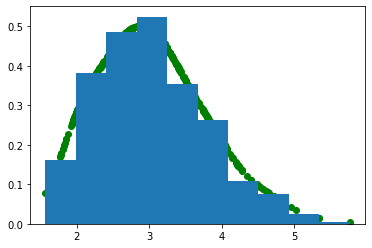

 mean loglikelihood of p_g  -1.10989892
Gradient cte -0.0005842819213867187
 Cte Update  1.9190711878538127

 pn/(pn+pm) 2 0.69723874

 std dev y_predit 0.7585299
mean y_predit 3.026447
pn/(pn+pm)  0.621919572
std dev y_pred 0.758529902
 model train on batch  -0.758720874786377
############ iteration  533 ################
 p_nx  [0.500788808 0.525761 0.525052965 ... 0.502960563 0.473646969 0.494816184]


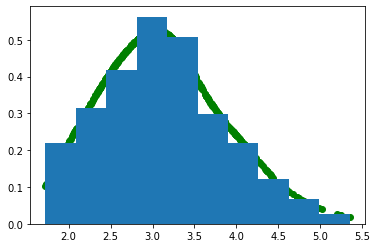

 mean loglikelihood of p_g  -1.08463109
Gradient cte 0.0010616002082824707
 Cte Update  1.920132788062095

 pn/(pn+pm) 2 0.68602663

 std dev y_predit 0.73219484
mean y_predit 3.1189048
pn/(pn+pm)  0.60682708
std dev y_pred 0.732194841
 model train on batch  -0.781580924987793
############ iteration  534 ################
 p_nx  [0.515904188 0.519193113 0.515914 ... 0.513322234 0.520623803 0.512811124]


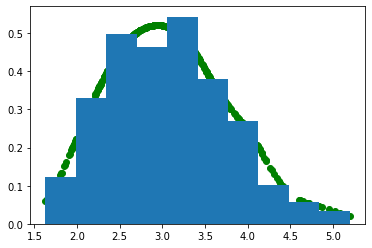

 mean loglikelihood of p_g  -1.03652
Gradient cte 0.003474046230316162
 Cte Update  1.9236068342924113

 pn/(pn+pm) 2 0.68925107

 std dev y_predit 0.699168
mean y_predit 3.0745056
pn/(pn+pm)  0.608099043
std dev y_pred 0.699168086
 model train on batch  -0.7705260515213013
############ iteration  535 ################
 p_nx  [0.48630622 0.489282072 0.485795408 ... 0.439432204 0.500020504 0.501908839]


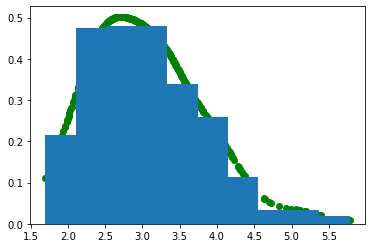

 mean loglikelihood of p_g  -1.09649611
Gradient cte 0.002690065860748291
 Cte Update  1.9262969001531596

 pn/(pn+pm) 2 0.7041952

 std dev y_predit 0.75674075
mean y_predit 3.048059
pn/(pn+pm)  0.628044546
std dev y_pred 0.756740689
 model train on batch  -0.7388942241668701
############ iteration  536 ################
 p_nx  [0.438637733 0.526774526 0.459818184 ... 0.538843572 0.446272463 0.429447263]


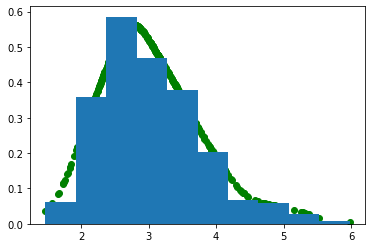

 mean loglikelihood of p_g  -1.07996523
Gradient cte 0.0011072134971618652
 Cte Update  1.9274041136503215

 pn/(pn+pm) 2 0.6867488

 std dev y_predit 0.75292295
mean y_predit 3.0340862
pn/(pn+pm)  0.603507698
std dev y_pred 0.752923
 model train on batch  -0.7728990912437439
############ iteration  537 ################
 p_nx  [0.441708624 0.520304143 0.489781141 ... 0.537669361 0.517121375 0.526458144]


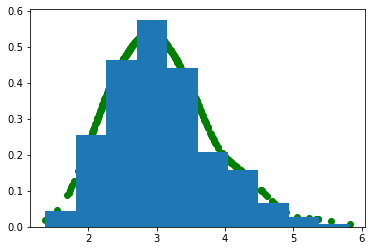

 mean loglikelihood of p_g  -1.08166385
Gradient cte 0.0006511826515197753
 Cte Update  1.9280552963018414

 pn/(pn+pm) 2 0.6849

 std dev y_predit 0.74136674
mean y_predit 3.0743413
pn/(pn+pm)  0.603922
std dev y_pred 0.741366744
 model train on batch  -0.7834540009498596
############ iteration  538 ################
 p_nx  [0.559543192 0.54130137 0.532176435 ... 0.569434345 0.499142438 0.491475642]


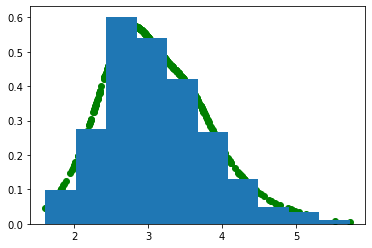

 mean loglikelihood of p_g  -1.03079736
Gradient cte -0.003626013994216919
 Cte Update  1.9244292823076243

 pn/(pn+pm) 2 0.68206835

 std dev y_predit 0.69992673
mean y_predit 3.1047456
pn/(pn+pm)  0.596143603
std dev y_pred 0.699926674
 model train on batch  -0.7824360728263855
############ iteration  539 ################
 p_nx  [0.505842686 0.51132071 0.525723875 ... 0.509926319 0.493516177 0.526767254]


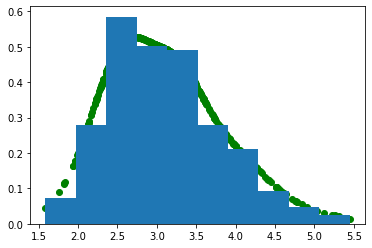

 mean loglikelihood of p_g  -1.06298387
Gradient cte 0.0017768843173980712
 Cte Update  1.9262061666250223

 pn/(pn+pm) 2 0.69326186

 std dev y_predit 0.72505766
mean y_predit 3.0956404
pn/(pn+pm)  0.61091423
std dev y_pred 0.725057662
 model train on batch  -0.7571239471435547
############ iteration  540 ################
 p_nx  [0.509820521 0.534128129 0.537388682 ... 0.529063523 0.531884432 0.473535866]


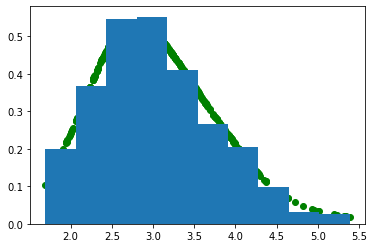

 mean loglikelihood of p_g  -1.06796205
Gradient cte -0.004168540954589844
 Cte Update  1.9220376256704326

 pn/(pn+pm) 2 0.69306827

 std dev y_predit 0.7286454
mean y_predit 3.0405915
pn/(pn+pm)  0.612945616
std dev y_pred 0.728645325
 model train on batch  -0.7640389204025269
############ iteration  541 ################
 p_nx  [0.541223168 0.43397212 0.540507257 ... 0.532934964 0.541723549 0.543778479]


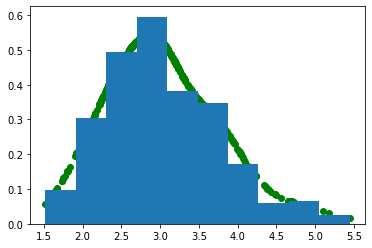

 mean loglikelihood of p_g  -1.09122264
Gradient cte -0.005699294567108154
 Cte Update  1.9163383311033244

 pn/(pn+pm) 2 0.6896272

 std dev y_predit 0.7440119
mean y_predit 3.042692
pn/(pn+pm)  0.612345338
std dev y_pred 0.744011879
 model train on batch  -0.7785871624946594
############ iteration  542 ################
 p_nx  [0.573920488 0.569138765 0.528072774 ... 0.47721982 0.488272905 0.559074819]


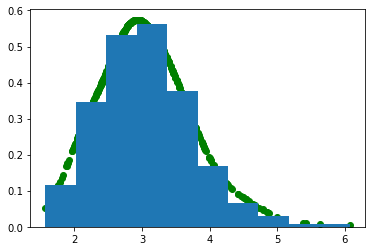

 mean loglikelihood of p_g  -1.03612638
Gradient cte -0.003123670816421509
 Cte Update  1.913214660286903

 pn/(pn+pm) 2 0.67008567

 std dev y_predit 0.70377654
mean y_predit 3.0552998
pn/(pn+pm)  0.583400905
std dev y_pred 0.703776538
 model train on batch  -0.8138971924781799
############ iteration  543 ################
 p_nx  [0.409708768 0.473403573 0.476991653 ... 0.471157879 0.475209504 0.458815932]


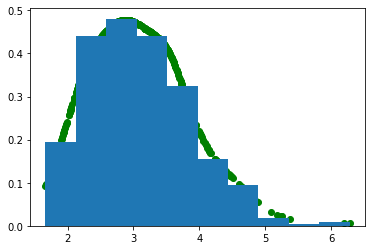

 mean loglikelihood of p_g  -1.11941373
Gradient cte 0.004662398338317871
 Cte Update  1.9178770586252207

 pn/(pn+pm) 2 0.7113893

 std dev y_predit 0.7712122
mean y_predit 3.096661
pn/(pn+pm)  0.637268484
std dev y_pred 0.77121222
 model train on batch  -0.7269245386123657
############ iteration  544 ################
 p_nx  [0.505279541 0.375565648 0.478998512 ... 0.546576917 0.363595068 0.529247]


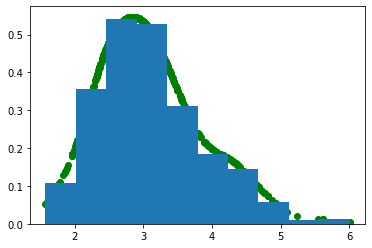

 mean loglikelihood of p_g  -1.09616697
Gradient cte -0.005289091587066651
 Cte Update  1.912587967038154

 pn/(pn+pm) 2 0.6842574

 std dev y_predit 0.76134944
mean y_predit 3.1040945
pn/(pn+pm)  0.602907956
std dev y_pred 0.761349499
 model train on batch  -0.7872952222824097
############ iteration  545 ################
 p_nx  [0.562387109 0.558505714 0.548599482 ... 0.465435177 0.550027549 0.543829]


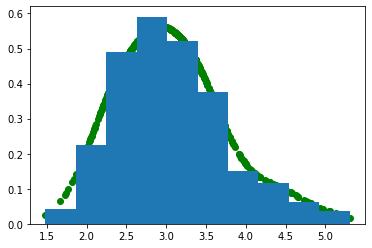

 mean loglikelihood of p_g  -1.02568889
Gradient cte 0.0013579316139221192
 Cte Update  1.913945898652076

 pn/(pn+pm) 2 0.67494744

 std dev y_predit 0.6995019
mean y_predit 3.0589058
pn/(pn+pm)  0.588124335
std dev y_pred 0.699501872
 model train on batch  -0.802193284034729
############ iteration  546 ################
 p_nx  [0.609646261 0.616483271 0.420342922 ... 0.617877901 0.401536644 0.595436633]


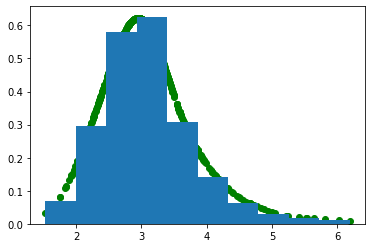

 mean loglikelihood of p_g  -1.03280807
Gradient cte 0.0014521663188934327
 Cte Update  1.9153980649709694

 pn/(pn+pm) 2 0.64905787

 std dev y_predit 0.7273983
mean y_predit 3.0963264
pn/(pn+pm)  0.556428432
std dev y_pred 0.727398336
 model train on batch  -0.8597809672355652
############ iteration  547 ################
 p_nx  [0.452560723 0.487109452 0.50216496 ... 0.500078201 0.438590467 0.489765972]


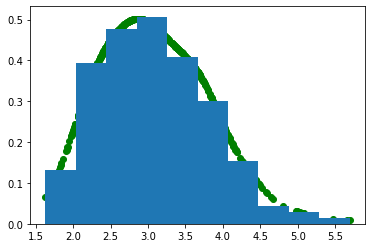

 mean loglikelihood of p_g  -1.07182574
Gradient cte -0.004708445072174073
 Cte Update  1.9106896198987953

 pn/(pn+pm) 2 0.70307547

 std dev y_predit 0.726898
mean y_predit 3.0915532
pn/(pn+pm)  0.627607346
std dev y_pred 0.726898
 model train on batch  -0.7455564141273499
############ iteration  548 ################
 p_nx  [0.507014871 0.476287752 0.461458951 ... 0.485130578 0.493250102 0.422344208]


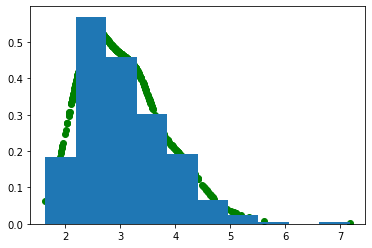

 mean loglikelihood of p_g  -1.07061779
Gradient cte 0.000595109224319458
 Cte Update  1.9112847291231148

 pn/(pn+pm) 2 0.71154505

 std dev y_predit 0.7603689
mean y_predit 3.0481339
pn/(pn+pm)  0.633578479
std dev y_pred 0.760368884
 model train on batch  -0.720154881477356
############ iteration  549 ################
 p_nx  [0.475072205 0.450893521 0.501049876 ... 0.518683612 0.51320672 0.50936687]


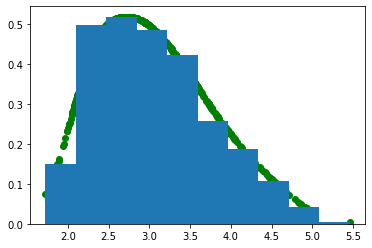

 mean loglikelihood of p_g  -1.02993083
Gradient cte 0.003968695640563965
 Cte Update  1.9152534247636788

 pn/(pn+pm) 2 0.70280254

 std dev y_predit 0.70963335
mean y_predit 3.0662754
pn/(pn+pm)  0.626208842
std dev y_pred 0.709633291
 model train on batch  -0.7441478371620178
############ iteration  550 ################
 p_nx  [0.546934903 0.56094861 0.561919868 ... 0.549805462 0.516588271 0.557220876]


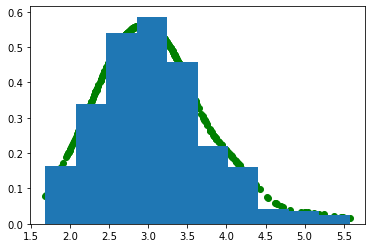

 mean loglikelihood of p_g  -1.04257584
Gradient cte -0.0015787310600280761
 Cte Update  1.9136746937036506

 pn/(pn+pm) 2 0.6729077

 std dev y_predit 0.7131348
mean y_predit 3.08083
pn/(pn+pm)  0.584829211
std dev y_pred 0.713134825
 model train on batch  -0.8063942790031433
############ iteration  551 ################
 p_nx  [0.441739589 0.511096478 0.454657495 ... 0.475240797 0.461046338 0.509731293]


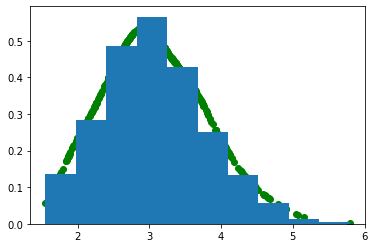

 mean loglikelihood of p_g  -1.07073569
Gradient cte 0.002488727569580078
 Cte Update  1.9161634212732308

 pn/(pn+pm) 2 0.6896314

 std dev y_predit 0.7198345
mean y_predit 3.069835
pn/(pn+pm)  0.610602856
std dev y_pred 0.719834447
 model train on batch  -0.7762328386306763
############ iteration  552 ################
 p_nx  [0.505731523 0.576914489 0.483295709 ... 0.568992734 0.576528668 0.580752909]


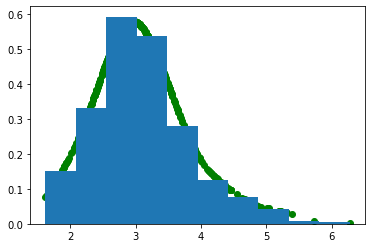

 mean loglikelihood of p_g  -1.08409286
Gradient cte -0.0023960347175598145
 Cte Update  1.913767386555671

 pn/(pn+pm) 2 0.66437584

 std dev y_predit 0.7503459
mean y_predit 3.0977736
pn/(pn+pm)  0.576629758
std dev y_pred 0.750345826
 model train on batch  -0.8292396068572998
############ iteration  553 ################
 p_nx  [0.511497259 0.501262367 0.465140104 ... 0.528220832 0.476765603 0.506044388]


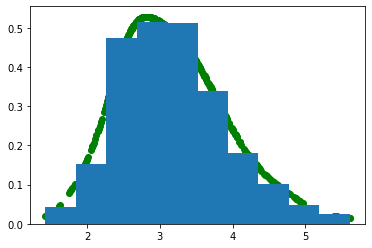

 mean loglikelihood of p_g  -1.08944678
Gradient cte 0.0003974003791809082
 Cte Update  1.914164786934852

 pn/(pn+pm) 2 0.68863565

 std dev y_predit 0.74208814
mean y_predit 3.1685548
pn/(pn+pm)  0.605101764
std dev y_pred 0.742088139
 model train on batch  -0.7704626321792603
############ iteration  554 ################
 p_nx  [0.436448097 0.500860214 0.543266594 ... 0.574506104 0.426235735 0.384999573]


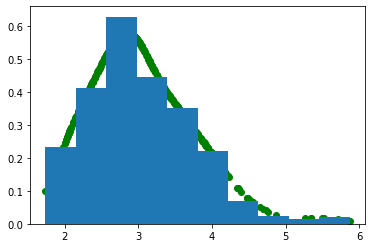

 mean loglikelihood of p_g  -1.02174258
Gradient cte -0.0011560280323028565
 Cte Update  1.913008758902549

 pn/(pn+pm) 2 0.6805769

 std dev y_predit 0.71015656
mean y_predit 3.0427883
pn/(pn+pm)  0.597921252
std dev y_pred 0.71015656
 model train on batch  -0.794070303440094
############ iteration  555 ################
 p_nx  [0.447548091 0.520506144 0.491450101 ... 0.52836746 0.482405365 0.496633947]


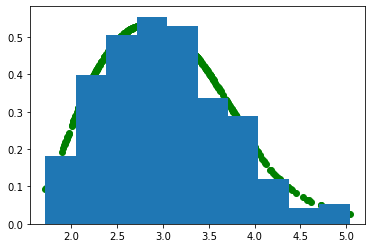

 mean loglikelihood of p_g  -1.00154245
Gradient cte 0.0051941642761230465
 Cte Update  1.9182029231786721

 pn/(pn+pm) 2 0.6933717

 std dev y_predit 0.6796711
mean y_predit 3.018342
pn/(pn+pm)  0.61120975
std dev y_pred 0.679671109
 model train on batch  -0.7586824297904968
############ iteration  556 ################
 p_nx  [0.489210933 0.493251979 0.494593501 ... 0.498459339 0.501260459 0.491436273]


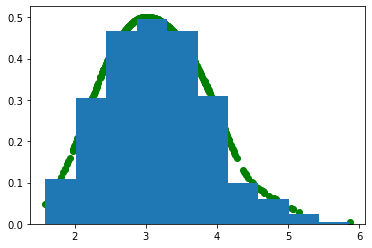

 mean loglikelihood of p_g  -1.08020592
Gradient cte 0.004517230033874511
 Cte Update  1.9227201532125466

 pn/(pn+pm) 2 0.69802725

 std dev y_predit 0.72428805
mean y_predit 3.1561966
pn/(pn+pm)  0.620958745
std dev y_pred 0.724288106
 model train on batch  -0.754085123538971
############ iteration  557 ################
 p_nx  [0.490014762 0.468969554 0.479810745 ... 0.495114982 0.455356121 0.478801]


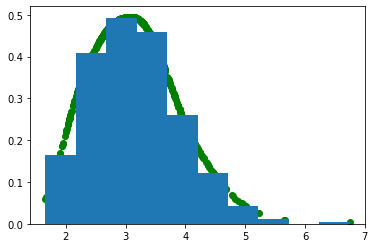

 mean loglikelihood of p_g  -1.09656847
Gradient cte 0.0001377582550048828
 Cte Update  1.9228579114675515

 pn/(pn+pm) 2 0.6966706

 std dev y_predit 0.7544098
mean y_predit 3.151188
pn/(pn+pm)  0.618684649
std dev y_pred 0.75440985
 model train on batch  -0.7540134787559509
############ iteration  558 ################
 p_nx  [0.574871957 0.578011 0.527527392 ... 0.361345917 0.564375341 0.55442816]


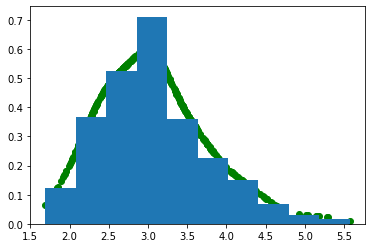

 mean loglikelihood of p_g  -1.00705588
Gradient cte 0.0005245637893676757
 Cte Update  1.923382475256919

 pn/(pn+pm) 2 0.6689312

 std dev y_predit 0.69087875
mean y_predit 3.069149
pn/(pn+pm)  0.582519174
std dev y_pred 0.690878749
 model train on batch  -0.8195276260375977
############ iteration  559 ################
 p_nx  [0.527241945 0.555526435 0.540466785 ... 0.532155097 0.486034542 0.527956426]


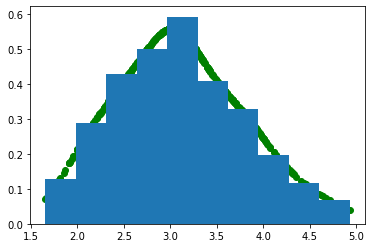

 mean loglikelihood of p_g  -1.03697705
Gradient cte -0.005815296173095703
 Cte Update  1.9175671790838233

 pn/(pn+pm) 2 0.6796012

 std dev y_predit 0.6944663
mean y_predit 3.1029327
pn/(pn+pm)  0.599238694
std dev y_pred 0.694466293
 model train on batch  -0.7985576391220093
############ iteration  560 ################
 p_nx  [0.399130404 0.498853803 0.531952381 ... 0.502296686 0.507980168 0.523506522]


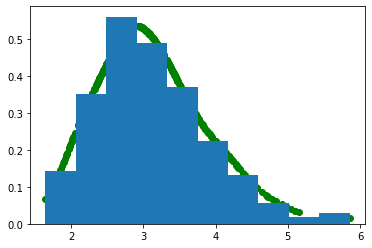

 mean loglikelihood of p_g  -1.10919321
Gradient cte 0.0005437285900115967
 Cte Update  1.918110907673835

 pn/(pn+pm) 2 0.681564

 std dev y_predit 0.77036273
mean y_predit 3.1297686
pn/(pn+pm)  0.601539254
std dev y_pred 0.770362735
 model train on batch  -0.7920318245887756
############ iteration  561 ################
 p_nx  [0.437244862 0.519765 0.577621639 ... 0.530224502 0.542298615 0.577696]


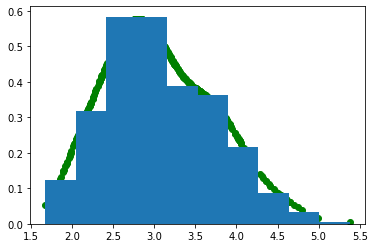

 mean loglikelihood of p_g  -0.982308
Gradient cte -0.0003482351303100586
 Cte Update  1.9177626725435248

 pn/(pn+pm) 2 0.6857165

 std dev y_predit 0.6662359
mean y_predit 3.0699766
pn/(pn+pm)  0.603139937
std dev y_pred 0.666235924
 model train on batch  -0.7798375487327576
############ iteration  562 ################
 p_nx  [0.535637259 0.48436594 0.510099173 ... 0.532696366 0.520317554 0.52751857]


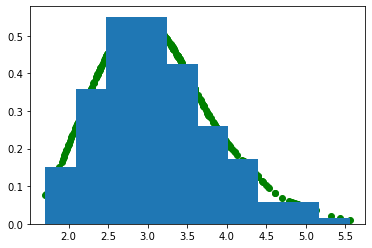

 mean loglikelihood of p_g  -1.06238806
Gradient cte -0.004478696823120117
 Cte Update  1.9132839757204048

 pn/(pn+pm) 2 0.6840123

 std dev y_predit 0.7247586
mean y_predit 3.1089962
pn/(pn+pm)  0.600529373
std dev y_pred 0.724758685
 model train on batch  -0.7839420437812805
############ iteration  563 ################
 p_nx  [0.596787393 0.540432513 0.533241272 ... 0.559073806 0.553574383 0.496881485]


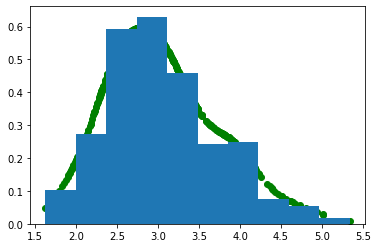

 mean loglikelihood of p_g  -0.991235673
Gradient cte -0.002509551525115967
 Cte Update  1.9107744241952889

 pn/(pn+pm) 2 0.6757157

 std dev y_predit 0.6775965
mean y_predit 3.0501626
pn/(pn+pm)  0.589169323
std dev y_pred 0.677596509
 model train on batch  -0.8018600940704346
############ iteration  564 ################
 p_nx  [0.516895056 0.514982224 0.509124279 ... 0.467785418 0.516572 0.514459968]


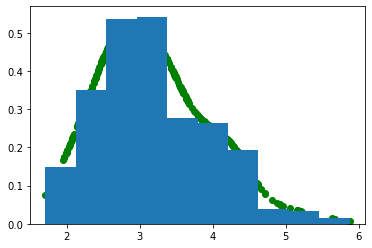

 mean loglikelihood of p_g  -1.11073434
Gradient cte -0.004685022830963135
 Cte Update  1.9060894013643257

 pn/(pn+pm) 2 0.6874497

 std dev y_predit 0.7641773
mean y_predit 3.1784399
pn/(pn+pm)  0.604751289
std dev y_pred 0.764177263
 model train on batch  -0.7751970291137695
############ iteration  565 ################
 p_nx  [0.502939 0.554989457 0.554940224 ... 0.518417537 0.562819839 0.53583473]


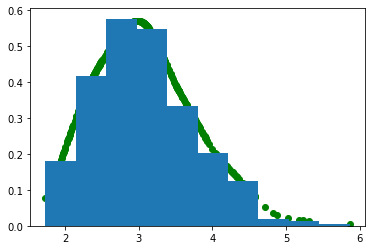

 mean loglikelihood of p_g  -1.00986
Gradient cte -0.002839925765991211
 Cte Update  1.9032494755983345

 pn/(pn+pm) 2 0.675793

 std dev y_predit 0.68736774
mean y_predit 3.0798092
pn/(pn+pm)  0.592705667
std dev y_pred 0.687367737
 model train on batch  -0.8067601323127747
############ iteration  566 ################
 p_nx  [0.494611651 0.547448933 0.507707 ... 0.52240777 0.519181669 0.545595527]


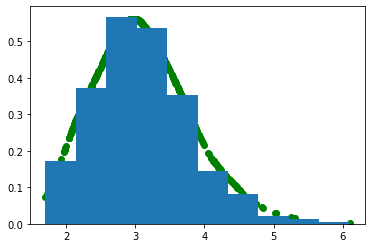

 mean loglikelihood of p_g  -1.03830671
Gradient cte -0.003216549873352051
 Cte Update  1.9000329257249824

 pn/(pn+pm) 2 0.67675525

 std dev y_predit 0.70465434
mean y_predit 3.0974722
pn/(pn+pm)  0.591876745
std dev y_pred 0.704654336
 model train on batch  -0.8041375279426575
############ iteration  567 ################
 p_nx  [0.562267 0.564924598 0.491321236 ... 0.485610366 0.56462568 0.564509869]


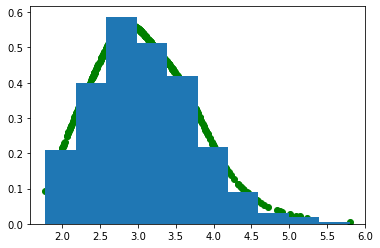

 mean loglikelihood of p_g  -0.996436298
Gradient cte 0.0009018319845199585
 Cte Update  1.9009347577095024

 pn/(pn+pm) 2 0.68055284

 std dev y_predit 0.6760246
mean y_predit 3.0820444
pn/(pn+pm)  0.594511271
std dev y_pred 0.676024616
 model train on batch  -0.7914947867393494
############ iteration  568 ################
 p_nx  [0.501605 0.513599396 0.512504578 ... 0.509127915 0.393716127 0.486938089]


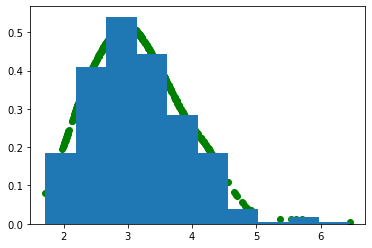

 mean loglikelihood of p_g  -1.08585751
Gradient cte 0.001977632164955139
 Cte Update  1.9029123898744575

 pn/(pn+pm) 2 0.69328284

 std dev y_predit 0.74744344
mean y_predit 3.1504312
pn/(pn+pm)  0.615401685
std dev y_pred 0.747443438
 model train on batch  -0.7706690430641174
############ iteration  569 ################
 p_nx  [0.549351573 0.487607 0.539320111 ... 0.47386384 0.546202302 0.548934162]


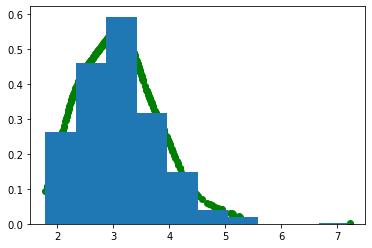

 mean loglikelihood of p_g  -1.02244854
Gradient cte 0.0027552037239074708
 Cte Update  1.905667593598365

 pn/(pn+pm) 2 0.6809448

 std dev y_predit 0.7089535
mean y_predit 3.1096468
pn/(pn+pm)  0.596486449
std dev y_pred 0.7089535
 model train on batch  -0.7913162708282471
############ iteration  570 ################
 p_nx  [0.54434067 0.414434731 0.527781785 ... 0.533898413 0.545545816 0.540465236]


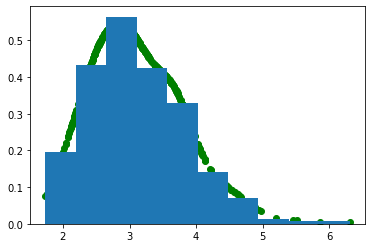

 mean loglikelihood of p_g  -1.04089689
Gradient cte -0.00396210765838623
 Cte Update  1.9017054859399787

 pn/(pn+pm) 2 0.69157004

 std dev y_predit 0.71656966
mean y_predit 3.1160727
pn/(pn+pm)  0.609966457
std dev y_pred 0.716569662
 model train on batch  -0.7708970904350281
############ iteration  571 ################
 p_nx  [0.376130193 0.546437263 0.555286467 ... 0.546875715 0.453449816 0.542210162]


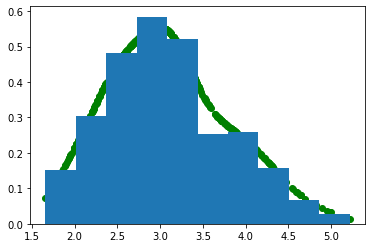

 mean loglikelihood of p_g  -1.04256618
Gradient cte 0.0023865575790405274
 Cte Update  1.9040920435190192

 pn/(pn+pm) 2 0.6786598

 std dev y_predit 0.70625544
mean y_predit 3.0864193
pn/(pn+pm)  0.595730841
std dev y_pred 0.706255436
 model train on batch  -0.8014219403266907
############ iteration  572 ################
 p_nx  [0.54684937 0.535955608 0.532248497 ... 0.550084233 0.523484766 0.55103904]


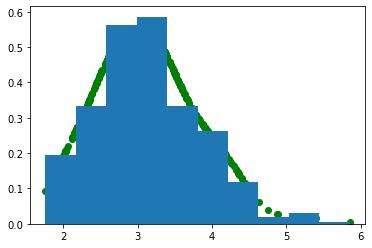

 mean loglikelihood of p_g  -1.03299928
Gradient cte 0.0033092920780181884
 Cte Update  1.9074013355970374

 pn/(pn+pm) 2 0.67641664

 std dev y_predit 0.6993987
mean y_predit 3.1277983
pn/(pn+pm)  0.589021802
std dev y_pred 0.699398696
 model train on batch  -0.8000101447105408
############ iteration  573 ################
 p_nx  [0.578322232 0.578942478 0.43025443 ... 0.576689482 0.511770248 0.577113152]


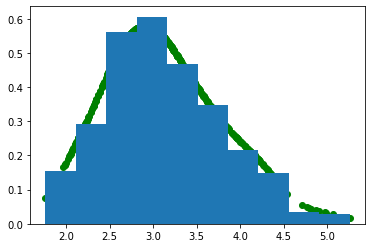

 mean loglikelihood of p_g  -1.00300419
Gradient cte -0.008562435150146484
 Cte Update  1.8988389004468909

 pn/(pn+pm) 2 0.6727168

 std dev y_predit 0.6776455
mean y_predit 3.120266
pn/(pn+pm)  0.584544659
std dev y_pred 0.677645504
 model train on batch  -0.8101712465286255
############ iteration  574 ################
 p_nx  [0.547207236 0.348540157 0.563366771 ... 0.568310797 0.392849922 0.454893231]


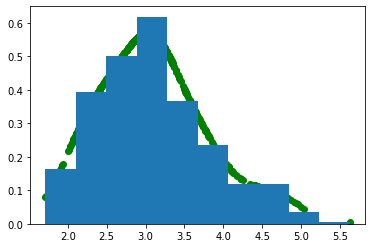

 mean loglikelihood of p_g  -1.04723954
Gradient cte -0.0037757315635681154
 Cte Update  1.8950631688833228

 pn/(pn+pm) 2 0.6723068

 std dev y_predit 0.71847755
mean y_predit 3.103442
pn/(pn+pm)  0.588205338
std dev y_pred 0.718477547
 model train on batch  -0.8152464628219604
############ iteration  575 ################
 p_nx  [0.532632113 0.532019615 0.51080215 ... 0.502296925 0.512742937 0.516935945]


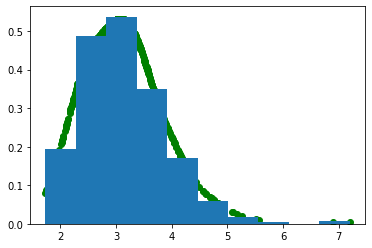

 mean loglikelihood of p_g  -1.0665406
Gradient cte -0.006891628265380859
 Cte Update  1.888171540617942

 pn/(pn+pm) 2 0.68791956

 std dev y_predit 0.74846303
mean y_predit 3.1336412
pn/(pn+pm)  0.603491
std dev y_pred 0.748462915
 model train on batch  -0.7792458534240723
############ iteration  576 ################
 p_nx  [0.542131364 0.548104286 0.517993271 ... 0.549685121 0.540311396 0.545787036]


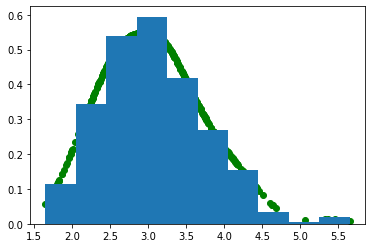

 mean loglikelihood of p_g  -1.00526774
Gradient cte 0.0027544040679931643
 Cte Update  1.8909259446859352

 pn/(pn+pm) 2 0.68051964

 std dev y_predit 0.6802126
mean y_predit 3.0613189
pn/(pn+pm)  0.592606187
std dev y_pred 0.680212617
 model train on batch  -0.7919147610664368
############ iteration  577 ################
 p_nx  [0.421903193 0.560246646 0.568878 ... 0.547115147 0.585697591 0.547463775]


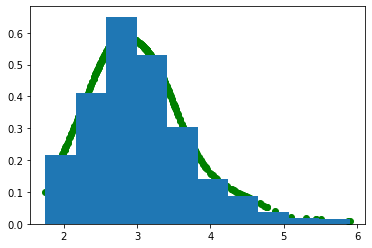

 mean loglikelihood of p_g  -1.01207745
Gradient cte -0.0044270591735839845
 Cte Update  1.8864988855123512

 pn/(pn+pm) 2 0.66853064

 std dev y_predit 0.70947313
mean y_predit 3.0391455
pn/(pn+pm)  0.575525284
std dev y_pred 0.709473133
 model train on batch  -0.8168931007385254
############ iteration  578 ################
 p_nx  [0.570002675 0.553382754 0.536968827 ... 0.470428288 0.498685181 0.523751438]


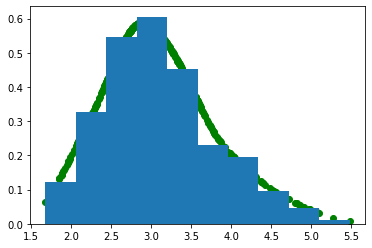

 mean loglikelihood of p_g  -1.02632797
Gradient cte -0.005631768226623536
 Cte Update  1.8808671172857276

 pn/(pn+pm) 2 0.6676372

 std dev y_predit 0.6983383
mean y_predit 3.0990438
pn/(pn+pm)  0.576559663
std dev y_pred 0.69833833
 model train on batch  -0.8228890895843506
############ iteration  579 ################
 p_nx  [0.530510783 0.577212214 0.516517818 ... 0.484615684 0.515871942 0.513251]


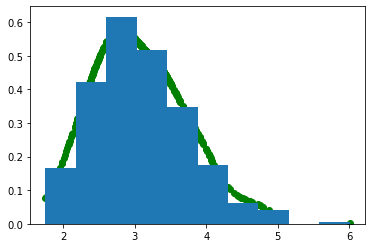

 mean loglikelihood of p_g  -0.983866811
Gradient cte 0.0024641733169555665
 Cte Update  1.8833312906026831

 pn/(pn+pm) 2 0.68079555

 std dev y_predit 0.67027646
mean y_predit 3.0753844
pn/(pn+pm)  0.59019959
std dev y_pred 0.670276463
 model train on batch  -0.7897421717643738
############ iteration  580 ################
 p_nx  [0.492546171 0.551312327 0.551080823 ... 0.380808055 0.549744904 0.530671239]


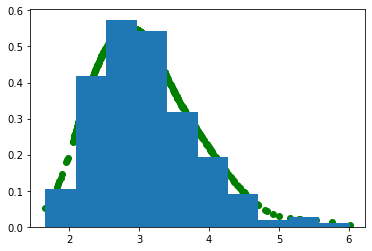

 mean loglikelihood of p_g  -1.04823577
Gradient cte 0.0007539591789245605
 Cte Update  1.8840852497816076

 pn/(pn+pm) 2 0.6837998

 std dev y_predit 0.7279152
mean y_predit 3.0980966
pn/(pn+pm)  0.59924078
std dev y_pred 0.727915168
 model train on batch  -0.7901023626327515
############ iteration  581 ################
 p_nx  [0.506646335 0.51869 0.5072124 ... 0.522662699 0.522226453 0.52384758]


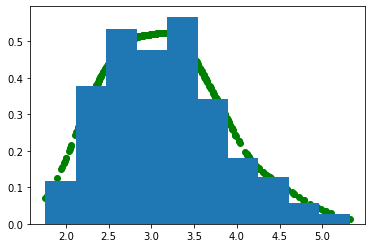

 mean loglikelihood of p_g  -1.02086878
Gradient cte 0.006752961158752442
 Cte Update  1.89083821094036

 pn/(pn+pm) 2 0.68870705

 std dev y_predit 0.6888938
mean y_predit 3.1456177
pn/(pn+pm)  0.602935255
std dev y_pred 0.688893795
 model train on batch  -0.7708285450935364
############ iteration  582 ################
 p_nx  [0.429720521 0.537385583 0.618043244 ... 0.540499508 0.611849368 0.610481143]


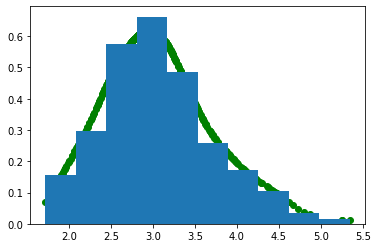

 mean loglikelihood of p_g  -0.966925144
Gradient cte -0.00013458728790283203
 Cte Update  1.8907036236524573

 pn/(pn+pm) 2 0.6589359

 std dev y_predit 0.6579522
mean y_predit 3.0643344
pn/(pn+pm)  0.565132678
std dev y_pred 0.657952189
 model train on batch  -0.8403691649436951
############ iteration  583 ################
 p_nx  [0.53349942 0.516231239 0.564204454 ... 0.564561844 0.545379341 0.564468682]


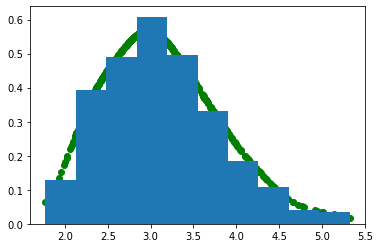

 mean loglikelihood of p_g  -0.99665916
Gradient cte 0.0022527804374694823
 Cte Update  1.8929564040899267

 pn/(pn+pm) 2 0.6775984

 std dev y_predit 0.6776437
mean y_predit 3.1270418
pn/(pn+pm)  0.590940893
std dev y_pred 0.677643716
 model train on batch  -0.801593542098999
############ iteration  584 ################
 p_nx  [0.498747021 0.476723105 0.500693321 ... 0.4913463 0.4813959 0.50012517]


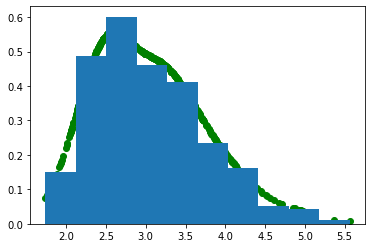

 mean loglikelihood of p_g  -1.00729215
Gradient cte 0.011393459320068359
 Cte Update  1.9043498634099951

 pn/(pn+pm) 2 0.70253384

 std dev y_predit 0.69900155
mean y_predit 3.0502431
pn/(pn+pm)  0.619998276
std dev y_pred 0.699001551
 model train on batch  -0.7386901378631592
############ iteration  585 ################
 p_nx  [0.509777486 0.563752651 0.551036954 ... 0.508792043 0.546541512 0.492810458]


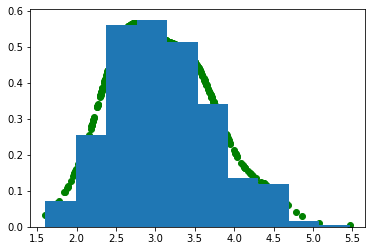

 mean loglikelihood of p_g  -0.968300045
Gradient cte 0.00012774193286895752
 Cte Update  1.904477605342864

 pn/(pn+pm) 2 0.685359

 std dev y_predit 0.65213025
mean y_predit 3.093833
pn/(pn+pm)  0.595422745
std dev y_pred 0.652130246
 model train on batch  -0.7741730213165283
############ iteration  586 ################
 p_nx  [0.58223778 0.538698912 0.541703939 ... 0.51745975 0.527013719 0.550766885]


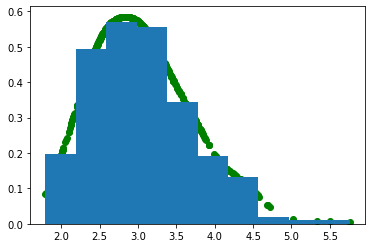

 mean loglikelihood of p_g  -0.963180959
Gradient cte 0.004734999179840088
 Cte Update  1.909212604522704

 pn/(pn+pm) 2 0.6750276

 std dev y_predit 0.6626357
mean y_predit 3.0578227
pn/(pn+pm)  0.586837173
std dev y_pred 0.662635684
 model train on batch  -0.8018471598625183
############ iteration  587 ################
 p_nx  [0.475667685 0.58153826 0.567952096 ... 0.538232148 0.560299814 0.537467599]


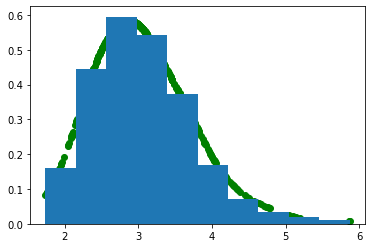

 mean loglikelihood of p_g  -0.998812675
Gradient cte -0.0017160165309906006
 Cte Update  1.9074965879917134

 pn/(pn+pm) 2 0.6749103

 std dev y_predit 0.68320715
mean y_predit 3.052022
pn/(pn+pm)  0.587719321
std dev y_pred 0.683207154
 model train on batch  -0.803805947303772
############ iteration  588 ################
 p_nx  [0.592184126 0.37797 0.464079589 ... 0.488839686 0.584269404 0.588808954]


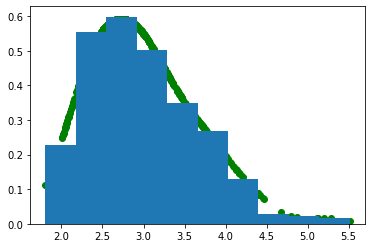

 mean loglikelihood of p_g  -0.951982737
Gradient cte 0.0016812849044799804
 Cte Update  1.9091778728961935

 pn/(pn+pm) 2 0.68531394

 std dev y_predit 0.6604521
mean y_predit 2.9930048
pn/(pn+pm)  0.600941658
std dev y_pred 0.660452127
 model train on batch  -0.7801690101623535
############ iteration  589 ################
 p_nx  [0.361020088 0.525421619 0.595185399 ... 0.460513979 0.604986191 0.576448143]


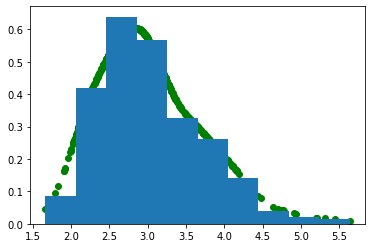

 mean loglikelihood of p_g  -0.983685255
Gradient cte 0.0016254477500915528
 Cte Update  1.910803320646285

 pn/(pn+pm) 2 0.6783558

 std dev y_predit 0.6864989
mean y_predit 3.0325742
pn/(pn+pm)  0.595196247
std dev y_pred 0.68649888
 model train on batch  -0.7993864417076111
############ iteration  590 ################
 p_nx  [0.540884197 0.573169172 0.588986397 ... 0.591986477 0.559606433 0.575111568]


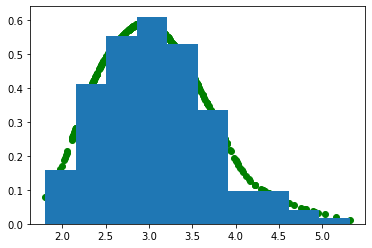

 mean loglikelihood of p_g  -0.944669485
Gradient cte -0.005925223350524902
 Cte Update  1.9048780972957602

 pn/(pn+pm) 2 0.6686979

 std dev y_predit 0.6425919
mean y_predit 3.072931
pn/(pn+pm)  0.577081561
std dev y_pred 0.642591834
 model train on batch  -0.8147458434104919
############ iteration  591 ################
 p_nx  [0.545671 0.562694788 0.564581513 ... 0.48637718 0.50089246 0.565069497]


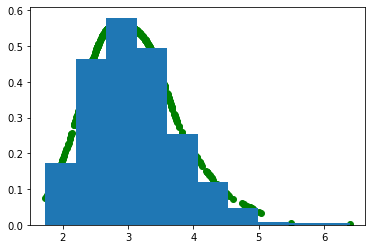

 mean loglikelihood of p_g  -1.00610304
Gradient cte -0.0011427502632141114
 Cte Update  1.903735347032546

 pn/(pn+pm) 2 0.6752766

 std dev y_predit 0.68917865
mean y_predit 3.090701
pn/(pn+pm)  0.583486497
std dev y_pred 0.689178586
 model train on batch  -0.7990015149116516
############ iteration  592 ################
 p_nx  [0.582889736 0.581983507 0.564136147 ... 0.582755804 0.559536517 0.581603169]


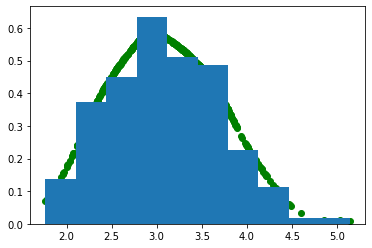

 mean loglikelihood of p_g  -0.916221738
Gradient cte -0.0006722216606140137
 Cte Update  1.903063125371932

 pn/(pn+pm) 2 0.67444766

 std dev y_predit 0.61234266
mean y_predit 3.0816312
pn/(pn+pm)  0.5858078
std dev y_pred 0.612342656
 model train on batch  -0.8030446767807007
############ iteration  593 ################
 p_nx  [0.576709569 0.476639241 0.620762527 ... 0.566848755 0.491421044 0.571842194]


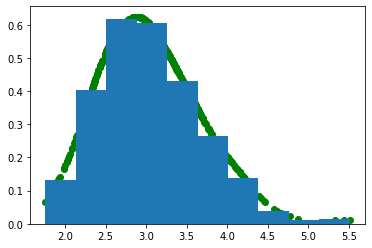

 mean loglikelihood of p_g  -0.917722166
Gradient cte 0.0013967480659484864
 Cte Update  1.9044598734378804

 pn/(pn+pm) 2 0.6630997

 std dev y_predit 0.6255437
mean y_predit 3.0448122
pn/(pn+pm)  0.569608569
std dev y_pred 0.625543714
 model train on batch  -0.8262395858764648
############ iteration  594 ################
 p_nx  [0.436868072 0.552810729 0.546769857 ... 0.531402767 0.534779251 0.539498866]


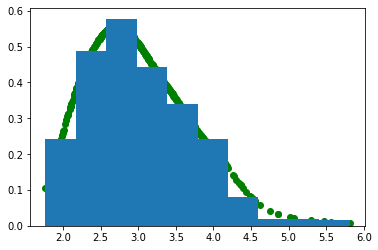

 mean loglikelihood of p_g  -1.01517582
Gradient cte -0.0010048820972442627
 Cte Update  1.903454991340636

 pn/(pn+pm) 2 0.69780695

 std dev y_predit 0.70885926
mean y_predit 3.0234606
pn/(pn+pm)  0.616565764
std dev y_pred 0.708859265
 model train on batch  -0.7539612650871277
############ iteration  595 ################
 p_nx  [0.462923437 0.464497119 0.49343428 ... 0.484957814 0.477302432 0.476767898]


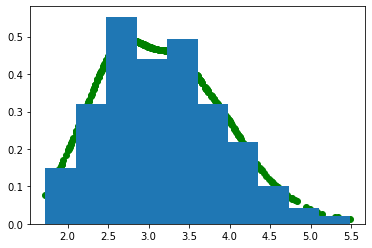

 mean loglikelihood of p_g  -1.07554746
Gradient cte 0.00016412544250488283
 Cte Update  1.9036191167831409

 pn/(pn+pm) 2 0.70662117

 std dev y_predit 0.7280487
mean y_predit 3.1582577
pn/(pn+pm)  0.625316
std dev y_pred 0.728048682
 model train on batch  -0.7293707728385925
############ iteration  596 ################
 p_nx  [0.513679683 0.519380033 0.544381917 ... 0.424492627 0.537123263 0.3792907]


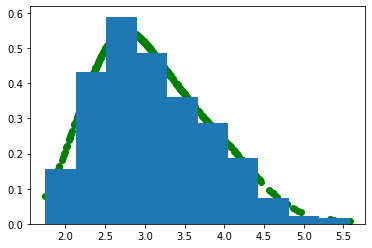

 mean loglikelihood of p_g  -1.03482044
Gradient cte 0.0003609662055969238
 Cte Update  1.9039800829887379

 pn/(pn+pm) 2 0.6941069

 std dev y_predit 0.7107509
mean y_predit 3.0946255
pn/(pn+pm)  0.612733126
std dev y_pred 0.710750818
 model train on batch  -0.7626853585243225
############ iteration  597 ################
 p_nx  [0.569428623 0.525919676 0.438439071 ... 0.572119296 0.569352329 0.548341095]


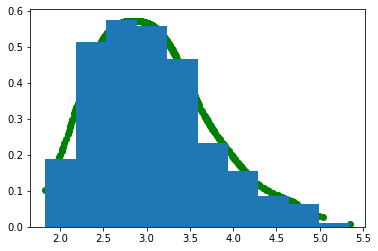

 mean loglikelihood of p_g  -0.965768397
Gradient cte -0.003731680631637573
 Cte Update  1.9002484023571002

 pn/(pn+pm) 2 0.67583805

 std dev y_predit 0.66349477
mean y_predit 3.058349
pn/(pn+pm)  0.586048722
std dev y_pred 0.663494766
 model train on batch  -0.7999234199523926
############ iteration  598 ################
 p_nx  [0.577622175 0.581649482 0.585287452 ... 0.576162875 0.579151213 0.58691287]


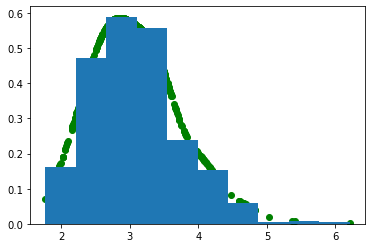

 mean loglikelihood of p_g  -0.964318514
Gradient cte -0.0008737497329711914
 Cte Update  1.899374652624129

 pn/(pn+pm) 2 0.6687399

 std dev y_predit 0.6621184
mean y_predit 3.0807076
pn/(pn+pm)  0.57429111
std dev y_pred 0.662118375
 model train on batch  -0.8120061159133911
############ iteration  599 ################
 p_nx  [0.588739276 0.593402684 0.579780102 ... 0.593318343 0.567074239 0.531325221]


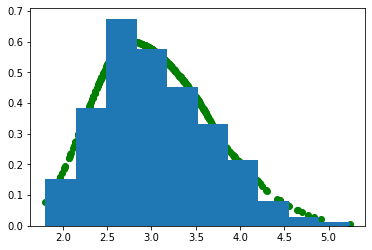

 mean loglikelihood of p_g  -0.923580229
Gradient cte 0.0034926903247833254
 Cte Update  1.9028673429489125

 pn/(pn+pm) 2 0.6729651

 std dev y_predit 0.62677765
mean y_predit 3.0537744
pn/(pn+pm)  0.58005923
std dev y_pred 0.626777649
 model train on batch  -0.8029128313064575
############ iteration  600 ################
 p_nx  [0.573158503 0.545577586 0.569793403 ... 0.563948154 0.583306789 0.571803451]


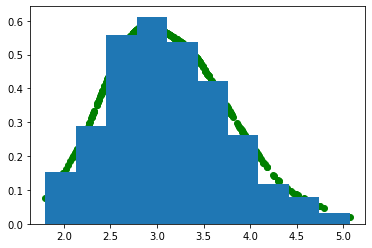

 mean loglikelihood of p_g  -0.955982268
Gradient cte 0.0019965786933898925
 Cte Update  1.9048639216423024

 pn/(pn+pm) 2 0.66962487

 std dev y_predit 0.6402289
mean y_predit 3.1277428
pn/(pn+pm)  0.577663481
std dev y_pred 0.640228927
 model train on batch  -0.8104457855224609
############ iteration  601 ################
 p_nx  [0.564359963 0.542926848 0.51247257 ... 0.458440661 0.55907166 0.535114408]


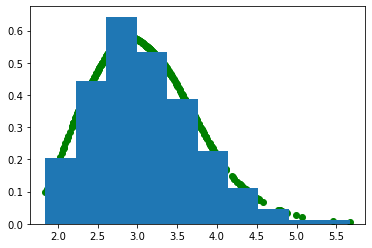

 mean loglikelihood of p_g  -0.964948177
Gradient cte 0.001056893825531006
 Cte Update  1.9059208154678335

 pn/(pn+pm) 2 0.6718495

 std dev y_predit 0.6574316
mean y_predit 3.088645
pn/(pn+pm)  0.582447
std dev y_pred 0.657431602
 model train on batch  -0.8070204257965088
############ iteration  602 ################
 p_nx  [0.671904 0.615754366 0.67630291 ... 0.592734694 0.664177477 0.626575291]


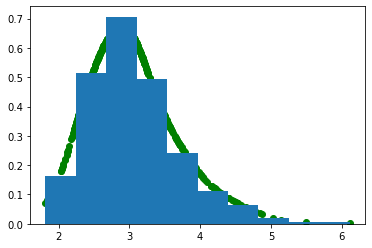

 mean loglikelihood of p_g  -0.908721328
Gradient cte -0.001679115891456604
 Cte Update  1.904241699576377

 pn/(pn+pm) 2 0.6480537

 std dev y_predit 0.63690513
mean y_predit 3.047764
pn/(pn+pm)  0.55098933
std dev y_pred 0.636905074
 model train on batch  -0.8595013618469238
############ iteration  603 ################
 p_nx  [0.498296797 0.517851532 0.534364045 ... 0.559343636 0.523731947 0.553970218]


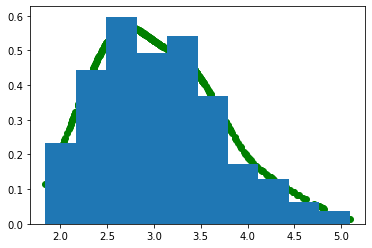

 mean loglikelihood of p_g  -0.958687067
Gradient cte 0.007362051010131836
 Cte Update  1.9116037505865087

 pn/(pn+pm) 2 0.6874626

 std dev y_predit 0.6549638
mean y_predit 3.0511646
pn/(pn+pm)  0.599696696
std dev y_pred 0.654963791
 model train on batch  -0.769175112247467
############ iteration  604 ################
 p_nx  [0.540864348 0.562415242 0.541825593 ... 0.584404 0.497691959 0.58524]


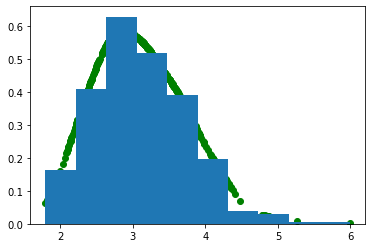

 mean loglikelihood of p_g  -0.93681252
Gradient cte 0.002986739158630371
 Cte Update  1.9145904897451391

 pn/(pn+pm) 2 0.670781

 std dev y_predit 0.63712883
mean y_predit 3.1004915
pn/(pn+pm)  0.581452429
std dev y_pred 0.63712883
 model train on batch  -0.8071575164794922
############ iteration  605 ################
 p_nx  [0.444987297 0.559671521 0.617596328 ... 0.617170036 0.555002451 0.543528557]


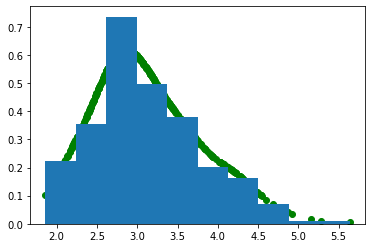

 mean loglikelihood of p_g  -0.98250556
Gradient cte 0.0012021634578704833
 Cte Update  1.9157926532030096

 pn/(pn+pm) 2 0.6632722

 std dev y_predit 0.67250276
mean y_predit 3.1199214
pn/(pn+pm)  0.573680103
std dev y_pred 0.672502756
 model train on batch  -0.8265239596366882
############ iteration  606 ################
 p_nx  [0.602420688 0.600983858 0.631148815 ... 0.631588638 0.568023324 0.622685373]


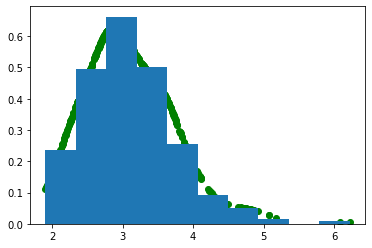

 mean loglikelihood of p_g  -0.93319124
Gradient cte -0.0018611521720886231
 Cte Update  1.913931501030921

 pn/(pn+pm) 2 0.66204137

 std dev y_predit 0.65446824
mean y_predit 3.0978134
pn/(pn+pm)  0.570125163
std dev y_pred 0.654468238
 model train on batch  -0.8278690576553345
############ iteration  607 ################
 p_nx  [0.559054077 0.560382128 0.559956074 ... 0.559312165 0.562298357 0.561476588]


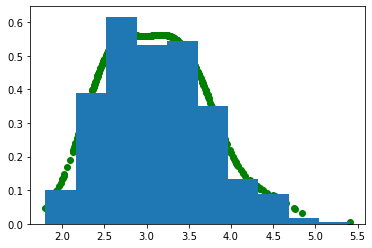

 mean loglikelihood of p_g  -0.899941325
Gradient cte 0.0023491086959838868
 Cte Update  1.916280609726905

 pn/(pn+pm) 2 0.6757634

 std dev y_predit 0.6123505
mean y_predit 3.1212537
pn/(pn+pm)  0.583180428
std dev y_pred 0.612350523
 model train on batch  -0.7915327548980713
############ iteration  608 ################
 p_nx  [0.57175082 0.564536572 0.565621614 ... 0.518787503 0.542136788 0.571129858]


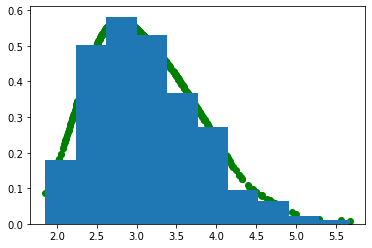

 mean loglikelihood of p_g  -0.980202436
Gradient cte 0.0048518447875976565
 Cte Update  1.9211324545145025

 pn/(pn+pm) 2 0.68109274

 std dev y_predit 0.67458504
mean y_predit 3.121358
pn/(pn+pm)  0.593855381
std dev y_pred 0.674585104
 model train on batch  -0.7848988175392151
############ iteration  609 ################
 p_nx  [0.562644899 0.540931642 0.531503081 ... 0.570698917 0.561720312 0.567336857]


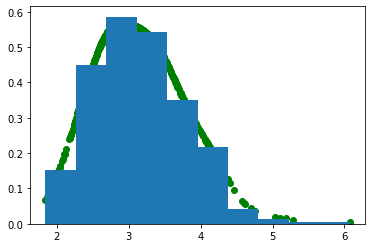

 mean loglikelihood of p_g  -0.951280296
Gradient cte -0.0018611793518066406
 Cte Update  1.919271275162696

 pn/(pn+pm) 2 0.6714717

 std dev y_predit 0.6461891
mean y_predit 3.1595747
pn/(pn+pm)  0.581373274
std dev y_pred 0.646189094
 model train on batch  -0.8040688633918762
############ iteration  610 ################
 p_nx  [0.572285175 0.559321225 0.581942737 ... 0.590977609 0.578725219 0.585683644]


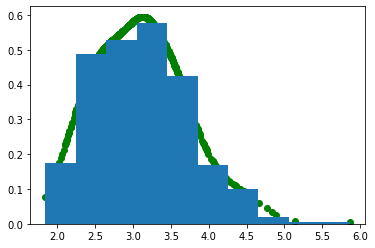

 mean loglikelihood of p_g  -0.925564349
Gradient cte 0.002647190809249878
 Cte Update  1.9219184659719457

 pn/(pn+pm) 2 0.6704028

 std dev y_predit 0.63039595
mean y_predit 3.112253
pn/(pn+pm)  0.580493689
std dev y_pred 0.630395949
 model train on batch  -0.8064427375793457
############ iteration  611 ################
 p_nx  [0.571400881 0.421386272 0.56641674 ... 0.568574 0.523468316 0.566256344]


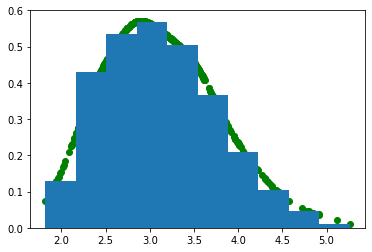

 mean loglikelihood of p_g  -0.96740675
Gradient cte 0.0004485888481140137
 Cte Update  1.9223670548200598

 pn/(pn+pm) 2 0.67625964

 std dev y_predit 0.652046
mean y_predit 3.1280794
pn/(pn+pm)  0.589682579
std dev y_pred 0.652046
 model train on batch  -0.7965477108955383
############ iteration  612 ################
 p_nx  [0.5716151 0.570873618 0.513776958 ... 0.576178551 0.559725404 0.525487304]


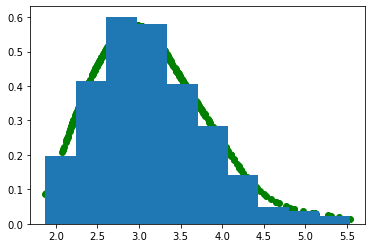

 mean loglikelihood of p_g  -0.981198132
Gradient cte 0.007753598690032959
 Cte Update  1.9301206535100928

 pn/(pn+pm) 2 0.6699015

 std dev y_predit 0.67479795
mean y_predit 3.1455967
pn/(pn+pm)  0.58353579
std dev y_pred 0.674797952
 model train on batch  -0.8106440305709839
############ iteration  613 ################
 p_nx  [0.634448946 0.643980503 0.581366658 ... 0.53587538 0.643152237 0.642775714]


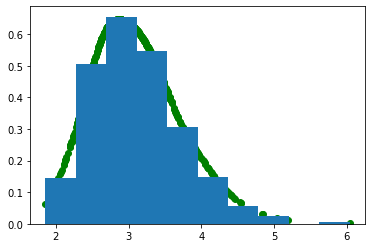

 mean loglikelihood of p_g  -0.892050385
Gradient cte 0.0001203780174255371
 Cte Update  1.9302410315275182

 pn/(pn+pm) 2 0.64760035

 std dev y_predit 0.6168389
mean y_predit 3.1111045
pn/(pn+pm)  0.548055291
std dev y_pred 0.616838872
 model train on batch  -0.8505401611328125
############ iteration  614 ################
 p_nx  [0.520575106 0.535854936 0.55171 ... 0.525251329 0.538113594 0.51658088]


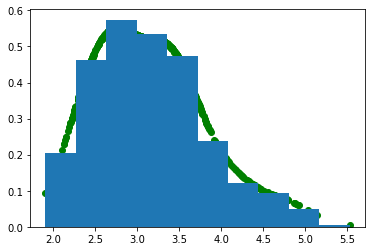

 mean loglikelihood of p_g  -0.97905314
Gradient cte 0.002924741268157959
 Cte Update  1.9331657727956761

 pn/(pn+pm) 2 0.6827029

 std dev y_predit 0.6792258
mean y_predit 3.1566386
pn/(pn+pm)  0.59388715
std dev y_pred 0.679225802
 model train on batch  -0.7740460634231567
############ iteration  615 ################
 p_nx  [0.545783103 0.552783608 0.548761427 ... 0.39836359 0.549757719 0.550799429]


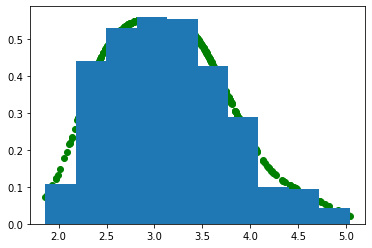

 mean loglikelihood of p_g  -0.935479641
Gradient cte 0.0018538522720336914
 Cte Update  1.9350196250677099

 pn/(pn+pm) 2 0.67889243

 std dev y_predit 0.63554645
mean y_predit 3.1347172
pn/(pn+pm)  0.59126687
std dev y_pred 0.635546446
 model train on batch  -0.7852877974510193
############ iteration  616 ################
 p_nx  [0.573606908 0.579136 0.544131458 ... 0.571395457 0.515437 0.560648084]


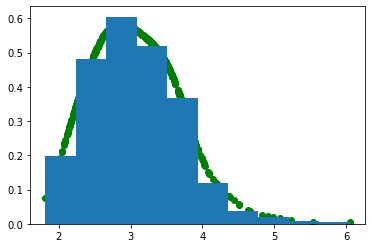

 mean loglikelihood of p_g  -0.923162639
Gradient cte -0.004111709594726562
 Cte Update  1.9309079154729833

 pn/(pn+pm) 2 0.6712112

 std dev y_predit 0.63521135
mean y_predit 3.0682268
pn/(pn+pm)  0.580580711
std dev y_pred 0.635211349
 model train on batch  -0.8021321296691895
############ iteration  617 ################
 p_nx  [0.541274309 0.551079 0.515409231 ... 0.51942265 0.550776064 0.472806662]


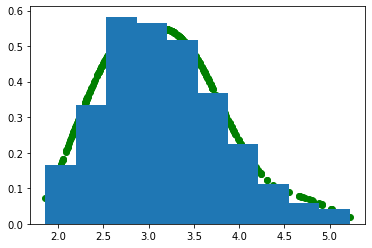

 mean loglikelihood of p_g  -0.964399874
Gradient cte 0.0015412414073944093
 Cte Update  1.9324491568803777

 pn/(pn+pm) 2 0.6795953

 std dev y_predit 0.65942013
mean y_predit 3.1658902
pn/(pn+pm)  0.592125237
std dev y_pred 0.659420133
 model train on batch  -0.7852528691291809
############ iteration  618 ################
 p_nx  [0.626458168 0.637589931 0.643129528 ... 0.643183231 0.634685874 0.632388115]


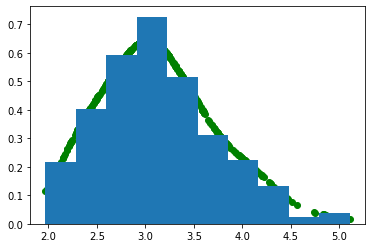

 mean loglikelihood of p_g  -0.901408
Gradient cte -0.0011375422477722169
 Cte Update  1.9313116146326055

 pn/(pn+pm) 2 0.65185744

 std dev y_predit 0.6134749
mean y_predit 3.132986
pn/(pn+pm)  0.558647335
std dev y_pred 0.613474905
 model train on batch  -0.8474305272102356
############ iteration  619 ################
 p_nx  [0.579319715 0.579209208 0.579995215 ... 0.566218555 0.580962598 0.391692668]


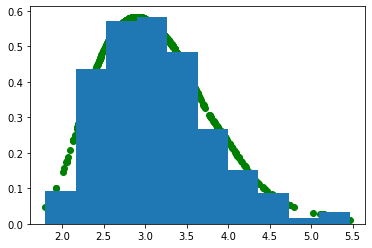

 mean loglikelihood of p_g  -0.955595613
Gradient cte -0.0017611641883850098
 Cte Update  1.9295504504442205

 pn/(pn+pm) 2 0.6701967

 std dev y_predit 0.65782434
mean y_predit 3.1355977
pn/(pn+pm)  0.580231428
std dev y_pred 0.657824278
 model train on batch  -0.8073844313621521
############ iteration  620 ################
 p_nx  [0.596331716 0.589600384 0.600675881 ... 0.593456745 0.599447191 0.596550703]


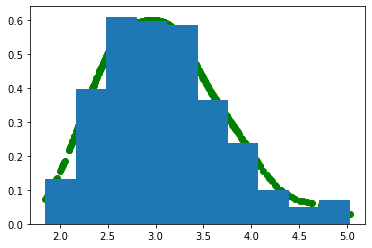

 mean loglikelihood of p_g  -0.913804233
Gradient cte -0.008928275108337403
 Cte Update  1.920622175335883

 pn/(pn+pm) 2 0.6618196

 std dev y_predit 0.6271867
mean y_predit 3.0920033
pn/(pn+pm)  0.56847918
std dev y_pred 0.627186716
 model train on batch  -0.8243280649185181
############ iteration  621 ################
 p_nx  [0.631476879 0.627859533 0.630402267 ... 0.606123567 0.612353444 0.607332587]


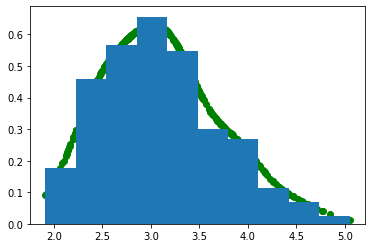

 mean loglikelihood of p_g  -0.892550409
Gradient cte -0.0027605321407318116
 Cte Update  1.9178616431951512

 pn/(pn+pm) 2 0.6538511

 std dev y_predit 0.6084737
mean y_predit 3.1043952
pn/(pn+pm)  0.558623254
std dev y_pred 0.608473718
 model train on batch  -0.8427609801292419
############ iteration  622 ################
 p_nx  [0.536673963 0.529986143 0.572512507 ... 0.587137938 0.566276312 0.551593482]


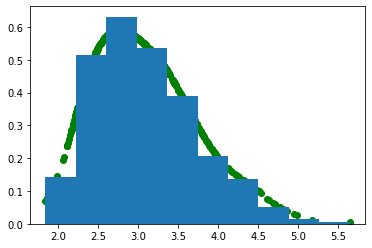

 mean loglikelihood of p_g  -0.942925453
Gradient cte -0.004226263999938965
 Cte Update  1.9136353791952123

 pn/(pn+pm) 2 0.67618567

 std dev y_predit 0.6526644
mean y_predit 3.0902042
pn/(pn+pm)  0.586369514
std dev y_pred 0.652664423
 model train on batch  -0.7950664758682251
############ iteration  623 ################
 p_nx  [0.451736271 0.53493613 0.51840961 ... 0.544525206 0.503269613 0.535528481]


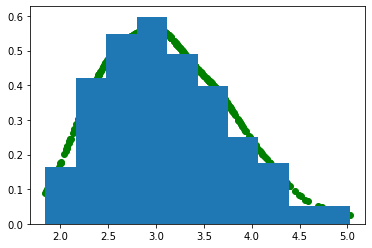

 mean loglikelihood of p_g  -0.956993818
Gradient cte 0.0002897205352783203
 Cte Update  1.9139250997304906

 pn/(pn+pm) 2 0.67969537

 std dev y_predit 0.6479108
mean y_predit 3.1086261
pn/(pn+pm)  0.594770432
std dev y_pred 0.647910774
 model train on batch  -0.7927145957946777
############ iteration  624 ################
 p_nx  [0.617982805 0.629574656 0.630043745 ... 0.628586233 0.629057586 0.629316509]


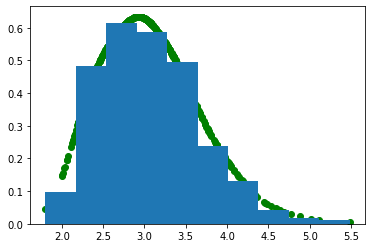

 mean loglikelihood of p_g  -0.875075579
Gradient cte 0.0017882599830627442
 Cte Update  1.9157133597135534

 pn/(pn+pm) 2 0.65744555

 std dev y_predit 0.6019101
mean y_predit 3.064358
pn/(pn+pm)  0.561525643
std dev y_pred 0.601910114
 model train on batch  -0.834717333316803
############ iteration  625 ################
 p_nx  [0.582055092 0.605616 0.594636798 ... 0.592486918 0.592282355 0.553929269]


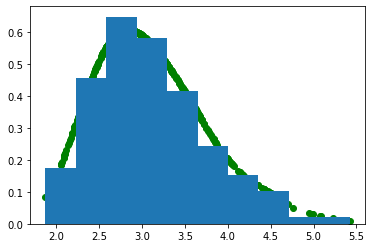

 mean loglikelihood of p_g  -0.944389403
Gradient cte 0.0043289165496826175
 Cte Update  1.920042276263236

 pn/(pn+pm) 2 0.66681516

 std dev y_predit 0.65217113
mean y_predit 3.1077116
pn/(pn+pm)  0.57495445
std dev y_pred 0.652171135
 model train on batch  -0.8155670166015625
############ iteration  626 ################
 p_nx  [0.542715073 0.567208946 0.585131168 ... 0.558586121 0.573286176 0.57447654]


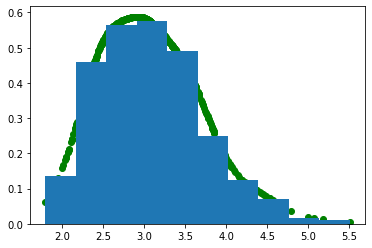

 mean loglikelihood of p_g  -0.921607316
Gradient cte -0.0030661725997924803
 Cte Update  1.9169761036634436

 pn/(pn+pm) 2 0.672377

 std dev y_predit 0.62970555
mean y_predit 3.0780518
pn/(pn+pm)  0.580610096
std dev y_pred 0.629705489
 model train on batch  -0.8035869598388672
############ iteration  627 ################
 p_nx  [0.60427177 0.495172113 0.579529405 ... 0.555897653 0.591637135 0.605446517]


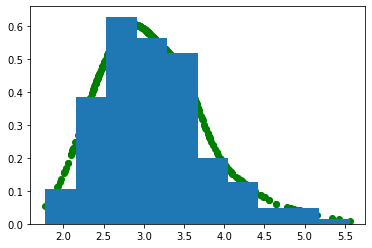

 mean loglikelihood of p_g  -0.952522278
Gradient cte -0.0016401761770248413
 Cte Update  1.9153359274864188

 pn/(pn+pm) 2 0.6655746

 std dev y_predit 0.65907013
mean y_predit 3.111729
pn/(pn+pm)  0.571751952
std dev y_pred 0.659070134
 model train on batch  -0.8174713253974915
############ iteration  628 ################
 p_nx  [0.567423165 0.580965102 0.592324495 ... 0.62732476 0.627322316 0.625777721]


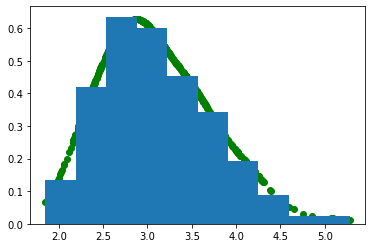

 mean loglikelihood of p_g  -0.910057187
Gradient cte -0.006662096977233887
 Cte Update  1.9086738305091848

 pn/(pn+pm) 2 0.66320205

 std dev y_predit 0.6227254
mean y_predit 3.1024346
pn/(pn+pm)  0.569964468
std dev y_pred 0.622725427
 model train on batch  -0.8249810934066772
############ iteration  629 ################
 p_nx  [0.55321312 0.465208858 0.574166238 ... 0.581551 0.585874379 0.586788058]


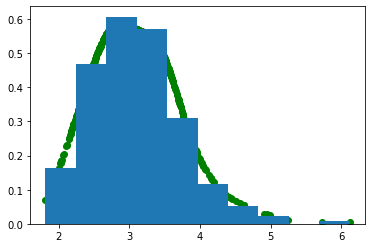

 mean loglikelihood of p_g  -0.935474932
Gradient cte 0.001030978798866272
 Cte Update  1.909704809308051

 pn/(pn+pm) 2 0.6681216

 std dev y_predit 0.64329547
mean y_predit 3.097549
pn/(pn+pm)  0.573110342
std dev y_pred 0.643295527
 model train on batch  -0.8101965188980103
############ iteration  630 ################
 p_nx  [0.571718693 0.571785748 0.556043446 ... 0.556737483 0.528556943 0.571529]


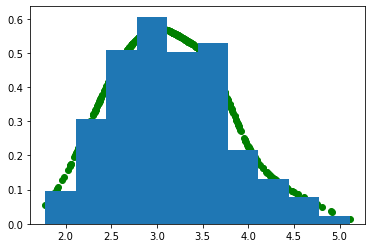

 mean loglikelihood of p_g  -0.945244312
Gradient cte 0.00033744239807128907
 Cte Update  1.9100422517061224

 pn/(pn+pm) 2 0.6763855

 std dev y_predit 0.6345037
mean y_predit 3.151373
pn/(pn+pm)  0.587982953
std dev y_pred 0.634503722
 model train on batch  -0.7979281544685364
############ iteration  631 ################
 p_nx  [0.668864369 0.669402599 0.660814047 ... 0.647247136 0.626877367 0.668546796]


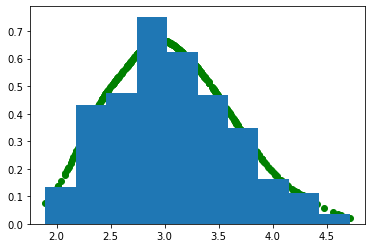

 mean loglikelihood of p_g  -0.816278696
Gradient cte -0.0022715587615966797
 Cte Update  1.9077706929445257

 pn/(pn+pm) 2 0.6486145

 std dev y_predit 0.5576798
mean y_predit 3.0638385
pn/(pn+pm)  0.548809409
std dev y_pred 0.557679772
 model train on batch  -0.8532060980796814
############ iteration  632 ################
 p_nx  [0.633841455 0.413789809 0.508559883 ... 0.534561038 0.630410671 0.624464691]


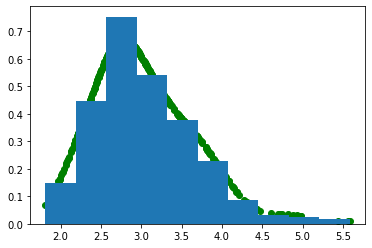

 mean loglikelihood of p_g  -0.896736
Gradient cte 0.003451195478439331
 Cte Update  1.911221888422965

 pn/(pn+pm) 2 0.6615941

 std dev y_predit 0.63264716
mean y_predit 3.039289
pn/(pn+pm)  0.56631583
std dev y_pred 0.632647157
 model train on batch  -0.8246882557868958
############ iteration  633 ################
 p_nx  [0.57143575 0.601551533 0.600327075 ... 0.580273509 0.469401568 0.587338686]


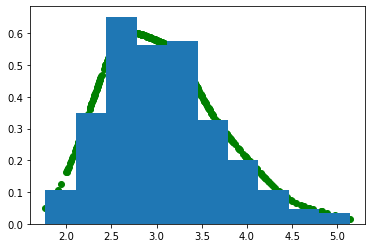

 mean loglikelihood of p_g  -0.916853487
Gradient cte 0.00195387601852417
 Cte Update  1.9131757644414893

 pn/(pn+pm) 2 0.6683495

 std dev y_predit 0.63007975
mean y_predit 3.0676312
pn/(pn+pm)  0.574820936
std dev y_pred 0.630079806
 model train on batch  -0.8094919919967651
############ iteration  634 ################
 p_nx  [0.668562412 0.666823745 0.653879404 ... 0.672483206 0.599966228 0.67301029]


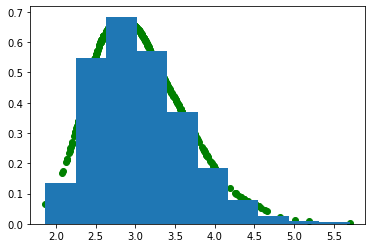

 mean loglikelihood of p_g  -0.85198915
Gradient cte 0.003126423120498657
 Cte Update  1.916302187561988

 pn/(pn+pm) 2 0.65024114

 std dev y_predit 0.5924007
mean y_predit 3.061596
pn/(pn+pm)  0.549736321
std dev y_pred 0.59240073
 model train on batch  -0.8481865525245667
############ iteration  635 ################
 p_nx  [0.61443162 0.524981141 0.619651735 ... 0.534911633 0.619436383 0.621332347]


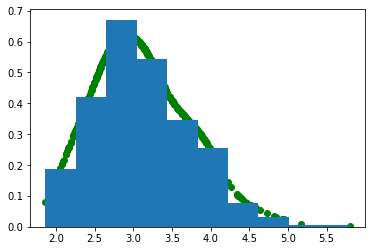

 mean loglikelihood of p_g  -0.924845695
Gradient cte 0.002604482412338257
 Cte Update  1.9189066699743262

 pn/(pn+pm) 2 0.65806013

 std dev y_predit 0.6316557
mean y_predit 3.1090941
pn/(pn+pm)  0.566337585
std dev y_pred 0.631655693
 model train on batch  -0.835536539554596
############ iteration  636 ################
 p_nx  [0.545055449 0.556798816 0.549193919 ... 0.544602334 0.546897352 0.535192788]


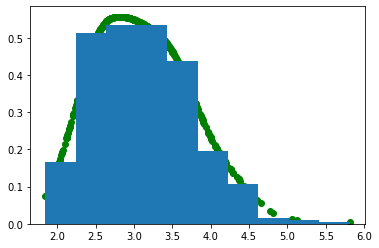

 mean loglikelihood of p_g  -0.939755201
Gradient cte 0.002832871198654175
 Cte Update  1.9217395411729805

 pn/(pn+pm) 2 0.68243515

 std dev y_predit 0.63907826
mean y_predit 3.1172001
pn/(pn+pm)  0.593470335
std dev y_pred 0.6390782
 model train on batch  -0.7804923057556152
############ iteration  637 ################
 p_nx  [0.607367039 0.637442827 0.618066192 ... 0.638859034 0.637379587 0.544326901]


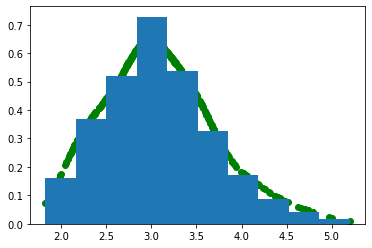

 mean loglikelihood of p_g  -0.910852969
Gradient cte -0.005137372970581055
 Cte Update  1.9166021682023995

 pn/(pn+pm) 2 0.65388113

 std dev y_predit 0.6209463
mean y_predit 3.0834646
pn/(pn+pm)  0.559842527
std dev y_pred 0.620946288
 model train on batch  -0.8465073108673096
############ iteration  638 ################
 p_nx  [0.636278868 0.557998598 0.629288912 ... 0.629837394 0.634325206 0.634762108]


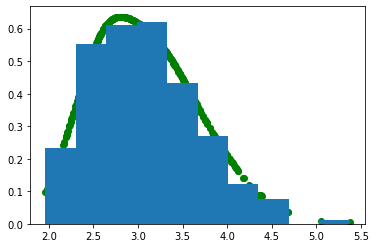

 mean loglikelihood of p_g  -0.848161638
Gradient cte 0.0023552465438842775
 Cte Update  1.9189574147462838

 pn/(pn+pm) 2 0.65797615

 std dev y_predit 0.58478045
mean y_predit 3.0829914
pn/(pn+pm)  0.559957325
std dev y_pred 0.584780455
 model train on batch  -0.8298267126083374
############ iteration  639 ################
 p_nx  [0.491194963 0.620810211 0.618097186 ... 0.616134703 0.587160587 0.555280387]


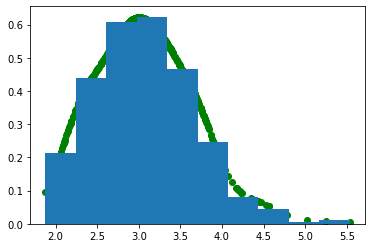

 mean loglikelihood of p_g  -0.883994877
Gradient cte -0.0021160125732421877
 Cte Update  1.9168414021730416

 pn/(pn+pm) 2 0.6602934

 std dev y_predit 0.6041593
mean y_predit 3.0703845
pn/(pn+pm)  0.568145752
std dev y_pred 0.604159355
 model train on batch  -0.8302925229072571
############ iteration  640 ################
 p_nx  [0.670147717 0.486425668 0.583354115 ... 0.683135211 0.688422501 0.521470249]


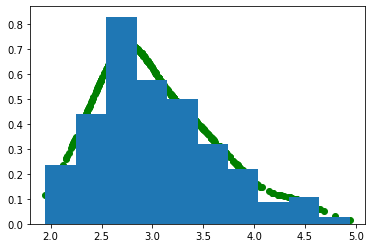

 mean loglikelihood of p_g  -0.841249526
Gradient cte 0.0008509602546691895
 Cte Update  1.9176923624277107

 pn/(pn+pm) 2 0.6563131

 std dev y_predit 0.59392303
mean y_predit 3.033464
pn/(pn+pm)  0.557120562
std dev y_pred 0.593923032
 model train on batch  -0.8314188718795776
############ iteration  641 ################
 p_nx  [0.363488793 0.658189774 0.630550444 ... 0.656934619 0.60904336 0.64900285]


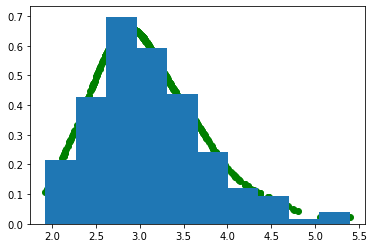

 mean loglikelihood of p_g  -0.926870525
Gradient cte -0.0027151327133178712
 Cte Update  1.9149772297143928

 pn/(pn+pm) 2 0.6512253

 std dev y_predit 0.6506373
mean y_predit 3.1073463
pn/(pn+pm)  0.555284202
std dev y_pred 0.650637329
 model train on batch  -0.8508077263832092
############ iteration  642 ################
 p_nx  [0.570211172 0.559547722 0.556710184 ... 0.571107805 0.567531943 0.549619317]


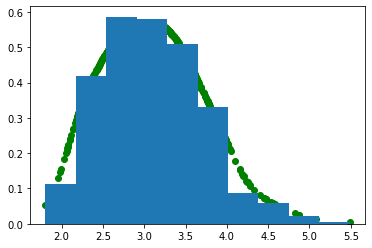

 mean loglikelihood of p_g  -0.913009048
Gradient cte 0.00161200213432312
 Cte Update  1.9165892318487159

 pn/(pn+pm) 2 0.67289287

 std dev y_predit 0.61935383
mean y_predit 3.101075
pn/(pn+pm)  0.582667708
std dev y_pred 0.619353831
 model train on batch  -0.8013148903846741
############ iteration  643 ################
 p_nx  [0.572118163 0.704281032 0.649863124 ... 0.641361594 0.650745273 0.704328716]


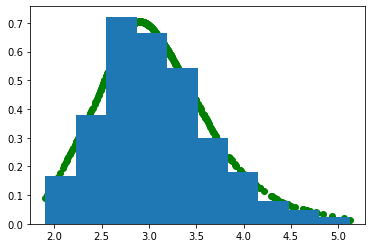

 mean loglikelihood of p_g  -0.856629
Gradient cte -0.0032673282623291015
 Cte Update  1.9133219035863869

 pn/(pn+pm) 2 0.63617927

 std dev y_predit 0.5905713
mean y_predit 3.0744696
pn/(pn+pm)  0.533737659
std dev y_pred 0.590571344
 model train on batch  -0.8788958191871643
############ iteration  644 ################
 p_nx  [0.623322904 0.639810443 0.644681633 ... 0.506714225 0.611350119 0.592721164]


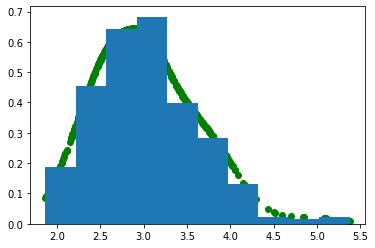

 mean loglikelihood of p_g  -0.869456351
Gradient cte 8.678913116455078e-06
 Cte Update  1.9133305824995033

 pn/(pn+pm) 2 0.6579944

 std dev y_predit 0.6007468
mean y_predit 3.0369296
pn/(pn+pm)  0.562606156
std dev y_pred 0.60074681
 model train on batch  -0.8351658582687378
############ iteration  645 ################
 p_nx  [0.560014546 0.596199214 0.609737277 ... 0.558410347 0.584978878 0.609950423]


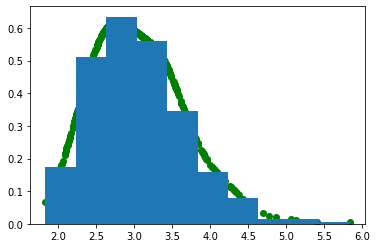

 mean loglikelihood of p_g  -0.889837682
Gradient cte -0.000809510350227356
 Cte Update  1.912521072149276

 pn/(pn+pm) 2 0.6644281

 std dev y_predit 0.61544913
mean y_predit 3.060993
pn/(pn+pm)  0.566985071
std dev y_pred 0.615449131
 model train on batch  -0.8162466287612915
############ iteration  646 ################
 p_nx  [0.639482 0.604382694 0.56092751 ... 0.641303778 0.606201649 0.632346511]


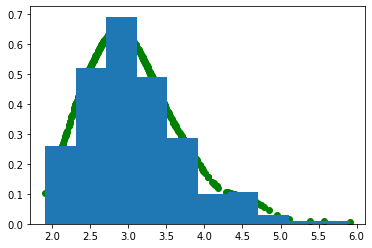

 mean loglikelihood of p_g  -0.921222389
Gradient cte -0.0037622823715209963
 Cte Update  1.908758789777755

 pn/(pn+pm) 2 0.6537535

 std dev y_predit 0.6527581
mean y_predit 3.0800595
pn/(pn+pm)  0.558705151
std dev y_pred 0.652758121
 model train on batch  -0.8454389572143555
############ iteration  647 ################
 p_nx  [0.603036642 0.580488563 0.52933681 ... 0.582309425 0.598307788 0.602370739]


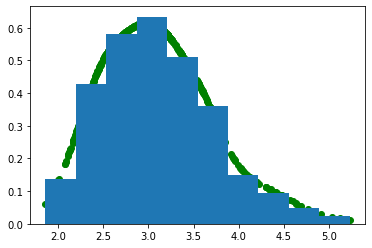

 mean loglikelihood of p_g  -0.894302
Gradient cte 0.00667311954498291
 Cte Update  1.9154319093227379

 pn/(pn+pm) 2 0.6608683

 std dev y_predit 0.61585283
mean y_predit 3.1000497
pn/(pn+pm)  0.566066802
std dev y_pred 0.615852773
 model train on batch  -0.8279609084129333
############ iteration  648 ################
 p_nx  [0.608745456 0.590349555 0.579838395 ... 0.496557444 0.660190463 0.673158228]


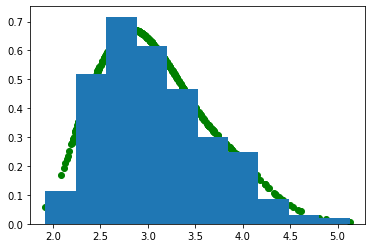

 mean loglikelihood of p_g  -0.825995564
Gradient cte -0.0004703860282897949
 Cte Update  1.9149615232944481

 pn/(pn+pm) 2 0.6519575

 std dev y_predit 0.57921946
mean y_predit 3.0768027
pn/(pn+pm)  0.55412662
std dev y_pred 0.57921946
 model train on batch  -0.8442267775535583
############ iteration  649 ################
 p_nx  [0.634598374 0.635678053 0.632841527 ... 0.56008637 0.612828434 0.621479571]


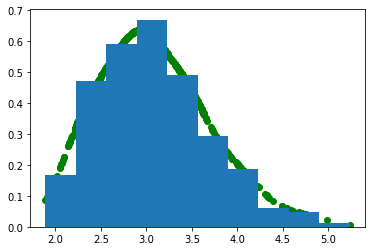

 mean loglikelihood of p_g  -0.88916713
Gradient cte -0.00014603781700134278
 Cte Update  1.9148154854774468

 pn/(pn+pm) 2 0.65729505

 std dev y_predit 0.60812354
mean y_predit 3.0802178
pn/(pn+pm)  0.562373459
std dev y_pred 0.608123541
 model train on batch  -0.8370221853256226
############ iteration  650 ################
 p_nx  [0.623655915 0.548481 0.621495605 ... 0.600446761 0.599981964 0.61308974]


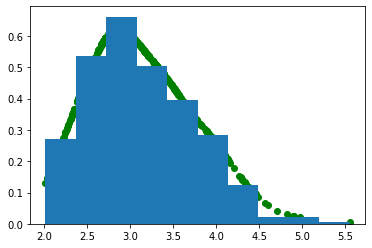

 mean loglikelihood of p_g  -0.907299936
Gradient cte -0.005307599544525147
 Cte Update  1.9095078859329218

 pn/(pn+pm) 2 0.66253173

 std dev y_predit 0.62206066
mean y_predit 3.1416798
pn/(pn+pm)  0.568899393
std dev y_pred 0.622060657
 model train on batch  -0.824889063835144
############ iteration  651 ################
 p_nx  [0.62470293 0.629071414 0.637091577 ... 0.632282317 0.601721644 0.634954035]


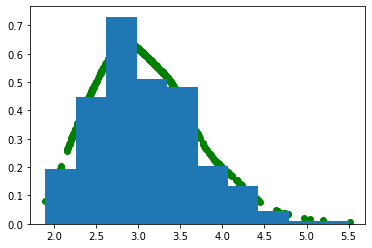

 mean loglikelihood of p_g  -0.888357
Gradient cte 0.0016802654266357422
 Cte Update  1.9111881513595574

 pn/(pn+pm) 2 0.6572153

 std dev y_predit 0.61301386
mean y_predit 3.0886002
pn/(pn+pm)  0.560115755
std dev y_pred 0.613013923
 model train on batch  -0.8339605927467346
############ iteration  652 ################
 p_nx  [0.611228883 0.560932338 0.607653 ... 0.602317572 0.595392048 0.516115069]


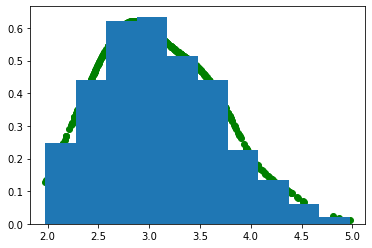

 mean loglikelihood of p_g  -0.869249225
Gradient cte 0.0015216307640075683
 Cte Update  1.912709782123565

 pn/(pn+pm) 2 0.66527015

 std dev y_predit 0.59201074
mean y_predit 3.0931993
pn/(pn+pm)  0.571061134
std dev y_pred 0.592010677
 model train on batch  -0.8173809051513672
############ iteration  653 ################
 p_nx  [0.612579823 0.549346566 0.554887831 ... 0.584563375 0.539513826 0.600447893]


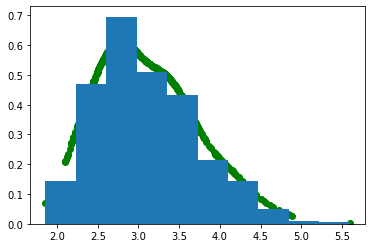

 mean loglikelihood of p_g  -0.912667274
Gradient cte -0.0004884449243545532
 Cte Update  1.9122213371992105

 pn/(pn+pm) 2 0.670312

 std dev y_predit 0.62623376
mean y_predit 3.1011245
pn/(pn+pm)  0.576657116
std dev y_pred 0.626233757
 model train on batch  -0.8032278418540955
############ iteration  654 ################
 p_nx  [0.449567616 0.675998211 0.615051568 ... 0.593001306 0.595484376 0.675467551]


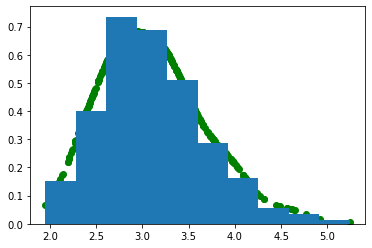

 mean loglikelihood of p_g  -0.813743472
Gradient cte -0.0006639580726623535
 Cte Update  1.911557379126548

 pn/(pn+pm) 2 0.6371072

 std dev y_predit 0.56474173
mean y_predit 3.1068795
pn/(pn+pm)  0.532385826
std dev y_pred 0.56474179
 model train on batch  -0.8738309741020203
############ iteration  655 ################
 p_nx  [0.680596828 0.589445472 0.55789274 ... 0.666257 0.622490942 0.645632207]


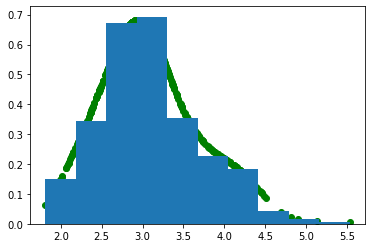

 mean loglikelihood of p_g  -0.899220347
Gradient cte -0.006931324958801269
 Cte Update  1.9046260541677469

 pn/(pn+pm) 2 0.64247704

 std dev y_predit 0.6184551
mean y_predit 3.092888
pn/(pn+pm)  0.545386553
std dev y_pred 0.618455052
 model train on batch  -0.8723233938217163
############ iteration  656 ################
 p_nx  [0.521470249 0.618350685 0.585135102 ... 0.601499319 0.611168504 0.550127745]


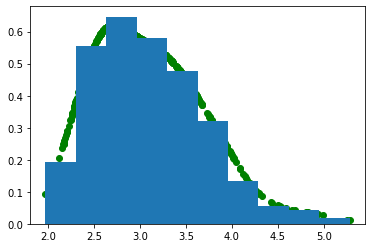

 mean loglikelihood of p_g  -0.865193
Gradient cte 0.0014887704849243164
 Cte Update  1.9061148246526711

 pn/(pn+pm) 2 0.670046

 std dev y_predit 0.606998
mean y_predit 3.0988073
pn/(pn+pm)  0.573317111
std dev y_pred 0.606998086
 model train on batch  -0.8046189546585083
############ iteration  657 ################
 p_nx  [0.628903151 0.627712548 0.636971891 ... 0.543988 0.631332397 0.610876322]


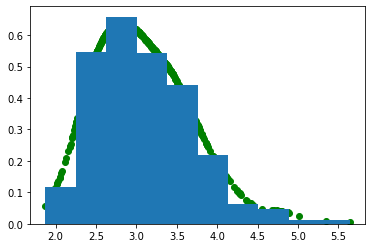

 mean loglikelihood of p_g  -0.867641747
Gradient cte -0.003554646968841553
 Cte Update  1.9025601776838297

 pn/(pn+pm) 2 0.66046506

 std dev y_predit 0.60691726
mean y_predit 3.0925136
pn/(pn+pm)  0.561268926
std dev y_pred 0.606917262
 model train on batch  -0.8274994492530823
############ iteration  658 ################
 p_nx  [0.595761299 0.607626915 0.581474483 ... 0.583222508 0.540333569 0.611817598]


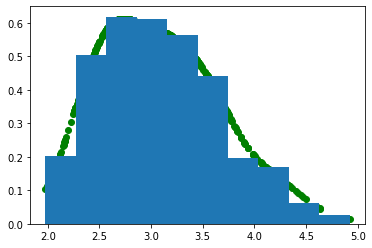

 mean loglikelihood of p_g  -0.850496471
Gradient cte 0.009004045486450195
 Cte Update  1.9115642231702799

 pn/(pn+pm) 2 0.6676807

 std dev y_predit 0.58708996
mean y_predit 3.0876205
pn/(pn+pm)  0.571218371
std dev y_pred 0.587089956
 model train on batch  -0.8093329071998596
############ iteration  659 ################
 p_nx  [0.563878477 0.607827187 0.641597748 ... 0.607708931 0.6111601 0.613150537]


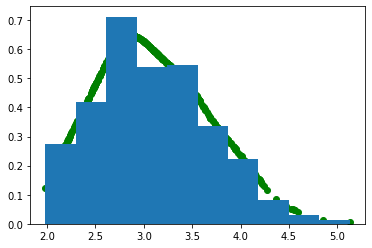

 mean loglikelihood of p_g  -0.849335849
Gradient cte 0.0032936389446258543
 Cte Update  1.9148578621149057

 pn/(pn+pm) 2 0.656728

 std dev y_predit 0.5801716
mean y_predit 3.0922678
pn/(pn+pm)  0.559696436
std dev y_pred 0.580171585
 model train on batch  -0.83465576171875
############ iteration  660 ################
 p_nx  [0.625249207 0.636407793 0.58211565 ... 0.542258263 0.530283689 0.630015492]


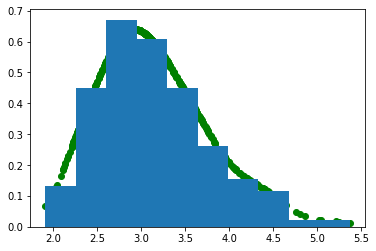

 mean loglikelihood of p_g  -0.907793701
Gradient cte -0.005499183654785156
 Cte Update  1.9093586784601206

 pn/(pn+pm) 2 0.6525

 std dev y_predit 0.62859994
mean y_predit 3.1463578
pn/(pn+pm)  0.556675792
std dev y_pred 0.628599882
 model train on batch  -0.8473751544952393
############ iteration  661 ################
 p_nx  [0.602266788 0.619964719 0.613545358 ... 0.62038672 0.595662117 0.620811701]


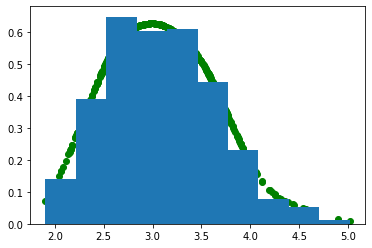

 mean loglikelihood of p_g  -0.831309199
Gradient cte 0.005125555038452148
 Cte Update  1.9144842334985728

 pn/(pn+pm) 2 0.65657914

 std dev y_predit 0.5665174
mean y_predit 3.089079
pn/(pn+pm)  0.557675302
std dev y_pred 0.566517472
 model train on batch  -0.8334176540374756
############ iteration  662 ################
 p_nx  [0.70249635 0.696163535 0.62762183 ... 0.627685308 0.670627832 0.648491502]


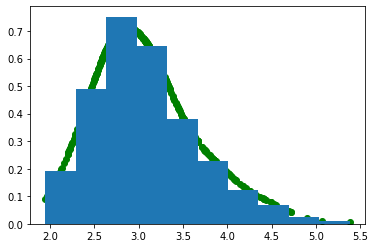

 mean loglikelihood of p_g  -0.837855
Gradient cte -0.001005165934562683
 Cte Update  1.91347906756401

 pn/(pn+pm) 2 0.6354593

 std dev y_predit 0.5872868
mean y_predit 3.0735264
pn/(pn+pm)  0.531603038
std dev y_pred 0.58728677
 model train on batch  -0.8793100118637085
############ iteration  663 ################
 p_nx  [0.576443195 0.575076222 0.567021549 ... 0.571221888 0.576854765 0.575840712]


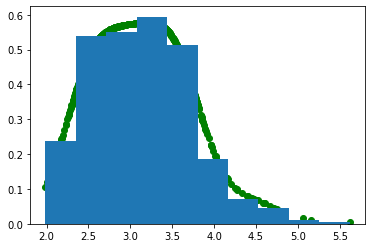

 mean loglikelihood of p_g  -0.874809682
Gradient cte 0.006084448337554932
 Cte Update  1.919563515901565

 pn/(pn+pm) 2 0.6737056

 std dev y_predit 0.6024351
mean y_predit 3.1352632
pn/(pn+pm)  0.580179811
std dev y_pred 0.602435052
 model train on batch  -0.7964921593666077
############ iteration  664 ################
 p_nx  [0.680950344 0.667033911 0.655290544 ... 0.652823567 0.674402595 0.664360225]


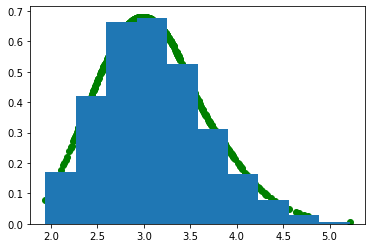

 mean loglikelihood of p_g  -0.823661447
Gradient cte -0.006113202095031738
 Cte Update  1.9134503138065333

 pn/(pn+pm) 2 0.6392363

 std dev y_predit 0.56307185
mean y_predit 3.100332
pn/(pn+pm)  0.536003411
std dev y_pred 0.563071847
 model train on batch  -0.8704708814620972
############ iteration  665 ################
 p_nx  [0.690012813 0.646196783 0.596714 ... 0.688965 0.573263764 0.688621104]


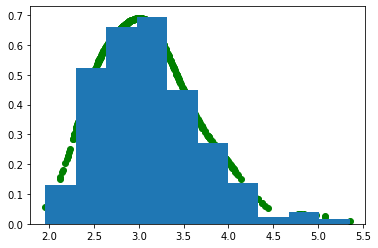

 mean loglikelihood of p_g  -0.80933857
Gradient cte 0.0014217910766601562
 Cte Update  1.9148721048831934

 pn/(pn+pm) 2 0.63756746

 std dev y_predit 0.57389885
mean y_predit 3.1143491
pn/(pn+pm)  0.532926142
std dev y_pred 0.573898792
 model train on batch  -0.8740830421447754
############ iteration  666 ################
 p_nx  [0.634394169 0.637891293 0.613311052 ... 0.637474418 0.59840709 0.568185866]


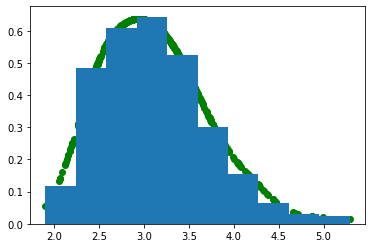

 mean loglikelihood of p_g  -0.856468916
Gradient cte -0.006505332469940186
 Cte Update  1.9083667724132531

 pn/(pn+pm) 2 0.652974

 std dev y_predit 0.59404427
mean y_predit 3.1152015
pn/(pn+pm)  0.552580595
std dev y_pred 0.594044268
 model train on batch  -0.8427793383598328
############ iteration  667 ################
 p_nx  [0.658645034 0.641438 0.584899664 ... 0.645331204 0.570286751 0.628929257]


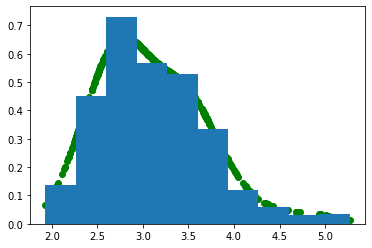

 mean loglikelihood of p_g  -0.846970558
Gradient cte -0.0008230794668197632
 Cte Update  1.9075436929464333

 pn/(pn+pm) 2 0.65831923

 std dev y_predit 0.595507
mean y_predit 3.1047118
pn/(pn+pm)  0.557312
std dev y_pred 0.595507085
 model train on batch  -0.828495979309082
############ iteration  668 ################
 p_nx  [0.55762887 0.61380142 0.597905099 ... 0.607591271 0.564814687 0.61024946]


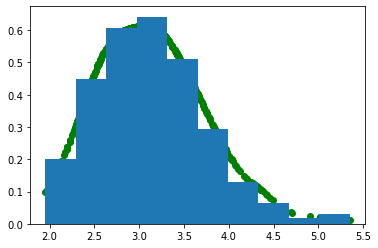

 mean loglikelihood of p_g  -0.889926791
Gradient cte 0.002402557134628296
 Cte Update  1.9099462500810616

 pn/(pn+pm) 2 0.65780836

 std dev y_predit 0.6064958
mean y_predit 3.133915
pn/(pn+pm)  0.559873044
std dev y_pred 0.606495798
 model train on batch  -0.8321791291236877
############ iteration  669 ################
 p_nx  [0.645369053 0.666759789 0.446827352 ... 0.59631747 0.658963203 0.655757844]


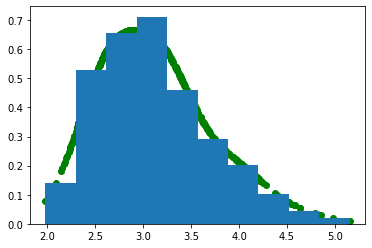

 mean loglikelihood of p_g  -0.837937415
Gradient cte 0.0022411932945251463
 Cte Update  1.9121874433755868

 pn/(pn+pm) 2 0.64199877

 std dev y_predit 0.5849788
mean y_predit 3.1198573
pn/(pn+pm)  0.538332403
std dev y_pred 0.584978819
 model train on batch  -0.8645222187042236
############ iteration  670 ################
 p_nx  [0.579956234 0.637447715 0.535286188 ... 0.674661517 0.696129 0.657498062]


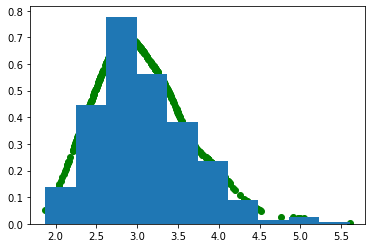

 mean loglikelihood of p_g  -0.832616
Gradient cte 0.004708189964294434
 Cte Update  1.9168956333398812

 pn/(pn+pm) 2 0.6389198

 std dev y_predit 0.585717
mean y_predit 3.0759728
pn/(pn+pm)  0.5351578
std dev y_pred 0.585716963
 model train on batch  -0.8698875308036804
############ iteration  671 ################
 p_nx  [0.626486838 0.625074208 0.630869 ... 0.599050045 0.566620946 0.631686211]


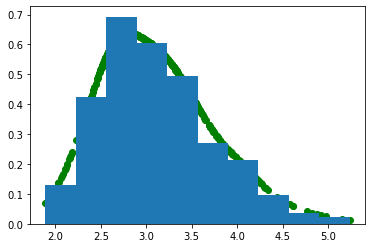

 mean loglikelihood of p_g  -0.891400099
Gradient cte 0.004917312145233155
 Cte Update  1.9218129454851143

 pn/(pn+pm) 2 0.6558316

 std dev y_predit 0.61522377
mean y_predit 3.112269
pn/(pn+pm)  0.557921648
std dev y_pred 0.615223825
 model train on batch  -0.8339306116104126
############ iteration  672 ################
 p_nx  [0.70450139 0.685239136 0.650442243 ... 0.682918906 0.588539183 0.699358284]


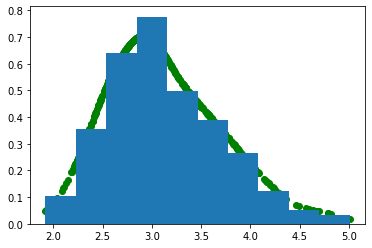

 mean loglikelihood of p_g  -0.830480874
Gradient cte -0.002093510627746582
 Cte Update  1.9197194348573676

 pn/(pn+pm) 2 0.6407497

 std dev y_predit 0.57742804
mean y_predit 3.1314125
pn/(pn+pm)  0.539164603
std dev y_pred 0.577428
 model train on batch  -0.8688018321990967
############ iteration  673 ################
 p_nx  [0.671614468 0.682284892 0.643575311 ... 0.620036602 0.680849 0.633835077]


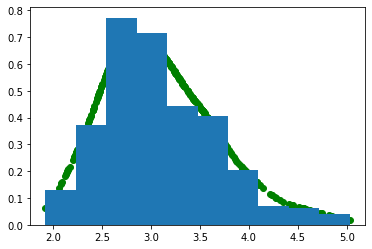

 mean loglikelihood of p_g  -0.824128687
Gradient cte -0.003720837116241455
 Cte Update  1.9159985977411262

 pn/(pn+pm) 2 0.6430224

 std dev y_predit 0.5759001
mean y_predit 3.0938182
pn/(pn+pm)  0.539518237
std dev y_pred 0.575900078
 model train on batch  -0.8611119985580444
############ iteration  674 ################
 p_nx  [0.440576077 0.656379163 0.655808508 ... 0.603825569 0.628452599 0.568964]


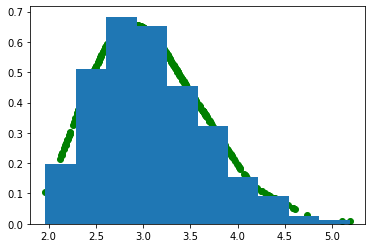

 mean loglikelihood of p_g  -0.837703824
Gradient cte 0.0010696678161621093
 Cte Update  1.9170682655572884

 pn/(pn+pm) 2 0.6503656

 std dev y_predit 0.578552
mean y_predit 3.0746524
pn/(pn+pm)  0.551615655
std dev y_pred 0.578552
 model train on batch  -0.8476782441139221
############ iteration  675 ################
 p_nx  [0.661986 0.658605099 0.659413934 ... 0.658384085 0.622915566 0.657555461]


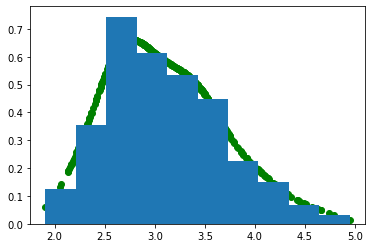

 mean loglikelihood of p_g  -0.836073637
Gradient cte 0.001899517297744751
 Cte Update  1.918967782855033

 pn/(pn+pm) 2 0.65629447

 std dev y_predit 0.57892895
mean y_predit 3.0985925
pn/(pn+pm)  0.55460012
std dev y_pred 0.578928947
 model train on batch  -0.8298589587211609
############ iteration  676 ################
 p_nx  [0.642567635 0.63806808 0.61051023 ... 0.643167555 0.644031465 0.632787168]


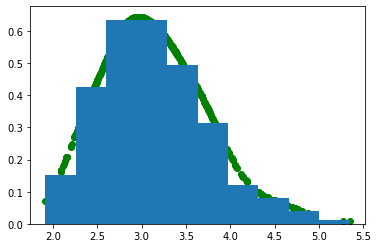

 mean loglikelihood of p_g  -0.876836777
Gradient cte -0.002697218418121338
 Cte Update  1.9162705644369118

 pn/(pn+pm) 2 0.6508507

 std dev y_predit 0.5989558
mean y_predit 3.1375268
pn/(pn+pm)  0.554274142
std dev y_pred 0.59895575
 model train on batch  -0.848685622215271
############ iteration  677 ################
 p_nx  [0.627869725 0.640144348 0.602861226 ... 0.579870522 0.567981064 0.590266764]


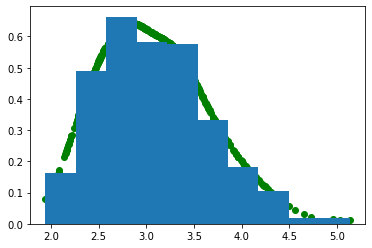

 mean loglikelihood of p_g  -0.832602799
Gradient cte 0.0007081054449081421
 Cte Update  1.9169786698818199

 pn/(pn+pm) 2 0.6538898

 std dev y_predit 0.5751125
mean y_predit 3.085314
pn/(pn+pm)  0.55411
std dev y_pred 0.575112522
 model train on batch  -0.8368862867355347
############ iteration  678 ################
 p_nx  [0.634561777 0.624773264 0.621713161 ... 0.633917 0.602513492 0.604516745]


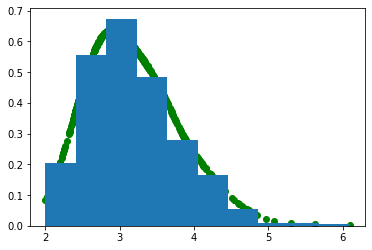

 mean loglikelihood of p_g  -0.901169181
Gradient cte -0.0026405601501464844
 Cte Update  1.9143381097316734

 pn/(pn+pm) 2 0.6526676

 std dev y_predit 0.6258674
mean y_predit 3.185939
pn/(pn+pm)  0.555367
std dev y_pred 0.625867426
 model train on batch  -0.8438541889190674
############ iteration  679 ################
 p_nx  [0.54604733 0.611337602 0.611504912 ... 0.620605111 0.632429123 0.548884451]


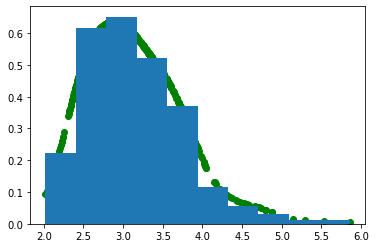

 mean loglikelihood of p_g  -0.859342456
Gradient cte -9.81886386871338e-05
 Cte Update  1.9142399210929864

 pn/(pn+pm) 2 0.65630007

 std dev y_predit 0.6091051
mean y_predit 3.1394947
pn/(pn+pm)  0.558159053
std dev y_pred 0.60910511
 model train on batch  -0.835463285446167
############ iteration  680 ################
 p_nx  [0.654862583 0.654195666 0.633455575 ... 0.650424838 0.653070807 0.576104879]


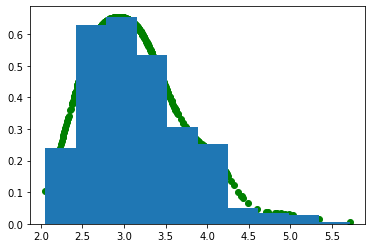

 mean loglikelihood of p_g  -0.86006552
Gradient cte 0.0035166323184967043
 Cte Update  1.917756553411483

 pn/(pn+pm) 2 0.6432811

 std dev y_predit 0.6120844
mean y_predit 3.158269
pn/(pn+pm)  0.541367948
std dev y_pred 0.612084389
 model train on batch  -0.8616136312484741
############ iteration  681 ################
 p_nx  [0.557252228 0.661269546 0.634873807 ... 0.576004386 0.488416582 0.463307023]


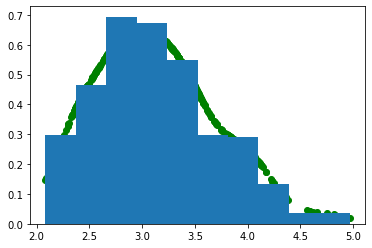

 mean loglikelihood of p_g  -0.826813638
Gradient cte 0.004665012836456299
 Cte Update  1.9224215662479394

 pn/(pn+pm) 2 0.6464545

 std dev y_predit 0.5742269
mean y_predit 3.1277997
pn/(pn+pm)  0.547164679
std dev y_pred 0.574226916
 model train on batch  -0.8557376861572266
############ iteration  682 ################
 p_nx  [0.661550522 0.534491181 0.690217495 ... 0.634910464 0.681251109 0.607142925]


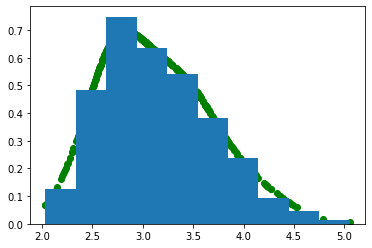

 mean loglikelihood of p_g  -0.777627885
Gradient cte -0.0037531118392944334
 Cte Update  1.918668454408645

 pn/(pn+pm) 2 0.64219415

 std dev y_predit 0.5450685
mean y_predit 3.1420894
pn/(pn+pm)  0.536523044
std dev y_pred 0.545068502
 model train on batch  -0.8598212599754333
############ iteration  683 ################
 p_nx  [0.376939237 0.642275453 0.641627431 ... 0.635823905 0.531287968 0.49359408]


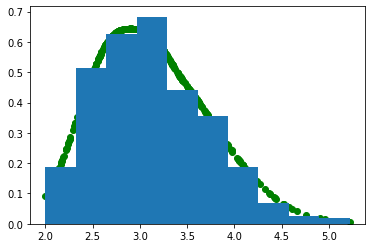

 mean loglikelihood of p_g  -0.842880249
Gradient cte 0.0004363733530044556
 Cte Update  1.9191048277616494

 pn/(pn+pm) 2 0.6509472

 std dev y_predit 0.5811357
mean y_predit 3.1301847
pn/(pn+pm)  0.552229464
std dev y_pred 0.58113569
 model train on batch  -0.8455891013145447
############ iteration  684 ################
 p_nx  [0.601953268 0.601790249 0.584366679 ... 0.620178819 0.614994645 0.600447357]


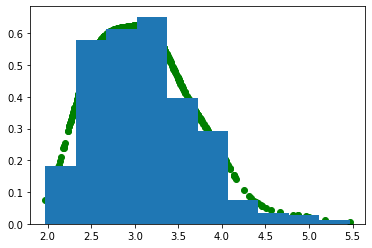

 mean loglikelihood of p_g  -0.836150467
Gradient cte -0.006887788295745849
 Cte Update  1.9122170394659035

 pn/(pn+pm) 2 0.6543749

 std dev y_predit 0.58630294
mean y_predit 3.1113198
pn/(pn+pm)  0.555073738
std dev y_pred 0.586302936
 model train on batch  -0.8378320336341858
############ iteration  685 ################
 p_nx  [0.731336951 0.619855642 0.633072078 ... 0.731976807 0.683901429 0.688790262]


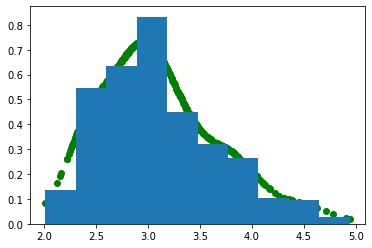

 mean loglikelihood of p_g  -0.80561763
Gradient cte 0.0012909016609191895
 Cte Update  1.9135079411268228

 pn/(pn+pm) 2 0.6351819

 std dev y_predit 0.57540125
mean y_predit 3.104615
pn/(pn+pm)  0.535082757
std dev y_pred 0.575401306
 model train on batch  -0.8841144442558289
############ iteration  686 ################
 p_nx  [0.668857038 0.602240622 0.648037374 ... 0.601010203 0.512316465 0.67042321]


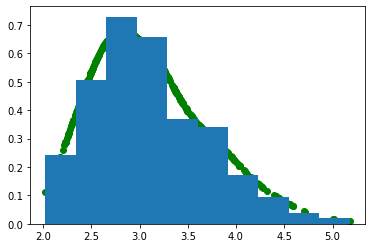

 mean loglikelihood of p_g  -0.84153378
Gradient cte -0.0033199493885040284
 Cte Update  1.9101879917383187

 pn/(pn+pm) 2 0.6483212

 std dev y_predit 0.5919354
mean y_predit 3.101767
pn/(pn+pm)  0.548356891
std dev y_pred 0.591935396
 model train on batch  -0.8523780703544617
############ iteration  687 ################
 p_nx  [0.672980785 0.62248826 0.594948769 ... 0.561822355 0.513831079 0.668340862]


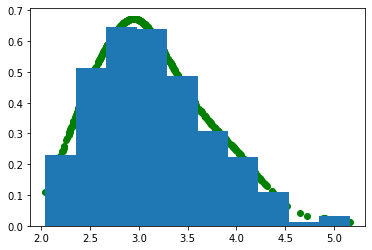

 mean loglikelihood of p_g  -0.845670283
Gradient cte -0.004685882091522217
 Cte Update  1.9055021096467963

 pn/(pn+pm) 2 0.6465304

 std dev y_predit 0.58691776
mean y_predit 3.1417975
pn/(pn+pm)  0.546778619
std dev y_pred 0.586917818
 model train on batch  -0.8597301840782166
############ iteration  688 ################
 p_nx  [0.596155167 0.634903193 0.613024533 ... 0.648069799 0.568638504 0.644127309]


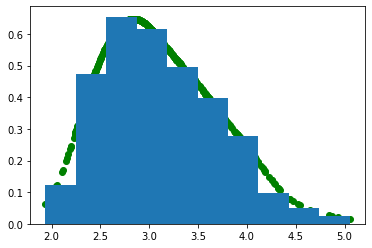

 mean loglikelihood of p_g  -0.848257363
Gradient cte 0.0033782663345336915
 Cte Update  1.90888037598133

 pn/(pn+pm) 2 0.6599567

 std dev y_predit 0.58892125
mean y_predit 3.1187742
pn/(pn+pm)  0.563695192
std dev y_pred 0.588921249
 model train on batch  -0.8289026021957397
############ iteration  689 ################
 p_nx  [0.615880072 0.683543444 0.67277348 ... 0.684057653 0.707081318 0.623163939]


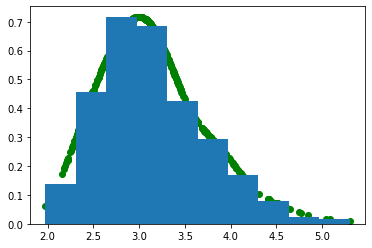

 mean loglikelihood of p_g  -0.821822226
Gradient cte -0.002124249458312988
 Cte Update  1.906756126523017

 pn/(pn+pm) 2 0.6305906

 std dev y_predit 0.57529795
mean y_predit 3.1398056
pn/(pn+pm)  0.525117278
std dev y_pred 0.575297952
 model train on batch  -0.8915495872497559
############ iteration  690 ################
 p_nx  [0.679243922 0.535488129 0.652654588 ... 0.598544955 0.671294272 0.629736483]


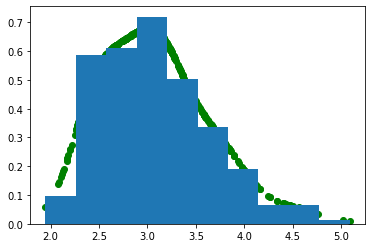

 mean loglikelihood of p_g  -0.799034178
Gradient cte -0.0027832138538360597
 Cte Update  1.9039729126691811

 pn/(pn+pm) 2 0.6445424

 std dev y_predit 0.564504
mean y_predit 3.0806093
pn/(pn+pm)  0.54230392
std dev y_pred 0.564504
 model train on batch  -0.8619164228439331
############ iteration  691 ################
 p_nx  [0.67426753 0.661988497 0.664230347 ... 0.666399062 0.66930306 0.658292711]


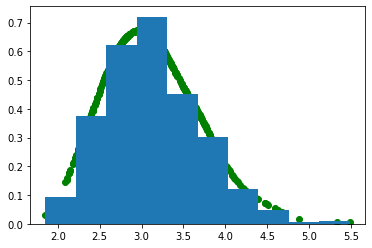

 mean loglikelihood of p_g  -0.827236712
Gradient cte 0.0009908638000488282
 Cte Update  1.90496377646923

 pn/(pn+pm) 2 0.64216346

 std dev y_predit 0.5719786
mean y_predit 3.1294072
pn/(pn+pm)  0.539488077
std dev y_pred 0.571978688
 model train on batch  -0.8662621974945068
############ iteration  692 ################
 p_nx  [0.652704716 0.48954159 0.629399061 ... 0.717488825 0.71036005 0.608975112]


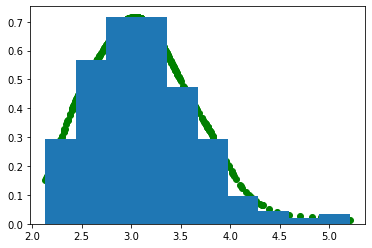

 mean loglikelihood of p_g  -0.766338587
Gradient cte 0.003555272102355957
 Cte Update  1.908519048571586

 pn/(pn+pm) 2 0.6339505

 std dev y_predit 0.5433367
mean y_predit 3.1225176
pn/(pn+pm)  0.527026653
std dev y_pred 0.543336689
 model train on batch  -0.8818192481994629
############ iteration  693 ################
 p_nx  [0.685251892 0.686341166 0.645372748 ... 0.608005404 0.439131409 0.606222451]


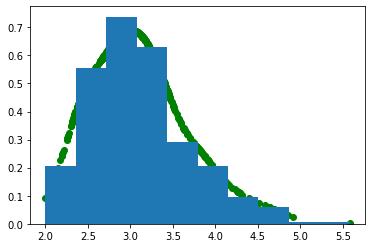

 mean loglikelihood of p_g  -0.825218856
Gradient cte -0.004450767040252685
 Cte Update  1.9040682815313332

 pn/(pn+pm) 2 0.6385343

 std dev y_predit 0.5823029
mean y_predit 3.1071718
pn/(pn+pm)  0.535053194
std dev y_pred 0.582302928
 model train on batch  -0.8751499056816101
############ iteration  694 ################
 p_nx  [0.651833534 0.705000401 0.641328573 ... 0.67751652 0.65717274 0.685434878]


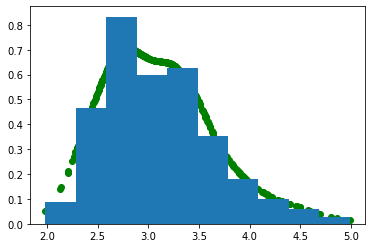

 mean loglikelihood of p_g  -0.756952763
Gradient cte 0.001974833011627197
 Cte Update  1.9060431145429604

 pn/(pn+pm) 2 0.63625383

 std dev y_predit 0.54206717
mean y_predit 3.1011627
pn/(pn+pm)  0.524428368
std dev y_pred 0.54206717
 model train on batch  -0.8700802326202393
############ iteration  695 ################
 p_nx  [0.62410152 0.543307 0.6234079 ... 0.607113123 0.633283138 0.603762269]


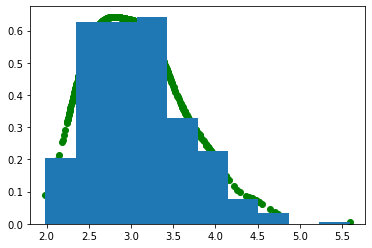

 mean loglikelihood of p_g  -0.812593
Gradient cte 0.0007915539741516113
 Cte Update  1.906834668517112

 pn/(pn+pm) 2 0.6523054

 std dev y_predit 0.5739456
mean y_predit 3.0772192
pn/(pn+pm)  0.551032782
std dev y_pred 0.573945642
 model train on batch  -0.8423353433609009
############ iteration  696 ################
 p_nx  [0.68787092 0.707442164 0.711873055 ... 0.565745711 0.691020668 0.650930583]


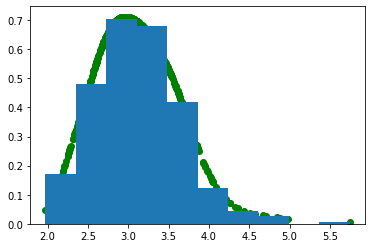

 mean loglikelihood of p_g  -0.746353
Gradient cte 0.007068146228790284
 Cte Update  1.9139028147459023

 pn/(pn+pm) 2 0.63109154

 std dev y_predit 0.5310682
mean y_predit 3.1173272
pn/(pn+pm)  0.52189666
std dev y_pred 0.531068265
 model train on batch  -0.8842374086380005
############ iteration  697 ################
 p_nx  [0.671150923 0.682399392 0.673736572 ... 0.658586562 0.678466 0.649712503]


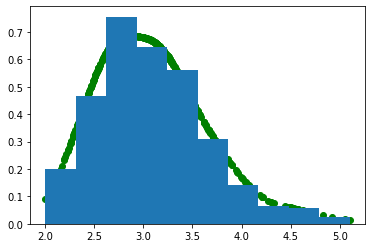

 mean loglikelihood of p_g  -0.793004155
Gradient cte 0.00270305871963501
 Cte Update  1.9166058734655373

 pn/(pn+pm) 2 0.6364224

 std dev y_predit 0.56089705
mean y_predit 3.0863204
pn/(pn+pm)  0.52930367
std dev y_pred 0.560897052
 model train on batch  -0.8728004097938538
############ iteration  698 ################
 p_nx  [0.665920675 0.618959248 0.650786579 ... 0.644348145 0.540683329 0.631909728]


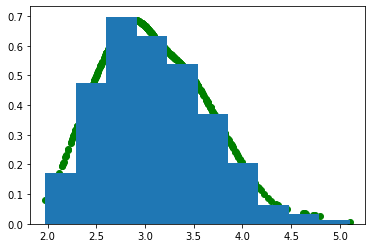

 mean loglikelihood of p_g  -0.793746233
Gradient cte 0.005167752742767334
 Cte Update  1.9217736262083047

 pn/(pn+pm) 2 0.64604414

 std dev y_predit 0.55082864
mean y_predit 3.0938382
pn/(pn+pm)  0.544130802
std dev y_pred 0.550828636
 model train on batch  -0.8538296222686768
############ iteration  699 ################
 p_nx  [0.691649675 0.565023422 0.626675069 ... 0.675269485 0.689313 0.505849957]


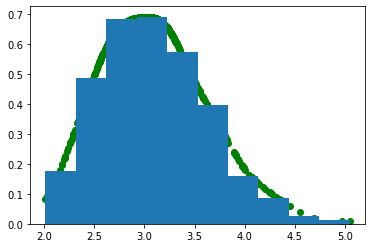

 mean loglikelihood of p_g  -0.764114201
Gradient cte -0.0023185372352600097
 Cte Update  1.9194550889730446

 pn/(pn+pm) 2 0.63393617

 std dev y_predit 0.5335256
mean y_predit 3.0964074
pn/(pn+pm)  0.526942611
std dev y_pred 0.533525586
 model train on batch  -0.8772347569465637
############ iteration  700 ################
 p_nx  [0.696606159 0.569808364 0.695856512 ... 0.675569654 0.682770133 0.695991278]


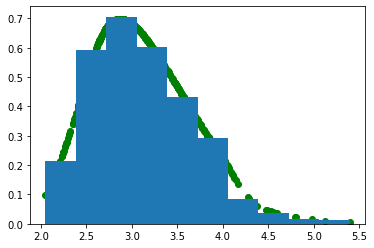

 mean loglikelihood of p_g  -0.788458288
Gradient cte -0.002026092052459717
 Cte Update  1.9174289969205849

 pn/(pn+pm) 2 0.6385364

 std dev y_predit 0.5547299
mean y_predit 3.116564
pn/(pn+pm)  0.533024609
std dev y_pred 0.554729819
 model train on batch  -0.8693878650665283
############ iteration  701 ################
 p_nx  [0.735070825 0.75337249 0.717749238 ... 0.761655688 0.704094 0.660324872]


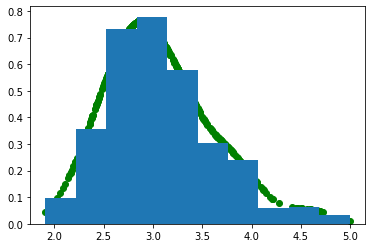

 mean loglikelihood of p_g  -0.767587304
Gradient cte 2.3909449577331544e-05
 Cte Update  1.9174529063701622

 pn/(pn+pm) 2 0.62530607

 std dev y_predit 0.5469562
mean y_predit 3.0738897
pn/(pn+pm)  0.516889572
std dev y_pred 0.546956182
 model train on batch  -0.8973842263221741
############ iteration  702 ################
 p_nx  [0.675560951 0.672566891 0.668334186 ... 0.677895606 0.674739361 0.636844337]


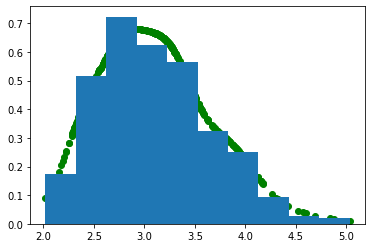

 mean loglikelihood of p_g  -0.788169622
Gradient cte 0.0011791396141052246
 Cte Update  1.9186320459842674

 pn/(pn+pm) 2 0.63762134

 std dev y_predit 0.5506284
mean y_predit 3.102961
pn/(pn+pm)  0.533902943
std dev y_pred 0.550628424
 model train on batch  -0.8710194230079651
############ iteration  703 ################
 p_nx  [0.634050906 0.547713935 0.650051832 ... 0.685049 0.737571061 0.363841861]


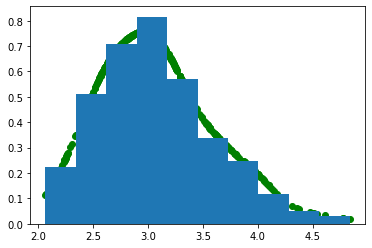

 mean loglikelihood of p_g  -0.739883542
Gradient cte -0.005302957534790039
 Cte Update  1.9133290884494774

 pn/(pn+pm) 2 0.6233971

 std dev y_predit 0.52576375
mean y_predit 3.0738406
pn/(pn+pm)  0.513287723
std dev y_pred 0.52576375
 model train on batch  -0.9018068313598633
############ iteration  704 ################
 p_nx  [0.724506378 0.599058628 0.638133526 ... 0.571238518 0.506972551 0.725059748]


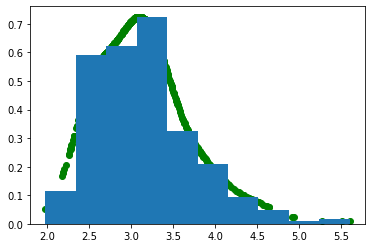

 mean loglikelihood of p_g  -0.807172954
Gradient cte -0.0018137359619140624
 Cte Update  1.9115153524875632

 pn/(pn+pm) 2 0.63021

 std dev y_predit 0.5798012
mean y_predit 3.1458104
pn/(pn+pm)  0.520545
std dev y_pred 0.579801202
 model train on batch  -0.8877230286598206
############ iteration  705 ################
 p_nx  [0.711901546 0.686319232 0.6135 ... 0.692691624 0.626801491 0.714909077]


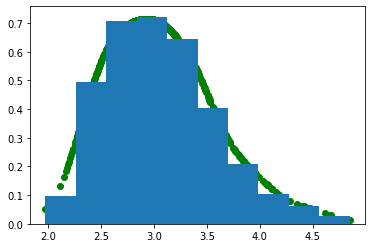

 mean loglikelihood of p_g  -0.726875603
Gradient cte 0.00013870817422866822
 Cte Update  1.9116540606617918

 pn/(pn+pm) 2 0.6317955

 std dev y_predit 0.52124554
mean y_predit 3.0607862
pn/(pn+pm)  0.520325422
std dev y_pred 0.521245539
 model train on batch  -0.8820706605911255
############ iteration  706 ################
 p_nx  [0.656307459 0.532744408 0.660435438 ... 0.710883558 0.65817374 0.638584316]


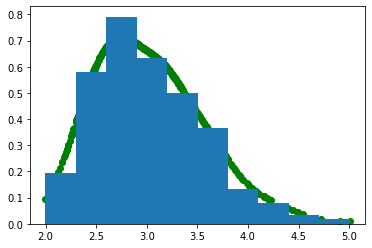

 mean loglikelihood of p_g  -0.752769411
Gradient cte -0.0028993568420410155
 Cte Update  1.9087547038197508

 pn/(pn+pm) 2 0.6444323

 std dev y_predit 0.53668445
mean y_predit 3.0246737
pn/(pn+pm)  0.538485587
std dev y_pred 0.536684453
 model train on batch  -0.8562588095664978
############ iteration  707 ################
 p_nx  [0.717047 0.754893959 0.737751842 ... 0.583919287 0.593781412 0.66675216]


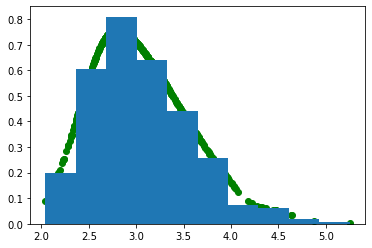

 mean loglikelihood of p_g  -0.72794348
Gradient cte 0.0026039071083068847
 Cte Update  1.9113586109280576

 pn/(pn+pm) 2 0.6312876

 std dev y_predit 0.52702296
mean y_predit 3.0548453
pn/(pn+pm)  0.51997894
std dev y_pred 0.527022958
 model train on batch  -0.8825002908706665
############ iteration  708 ################
 p_nx  [0.699212253 0.713003278 0.732056 ... 0.670228601 0.74687624 0.57141614]


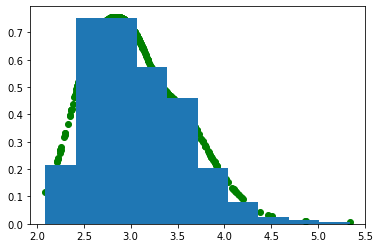

 mean loglikelihood of p_g  -0.708253443
Gradient cte 0.001630190372467041
 Cte Update  1.9129888013005247

 pn/(pn+pm) 2 0.63589764

 std dev y_predit 0.5165014
mean y_predit 3.0514555
pn/(pn+pm)  0.527285218
std dev y_pred 0.516501427
 model train on batch  -0.8747218251228333
############ iteration  709 ################
 p_nx  [0.608392894 0.70772934 0.635768712 ... 0.497380227 0.672423601 0.587772965]


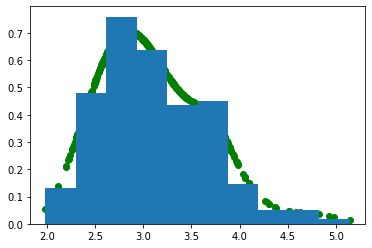

 mean loglikelihood of p_g  -0.782830954
Gradient cte 0.0030390839576721193
 Cte Update  1.916027885258197

 pn/(pn+pm) 2 0.6440687

 std dev y_predit 0.5606319
mean y_predit 3.1159432
pn/(pn+pm)  0.542338967
std dev y_pred 0.560631871
 model train on batch  -0.8596394062042236
############ iteration  710 ################
 p_nx  [0.64401859 0.713731229 0.660584092 ... 0.708863795 0.618169367 0.603053868]


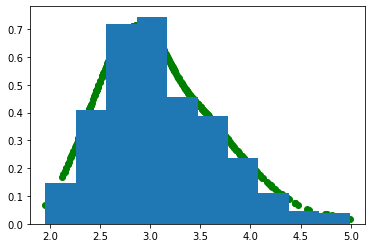

 mean loglikelihood of p_g  -0.814471364
Gradient cte -0.0004649317264556885
 Cte Update  1.915562953531741

 pn/(pn+pm) 2 0.64062923

 std dev y_predit 0.5714384
mean y_predit 3.1014009
pn/(pn+pm)  0.538444221
std dev y_pred 0.571438372
 model train on batch  -0.8688662648200989
############ iteration  711 ################
 p_nx  [0.707092762 0.664179 0.747415245 ... 0.637579 0.715752602 0.74876684]


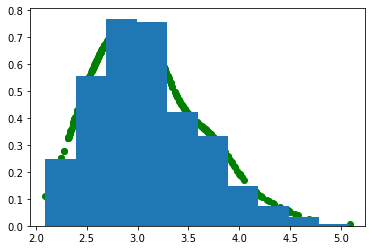

 mean loglikelihood of p_g  -0.733953476
Gradient cte -0.00689944839477539
 Cte Update  1.9086635051369658

 pn/(pn+pm) 2 0.6278103

 std dev y_predit 0.5265724
mean y_predit 3.0893788
pn/(pn+pm)  0.519397557
std dev y_pred 0.526572406
 model train on batch  -0.8940919637680054
############ iteration  712 ################
 p_nx  [0.649334669 0.656945288 0.653237104 ... 0.64765805 0.655884504 0.623995]


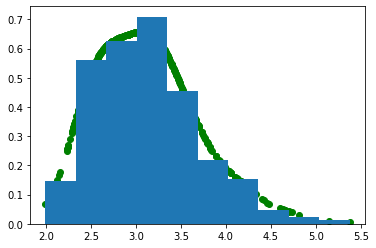

 mean loglikelihood of p_g  -0.8102144
Gradient cte 0.0007334182262420655
 Cte Update  1.9093969233632078

 pn/(pn+pm) 2 0.6448322

 std dev y_predit 0.5701353
mean y_predit 3.1202626
pn/(pn+pm)  0.539908588
std dev y_pred 0.570135236
 model train on batch  -0.8567619919776917
############ iteration  713 ################
 p_nx  [0.528306 0.645488441 0.639749765 ... 0.690875709 0.557273507 0.652774096]


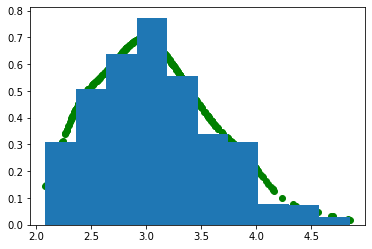

 mean loglikelihood of p_g  -0.779717147
Gradient cte 0.006298745632171631
 Cte Update  1.9156956689953795

 pn/(pn+pm) 2 0.6425118

 std dev y_predit 0.54982185
mean y_predit 3.0837722
pn/(pn+pm)  0.542420566
std dev y_pred 0.549821854
 model train on batch  -0.8653034567832947
############ iteration  714 ################
 p_nx  [0.712177932 0.709032774 0.697778702 ... 0.713920176 0.603726566 0.650098324]


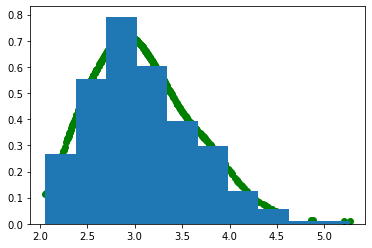

 mean loglikelihood of p_g  -0.782004535
Gradient cte -0.004662473678588867
 Cte Update  1.9110331953167905

 pn/(pn+pm) 2 0.6360031

 std dev y_predit 0.5522847
mean y_predit 3.0901508
pn/(pn+pm)  0.531212866
std dev y_pred 0.552284718
 model train on batch  -0.8778053522109985
############ iteration  715 ################
 p_nx  [0.710998535 0.733260632 0.73093605 ... 0.711177886 0.704568863 0.727226913]


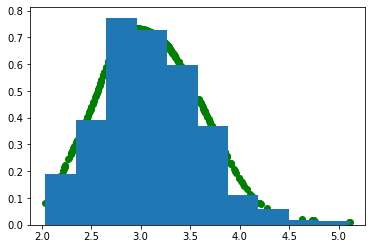

 mean loglikelihood of p_g  -0.720343888
Gradient cte -0.004827910423278808
 Cte Update  1.9062052848935116

 pn/(pn+pm) 2 0.62572265

 std dev y_predit 0.509762
mean y_predit 3.1086812
pn/(pn+pm)  0.514067531
std dev y_pred 0.509762
 model train on batch  -0.8957247734069824
############ iteration  716 ################
 p_nx  [0.618523777 0.567956448 0.380439073 ... 0.643754244 0.655276477 0.629985452]


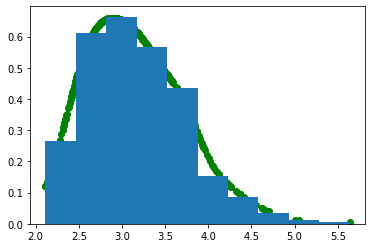

 mean loglikelihood of p_g  -0.807661295
Gradient cte 0.002083375930786133
 Cte Update  1.9082886608242977

 pn/(pn+pm) 2 0.64789194

 std dev y_predit 0.56858397
mean y_predit 3.152557
pn/(pn+pm)  0.54571861
std dev y_pred 0.568583965
 model train on batch  -0.8522179126739502
############ iteration  717 ################
 p_nx  [0.656438947 0.788767457 0.802634537 ... 0.400046736 0.797045231 0.712945163]


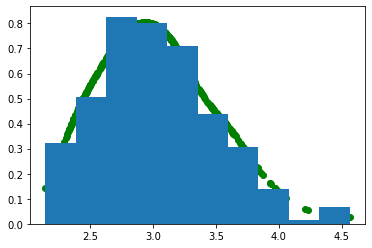

 mean loglikelihood of p_g  -0.632946551
Gradient cte 0.010769619941711425
 Cte Update  1.919058280766009

 pn/(pn+pm) 2 0.61492544

 std dev y_predit 0.47285768
mean y_predit 3.0367665
pn/(pn+pm)  0.500019372
std dev y_pred 0.472857684
 model train on batch  -0.9150713682174683
############ iteration  718 ################
 p_nx  [0.688433349 0.659221232 0.701319218 ... 0.698187053 0.708572805 0.710009217]


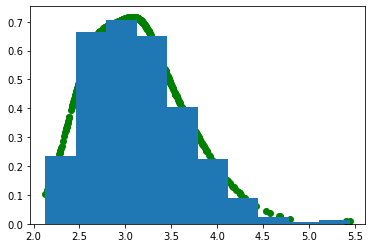

 mean loglikelihood of p_g  -0.731743
Gradient cte -0.004169132232666016
 Cte Update  1.914889148533343

 pn/(pn+pm) 2 0.6278495

 std dev y_predit 0.52996993
mean y_predit 3.1303375
pn/(pn+pm)  0.51614219
std dev y_pred 0.529969871
 model train on batch  -0.889031171798706
############ iteration  719 ################
 p_nx  [0.684563756 0.523111 0.679254889 ... 0.543690324 0.721095324 0.749004304]


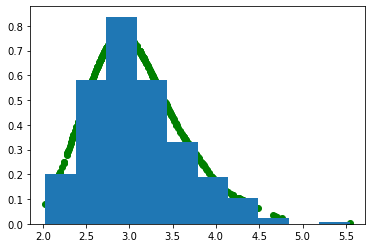

 mean loglikelihood of p_g  -0.746961236
Gradient cte -0.004942304611206054
 Cte Update  1.909946843922137

 pn/(pn+pm) 2 0.62272936

 std dev y_predit 0.53634346
mean y_predit 3.0870478
pn/(pn+pm)  0.511392891
std dev y_pred 0.536343396
 model train on batch  -0.9032536149024963
############ iteration  720 ################
 p_nx  [0.72462666 0.753674686 0.633476436 ... 0.745116472 0.752587616 0.749839067]


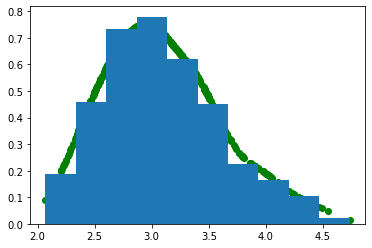

 mean loglikelihood of p_g  -0.719667137
Gradient cte 0.005213645935058594
 Cte Update  1.9151604898571957

 pn/(pn+pm) 2 0.62430996

 std dev y_predit 0.514769
mean y_predit 3.0969849
pn/(pn+pm)  0.511948466
std dev y_pred 0.514769
 model train on batch  -0.8980817198753357
############ iteration  721 ################
 p_nx  [0.505681574 0.717614412 0.652023435 ... 0.667924762 0.672834456 0.705673397]


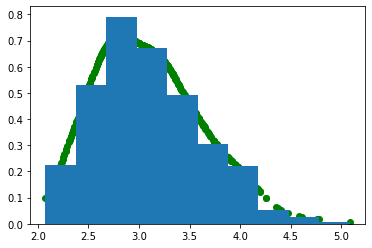

 mean loglikelihood of p_g  -0.737187147
Gradient cte 0.001148515224456787
 Cte Update  1.9163090050816525

 pn/(pn+pm) 2 0.6325506

 std dev y_predit 0.5258187
mean y_predit 3.0943658
pn/(pn+pm)  0.52335
std dev y_pred 0.525818646
 model train on batch  -0.8786422610282898
############ iteration  722 ################
 p_nx  [0.739442706 0.733404338 0.725791335 ... 0.717973471 0.58833462 0.588472366]


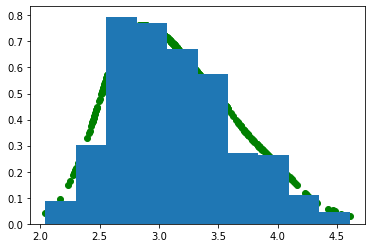

 mean loglikelihood of p_g  -0.687208414
Gradient cte -0.005849468231201172
 Cte Update  1.9104595368504513

 pn/(pn+pm) 2 0.6243704

 std dev y_predit 0.500323
mean y_predit 3.1339633
pn/(pn+pm)  0.510484755
std dev y_pred 0.500323
 model train on batch  -0.8968862891197205
############ iteration  723 ################
 p_nx  [0.655018151 0.682012916 0.690285623 ... 0.691201 0.687543333 0.69001019]


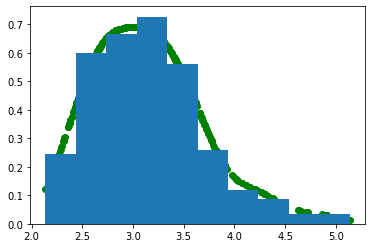

 mean loglikelihood of p_g  -0.764399171
Gradient cte -0.0010677824020385743
 Cte Update  1.9093917544484127

 pn/(pn+pm) 2 0.63350964

 std dev y_predit 0.5484455
mean y_predit 3.1423337
pn/(pn+pm)  0.523355
std dev y_pred 0.548445523
 model train on batch  -0.8787999749183655
############ iteration  724 ################
 p_nx  [0.720750213 0.573163748 0.729500771 ... 0.727892339 0.667084157 0.628602147]


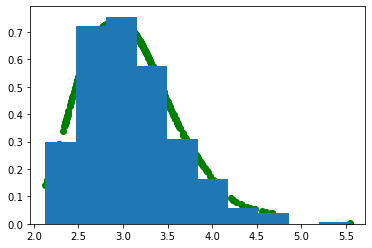

 mean loglikelihood of p_g  -0.733842492
Gradient cte -0.007149164199829102
 Cte Update  1.9022425902485836

 pn/(pn+pm) 2 0.62618846

 std dev y_predit 0.5319244
mean y_predit 3.0838494
pn/(pn+pm)  0.512742579
std dev y_pred 0.531924486
 model train on batch  -0.8958171606063843
############ iteration  725 ################
 p_nx  [0.684219122 0.736696959 0.70486325 ... 0.550116718 0.744457364 0.70552063]


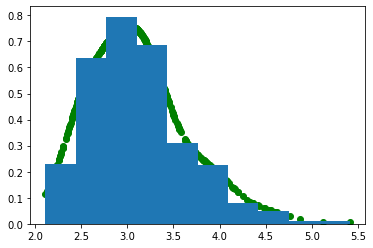

 mean loglikelihood of p_g  -0.747821689
Gradient cte -0.0011523990631103515
 Cte Update  1.9010901911854732

 pn/(pn+pm) 2 0.6189195

 std dev y_predit 0.54202706
mean y_predit 3.1080132
pn/(pn+pm)  0.505094588
std dev y_pred 0.542027056
 model train on batch  -0.9129495620727539
############ iteration  726 ################
 p_nx  [0.698840916 0.679346263 0.653976679 ... 0.68659091 0.680616617 0.677506864]


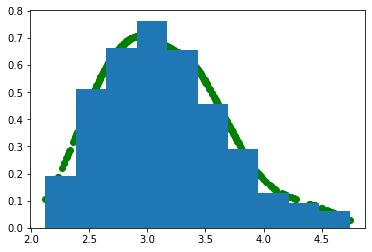

 mean loglikelihood of p_g  -0.738293707
Gradient cte 0.00011530590057373047
 Cte Update  1.9012054970860468

 pn/(pn+pm) 2 0.6348243

 std dev y_predit 0.52393484
mean y_predit 3.141646
pn/(pn+pm)  0.523753762
std dev y_pred 0.523934901
 model train on batch  -0.8779634237289429
############ iteration  727 ################
 p_nx  [0.740974188 0.753422439 0.75212878 ... 0.742190301 0.732129693 0.675626636]


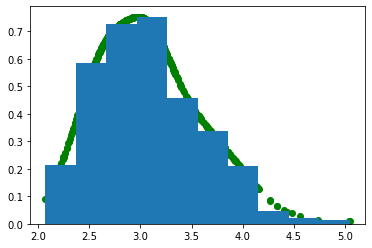

 mean loglikelihood of p_g  -0.716205776
Gradient cte 0.003220535755157471
 Cte Update  1.9044260328412044

 pn/(pn+pm) 2 0.62474

 std dev y_predit 0.5160716
mean y_predit 3.0849733
pn/(pn+pm)  0.512517273
std dev y_pred 0.516071618
 model train on batch  -0.8995515704154968
############ iteration  728 ################
 p_nx  [0.600872636 0.779655397 0.683684587 ... 0.648946524 0.649090111 0.741765738]


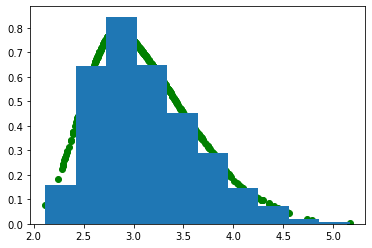

 mean loglikelihood of p_g  -0.695935488
Gradient cte 0.001225804090499878
 Cte Update  1.9056518369317041

 pn/(pn+pm) 2 0.62058747

 std dev y_predit 0.5137514
mean y_predit 3.1117384
pn/(pn+pm)  0.505132914
std dev y_pred 0.513751388
 model train on batch  -0.9049801826477051
############ iteration  729 ################
 p_nx  [0.677831292 0.692980707 0.691750288 ... 0.662210166 0.651070595 0.69040674]


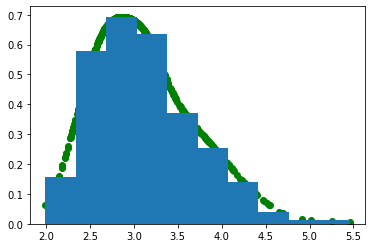

 mean loglikelihood of p_g  -0.81150353
Gradient cte -0.0010675415992736817
 Cte Update  1.9045842953324306

 pn/(pn+pm) 2 0.639847

 std dev y_predit 0.57812655
mean y_predit 3.1248434
pn/(pn+pm)  0.53567946
std dev y_pred 0.57812655
 model train on batch  -0.8709464073181152
############ iteration  730 ################
 p_nx  [0.691628218 0.717606902 0.694844902 ... 0.734357595 0.653380096 0.740112603]


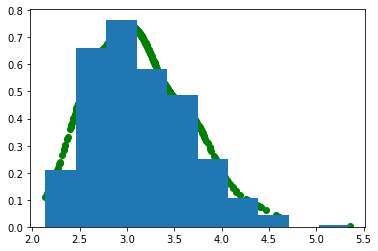

 mean loglikelihood of p_g  -0.728519619
Gradient cte -0.002981090545654297
 Cte Update  1.9016032047867764

 pn/(pn+pm) 2 0.63037515

 std dev y_predit 0.5202641
mean y_predit 3.1373863
pn/(pn+pm)  0.521585405
std dev y_pred 0.520264089
 model train on batch  -0.8897293210029602
############ iteration  731 ################
 p_nx  [0.763857961 0.692461491 0.755651355 ... 0.741561353 0.759604275 0.535743773]


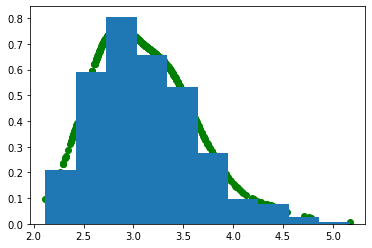

 mean loglikelihood of p_g  -0.708802283
Gradient cte 0.0027336015701293946
 Cte Update  1.9043368063569057

 pn/(pn+pm) 2 0.62194616

 std dev y_predit 0.5136614
mean y_predit 3.113811
pn/(pn+pm)  0.504675031
std dev y_pred 0.513661385
 model train on batch  -0.9011076092720032
############ iteration  732 ################
 p_nx  [0.627442 0.780802 0.77098453 ... 0.814245045 0.817888856 0.791734159]


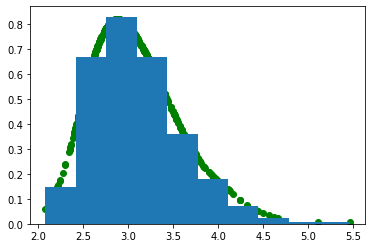

 mean loglikelihood of p_g  -0.673429608
Gradient cte 0.003518726348876953
 Cte Update  1.9078555327057827

 pn/(pn+pm) 2 0.61006165

 std dev y_predit 0.5035276
mean y_predit 3.0970228
pn/(pn+pm)  0.49014014
std dev y_pred 0.503527522
 model train on batch  -0.9259973168373108
############ iteration  733 ################
 p_nx  [0.743709743 0.741085529 0.754725516 ... 0.71018666 0.701280773 0.76755476]


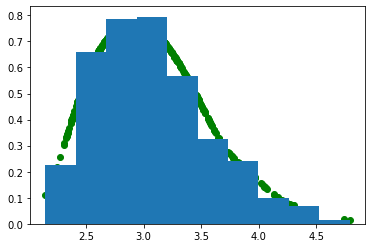

 mean loglikelihood of p_g  -0.661433339
Gradient cte -0.0011613284349441528
 Cte Update  1.9066942042708386

 pn/(pn+pm) 2 0.619104

 std dev y_predit 0.49161062
mean y_predit 3.073724
pn/(pn+pm)  0.501620412
std dev y_pred 0.491610616
 model train on batch  -0.9075952172279358
############ iteration  734 ################
 p_nx  [0.596764922 0.753518343 0.754661083 ... 0.753481328 0.740678191 0.75313437]


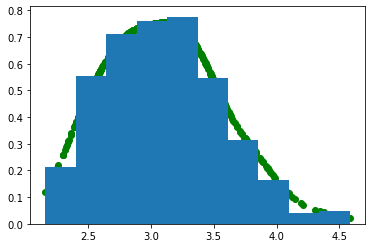

 mean loglikelihood of p_g  -0.643152297
Gradient cte 0.005833077430725098
 Cte Update  1.9125272817015637

 pn/(pn+pm) 2 0.6199713

 std dev y_predit 0.47004697
mean y_predit 3.0994868
pn/(pn+pm)  0.502830744
std dev y_pred 0.470046967
 model train on batch  -0.903400182723999
############ iteration  735 ################
 p_nx  [0.672194064 0.728305817 0.728280127 ... 0.687168658 0.665056586 0.713696539]


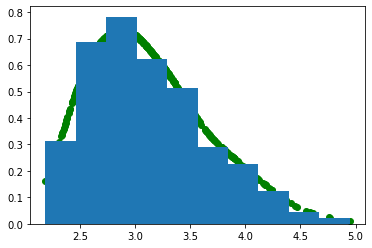

 mean loglikelihood of p_g  -0.736003458
Gradient cte 0.005250903606414795
 Cte Update  1.9177781853079785

 pn/(pn+pm) 2 0.6311687

 std dev y_predit 0.5342501
mean y_predit 3.1138964
pn/(pn+pm)  0.521675408
std dev y_pred 0.53425014
 model train on batch  -0.8835521340370178
############ iteration  736 ################
 p_nx  [0.741184115 0.716529489 0.72222054 ... 0.65715456 0.73922348 0.699253917]


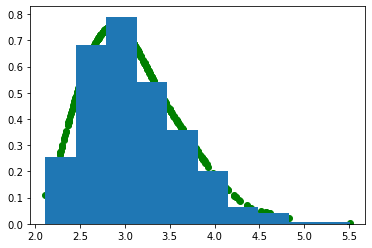

 mean loglikelihood of p_g  -0.731942
Gradient cte -0.0013835089206695557
 Cte Update  1.916394676387309

 pn/(pn+pm) 2 0.6274758

 std dev y_predit 0.5334665
mean y_predit 3.0980976
pn/(pn+pm)  0.517322898
std dev y_pred 0.533466518
 model train on batch  -0.8917990326881409
############ iteration  737 ################
 p_nx  [0.647370577 0.648165643 0.656724155 ... 0.670708477 0.645567536 0.64104116]


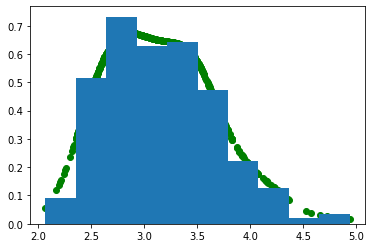

 mean loglikelihood of p_g  -0.736628115
Gradient cte 0.003630075454711914
 Cte Update  1.9200247518420208

 pn/(pn+pm) 2 0.6420132

 std dev y_predit 0.52405703
mean y_predit 3.1605825
pn/(pn+pm)  0.534171879
std dev y_pred 0.524057031
 model train on batch  -0.8583285808563232
############ iteration  738 ################
 p_nx  [0.773876905 0.732093036 0.753504 ... 0.69846046 0.608673453 0.689952612]


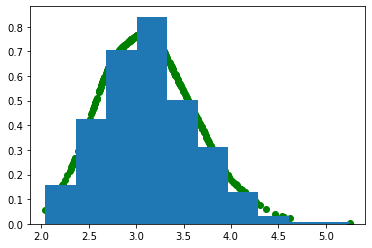

 mean loglikelihood of p_g  -0.688532054
Gradient cte 0.0035788609981536866
 Cte Update  1.9236036128401746

 pn/(pn+pm) 2 0.6164203

 std dev y_predit 0.49161
mean y_predit 3.1366973
pn/(pn+pm)  0.502390087
std dev y_pred 0.49161002
 model train on batch  -0.9106922149658203
############ iteration  739 ################
 p_nx  [0.654475212 0.584200621 0.752931118 ... 0.752212703 0.736558855 0.736034334]


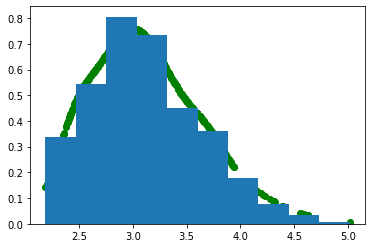

 mean loglikelihood of p_g  -0.707054436
Gradient cte -0.0008910064697265625
 Cte Update  1.922712606370448

 pn/(pn+pm) 2 0.62618774

 std dev y_predit 0.51186454
mean y_predit 3.1240401
pn/(pn+pm)  0.51805824
std dev y_pred 0.511864543
 model train on batch  -0.89494389295578
############ iteration  740 ################
 p_nx  [0.759003639 0.800718188 0.68969208 ... 0.71858722 0.794530571 0.789566]


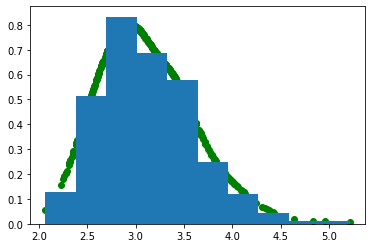

 mean loglikelihood of p_g  -0.672397733
Gradient cte -0.0015948023796081544
 Cte Update  1.9211178039908399

 pn/(pn+pm) 2 0.6129642

 std dev y_predit 0.49263537
mean y_predit 3.1141195
pn/(pn+pm)  0.495241463
std dev y_pred 0.492635399
 model train on batch  -0.917929470539093
############ iteration  741 ################
 p_nx  [0.73003912 0.7142 0.735419691 ... 0.717641473 0.71324271 0.73224628]


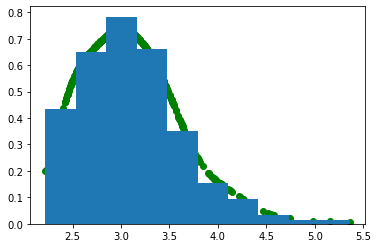

 mean loglikelihood of p_g  -0.709983289
Gradient cte 0.00016980254650115966
 Cte Update  1.921287606537341

 pn/(pn+pm) 2 0.6256066

 std dev y_predit 0.5227482
mean y_predit 3.100768
pn/(pn+pm)  0.513044953
std dev y_pred 0.522748172
 model train on batch  -0.8935422301292419
############ iteration  742 ################
 p_nx  [0.817280293 0.848981202 0.847401 ... 0.570177436 0.854294121 0.71546191]


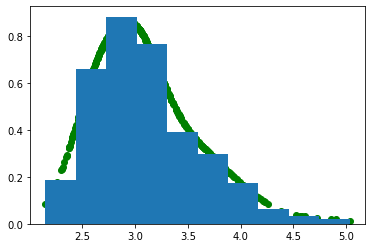

 mean loglikelihood of p_g  -0.649211287
Gradient cte -0.0030037426948547365
 Cte Update  1.9182838638424862

 pn/(pn+pm) 2 0.60196346

 std dev y_predit 0.49751422
mean y_predit 3.0966883
pn/(pn+pm)  0.481591851
std dev y_pred 0.497514218
 model train on batch  -0.941865861415863
############ iteration  743 ################
 p_nx  [0.798264265 0.793204546 0.823488832 ... 0.822402239 0.76994884 0.798909366]


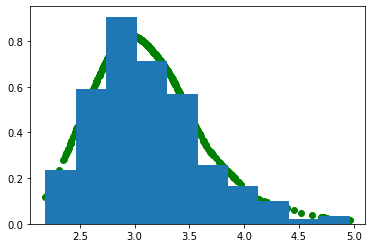

 mean loglikelihood of p_g  -0.67053318
Gradient cte -0.003027858257293701
 Cte Update  1.9152560055851924

 pn/(pn+pm) 2 0.60462815

 std dev y_predit 0.4981213
mean y_predit 3.1221848
pn/(pn+pm)  0.484420568
std dev y_pred 0.498121321
 model train on batch  -0.936465322971344
############ iteration  744 ################
 p_nx  [0.748798251 0.742629647 0.722659111 ... 0.60415566 0.77183938 0.767977953]


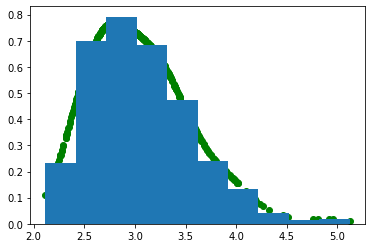

 mean loglikelihood of p_g  -0.682000637
Gradient cte 0.0014282963275909423
 Cte Update  1.9166843019127833

 pn/(pn+pm) 2 0.6216164

 std dev y_predit 0.50848943
mean y_predit 3.0599859
pn/(pn+pm)  0.505560935
std dev y_pred 0.50848943
 model train on batch  -0.8995823264122009
############ iteration  745 ################
 p_nx  [0.713060737 0.765090823 0.867095 ... 0.827383101 0.496495903 0.774291813]


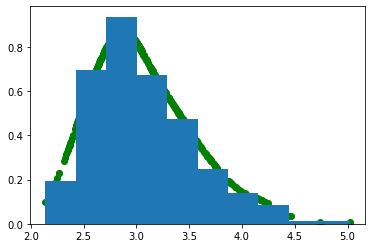

 mean loglikelihood of p_g  -0.631718338
Gradient cte 0.0008733040094375611
 Cte Update  1.9175576059222208

 pn/(pn+pm) 2 0.60766995

 std dev y_predit 0.47972554
mean y_predit 3.0574403
pn/(pn+pm)  0.487280548
std dev y_pred 0.479725569
 model train on batch  -0.9279720783233643
############ iteration  746 ################
 p_nx  [0.803161323 0.802030087 0.811840594 ... 0.810625196 0.810144484 0.812083721]


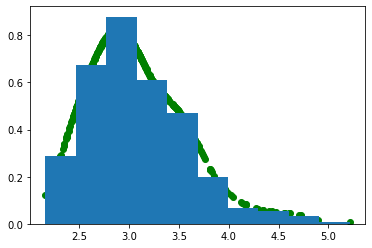

 mean loglikelihood of p_g  -0.672571599
Gradient cte 0.0047875199317932125
 Cte Update  1.922345125854014

 pn/(pn+pm) 2 0.61561924

 std dev y_predit 0.5076457
mean y_predit 3.0839732
pn/(pn+pm)  0.499711365
std dev y_pred 0.507645726
 model train on batch  -0.9130536913871765
############ iteration  747 ################
 p_nx  [0.659347 0.807313204 0.798640847 ... 0.800971031 0.785198 0.794588923]


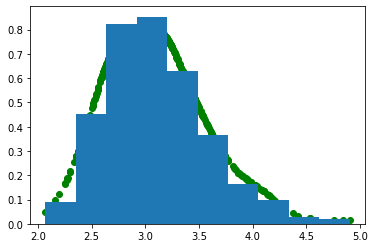

 mean loglikelihood of p_g  -0.637163341
Gradient cte -0.002858811378479004
 Cte Update  1.919486314475535

 pn/(pn+pm) 2 0.6034226

 std dev y_predit 0.47575614
mean y_predit 3.0992568
pn/(pn+pm)  0.481227666
std dev y_pred 0.475756139
 model train on batch  -0.9354959726333618
############ iteration  748 ################
 p_nx  [0.733293116 0.553265929 0.797147095 ... 0.706031501 0.735357285 0.692769587]


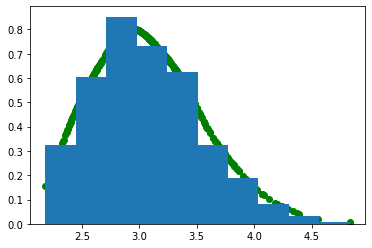

 mean loglikelihood of p_g  -0.639322281
Gradient cte -0.0007088832855224609
 Cte Update  1.9187774311900125

 pn/(pn+pm) 2 0.6133989

 std dev y_predit 0.47270772
mean y_predit 3.0668716
pn/(pn+pm)  0.495860219
std dev y_pred 0.472707719
 model train on batch  -0.9170259237289429
############ iteration  749 ################
 p_nx  [0.684634566 0.739305258 0.821187079 ... 0.752702475 0.806833267 0.810696304]


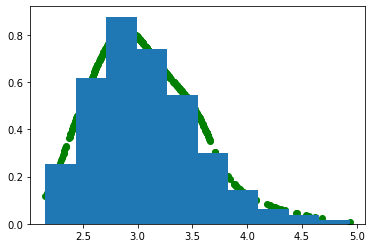

 mean loglikelihood of p_g  -0.642608047
Gradient cte 0.002772378206253052
 Cte Update  1.9215498093962655

 pn/(pn+pm) 2 0.61299306

 std dev y_predit 0.4811637
mean y_predit 3.0698092
pn/(pn+pm)  0.494438738
std dev y_pred 0.481163681
 model train on batch  -0.9167155027389526
############ iteration  750 ################
 p_nx  [0.836555 0.799320102 0.778859079 ... 0.811743 0.83191359 0.759148777]


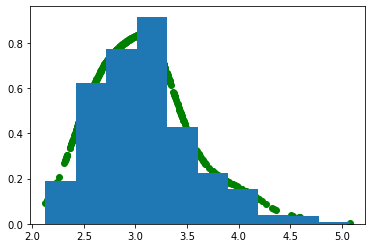

 mean loglikelihood of p_g  -0.645344138
Gradient cte -0.003165149688720703
 Cte Update  1.918384659707545

 pn/(pn+pm) 2 0.5999851

 std dev y_predit 0.48589447
mean y_predit 3.0808046
pn/(pn+pm)  0.477751851
std dev y_pred 0.485894442
 model train on batch  -0.9438851475715637
############ iteration  751 ################
 p_nx  [0.683499455 0.773401439 0.781145751 ... 0.792303681 0.640180647 0.794994056]


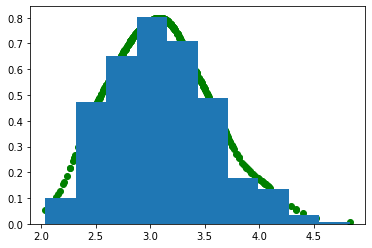

 mean loglikelihood of p_g  -0.656554282
Gradient cte 0.0002245922088623047
 Cte Update  1.9186092519164073

 pn/(pn+pm) 2 0.61446756

 std dev y_predit 0.47478282
mean y_predit 3.104707
pn/(pn+pm)  0.498892397
std dev y_pred 0.474782854
 model train on batch  -0.9157030582427979
############ iteration  752 ################
 p_nx  [0.714454174 0.665777445 0.782966673 ... 0.777839184 0.745293081 0.79432106]


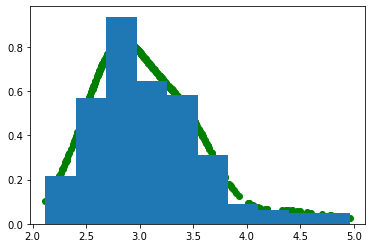

 mean loglikelihood of p_g  -0.668730915
Gradient cte -0.004193757057189941
 Cte Update  1.9144154948592174

 pn/(pn+pm) 2 0.6116495

 std dev y_predit 0.51369363
mean y_predit 3.075282
pn/(pn+pm)  0.491020471
std dev y_pred 0.513693631
 model train on batch  -0.9197736978530884
############ iteration  753 ################
 p_nx  [0.717788577 0.789445162 0.807447135 ... 0.678870261 0.790468216 0.77291]


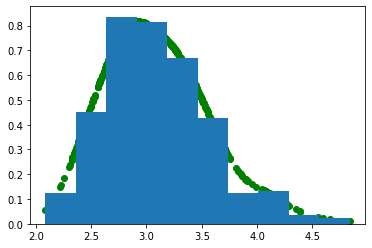

 mean loglikelihood of p_g  -0.635974705
Gradient cte 0.002540511131286621
 Cte Update  1.916956005990504

 pn/(pn+pm) 2 0.6062217

 std dev y_predit 0.47310048
mean y_predit 3.095235
pn/(pn+pm)  0.484689832
std dev y_pred 0.473100483
 model train on batch  -0.9306643605232239
############ iteration  754 ################
 p_nx  [0.716956735 0.766153157 0.791058302 ... 0.792416692 0.673994303 0.750815511]


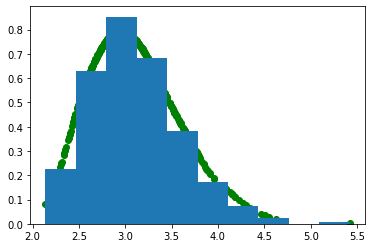

 mean loglikelihood of p_g  -0.655826271
Gradient cte -0.001352536916732788
 Cte Update  1.915603469073771

 pn/(pn+pm) 2 0.61272204

 std dev y_predit 0.4874967
mean y_predit 3.1058714
pn/(pn+pm)  0.495161474
std dev y_pred 0.487496704
 model train on batch  -0.9195802211761475
############ iteration  755 ################
 p_nx  [0.758604527 0.770662129 0.764856279 ... 0.746865511 0.670128524 0.761640429]


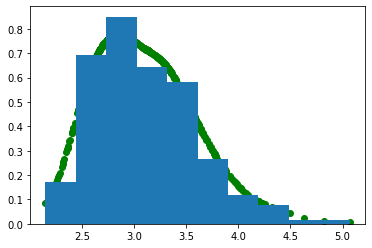

 mean loglikelihood of p_g  -0.650257826
Gradient cte -0.0009450187683105469
 Cte Update  1.9146584503054604

 pn/(pn+pm) 2 0.61758024

 std dev y_predit 0.48594707
mean y_predit 3.1040096
pn/(pn+pm)  0.498034954
std dev y_pred 0.485947043
 model train on batch  -0.9067519307136536
############ iteration  756 ################
 p_nx  [0.787800312 0.760973215 0.774205446 ... 0.595704198 0.745481431 0.724318504]


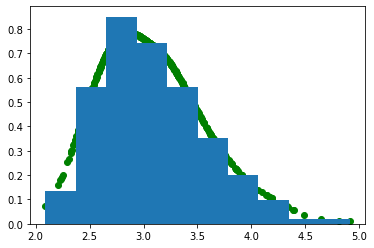

 mean loglikelihood of p_g  -0.669799
Gradient cte 0.0015881307125091553
 Cte Update  1.9162465810179696

 pn/(pn+pm) 2 0.6153794

 std dev y_predit 0.49263072
mean y_predit 3.0841641
pn/(pn+pm)  0.497818142
std dev y_pred 0.49263072
 model train on batch  -0.9124836325645447
############ iteration  757 ################
 p_nx  [0.830512047 0.837823272 0.705295265 ... 0.59292239 0.699369311 0.487240255]


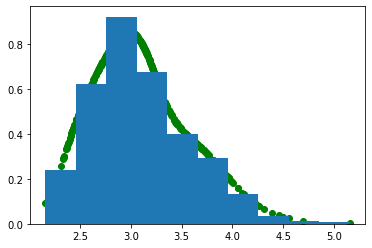

 mean loglikelihood of p_g  -0.639836133
Gradient cte -0.0020314936637878416
 Cte Update  1.9142150873541819

 pn/(pn+pm) 2 0.606891

 std dev y_predit 0.48343453
mean y_predit 3.0938041
pn/(pn+pm)  0.489822984
std dev y_pred 0.483434558
 model train on batch  -0.9338832497596741
############ iteration  758 ################
 p_nx  [0.777003229 0.873078942 0.866519213 ... 0.901661515 0.627577841 0.515221715]


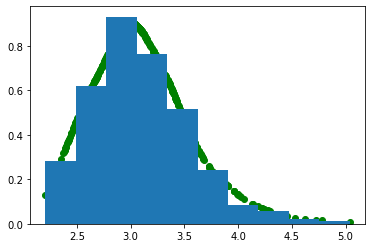

 mean loglikelihood of p_g  -0.601358891
Gradient cte -0.0002604349851608276
 Cte Update  1.913954652369021

 pn/(pn+pm) 2 0.59331274

 std dev y_predit 0.4626879
mean y_predit 3.086963
pn/(pn+pm)  0.467001855
std dev y_pred 0.46268788
 model train on batch  -0.9578863978385925
############ iteration  759 ################
 p_nx  [0.908083141 0.910629332 0.804377854 ... 0.806874454 0.892839491 0.75206244]


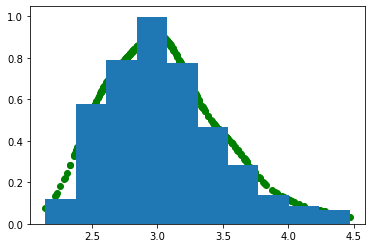

 mean loglikelihood of p_g  -0.556434631
Gradient cte -0.0048380537033081055
 Cte Update  1.9091165986657128

 pn/(pn+pm) 2 0.59556556

 std dev y_predit 0.44046122
mean y_predit 3.0505867
pn/(pn+pm)  0.468862
std dev y_pred 0.440461189
 model train on batch  -0.9534578323364258
############ iteration  760 ################
 p_nx  [0.622484386 0.787133455 0.745166183 ... 0.657976031 0.593233466 0.670445263]


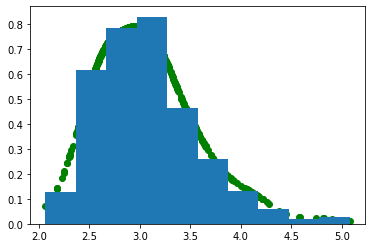

 mean loglikelihood of p_g  -0.679594517
Gradient cte 0.0016454342603683472
 Cte Update  1.9107620329260813

 pn/(pn+pm) 2 0.6109674

 std dev y_predit 0.50564206
mean y_predit 3.072989
pn/(pn+pm)  0.491507232
std dev y_pred 0.505642116
 model train on batch  -0.9240624904632568
############ iteration  761 ################
 p_nx  [0.871773481 0.524310946 0.566396773 ... 0.848423541 0.869065344 0.869755566]


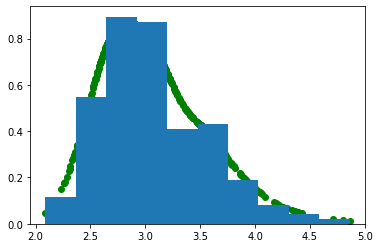

 mean loglikelihood of p_g  -0.615300894
Gradient cte 0.003689052104949951
 Cte Update  1.9144510850310312

 pn/(pn+pm) 2 0.6081611

 std dev y_predit 0.4782451
mean y_predit 3.0710473
pn/(pn+pm)  0.486615211
std dev y_pred 0.47824508
 model train on batch  -0.9275853633880615
############ iteration  762 ################
 p_nx  [0.790446758 0.6078251 0.789434195 ... 0.534508765 0.610298395 0.453229338]


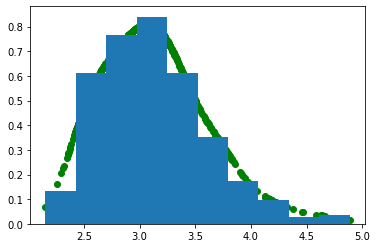

 mean loglikelihood of p_g  -0.644733965
Gradient cte -0.0039000725746154786
 Cte Update  1.9105510124564158

 pn/(pn+pm) 2 0.60956025

 std dev y_predit 0.48276436
mean y_predit 3.1297026
pn/(pn+pm)  0.489597797
std dev y_pred 0.482764393
 model train on batch  -0.9262205958366394
############ iteration  763 ################
 p_nx  [0.707714438 0.699418664 0.735099256 ... 0.546295762 0.823812842 0.807166517]


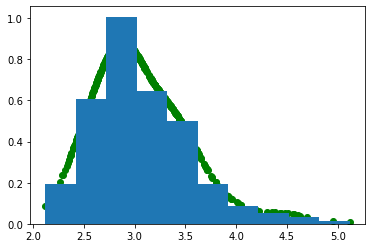

 mean loglikelihood of p_g  -0.628757238
Gradient cte -0.003638908863067627
 Cte Update  1.906912103593348

 pn/(pn+pm) 2 0.6023454

 std dev y_predit 0.48662576
mean y_predit 3.0642488
pn/(pn+pm)  0.477232754
std dev y_pred 0.486625761
 model train on batch  -0.9398935437202454
############ iteration  764 ################
 p_nx  [0.709270537 0.80048418 0.799492 ... 0.689721704 0.666010559 0.801192582]


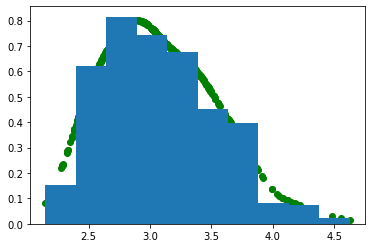

 mean loglikelihood of p_g  -0.611675918
Gradient cte 0.005063719272613525
 Cte Update  1.9119758228659616

 pn/(pn+pm) 2 0.61764944

 std dev y_predit 0.46302712
mean y_predit 3.083263
pn/(pn+pm)  0.498655677
std dev y_pred 0.46302712
 model train on batch  -0.9079377055168152
############ iteration  765 ################
 p_nx  [0.854690969 0.785433888 0.699599743 ... 0.293105692 0.864139259 0.669176042]


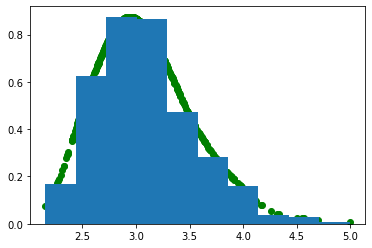

 mean loglikelihood of p_g  -0.592319965
Gradient cte -0.00308454966545105
 Cte Update  1.9088912732005106

 pn/(pn+pm) 2 0.59728515

 std dev y_predit 0.4567582
mean y_predit 3.0843492
pn/(pn+pm)  0.471727401
std dev y_pred 0.456758201
 model train on batch  -0.950165867805481
############ iteration  766 ################
 p_nx  [0.78501308 0.745811045 0.78361994 ... 0.717220664 0.779400408 0.673051059]


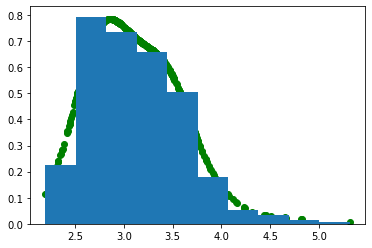

 mean loglikelihood of p_g  -0.641416
Gradient cte 0.0009590930938720703
 Cte Update  1.9098503662943827

 pn/(pn+pm) 2 0.6176526

 std dev y_predit 0.48144057
mean y_predit 3.114671
pn/(pn+pm)  0.497831225
std dev y_pred 0.481440604
 model train on batch  -0.9075127840042114
############ iteration  767 ################
 p_nx  [0.766655684 0.821044207 0.71140343 ... 0.781851172 0.816173494 0.830506504]


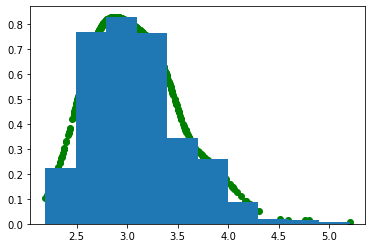

 mean loglikelihood of p_g  -0.607375383
Gradient cte -0.002369180202484131
 Cte Update  1.9074811860918985

 pn/(pn+pm) 2 0.60098314

 std dev y_predit 0.46713135
mean y_predit 3.0929148
pn/(pn+pm)  0.474298835
std dev y_pred 0.467131317
 model train on batch  -0.9409339427947998
############ iteration  768 ################
 p_nx  [0.727748275 0.803980947 0.783940196 ... 0.814589918 0.810549438 0.791198671]


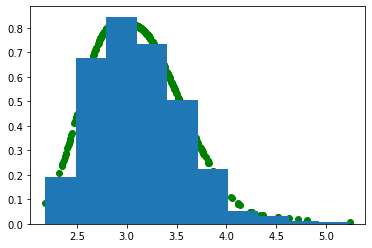

 mean loglikelihood of p_g  -0.592756629
Gradient cte -1.7287373542785644e-05
 Cte Update  1.9074638987183556

 pn/(pn+pm) 2 0.60123247

 std dev y_predit 0.4571035
mean y_predit 3.109646
pn/(pn+pm)  0.475112647
std dev y_pred 0.457103491
 model train on batch  -0.9408220052719116
############ iteration  769 ################
 p_nx  [0.76086688 0.769952536 0.817948103 ... 0.765473247 0.577770948 0.807440579]


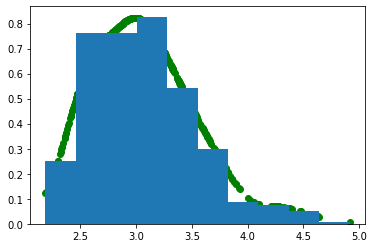

 mean loglikelihood of p_g  -0.616472065
Gradient cte -0.004807108402252197
 Cte Update  1.9026567903161034

 pn/(pn+pm) 2 0.60889065

 std dev y_predit 0.47446802
mean y_predit 3.0681372
pn/(pn+pm)  0.485553086
std dev y_pred 0.474468
 model train on batch  -0.9282669425010681
############ iteration  770 ################
 p_nx  [0.806875944 0.780185699 0.781866074 ... 0.806604803 0.806538641 0.720001042]


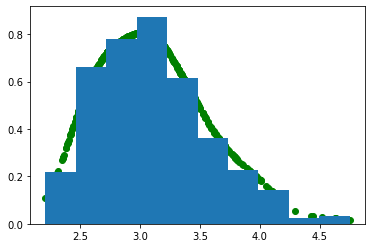

 mean loglikelihood of p_g  -0.614751577
Gradient cte 0.0004342520236968994
 Cte Update  1.9030910423398002

 pn/(pn+pm) 2 0.60895485

 std dev y_predit 0.46659678
mean y_predit 3.1083457
pn/(pn+pm)  0.486447334
std dev y_pred 0.466596782
 model train on batch  -0.927747368812561
############ iteration  771 ################
 p_nx  [0.882773817 0.644412696 0.803325653 ... 0.887923419 0.44717136 0.723222375]


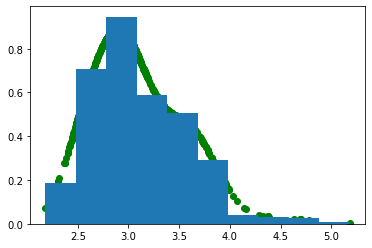

 mean loglikelihood of p_g  -0.588831067
Gradient cte 0.002359739303588867
 Cte Update  1.905450781643389

 pn/(pn+pm) 2 0.6071124

 std dev y_predit 0.4666597
mean y_predit 3.105315
pn/(pn+pm)  0.485946208
std dev y_pred 0.466659665
 model train on batch  -0.9318548440933228
############ iteration  772 ################
 p_nx  [0.863925 0.818549395 0.7590608 ... 0.738898516 0.669075847 0.833711743]


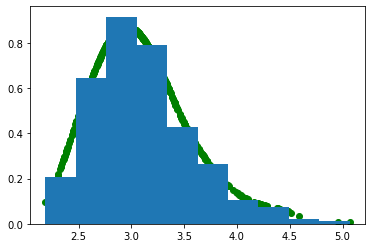

 mean loglikelihood of p_g  -0.614875615
Gradient cte -0.0026722624301910402
 Cte Update  1.9027785192131978

 pn/(pn+pm) 2 0.5957639

 std dev y_predit 0.47752783
mean y_predit 3.099279
pn/(pn+pm)  0.469614863
std dev y_pred 0.477527827
 model train on batch  -0.9554486870765686
############ iteration  773 ################
 p_nx  [0.646936715 0.840702653 0.806683242 ... 0.733548105 0.900863 0.907120228]


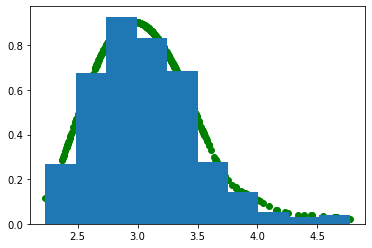

 mean loglikelihood of p_g  -0.536244869
Gradient cte 0.0032699759006500242
 Cte Update  1.9060484951138479

 pn/(pn+pm) 2 0.5862431

 std dev y_predit 0.43948662
mean y_predit 3.0714035
pn/(pn+pm)  0.452533513
std dev y_pred 0.439486623
 model train on batch  -0.9705429673194885
############ iteration  774 ################
 p_nx  [0.724387884 0.848536 0.870581686 ... 0.555770934 0.813815713 0.868240654]


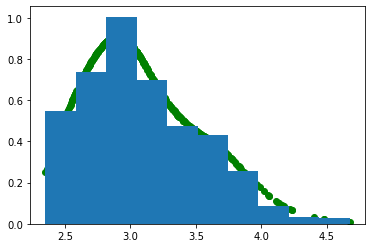

 mean loglikelihood of p_g  -0.555132926
Gradient cte 0.0068715324401855465
 Cte Update  1.9129200275540335

 pn/(pn+pm) 2 0.60159785

 std dev y_predit 0.4472818
mean y_predit 3.092022
pn/(pn+pm)  0.478047371
std dev y_pred 0.447281837
 model train on batch  -0.9405043125152588
############ iteration  775 ################
 p_nx  [0.833163679 0.839417219 0.886799574 ... 0.879708409 0.86423564 0.885101318]


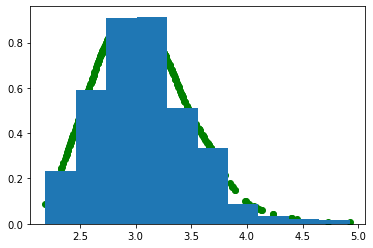

 mean loglikelihood of p_g  -0.532843828
Gradient cte 3.4435153007507324e-05
 Cte Update  1.912954462707041

 pn/(pn+pm) 2 0.5901062

 std dev y_predit 0.4280459
mean y_predit 3.0670063
pn/(pn+pm)  0.459931493
std dev y_pred 0.428045928
 model train on batch  -0.961135983467102
############ iteration  776 ################
 p_nx  [0.870182872 0.899986684 0.88070482 ... 0.667245805 0.35853067 0.863562167]


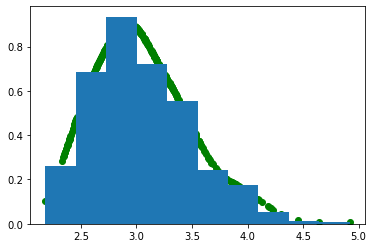

 mean loglikelihood of p_g  -0.56752646
Gradient cte 0.0018379565477371217
 Cte Update  1.914792419254778

 pn/(pn+pm) 2 0.595717

 std dev y_predit 0.4462967
mean y_predit 3.051043
pn/(pn+pm)  0.46890232
std dev y_pred 0.446296692
 model train on batch  -0.9513363242149353
############ iteration  777 ################
 p_nx  [0.736889482 0.659678757 0.708865821 ... 0.822623074 0.73554492 0.817055881]


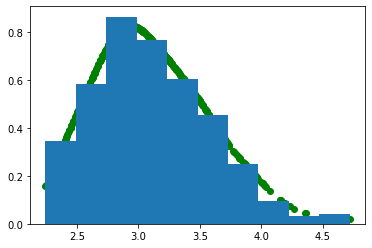

 mean loglikelihood of p_g  -0.625116765
Gradient cte 0.0004760520458221436
 Cte Update  1.9152684713006003

 pn/(pn+pm) 2 0.6090224

 std dev y_predit 0.46873218
mean y_predit 3.1124678
pn/(pn+pm)  0.489907771
std dev y_pred 0.468732178
 model train on batch  -0.9265668392181396
############ iteration  778 ################
 p_nx  [0.679452181 0.619912386 0.839423656 ... 0.820414901 0.714574754 0.840438128]


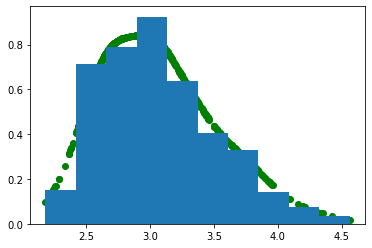

 mean loglikelihood of p_g  -0.579662561
Gradient cte -0.004526763916015625
 Cte Update  1.9107417073845847

 pn/(pn+pm) 2 0.60400975

 std dev y_predit 0.4509272
mean y_predit 3.0652373
pn/(pn+pm)  0.47948885
std dev y_pred 0.450927198
 model train on batch  -0.9352421760559082
############ iteration  779 ################
 p_nx  [0.876672447 0.761957943 0.567811847 ... 0.785103619 0.770359039 0.893170297]


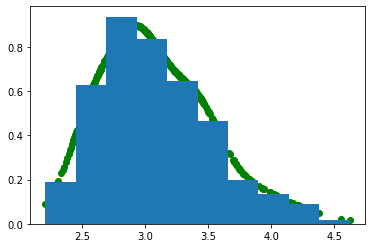

 mean loglikelihood of p_g  -0.560883701
Gradient cte 1.5265345573425294e-05
 Cte Update  1.910756972730158

 pn/(pn+pm) 2 0.59810084

 std dev y_predit 0.44460332
mean y_predit 3.08853
pn/(pn+pm)  0.469903737
std dev y_pred 0.444603354
 model train on batch  -0.9465200304985046
############ iteration  780 ################
 p_nx  [0.879794 0.811512768 0.846462488 ... 0.888542652 0.66241163 0.859709084]


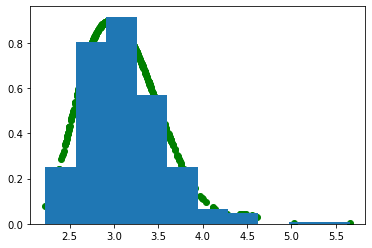

 mean loglikelihood of p_g  -0.546149969
Gradient cte -0.0034261546134948732
 Cte Update  1.9073308181166633

 pn/(pn+pm) 2 0.5877091

 std dev y_predit 0.450538
mean y_predit 3.1132677
pn/(pn+pm)  0.455961019
std dev y_pred 0.450538039
 model train on batch  -0.9679277539253235
############ iteration  781 ################
 p_nx  [0.744906545 0.758004308 0.800608277 ... 0.62017113 0.743033051 0.751137435]


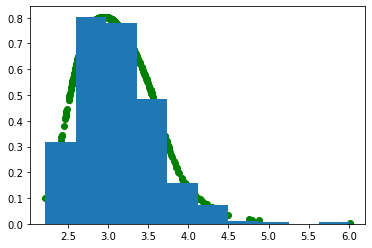

 mean loglikelihood of p_g  -0.612719238
Gradient cte 0.000932722806930542
 Cte Update  1.9082635409235937

 pn/(pn+pm) 2 0.6071125

 std dev y_predit 0.47891113
mean y_predit 3.1233256
pn/(pn+pm)  0.482946783
std dev y_pred 0.478911072
 model train on batch  -0.9295408129692078
############ iteration  782 ################
 p_nx  [0.853419125 0.717838228 0.896916687 ... 0.882448912 0.827271044 0.878738284]


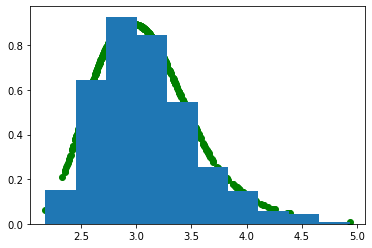

 mean loglikelihood of p_g  -0.557575107
Gradient cte -0.002576319694519043
 Cte Update  1.9056872212290747

 pn/(pn+pm) 2 0.58861876

 std dev y_predit 0.4447949
mean y_predit 3.0919693
pn/(pn+pm)  0.457201213
std dev y_pred 0.444794893
 model train on batch  -0.9665368795394897
############ iteration  783 ################
 p_nx  [0.710696816 0.602423906 0.643216968 ... 0.799475253 0.940084755 0.807057202]


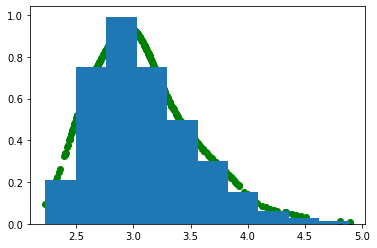

 mean loglikelihood of p_g  -0.553396404
Gradient cte -0.0032288691997528077
 Cte Update  1.902458352029322

 pn/(pn+pm) 2 0.59143597

 std dev y_predit 0.44974977
mean y_predit 3.085161
pn/(pn+pm)  0.462404847
std dev y_pred 0.449749768
 model train on batch  -0.9632164239883423
############ iteration  784 ################
 p_nx  [0.754535496 0.78517437 0.689382 ... 0.76179117 0.797822058 0.755981445]


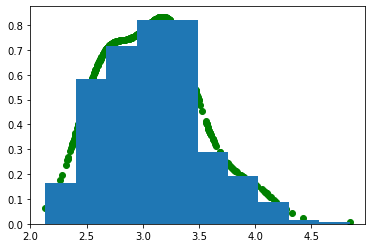

 mean loglikelihood of p_g  -0.574001372
Gradient cte -0.00047695446014404296
 Cte Update  1.901981397569178

 pn/(pn+pm) 2 0.60690415

 std dev y_predit 0.4461357
mean y_predit 3.0841272
pn/(pn+pm)  0.478781611
std dev y_pred 0.4461357
 model train on batch  -0.9272846579551697
############ iteration  785 ################
 p_nx  [0.821137369 0.78021729 0.932574153 ... 0.509872794 0.877109826 0.666711807]


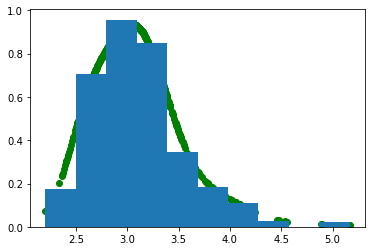

 mean loglikelihood of p_g  -0.546410382
Gradient cte 0.0022523534297943116
 Cte Update  1.9042337509989722

 pn/(pn+pm) 2 0.58116215

 std dev y_predit 0.44836324
mean y_predit 3.0942113
pn/(pn+pm)  0.446440786
std dev y_pred 0.448363215
 model train on batch  -0.9817792177200317
############ iteration  786 ################
 p_nx  [0.196970463 0.674417675 0.804850101 ... 0.569342 0.920794785 0.849972427]


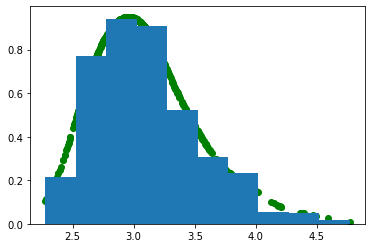

 mean loglikelihood of p_g  -0.527047276
Gradient cte 0.00404617166519165
 Cte Update  1.9082799226641638

 pn/(pn+pm) 2 0.58124614

 std dev y_predit 0.43555298
mean y_predit 3.1037645
pn/(pn+pm)  0.447916389
std dev y_pred 0.435552955
 model train on batch  -0.9808037877082825
############ iteration  787 ################
 p_nx  [0.855499923 0.713002622 0.570665956 ... 0.890790582 0.83264339 0.887810349]


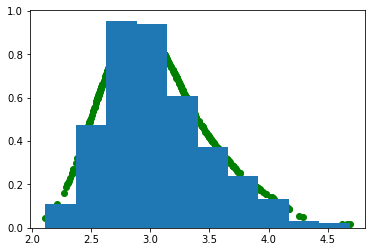

 mean loglikelihood of p_g  -0.555336893
Gradient cte 0.003923069953918457
 Cte Update  1.9122029926180824

 pn/(pn+pm) 2 0.5924079

 std dev y_predit 0.44359788
mean y_predit 3.0609856
pn/(pn+pm)  0.464415163
std dev y_pred 0.443597913
 model train on batch  -0.9581459760665894
############ iteration  788 ################
 p_nx  [0.876378655 0.910251617 0.84604764 ... 0.929858 0.826310277 0.883116126]


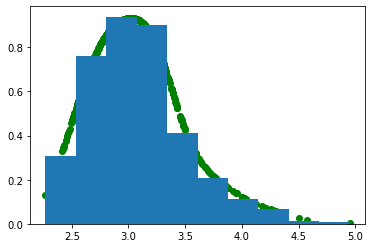

 mean loglikelihood of p_g  -0.521035254
Gradient cte 0.0056540780067443844
 Cte Update  1.9178570706248268

 pn/(pn+pm) 2 0.5785569

 std dev y_predit 0.43069947
mean y_predit 3.080482
pn/(pn+pm)  0.444194198
std dev y_pred 0.430699468
 model train on batch  -0.9830439686775208
############ iteration  789 ################
 p_nx  [0.85368 0.888017833 0.812817454 ... 0.522718 0.800107956 0.899729669]


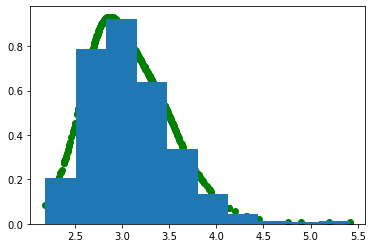

 mean loglikelihood of p_g  -0.554858148
Gradient cte 0.0007019340991973877
 Cte Update  1.9185590047240242

 pn/(pn+pm) 2 0.5887317

 std dev y_predit 0.45156524
mean y_predit 3.082189
pn/(pn+pm)  0.458390564
std dev y_pred 0.451565236
 model train on batch  -0.9629312753677368
############ iteration  790 ################
 p_nx  [0.958851218 0.527421 1.02930212 ... 0.956755817 0.927645922 0.84988]


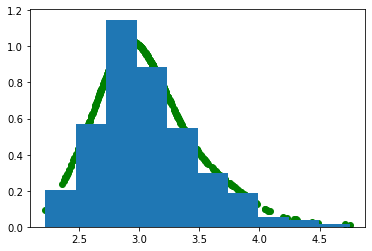

 mean loglikelihood of p_g  -0.501051903
Gradient cte -0.0014650946855545043
 Cte Update  1.9170939100384696

 pn/(pn+pm) 2 0.57436365

 std dev y_predit 0.42128265
mean y_predit 3.0674248
pn/(pn+pm)  0.440019846
std dev y_pred 0.421282649
 model train on batch  -0.9921849370002747
############ iteration  791 ################
 p_nx  [0.779390335 0.793655872 0.766239405 ... 0.792434812 0.776433229 0.801110446]


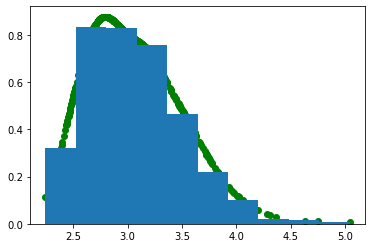

 mean loglikelihood of p_g  -0.540095329
Gradient cte -0.000765162467956543
 Cte Update  1.916328747570513

 pn/(pn+pm) 2 0.6014862

 std dev y_predit 0.4407601
mean y_predit 3.0692403
pn/(pn+pm)  0.473445147
std dev y_pred 0.440760106
 model train on batch  -0.9361138939857483
############ iteration  792 ################
 p_nx  [0.803744078 0.763227344 0.82024 ... 0.889328957 0.876840115 0.656039]


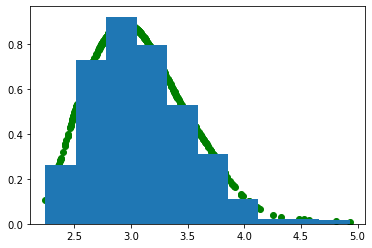

 mean loglikelihood of p_g  -0.53639847
Gradient cte 0.0032814879417419436
 Cte Update  1.919610235512255

 pn/(pn+pm) 2 0.59197277

 std dev y_predit 0.43509063
mean y_predit 3.0848157
pn/(pn+pm)  0.463649511
std dev y_pred 0.435090631
 model train on batch  -0.9571843147277832
############ iteration  793 ################
 p_nx  [0.919690311 0.827976286 0.871867061 ... 0.913054228 0.915349782 0.893755257]


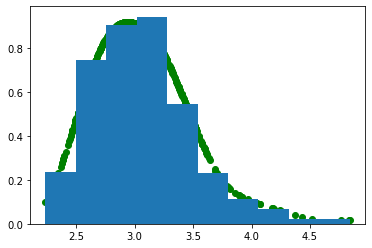

 mean loglikelihood of p_g  -0.514904201
Gradient cte -0.0017728767395019532
 Cte Update  1.917837358772753

 pn/(pn+pm) 2 0.581209

 std dev y_predit 0.431956
mean y_predit 3.0724828
pn/(pn+pm)  0.446347237
std dev y_pred 0.431956
 model train on batch  -0.9774121642112732
############ iteration  794 ################
 p_nx  [0.891148329 0.589312553 0.855005622 ... 0.917456448 0.836125135 0.816770315]


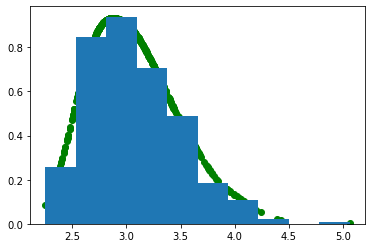

 mean loglikelihood of p_g  -0.491404325
Gradient cte 0.0013754382133483887
 Cte Update  1.9192127969861015

 pn/(pn+pm) 2 0.5852819

 std dev y_predit 0.41868272
mean y_predit 3.076741
pn/(pn+pm)  0.452212334
std dev y_pred 0.418682724
 model train on batch  -0.968472421169281
############ iteration  795 ################
 p_nx  [0.939954758 0.47996223 0.935030282 ... 0.953095317 0.951779604 0.766201377]


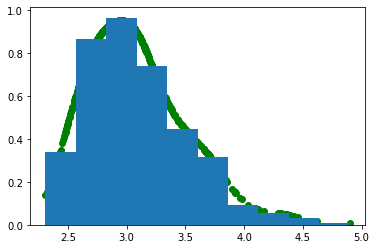

 mean loglikelihood of p_g  -0.505039
Gradient cte 0.0002687288522720337
 Cte Update  1.9194815258383735

 pn/(pn+pm) 2 0.58317626

 std dev y_predit 0.42979068
mean y_predit 3.08819
pn/(pn+pm)  0.451617658
std dev y_pred 0.429790705
 model train on batch  -0.9744076728820801
############ iteration  796 ################
 p_nx  [0.966549933 0.927364588 0.686608911 ... 0.962940574 0.695316911 0.674340487]


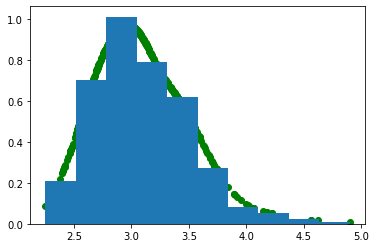

 mean loglikelihood of p_g  -0.492883891
Gradient cte -0.0016764469146728516
 Cte Update  1.9178050789237007

 pn/(pn+pm) 2 0.5804186

 std dev y_predit 0.41490963
mean y_predit 3.09442
pn/(pn+pm)  0.446372509
std dev y_pred 0.414909631
 model train on batch  -0.9793002605438232
############ iteration  797 ################
 p_nx  [0.623882234 0.873689055 0.596076667 ... 0.906145334 0.897166073 0.870736539]


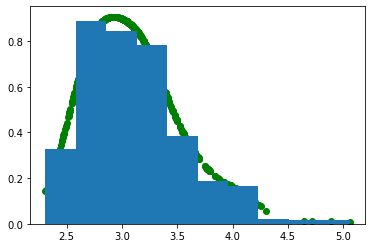

 mean loglikelihood of p_g  -0.541348457
Gradient cte -0.00410273027420044
 Cte Update  1.9137023486495002

 pn/(pn+pm) 2 0.58484644

 std dev y_predit 0.4462709
mean y_predit 3.1084723
pn/(pn+pm)  0.45318985
std dev y_pred 0.446270853
 model train on batch  -0.9721542596817017
############ iteration  798 ################
 p_nx  [0.921236575 0.92425406 0.970877647 ... 0.904653728 0.97562331 0.976620317]


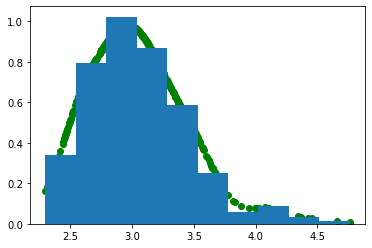

 mean loglikelihood of p_g  -0.463520348
Gradient cte 0.0031659414768218995
 Cte Update  1.916868290126322

 pn/(pn+pm) 2 0.5770123

 std dev y_predit 0.41036645
mean y_predit 3.047833
pn/(pn+pm)  0.439467132
std dev y_pred 0.410366446
 model train on batch  -0.9854528903961182
############ iteration  799 ################
 p_nx  [0.704961419 0.872661054 0.914464176 ... 0.920988441 0.905301869 0.604917824]


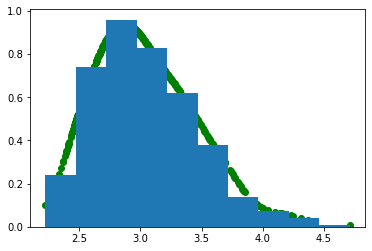

 mean loglikelihood of p_g  -0.50099957
Gradient cte -0.002483036279678345
 Cte Update  1.9143852538466437

 pn/(pn+pm) 2 0.5918152

 std dev y_predit 0.41865632
mean y_predit 3.045329
pn/(pn+pm)  0.460167885
std dev y_pred 0.41865629
 model train on batch  -0.95627760887146


In [123]:
#### TRAINING ####
n_epochs = 800
cte_init = 4
cte = cte_init
batch_size = 500


for i in range(n_epochs):
    
    
    
    tf.print("############ iteration " , i ,"################" )
    
    #### Acending Gradient for cte ####
    
    
    x_input = randn(latent_dim * batch_size)
    # reshape into a batch of inputs for the network
    x_train = x_input.reshape(batch_size, latent_dim)
    y_train = np.ones(batch_size)
    y_predit = model.predict (x_train) # global variable used to fit KDE (Y_FAKE)
      
    
    f = lambda y: tfd.Independent(tfd.Normal(loc=y, scale=np.std(y)/np.float32(3)))
    #n = y_pred.shape[0]
    n = batch_size
    pn = tfd.MixtureSameFamily(
    mixture_distribution=tfd.Categorical(
    probs=[1 / n] * n),
    components_distribution=f(y_predit))
    
    # Compute pm and pn (kde )
    
    x_data= random.normal( m_data, s_data, (batch_size) )
    p_nx = pn.prob( np.reshape(x_data, (batch_size,1)) )
    #p_nx = pn.prob( x_data) 
    tf.print(" p_nx ", p_nx)
    
    p_mx = np.reshape(pm0(x_data, m_data, s_data), [batch_size])
    
    p_ng = pn.prob( y_predit) 
    plt.hist(y_predit, density=True)
    plt.scatter(y_predit, p_ng, color='green')
    plt.show()
    tf.print(" mean loglikelihood of p_g ",tf.reduce_mean(pn.log_prob(y_predit)))
    p_mg = np.reshape(pm0(y_predit, m_data, s_data), [batch_size])
    
    
    grad_cte = 1/cte - p_mx/(cte*p_mx+p_nx) -  p_mg/(cte*p_mg+p_ng)
    grad_cte = np.sum(grad_cte)/batch_size
            
    cte = cte + 1*grad_cte
    print("Gradient cte" , grad_cte)
    print(" Cte Update ",cte)
    
    #tf.print(" model evaluate " ,model.evaluate(x_train, y_train))
    
    tf.print("\n pn/(pn+pm) 2" , np.mean(p_ng/(cte*p_mg+p_ng)))
    tf.print("\n std dev y_predit", np.std(y_predit))
    tf.print("mean y_predit", np.mean(y_predit))
    tf.print(" model train on batch " , model.train_on_batch(x_train, y_train ))
    
    
    # Checking for nan
    if np.sum(np.isnan(model.get_weights()[0])) != 0:
        break

In [ ]:
tf.print(" model evaluate " ,model.evaluate(x_train, y_train,batch_size= batch_size) )

In [14]:
1/(np.sqrt(2*pi)*s_data)

0.3989422804014327

In [91]:
y_predit = model.predict (x_train)
print(np.mean(y_predit))

-1.8780168


In [66]:
a = [[1],[2],[3]]
pn.prob(x_data)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [72]:
x_data= random.normal( m_data, s_data, (batch_size) )
x_data
pn.prob( x_data)
pm0(x_data, m_data, s_data)

<tf.Tensor: shape=(500,), dtype=float32, numpy=
array([9.97852027e-01, 9.46165860e-01, 3.51096630e-01, 9.14990783e-01,
       7.60823429e-01, 6.91578686e-01, 4.51269567e-01, 7.40458250e-01,
       9.10409808e-01, 7.26099491e-01, 3.54302734e-01, 7.55152106e-01,
       7.08979428e-01, 6.23519480e-01, 7.58133590e-01, 6.67625725e-01,
       9.37855542e-01, 9.99929667e-01, 7.83348203e-01, 9.33139443e-01,
       9.88749921e-01, 1.96695998e-01, 9.92281377e-01, 7.23152637e-01,
       9.78697300e-01, 5.74854612e-01, 7.10165560e-01, 9.94309962e-01,
       5.91029406e-01, 5.71236134e-01, 8.77407789e-01, 3.75119179e-01,
       8.68595064e-01, 4.32108015e-01, 9.68699634e-01, 1.25299677e-01,
       7.09960878e-01, 3.30094874e-01, 6.55457914e-01, 6.96502924e-01,
       8.92723054e-02, 9.93824959e-01, 8.81772101e-01, 9.97895718e-01,
       8.07225525e-01, 8.16848099e-01, 1.10624261e-01, 8.51607442e-01,
       7.54936159e-01, 1.28047958e-01, 7.78656721e-01, 8.29908311e-01,
       9.67327833e-01, 4.3178

In [124]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)


In [127]:
from ann_visualizer.visualize import ann_viz;
from tensorflow.keras.models import model_from_json


In [135]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


ann_viz(model, title="Artificial Neural network - Model Visualization")

ValueError: ANN Visualizer: Layer not supported for visualizing

In [128]:

# fix random seed for reproducibility
#np.random.seed(7)
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("model.h5")


OSError: Unable to open file (unable to open file: name = 'model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [121]:

    m0 = mu_init  #fixed noise parameters
    s0 =sigma_init
    cte = cte_init
    
    #not used for nce
    error_mu = [] 
    error_sigma = []
    error_cte = [] 
    
    mus = []
    sigmas = []
    ctes = []
     
    batch_size= len(x_batches[0])
    
    for itr in range(max_iters): 
        #x_batches shuffle
        for x in x_batches:
            ctes.append(cte)
            #mus.append(mu)
            #sigmas.append(sigma)
            
            z= random.normal( 0, 1, int(batch_size*nu)) 
            q = m0+s0*z
            
            #Gradient in respect to the constant
            grad_cte = 1/cte - pm0(x,m,s)/(cte*pm0(x,m,s)+nu*pn(x, m0,s0)) -  pm0(q,m,s)/(cte*pm0(q,m,s)+nu*pn(q,m0,s0))
            grad_cte = np.sum(grad_cte)/batch_size
            cte = cte + learning_rate[0] * grad_cte
            error_cte.append( (grad_cte) ) 
            
    result = Gradient(cte,m0,s0, error_mu,error_sigma, error_cte, ctes,mus,sigmas)
    return result


confusion  tf.Tensor(nan, shape=(), dtype=float32)


[<tf.Tensor: shape=(5, 15), dtype=float32, numpy=
 array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan]], dtype=float32)>,
 <tf.Tensor: shape=(15,), dtype=float32, numpy=
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan], dtype=float32)>,
 <tf.Tensor: shape=(15, 1), dtype=float32, numpy=
 array([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan]], dtype=float32)>,
 <tf.Tensor:

In [214]:
0.0311287586/0.041129888

0.7568403444230142

In [215]:
cte

0.3989422804014327

In [62]:
cte

0.3989422804014327